### Paquetes a instalar

In [1]:
#pip install opencv-python

### Importando librerias para procesamiento de imagenes

In [2]:
#Importar Keras Sklearn
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np
import random
import cvlib as cv
import cv2
import os
import glob
import keras

##### Configurar parametros de nuestra red nueronal

In [3]:
EPOCS=3
LR=.5 #1e-3
BATCH_SIZE = 32
IMG_DIMS=(96,96,3)
IMG_TOTAL_PIXELS=IMG_DIMS[0]*IMG_DIMS[1]*IMG_DIMS[2]

In [4]:
data=[]
labels=[]

### Cargar imàgenes del dataset
#### Cargamos primero las imagenes de mujeres y su etiqueta de mujer
#### Cargamos las imagenes de hombres y su etiqueta de hombre

In [5]:
woman_image_files = [f for f in glob.glob('Gender/woman'+"/*.jpg",recursive=True) if not os.path.isdir(f)]

In [6]:
man_image_files = [f for f in glob.glob('Gender/man'+"/*.jpg",recursive=True) if not os.path.isdir(f)]

In [7]:
woman_image_files_utk = [f for f in glob.glob('Age/ages_ranges/*'+"/*_1_?_*.jpg",recursive=True) if not os.path.isdir(f)]
woman_image_files_utk

['Age/ages_ranges\\__38and43__\\38_1_0_20170103163147600.jpg',
 'Age/ages_ranges\\__38and43__\\38_1_0_20170103163517069.jpg',
 'Age/ages_ranges\\__38and43__\\38_1_0_20170103181104225.jpg',
 'Age/ages_ranges\\__38and43__\\38_1_0_20170103181733834.jpg',
 'Age/ages_ranges\\__38and43__\\38_1_0_20170103182017326.jpg',
 'Age/ages_ranges\\__38and43__\\38_1_0_20170103183214380.jpg',
 'Age/ages_ranges\\__38and43__\\38_1_0_20170103183311778.jpg',
 'Age/ages_ranges\\__38and43__\\38_1_0_20170103184101115.jpg',
 'Age/ages_ranges\\__38and43__\\38_1_0_20170104002144725.jpg',
 'Age/ages_ranges\\__38and43__\\38_1_0_20170104171602219.jpg',
 'Age/ages_ranges\\__38and43__\\38_1_0_20170104171708706.jpg',
 'Age/ages_ranges\\__38and43__\\38_1_0_20170104183625399.jpg',
 'Age/ages_ranges\\__38and43__\\38_1_0_20170104183632893.jpg',
 'Age/ages_ranges\\__38and43__\\38_1_0_20170104184650846.jpg',
 'Age/ages_ranges\\__38and43__\\38_1_0_20170104184812557.jpg',
 'Age/ages_ranges\\__38and43__\\38_1_0_2017010419282056

In [8]:
man_image_files_utk = [f for f in glob.glob('Age/ages_ranges/*'+"/*_0_?_*.jpg",recursive=True) if not os.path.isdir(f)]
man_image_files_utk

['Age/ages_ranges\\__38and43__\\38_0_0_20170103183142330.jpg',
 'Age/ages_ranges\\__38and43__\\38_0_0_20170104165306497.jpg',
 'Age/ages_ranges\\__38and43__\\38_0_0_20170104170126057.jpg',
 'Age/ages_ranges\\__38and43__\\38_0_0_20170104184023164.jpg',
 'Age/ages_ranges\\__38and43__\\38_0_0_20170104200835937.jpg',
 'Age/ages_ranges\\__38and43__\\38_0_0_20170104202333304.jpg',
 'Age/ages_ranges\\__38and43__\\38_0_0_20170104203131804.jpg',
 'Age/ages_ranges\\__38and43__\\38_0_0_20170104204524306.jpg',
 'Age/ages_ranges\\__38and43__\\38_0_0_20170104205607908.jpg',
 'Age/ages_ranges\\__38and43__\\38_0_0_20170104205946635.jpg',
 'Age/ages_ranges\\__38and43__\\38_0_0_20170105163932764.jpg',
 'Age/ages_ranges\\__38and43__\\38_0_0_20170105171807556.jpg',
 'Age/ages_ranges\\__38and43__\\38_0_0_20170105172756958.jpg',
 'Age/ages_ranges\\__38and43__\\38_0_0_20170105172811910.jpg',
 'Age/ages_ranges\\__38and43__\\38_0_0_20170105184043687.jpg',
 'Age/ages_ranges\\__38and43__\\38_0_0_2017010901111478

In [9]:
def roiCropImages(imageRaw):
    roiFace, confidence= cv.detect_face(imageRaw)
    for idx,f in enumerate(roiFace):
        
        # obtenemos los puntos de la esquina del rectangulo de la cara
        (startX,startY) = f[0],f[1]
        (endX,endY) = f[2],f[3]
        
        face_crop = np.copy(imageRaw[startY:endY,startX:endX]) #Recortamos la seccion de la cara identificada
        if ((face_crop.shape[0])<10 or (face_crop.shape[1])<10):
            continue
        return face_crop,True
    return [],False
    

In [10]:
def create_gender_data(image_files,labels,label,data):
    for img in image_files:
        image=cv2.imread(img)
        #print("Image file",img)
        image,found= roiCropImages(image)
        if (found):
            #print(image)
            image = cv2.resize(image,(IMG_DIMS[0],IMG_DIMS[1]))
            image = img_to_array(image)
            data.append(image)
            labels.append(label)

In [11]:
create_gender_data(woman_image_files,labels,'woman',data) #woman
create_gender_data(woman_image_files_utk,labels,'woman',data) #woman
create_gender_data(man_image_files,labels,'man',data) # man
create_gender_data(man_image_files_utk,labels,'man',data) # man


Image file Gender/woman\Adelina_Avila_0001.jpg
[[[  2   3   1]
  [  5   5   5]
  [  2   2   2]
  ...
  [  7  10   8]
  [ 77  82  81]
  [ 83  88  87]]

 [[  3   4   2]
  [  3   3   3]
  [  1   1   1]
  ...
  [  4   7   5]
  [ 62  67  66]
  [ 92  97  96]]

 [[  0   1   0]
  [  0   0   0]
  [  1   1   1]
  ...
  [  2   5   3]
  [ 60  62  62]
  [ 96 101 100]]

 ...

 [[ 55  67  61]
  [ 50  64  60]
  [ 49  64  60]
  ...
  [ 41  54  70]
  [ 45  57  67]
  [ 31  44  46]]

 [[ 63  75  69]
  [ 54  68  64]
  [ 52  67  63]
  ...
  [ 47  60  76]
  [ 44  56  68]
  [ 29  44  46]]

 [[ 58  70  64]
  [ 56  70  66]
  [ 45  60  56]
  ...
  [ 55  70  86]
  [ 49  63  75]
  [ 36  51  54]]]
Image file Gender/woman\Adriana_Lima_0001.jpg
[[[10 15 16]
  [ 6 14 14]
  [ 6 14 14]
  ...
  [10 14 19]
  [11 17 22]
  [13 19 26]]

 [[ 6 14 14]
  [ 5 13 13]
  [ 4 14 14]
  ...
  [11 15 20]
  [11 17 22]
  [12 18 25]]

 [[ 5 13 13]
  [ 6 14 14]
  [ 7 17 17]
  ...
  [13 17 22]
  [11 17 22]
  [11 17 22]]

 ...

 [[ 3 10  5]


[[[ 55  73  84]
  [ 43  61  72]
  [ 34  51  64]
  ...
  [ 18  30  34]
  [ 16  28  32]
  [ 11  23  27]]

 [[ 47  67  78]
  [ 38  55  68]
  [ 31  47  63]
  ...
  [ 19  31  35]
  [ 18  31  33]
  [ 15  28  30]]

 [[ 36  56  67]
  [ 26  45  58]
  [ 23  42  57]
  ...
  [ 18  31  33]
  [ 18  31  33]
  [ 16  29  31]]

 ...

 [[ 21  41  28]
  [ 22  42  29]
  [ 25  43  30]
  ...
  [ 26  67 112]
  [ 24  65 110]
  [ 34  73 118]]

 [[ 22  42  29]
  [ 22  42  29]
  [ 25  43  30]
  ...
  [ 32  73 118]
  [ 31  70 114]
  [ 39  78 122]]

 [[ 22  42  30]
  [ 22  42  30]
  [ 25  42  31]
  ...
  [ 38  80 123]
  [ 38  78 120]
  [ 48  84 124]]]
Image file Gender/woman\Ai_Sugiyama_0002.jpg
[[[ 13  47  77]
  [ 19  54  88]
  [ 25  59  95]
  ...
  [ 26  53  67]
  [ 56  81  77]
  [ 90 115  95]]

 [[ 18  51  90]
  [ 20  55  95]
  [ 21  55  98]
  ...
  [ 13  40  61]
  [ 34  61  65]
  [ 69  95  82]]

 [[ 20  54  97]
  [ 17  51  97]
  [ 17  51  97]
  ...
  [  7  33  57]
  [ 15  42  52]
  [ 46  72  66]]

 ...

 [[ 48 

Image file Gender/woman\Alexandra_Pelosi_0001.jpg
[[[ 17  26  59]
  [ 22  32  62]
  [ 24  35  62]
  ...
  [ 33  42  51]
  [ 37  47  57]
  [ 41  52  60]]

 [[ 19  27  57]
  [ 22  30  59]
  [ 24  34  58]
  ...
  [ 31  40  50]
  [ 38  46  59]
  [ 43  52  62]]

 [[ 18  26  56]
  [ 20  28  57]
  [ 22  32  56]
  ...
  [ 32  40  53]
  [ 39  47  60]
  [ 45  53  66]]

 ...

 [[ 14  21  38]
  [ 13  20  37]
  [ 17  21  40]
  ...
  [ 75 103 134]
  [ 67  95 125]
  [ 59  86 113]]

 [[ 18  25  42]
  [ 19  23  41]
  [ 22  23  43]
  ...
  [ 75 103 134]
  [ 68  94 124]
  [ 60  84 112]]

 [[ 20  27  44]
  [ 21  25  43]
  [ 21  23  41]
  ...
  [ 75 100 132]
  [ 68  92 122]
  [ 60  82 110]]]
Image file Gender/woman\Alexandra_Rozovskaya_0001.jpg
[[[155 188 197]
  [154 187 196]
  [159 192 201]
  ...
  [ 32  35  33]
  [ 36  39  37]
  [ 33  38  37]]

 [[153 186 195]
  [151 184 193]
  [155 188 197]
  ...
  [ 32  35  33]
  [ 36  39  37]
  [ 33  38  37]]

 [[152 185 194]
  [152 185 194]
  [156 186 197]
  ...
  [ 

[[[141 180 189]
  [147 182 195]
  [154 188 201]
  ...
  [151 168 165]
  [167 184 181]
  [179 193 191]]

 [[148 190 202]
  [152 191 205]
  [158 197 211]
  ...
  [141 156 152]
  [156 171 167]
  [170 184 180]]

 [[154 197 212]
  [156 199 214]
  [163 204 219]
  ...
  [130 144 138]
  [144 158 154]
  [159 173 169]]

 ...

 [[ 98 136 160]
  [105 141 165]
  [107 144 166]
  ...
  [ 82 101 106]
  [ 85 101 107]
  [ 86 105 108]]

 [[ 96 133 159]
  [104 140 164]
  [108 144 168]
  ...
  [ 81 100 105]
  [ 82 101 106]
  [ 83 102 107]]

 [[ 95 132 158]
  [100 138 162]
  [105 141 165]
  ...
  [ 78  97 104]
  [ 80  99 106]
  [ 81 101 106]]]
Image file Gender/woman\Alice_Fisher_0002.jpg
[[[186 210 216]
  [187 211 217]
  [184 208 214]
  ...
  [ 51  59  59]
  [ 44  50  49]
  [ 40  42  42]]

 [[192 218 224]
  [194 218 224]
  [192 216 222]
  ...
  [ 60  69  72]
  [ 52  60  60]
  [ 45  49  50]]

 [[197 223 229]
  [199 223 229]
  [200 224 230]
  ...
  [ 73  84  88]
  [ 63  72  75]
  [ 54  59  60]]

 ...

 [[114

[[[ 18  52  68]
  [  0  34  50]
  [ 10  43  58]
  ...
  [ 33  66  75]
  [ 33  66  75]
  [ 32  65  74]]

 [[  6  40  56]
  [  3  36  52]
  [ 12  43  58]
  ...
  [ 28  60  71]
  [ 29  61  72]
  [ 29  62  71]]

 [[  0  30  46]
  [  8  41  57]
  [ 15  46  61]
  ...
  [ 27  59  70]
  [ 29  61  72]
  [ 30  63  72]]

 ...

 [[  4  14  68]
  [  5   9  67]
  [  5   6  64]
  ...
  [ 10   7 187]
  [  9   9 175]
  [  3   8 161]]

 [[  0  11  65]
  [  3   9  68]
  [  7   8  68]
  ...
  [ 11   9 193]
  [  9  10 184]
  [  6   9 171]]

 [[  2  13  70]
  [  5  13  73]
  [  7   9  73]
  ...
  [  8   9 197]
  [ 10  11 193]
  [  6  10 183]]]
Image file Gender/woman\Allison_Janney_0002.jpg
[[[ 74 127 148]
  [ 69 122 143]
  [ 49  99 121]
  ...
  [ 31  65  88]
  [ 40  79 101]
  [ 42  83 105]]

 [[ 75 128 149]
  [ 58 111 132]
  [ 43  93 115]
  ...
  [ 24  58  81]
  [ 37  74  96]
  [ 43  82 104]]

 [[ 63 119 138]
  [ 47 100 120]
  [ 49 100 120]
  ...
  [ 16  51  71]
  [ 28  65  85]
  [ 38  77  99]]

 ...

 [[ 

[[[ 30  50  61]
  [ 35  55  66]
  [ 39  61  72]
  ...
  [ 58  59  63]
  [ 52  51  53]
  [ 47  44  46]]

 [[ 38  60  71]
  [ 46  68  79]
  [ 53  78  88]
  ...
  [ 71  72  76]
  [ 62  61  65]
  [ 43  40  42]]

 [[ 52  74  86]
  [ 56  80  92]
  [ 62  87  97]
  ...
  [ 81  82  86]
  [ 66  65  69]
  [ 42  39  41]]

 ...

 [[ 52  94 123]
  [ 53  93 121]
  [ 40  80 105]
  ...
  [ 31  52  43]
  [ 25  48  34]
  [ 24  46  27]]

 [[ 54  94 122]
  [ 47  87 112]
  [ 31  68  94]
  ...
  [ 70  88  87]
  [ 43  64  56]
  [ 28  48  35]]

 [[ 68 108 133]
  [ 59  97 121]
  [ 50  88 112]
  ...
  [131 144 152]
  [ 96 112 111]
  [ 58  76  69]]]
Image file Gender/woman\Amanda_Plumer_0001.jpg
[[[ 14  29  48]
  [ 11  25  44]
  [  9  21  39]
  ...
  [ 25  57  92]
  [ 37  70 103]
  [ 59  93 123]]

 [[ 14  24  34]
  [ 10  19  29]
  [ 17  24  33]
  ...
  [ 16  48  84]
  [ 23  58  92]
  [ 44  77 110]]

 [[ 37  44  47]
  [ 40  45  48]
  [ 33  38  41]
  ...
  [  9  39  80]
  [ 17  48  87]
  [ 35  67 103]]

 ...

 [[ 4

[[[ 27  53  99]
  [ 26  55 100]
  [ 25  54  99]
  ...
  [ 29  51  93]
  [ 30  53  91]
  [ 29  53  89]]

 [[ 25  51  97]
  [ 24  53  98]
  [ 23  52  97]
  ...
  [ 30  51  96]
  [ 29  51  92]
  [ 29  52  90]]

 [[ 23  49  95]
  [ 22  51  95]
  [ 20  52  95]
  ...
  [ 28  46  93]
  [ 28  50  92]
  [ 28  51  89]]

 ...

 [[121 133  61]
  [105 118  62]
  [ 95 109  75]
  ...
  [ 68 109 164]
  [ 64  96 149]
  [ 64  87 133]]

 [[115 129  58]
  [108 121  65]
  [ 98 110  74]
  ...
  [ 69 113 172]
  [ 70 105 161]
  [ 65  92 142]]

 [[116 133  66]
  [109 124  67]
  [100 114  73]
  ...
  [ 70 117 179]
  [ 68 105 165]
  [ 59  92 142]]]
Image file Gender/woman\Amelie_Mauresmo_0015.jpg
[[[48 53 51]
  [36 41 40]
  [49 55 54]
  ...
  [52 64 70]
  [63 74 82]
  [73 83 93]]

 [[63 66 64]
  [54 59 58]
  [59 65 64]
  ...
  [55 67 73]
  [53 64 72]
  [69 79 89]]

 [[63 66 64]
  [57 59 59]
  [50 56 55]
  ...
  [55 67 71]
  [62 73 81]
  [68 78 88]]

 ...

 [[27 19  2]
  [26 18  1]
  [26 18  1]
  ...
  [43 57 76]

[[[ 77  80  71]
  [ 72  77  68]
  [ 64  73  63]
  ...
  [ 28  49  47]
  [ 26  49  45]
  [ 25  48  44]]

 [[ 78  81  72]
  [ 72  77  68]
  [ 65  74  64]
  ...
  [ 18  40  38]
  [ 17  40  36]
  [ 17  40  36]]

 [[ 79  80  71]
  [ 72  77  68]
  [ 68  76  66]
  ...
  [ 13  35  33]
  [ 13  36  32]
  [ 12  35  31]]

 ...

 [[ 24   1 199]
  [ 31   5 189]
  [ 34   9 173]
  ...
  [  5   3 176]
  [  3   1 175]
  [  2   0 175]]

 [[ 23   3 206]
  [ 32   6 200]
  [ 31   4 184]
  ...
  [  5   4 178]
  [  4   3 177]
  [  3   2 176]]

 [[ 23   3 210]
  [ 33   7 207]
  [ 33   4 197]
  ...
  [  5   6 180]
  [  5   4 178]
  [  4   3 177]]]
Image file Gender/woman\Ana_Guevara_0004.jpg
[[[156 154 166]
  [154 154 166]
  [147 150 158]
  ...
  [ 42  53  57]
  [ 36  48  54]
  [ 31  44  52]]

 [[153 151 163]
  [151 153 163]
  [142 148 155]
  ...
  [ 37  46  49]
  [ 37  48  52]
  [ 36  48  54]]

 [[138 141 149]
  [136 142 147]
  [132 141 144]
  ...
  [ 37  44  47]
  [ 41  50  53]
  [ 47  58  62]]

 ...

 [[163 

[[[31 62 85]
  [29 60 83]
  [27 58 81]
  ...
  [14 22 35]
  [11 27 43]
  [24 50 66]]

 [[31 62 85]
  [28 59 82]
  [25 56 79]
  ...
  [12 18 31]
  [ 1 17 30]
  [ 7 30 45]]

 [[31 62 83]
  [29 60 83]
  [25 56 79]
  ...
  [12 16 27]
  [10 24 36]
  [ 5 27 39]]

 ...

 [[ 6 15 24]
  [ 4  9 18]
  [ 0  4  9]
  ...
  [27  8 29]
  [25  8 21]
  [13  1  7]]

 [[ 6 15 24]
  [ 4  9 18]
  [ 0  4  9]
  ...
  [30 10 33]
  [24  7 21]
  [15  2 10]]

 [[ 6 15 24]
  [ 4 10 17]
  [ 0  4  9]
  ...
  [38 16 41]
  [21  3 20]
  [22  6 17]]]
Image file Gender/woman\Andrea_Kiser_0001.jpg
[[[ 92 106 104]
  [ 88 102 100]
  [ 84  98  96]
  ...
  [ 69  78  82]
  [ 80  89  93]
  [100 109 113]]

 [[ 87 101  99]
  [ 83  97  95]
  [ 79  93  91]
  ...
  [ 63  72  76]
  [ 70  79  83]
  [ 88  97 101]]

 [[ 83  97  96]
  [ 80  94  93]
  [ 74  88  87]
  ...
  [ 55  63  70]
  [ 57  66  70]
  [ 73  82  86]]

 ...

 [[  8   6  12]
  [  8   4  10]
  [  8   4  10]
  ...
  [ 22  26  31]
  [ 23  29  34]
  [ 25  31  36]]

 [[  7   5

[[[ 78 104 140]
  [ 84 112 147]
  [ 89 115 151]
  ...
  [ 91 119 153]
  [108 139 172]
  [137 165 199]]

 [[ 77 103 139]
  [ 81 107 143]
  [ 80 106 142]
  ...
  [ 91 119 153]
  [101 129 163]
  [123 151 185]]

 [[ 75 101 137]
  [ 76 102 138]
  [ 71  97 133]
  ...
  [ 91 119 153]
  [ 92 120 154]
  [111 140 171]]

 ...

 [[ 17  22  20]
  [ 18  23  21]
  [ 19  24  22]
  ...
  [ 17  23  22]
  [ 17  24  21]
  [ 17  24  21]]

 [[ 18  24  19]
  [ 18  24  19]
  [ 18  23  21]
  ...
  [ 17  22  21]
  [ 18  23  21]
  [ 19  24  22]]

 [[ 18  24  19]
  [ 18  24  19]
  [ 17  24  21]
  ...
  [ 17  22  21]
  [ 18  23  22]
  [ 19  24  22]]]
Image file Gender/woman\Angela_Merkel_0005.jpg
[[[ 50  72 108]
  [ 66  90 126]
  [ 83 107 143]
  ...
  [ 92 120 150]
  [ 86 114 144]
  [ 80 106 136]]

 [[ 61  84 122]
  [ 75 101 138]
  [ 87 113 150]
  ...
  [ 96 124 154]
  [ 93 121 151]
  [ 89 115 145]]

 [[ 66  92 128]
  [ 80 108 143]
  [ 86 113 150]
  ...
  [103 131 161]
  [ 96 124 154]
  [ 95 121 151]]

 ...

 [[ 2

[[[55 65 99]
  [44 55 87]
  [37 47 77]
  ...
  [31 36 51]
  [41 44 58]
  [44 46 57]]

 [[31 40 73]
  [35 45 75]
  [42 50 79]
  ...
  [23 30 47]
  [36 41 56]
  [40 43 57]]

 [[40 48 77]
  [35 43 72]
  [35 42 69]
  ...
  [21 27 46]
  [35 39 57]
  [37 40 55]]

 ...

 [[28 27 47]
  [25 24 44]
  [21 20 40]
  ...
  [28 31 52]
  [13 17 35]
  [23 27 45]]

 [[26 25 45]
  [24 23 43]
  [22 21 41]
  ...
  [27 31 50]
  [21 25 43]
  [19 26 43]]

 [[25 24 44]
  [24 24 42]
  [24 24 42]
  ...
  [26 30 49]
  [28 32 51]
  [21 27 46]]]
Image file Gender/woman\Angelina_Jolie_0013.jpg
[[[ 35  30  29]
  [ 30  28  28]
  [ 27  27  27]
  ...
  [ 38  49  76]
  [ 34  45  72]
  [ 34  47  73]]

 [[ 30  22  22]
  [ 34  26  26]
  [ 25  20  19]
  ...
  [ 40  51  79]
  [ 36  46  70]
  [ 35  46  68]]

 [[ 30  22  22]
  [ 36  28  28]
  [ 28  18  18]
  ...
  [ 34  45  72]
  [ 42  49  74]
  [ 39  47  70]]

 ...

 [[ 53  68  87]
  [ 33  50  69]
  [ 61  78  97]
  ...
  [ 31  37  60]
  [ 25  30  51]
  [ 25  29  48]]

 [[ 68  

[[[112 115 106]
  [167 160 145]
  [194 180 158]
  ...
  [230 236 235]
  [182 184 185]
  [ 88  90  91]]

 [[118 113  98]
  [165 154 127]
  [183 166 133]
  ...
  [246 252 251]
  [212 214 215]
  [108 110 111]]

 [[161 151 127]
  [170 155 122]
  [162 144 103]
  ...
  [250 255 255]
  [224 226 227]
  [116 118 119]]

 ...

 [[ 97  89  76]
  [ 96  90  79]
  [ 95  90  81]
  ...
  [ 66  71  72]
  [ 59  62  60]
  [ 70  70  64]]

 [[ 97  89  76]
  [ 96  90  77]
  [ 95  91  80]
  ...
  [ 64  69  70]
  [ 58  62  57]
  [ 69  69  63]]

 [[ 97  90  75]
  [ 96  90  77]
  [ 94  90  79]
  ...
  [ 64  69  70]
  [ 64  68  63]
  [ 73  74  65]]]
Image file Gender/woman\Anna_Kournikova_0004.jpg
[[[ 38  45  30]
  [ 36  42  25]
  [ 55  57  38]
  ...
  [233 224 167]
  [225 216 159]
  [220 212 159]]

 [[ 43  50  35]
  [ 43  46  30]
  [ 69  71  52]
  ...
  [240 229 171]
  [234 226 167]
  [231 222 165]]

 [[ 49  54  39]
  [ 45  47  28]
  [ 84  85  65]
  ...
  [233 221 163]
  [235 223 165]
  [240 228 170]]

 ...

 [[

Image file Gender/woman\Anneli_Jaatteenmaki_0002.jpg
[[[ 68 106 136]
  [ 54  92 122]
  [ 80 117 151]
  ...
  [ 59 100 125]
  [ 86 122 146]
  [143 176 196]]

 [[ 70 107 135]
  [ 54  90 120]
  [ 93 128 161]
  ...
  [ 57  98 123]
  [ 85 121 145]
  [139 171 194]]

 [[ 70 104 133]
  [ 51  85 114]
  [113 147 177]
  ...
  [ 62 105 132]
  [ 65 102 128]
  [127 159 182]]

 ...

 [[ 27  41  53]
  [ 25  40  49]
  [ 24  36  46]
  ...
  [109 139 144]
  [ 80 112 111]
  [ 83 117 111]]

 [[ 35  47  57]
  [ 31  43  53]
  [ 27  40  48]
  ...
  [122 150 157]
  [ 94 122 123]
  [ 91 118 115]]

 [[ 47  57  67]
  [ 39  49  59]
  [ 30  41  49]
  ...
  [130 153 161]
  [105 125 130]
  [107 127 128]]]
Image file Gender/woman\Annette_Bening_0001.jpg
[[[ 23  47  35]
  [ 12  36  24]
  [ 17  41  29]
  ...
  [ 71  96  98]
  [ 74  99 101]
  [ 78 102 102]]

 [[ 22  46  34]
  [ 18  44  31]
  [ 24  50  37]
  ...
  [ 71  96  98]
  [ 73  98 100]
  [ 75  99  99]]

 [[ 22  47  37]
  [ 25  50  40]
  [ 32  57  47]
  ...
  [ 71 

Image file Gender/woman\Annie-Jeanne_Reynaud_0001.jpg
[[[ 36  41  72]
  [ 43  45  75]
  [ 47  46  72]
  ...
  [ 42  59 145]
  [ 43  63 151]
  [ 51  71 166]]

 [[ 49  51  75]
  [ 46  47  68]
  [ 40  38  57]
  ...
  [ 36  49 127]
  [ 45  59 142]
  [ 49  62 154]]

 [[ 47  49  67]
  [ 45  44  60]
  [ 38  35  50]
  ...
  [ 39  53 125]
  [ 43  55 133]
  [ 43  54 144]]

 ...

 [[  8  29 134]
  [ 11  29 130]
  [ 10  28 121]
  ...
  [ 54  68 151]
  [ 52  68 151]
  [ 53  68 154]]

 [[  8  27 132]
  [ 11  27 127]
  [ 11  28 121]
  ...
  [ 54  68 151]
  [ 52  68 151]
  [ 53  68 154]]

 [[  9  29 130]
  [ 12  30 125]
  [ 14  30 119]
  ...
  [ 55  69 152]
  [ 52  67 153]
  [ 52  66 154]]]
Image file Gender/woman\Annie_Chaplin_0001.jpg
[[[ 15  22  31]
  [  7  16  26]
  [  3  12  22]
  ...
  [  7  16  26]
  [  4  13  23]
  [  3  12  22]]

 [[ 13  22  31]
  [  7  16  26]
  [  2  11  21]
  ...
  [  7  16  25]
  [  5  14  24]
  [  6  15  25]]

 [[ 12  21  30]
  [  6  15  25]
  [  1  10  20]
  ...
  [  7 

[[[ 56  97  99]
  [ 90 131 140]
  [ 96 139 154]
  ...
  [ 34  60  67]
  [ 37  63  70]
  [ 43  66  74]]

 [[ 70 113 116]
  [ 88 132 145]
  [ 99 145 163]
  ...
  [ 28  54  61]
  [ 32  58  65]
  [ 40  63  71]]

 [[ 93 138 142]
  [ 93 140 154]
  [ 99 146 167]
  ...
  [ 29  52  60]
  [ 27  50  58]
  [ 30  53  61]]

 ...

 [[ 63  76 102]
  [ 63  77  95]
  [ 60  71  98]
  ...
  [ 53  78  94]
  [ 39  60  75]
  [ 22  38  54]]

 [[ 62  74  98]
  [ 63  74  94]
  [ 60  68  98]
  ...
  [ 51  74  90]
  [ 36  55  70]
  [ 20  35  51]]

 [[ 65  76 103]
  [ 68  75 102]
  [ 66  68 108]
  ...
  [ 49  69  86]
  [ 32  50  67]
  [ 17  32  48]]]
Image file Gender/woman\Ann_Veneman_0011.jpg
[[[  9  40  93]
  [ 14  45 100]
  [ 13  47 100]
  ...
  [ 27  51  73]
  [ 31  55  79]
  [ 32  55  81]]

 [[ 30  59 110]
  [ 23  54 107]
  [ 18  53 103]
  ...
  [ 26  48  66]
  [ 29  50  72]
  [ 32  53  75]]

 [[ 45  72 122]
  [ 36  65 116]
  [ 19  52 101]
  ...
  [ 24  40  57]
  [ 28  43  62]
  [ 31  48  69]]

 ...

 [[240 

Image file Gender/woman\Carla_Moreno_0001.jpg
[[[134 128 129]
  [120 113 116]
  [114 107 110]
  ...
  [245 225 207]
  [246 226 208]
  [243 226 207]]

 [[115 110 112]
  [108 103 105]
  [108 102 107]
  ...
  [236 219 200]
  [243 226 207]
  [249 232 213]]

 [[107 106 110]
  [105 104 108]
  [104 102 108]
  ...
  [233 218 199]
  [233 218 199]
  [239 224 205]]

 ...

 [[111 147 163]
  [111 147 165]
  [109 144 164]
  ...
  [177 176 162]
  [176 176 162]
  [175 178 163]]

 [[108 147 162]
  [108 146 164]
  [106 143 163]
  ...
  [179 175 164]
  [176 176 164]
  [175 178 163]]

 [[107 146 161]
  [106 143 163]
  [105 142 162]
  ...
  [179 175 164]
  [177 175 164]
  [175 178 163]]]
Image file Gender/woman\Carla_Myers_0001.jpg
[[[ 25  39  45]
  [ 19  33  39]
  [ 15  29  35]
  ...
  [  8   3   4]
  [  8   3   4]
  [  6   4   4]]

 [[ 26  40  46]
  [ 21  35  41]
  [ 18  32  38]
  ...
  [  9   4   5]
  [  9   4   5]
  [  7   5   5]]

 [[ 26  40  46]
  [ 24  36  42]
  [ 22  34  40]
  ...
  [ 10   5   6]
 

[[[ 75  87 105]
  [ 72  86 104]
  [ 76  90 109]
  ...
  [ 55  69  87]
  [ 25  39  57]
  [ 15  31  48]]

 [[ 69  81  99]
  [ 66  80  98]
  [ 70  84 103]
  ...
  [ 74  88 106]
  [ 44  58  76]
  [ 24  40  57]]

 [[ 59  71  89]
  [ 59  73  91]
  [ 62  77  96]
  ...
  [ 94 107 123]
  [ 63  77  95]
  [ 36  50  68]]

 ...

 [[ 27  59  88]
  [ 34  66  95]
  [ 41  73 102]
  ...
  [ 41  30  38]
  [ 54  25  28]
  [ 71  27  26]]

 [[ 27  59  88]
  [ 33  65  94]
  [ 38  70  99]
  ...
  [ 46  31  35]
  [ 61  30  29]
  [ 87  40  36]]

 [[ 27  59  88]
  [ 32  64  93]
  [ 36  68  97]
  ...
  [ 57  36  38]
  [ 74  36  32]
  [102  50  43]]]
Image file Gender/woman\Danielle_Spencer_0001.jpg
[[[177 189 195]
  [176 188 194]
  [180 192 198]
  ...
  [ 91 125 115]
  [ 95 128 121]
  [ 96 129 122]]

 [[168 180 186]
  [168 180 186]
  [175 187 193]
  ...
  [ 92 123 114]
  [ 97 130 123]
  [ 98 131 124]]

 [[163 177 183]
  [163 177 183]
  [171 185 191]
  ...
  [ 94 125 116]
  [100 131 124]
  [102 133 126]]

 ...

 [

[[[141 172 235]
  [140 171 232]
  [139 170 231]
  ...
  [ 13  13  37]
  [ 12  13  34]
  [ 11  12  32]]

 [[142 173 234]
  [140 171 232]
  [138 169 230]
  ...
  [ 13  13  37]
  [ 12  13  34]
  [ 11  12  32]]

 [[141 172 233]
  [139 170 231]
  [139 170 231]
  ...
  [ 14  14  38]
  [ 13  14  35]
  [ 12  13  33]]

 ...

 [[116 141 213]
  [116 141 213]
  [116 141 213]
  ...
  [ 79  99 157]
  [ 85 105 163]
  [ 85 105 163]]

 [[113 138 210]
  [113 138 210]
  [113 138 210]
  ...
  [ 84 104 162]
  [ 90 110 168]
  [ 87 109 167]]

 [[111 136 208]
  [111 136 208]
  [111 136 208]
  ...
  [ 88 107 168]
  [ 93 112 173]
  [ 89 110 171]]]
Image file Gender/woman\face_1.jpg
[[[ 55  61  68]
  [ 64  70  77]
  [ 61  67  72]
  ...
  [ 42  52  69]
  [ 39  49  66]
  [ 35  45  62]]

 [[ 64  68  73]
  [ 57  61  66]
  [ 70  76  81]
  ...
  [ 43  53  70]
  [ 39  49  66]
  [ 35  45  62]]

 [[ 69  72  77]
  [ 70  74  79]
  [ 73  77  82]
  ...
  [ 45  56  70]
  [ 40  50  67]
  [ 36  46  63]]

 ...

 [[ 61  82 120]
 

[[[148 182 236]
  [147 181 235]
  [146 177 232]
  ...
  [  9  15  26]
  [ 17  24  33]
  [ 27  34  43]]

 [[148 182 236]
  [147 181 235]
  [145 176 231]
  ...
  [  7  15  28]
  [ 11  17  28]
  [ 22  29  38]]

 [[147 182 238]
  [143 178 234]
  [143 177 231]
  ...
  [ 13  20  35]
  [ 10  16  29]
  [ 16  22  33]]

 ...

 [[ 64 107 174]
  [ 66 109 176]
  [ 67 110 177]
  ...
  [ 12  17  20]
  [ 10  13  17]
  [ 12  16  17]]

 [[ 53  93 158]
  [ 53  96 159]
  [ 53  95 160]
  ...
  [ 13  17  22]
  [ 11  14  18]
  [ 13  17  18]]

 [[ 48  84 144]
  [ 48  86 144]
  [ 48  85 145]
  ...
  [ 14  18  23]
  [ 12  15  19]
  [ 14  18  19]]]
Image file Gender/woman\face_1016.jpg
[[[ 88  92 151]
  [ 87  88 149]
  [ 92  92 156]
  ...
  [125 126 152]
  [ 66  66  90]
  [ 65  66  87]]

 [[107 112 175]
  [103 107 172]
  [117 121 186]
  ...
  [ 58  57  83]
  [ 30  30  54]
  [ 50  51  72]]

 [[133 139 206]
  [128 134 199]
  [129 135 200]
  ...
  [ 36  33  59]
  [ 39  36  61]
  [ 52  49  74]]

 ...

 [[ 57  62 131

[[[ 92 140 198]
  [ 93 142 198]
  [102 151 207]
  ...
  [ 24  27  41]
  [ 15  19  30]
  [ 18  20  30]]

 [[ 91 139 197]
  [ 93 142 198]
  [102 151 207]
  ...
  [ 30  33  47]
  [ 15  19  30]
  [ 13  15  25]]

 [[ 92 138 196]
  [ 94 143 199]
  [101 150 206]
  ...
  [ 26  29  44]
  [ 19  23  34]
  [ 18  23  32]]

 ...

 [[ 79 116 172]
  [ 79 113 172]
  [ 80 115 171]
  ...
  [ 84 111 145]
  [127 156 193]
  [ 74 100 137]]

 [[ 87 124 182]
  [ 87 121 180]
  [ 86 120 179]
  ...
  [ 79 107 138]
  [207 235 255]
  [ 88 114 150]]

 [[ 94 131 189]
  [ 94 128 187]
  [ 92 126 185]
  ...
  [143 171 202]
  [143 171 206]
  [ 79 105 141]]]
Image file Gender/woman\face_103.jpg
[[[ 47  41  58]
  [103  98 113]
  [108 105 120]
  ...
  [ 28  25  40]
  [ 18  15  30]
  [ 34  31  46]]

 [[ 44  38  55]
  [126 119 132]
  [168 164 175]
  ...
  [ 25  24  40]
  [ 16  15  31]
  [ 32  31  47]]

 [[ 52  49  65]
  [140 134 145]
  [192 187 196]
  ...
  [ 26  25  41]
  [ 15  14  30]
  [ 30  29  45]]

 ...

 [[114 129 175]

[[[ 33  36  51]
  [ 29  34  49]
  [ 30  37  52]
  ...
  [  5   7  25]
  [  8   9  23]
  [ 16  16  28]]

 [[ 27  33  46]
  [ 32  40  53]
  [ 36  44  57]
  ...
  [  5   7  25]
  [  7   8  22]
  [ 18  18  30]]

 [[ 25  31  44]
  [ 28  36  49]
  [ 31  39  52]
  ...
  [  7  11  29]
  [ 11  12  26]
  [ 20  20  32]]

 ...

 [[ 56  83 127]
  [ 58  85 129]
  [ 58  85 129]
  ...
  [ 15  24  34]
  [ 16  23  32]
  [ 15  22  31]]

 [[ 60  86 132]
  [ 61  87 133]
  [ 60  86 132]
  ...
  [ 15  24  34]
  [ 16  23  32]
  [ 13  20  29]]

 [[ 63  89 135]
  [ 63  89 135]
  [ 61  87 133]
  ...
  [ 14  23  33]
  [ 14  21  30]
  [ 11  18  27]]]
Image file Gender/woman\face_1043.jpg
[[[ 45  46  60]
  [ 53  53  69]
  [ 62  64  82]
  ...
  [ 46  53  68]
  [ 37  41  52]
  [ 32  34  44]]

 [[ 59  61  72]
  [ 48  50  61]
  [ 37  40  54]
  ...
  [ 50  57  72]
  [ 39  43  54]
  [ 34  36  46]]

 [[108 107 117]
  [ 75  76  86]
  [ 56  56  68]
  ...
  [ 53  60  75]
  [ 38  42  53]
  [ 33  35  45]]

 ...

 [[122 132 162

[[[162 191 228]
  [161 188 225]
  [159 186 223]
  ...
  [ 96 119 165]
  [ 92 115 161]
  [ 78 103 147]]

 [[160 189 228]
  [157 186 225]
  [155 184 223]
  ...
  [ 94 118 164]
  [ 94 118 164]
  [ 84 110 156]]

 [[157 186 225]
  [154 183 222]
  [153 182 221]
  ...
  [ 87 113 160]
  [ 93 119 165]
  [ 94 120 166]]

 ...

 [[ 23  10   8]
  [ 24  11   9]
  [ 20   7   5]
  ...
  [ 95 121 175]
  [ 92 119 175]
  [ 89 119 174]]

 [[ 23   8   6]
  [ 25  10   8]
  [ 25  10   8]
  ...
  [ 96 122 176]
  [ 94 122 176]
  [ 91 122 175]]

 [[ 21   6   4]
  [ 24   9   7]
  [ 25  10   8]
  ...
  [ 97 123 177]
  [ 95 123 177]
  [ 92 123 176]]]
Image file Gender/woman\face_1058.jpg
[[[ 71  69  81]
  [ 49  46  61]
  [ 58  55  70]
  ...
  [ 20  19  39]
  [ 20  20  38]
  [ 16  15  31]]

 [[ 41  37  49]
  [ 45  41  53]
  [ 57  52  67]
  ...
  [ 30  29  49]
  [ 27  27  45]
  [ 20  19  35]]

 [[ 63  57  68]
  [ 47  40  53]
  [ 59  54  69]
  ...
  [ 59  58  78]
  [ 46  44  63]
  [ 26  23  39]]

 ...

 [[124 138 187

[[[ 29  40  60]
  [ 40  51  73]
  [ 23  34  56]
  ...
  [ 18  29  61]
  [ 22  33  60]
  [ 20  28  51]]

 [[ 41  48  67]
  [ 53  61  78]
  [ 32  39  56]
  ...
  [ 20  31  63]
  [ 28  37  64]
  [ 23  29  52]]

 [[ 32  40  63]
  [ 29  39  57]
  [ 19  27  44]
  ...
  [ 30  39  73]
  [ 35  43  72]
  [ 20  25  50]]

 ...

 [[ 68 109 172]
  [ 52  93 156]
  [ 42  82 147]
  ...
  [ 18  27  41]
  [ 15  23  36]
  [ 12  21  31]]

 [[ 72 117 178]
  [ 71 115 178]
  [ 58 105 167]
  ...
  [ 11  20  33]
  [ 17  25  38]
  [  9  17  30]]

 [[ 74 121 182]
  [ 77 124 185]
  [ 77 126 188]
  ...
  [ 11  20  33]
  [ 15  24  37]
  [  9  15  28]]]
Image file Gender/woman\face_1071.jpg
[[[172 191 226]
  [179 198 231]
  [189 209 240]
  ...
  [123 141 170]
  [109 126 152]
  [ 64  81 100]]

 [[164 180 216]
  [185 202 235]
  [196 214 245]
  ...
  [126 150 180]
  [126 149 175]
  [ 98 120 145]]

 [[147 162 195]
  [189 204 236]
  [205 223 254]
  ...
  [133 158 192]
  [131 155 185]
  [119 141 169]]

 ...

 [[ 86 103 129

[[[ 75 105 160]
  [ 89 119 178]
  [ 94 126 185]
  ...
  [ 14  16  27]
  [ 12  14  24]
  [ 12  15  23]]

 [[ 61  86 142]
  [ 79 107 167]
  [ 87 117 176]
  ...
  [ 16  18  29]
  [ 15  17  27]
  [ 14  16  26]]

 [[ 52  75 131]
  [ 74  98 158]
  [ 81 109 169]
  ...
  [ 15  17  28]
  [ 15  17  27]
  [ 11  13  23]]

 ...

 [[ 40  58 121]
  [ 44  62 123]
  [ 45  64 125]
  ...
  [103 100 109]
  [ 55  46  49]
  [ 50  38  38]]

 [[ 42  60 119]
  [ 40  58 119]
  [ 44  62 125]
  ...
  [ 89  88  98]
  [ 76  69  74]
  [ 55  42  44]]

 [[ 40  53 109]
  [ 43  58 120]
  [ 47  65 130]
  ...
  [ 80  82  93]
  [115 108 113]
  [ 66  55  58]]]
Image file Gender/woman\face_1085.jpg
[[[104 129 169]
  [110 135 175]
  [113 138 178]
  ...
  [ 17  33  56]
  [ 19  35  58]
  [ 15  29  52]]

 [[105 127 168]
  [110 135 175]
  [111 136 176]
  ...
  [ 11  27  50]
  [ 16  30  53]
  [ 14  28  51]]

 [[111 132 170]
  [113 134 172]
  [110 130 171]
  ...
  [  9  23  46]
  [ 13  25  49]
  [ 16  28  52]]

 ...

 [[ 96 121 161

[[[ 93 102 139]
  [100 112 148]
  [110 121 159]
  ...
  [ 61  78 121]
  [ 53  69 115]
  [ 46  62 108]]

 [[ 84  91 124]
  [ 97 105 142]
  [106 115 152]
  ...
  [ 62  78 124]
  [ 56  71 117]
  [ 50  65 111]]

 [[ 73  78 109]
  [ 86  92 127]
  [100 109 146]
  ...
  [ 62  78 124]
  [ 56  71 117]
  [ 54  69 115]]

 ...

 [[ 95 116 161]
  [ 98 116 163]
  [ 95 114 159]
  ...
  [  3   5  13]
  [  0   0   6]
  [  0   0   4]]

 [[ 96 116 163]
  [ 99 118 163]
  [101 117 163]
  ...
  [  3   5  13]
  [  0   1   5]
  [  0   0   3]]

 [[ 99 120 165]
  [101 120 163]
  [102 119 162]
  ...
  [  0   2   7]
  [  0   1   5]
  [  0   1   2]]]
Image file Gender/woman\face_11.jpg
[[[ 69  78 105]
  [ 66  74 103]
  [ 66  74 103]
  ...
  [ 56  58  68]
  [ 54  55  65]
  [ 57  58  68]]

 [[ 57  65  88]
  [ 52  59  84]
  [ 55  62  87]
  ...
  [ 53  56  64]
  [ 56  58  66]
  [ 58  60  68]]

 [[ 74  80  99]
  [ 72  77  98]
  [ 73  78  99]
  ...
  [ 54  57  65]
  [ 57  59  67]
  [ 59  61  69]]

 ...

 [[ 82 100 137]


[[[198 203 202]
  [204 209 208]
  [203 208 207]
  ...
  [ 78  81  85]
  [ 62  65  69]
  [ 54  57  61]]

 [[198 203 202]
  [202 207 206]
  [202 207 206]
  ...
  [ 90  93  97]
  [ 68  71  75]
  [ 55  59  60]]

 [[199 204 203]
  [198 203 202]
  [198 203 202]
  ...
  [100 103 107]
  [ 75  78  82]
  [ 62  66  67]]

 ...

 [[195 200 199]
  [197 202 201]
  [201 206 205]
  ...
  [158 163 162]
  [166 171 170]
  [160 165 164]]

 [[195 200 199]
  [202 207 206]
  [203 208 207]
  ...
  [169 174 173]
  [167 172 171]
  [159 164 163]]

 [[196 201 200]
  [199 204 203]
  [201 206 205]
  ...
  [168 173 172]
  [165 170 169]
  [158 163 162]]]
Image file Gender/woman\face_1120.jpg
[[[ 79  81 135]
  [116 113 162]
  [182 178 220]
  ...
  [ 58  37  36]
  [ 58  37  36]
  [ 58  37  36]]

 [[ 82  88 153]
  [ 68  71 132]
  [ 82  84 142]
  ...
  [ 56  35  34]
  [ 57  36  35]
  [ 61  40  39]]

 [[ 82  91 159]
  [ 78  85 154]
  [ 78  84 149]
  ...
  [ 58  37  36]
  [ 57  36  35]
  [ 56  35  34]]

 ...

 [[ 91 108 189

[[[159 158 160]
  [165 163 163]
  [168 166 166]
  ...
  [ 23  22  26]
  [ 28  27  31]
  [ 33  32  34]]

 [[114 113 115]
  [117 116 118]
  [120 119 121]
  ...
  [ 23  22  24]
  [ 28  27  29]
  [ 34  33  35]]

 [[ 73  72  74]
  [ 75  74  76]
  [ 76  75  77]
  ...
  [ 24  23  25]
  [ 29  28  30]
  [ 34  33  35]]

 ...

 [[174 176 177]
  [172 174 175]
  [171 173 174]
  ...
  [  1   7   6]
  [  1   7   6]
  [  1   7   6]]

 [[171 173 174]
  [170 172 173]
  [170 172 173]
  ...
  [  1   7   6]
  [  1   7   6]
  [  2   8   7]]

 [[169 171 172]
  [168 170 171]
  [168 170 171]
  ...
  [  1   7   6]
  [  2   8   7]
  [  3   9   8]]]
Image file Gender/woman\face_1134.jpg
[[[ 23  66 115]
  [ 33  80 131]
  [ 50  98 150]
  ...
  [ 11  29  66]
  [  6  23  56]
  [ 10  22  58]]

 [[ 50  94 147]
  [ 51  99 151]
  [ 60 110 163]
  ...
  [ 10  28  65]
  [  7  21  57]
  [ 10  22  58]]

 [[ 87 134 195]
  [ 77 127 187]
  [ 75 125 183]
  ...
  [  6  23  62]
  [  7  21  57]
  [ 13  25  61]]

 ...

 [[108 170 234

[[[123 148 138]
  [128 152 144]
  [107 130 122]
  ...
  [  8   8   8]
  [ 11   9   9]
  [ 12  10  10]]

 [[169 183 171]
  [174 188 177]
  [123 134 124]
  ...
  [  8   8   8]
  [ 11   9   9]
  [ 12  10  10]]

 [[151 155 143]
  [161 162 152]
  [112 113 103]
  ...
  [  7   6   8]
  [  9   7   7]
  [ 10   8   8]]

 ...

 [[ 13  18  27]
  [ 13  20  29]
  [ 11  18  27]
  ...
  [ 10  11  15]
  [ 14  15  19]
  [ 16  17  21]]

 [[ 11  18  27]
  [ 13  20  29]
  [ 12  19  28]
  ...
  [ 11  12  16]
  [ 15  16  20]
  [ 18  19  23]]

 [[ 12  19  28]
  [ 13  20  29]
  [ 12  19  28]
  ...
  [ 12  13  17]
  [ 16  17  21]
  [ 18  19  23]]]
Image file Gender/woman\face_1148.jpg
[[[ 20  23  28]
  [ 19  18  27]
  [  6   5  14]
  ...
  [ 34  41 114]
  [ 89  92 167]
  [ 58  55 135]]

 [[ 20  21  25]
  [ 14  13  17]
  [  2   1   5]
  ...
  [ 22  29 102]
  [ 67  72 147]
  [ 55  54 134]]

 [[ 52  54  55]
  [ 37  36  38]
  [ 41  40  42]
  ...
  [ 30  39 113]
  [ 63  67 145]
  [ 60  58 140]]

 ...

 [[ 91 103 175

Image file Gender/woman\face_1160.jpg
[[[ 75 106 157]
  [ 63  93 142]
  [ 68  98 145]
  ...
  [ 91 122 167]
  [ 79 108 152]
  [ 59  87 128]]

 [[ 99 136 192]
  [ 93 128 184]
  [ 85 121 175]
  ...
  [ 91 122 167]
  [ 80 110 151]
  [ 61  89 130]]

 [[112 155 218]
  [116 157 220]
  [104 143 205]
  ...
  [ 94 123 167]
  [ 85 113 154]
  [ 67  92 134]]

 ...

 [[ 85 134 190]
  [ 92 139 195]
  [ 77 126 182]
  ...
  [ 16  25  52]
  [  5  14  41]
  [  0   7  31]]

 [[ 69 120 176]
  [ 83 131 189]
  [ 83 133 191]
  ...
  [ 12  21  48]
  [  4  13  40]
  [  0   8  35]]

 [[ 71 122 178]
  [ 75 125 183]
  [ 71 121 179]
  ...
  [ 10  19  46]
  [  4  13  40]
  [  0   9  36]]]
Image file Gender/woman\face_1162.jpg
[[[114 146 199]
  [114 148 201]
  [114 148 202]
  ...
  [ 37  39  39]
  [ 36  38  38]
  [ 43  45  45]]

 [[105 136 189]
  [106 137 192]
  [107 140 196]
  ...
  [ 62  64  64]
  [ 49  51  51]
  [ 37  39  39]]

 [[ 90 120 175]
  [ 97 127 184]
  [105 135 192]
  ...
  [ 46  48  48]
  [ 48  50  50]


Image file Gender/woman\face_1174.jpg
[[[30 31 45]
  [33 38 53]
  [33 37 55]
  ...
  [29 35 54]
  [26 33 48]
  [25 34 44]]

 [[23 27 32]
  [26 33 42]
  [28 34 45]
  ...
  [28 35 54]
  [25 34 48]
  [22 31 44]]

 [[19 24 27]
  [21 29 36]
  [25 32 41]
  ...
  [26 36 54]
  [27 35 52]
  [24 33 47]]

 ...

 [[10 14 19]
  [10 13 21]
  [10 13 21]
  ...
  [ 3  0  2]
  [ 1  1  1]
  [ 2  2  2]]

 [[ 4  7 11]
  [ 5  8 12]
  [ 5  8 13]
  ...
  [ 3  0  4]
  [ 3  0  2]
  [ 2  2  2]]

 [[ 2  4  4]
  [ 2  4  4]
  [ 1  3  4]
  ...
  [ 4  0  5]
  [ 3  0  2]
  [ 2  1  3]]]
Image file Gender/woman\face_1175.jpg
[[[ 44  82 154]
  [ 53  88 161]
  [ 82 117 185]
  ...
  [  9  23  41]
  [ 11  20  34]
  [ 22  30  43]]

 [[ 38  74 150]
  [ 42  78 154]
  [ 69 104 177]
  ...
  [ 23  38  57]
  [ 23  32  46]
  [ 35  41  54]]

 [[ 50  84 160]
  [ 50  84 160]
  [ 58  93 166]
  ...
  [ 34  49  68]
  [ 30  39  53]
  [ 33  39  50]]

 ...

 [[ 27  19  42]
  [ 38  30  61]
  [ 57  53  88]
  ...
  [ 82  85 116]
  [ 65  79  98

[[[ 34  86 162]
  [ 31  85 162]
  [ 16  69 149]
  ...
  [ 35  48  74]
  [ 39  50  72]
  [ 40  49  69]]

 [[ 31  86 161]
  [ 18  72 149]
  [ 15  69 146]
  ...
  [ 36  49  75]
  [ 38  49  71]
  [ 41  51  69]]

 [[ 31  88 163]
  [ 30  84 161]
  [ 33  88 163]
  ...
  [ 34  49  75]
  [ 36  47  69]
  [ 38  48  65]]

 ...

 [[  6  71 146]
  [  5  69 147]
  [  4  70 148]
  ...
  [ 36  44  57]
  [ 35  43  56]
  [ 35  43  56]]

 [[ 11  76 151]
  [ 10  74 152]
  [  8  74 152]
  ...
  [ 36  42  55]
  [ 36  42  55]
  [ 36  42  55]]

 [[ 17  79 155]
  [ 13  77 155]
  [ 11  77 155]
  ...
  [ 36  42  55]
  [ 35  41  54]
  [ 35  41  54]]]
Image file Gender/woman\face_1190.jpg
[[[170 186 223]
  [173 189 226]
  [172 185 223]
  ...
  [ 37  38  36]
  [ 38  33  34]
  [ 43  33  39]]

 [[173 191 228]
  [175 194 229]
  [178 194 230]
  ...
  [ 30  31  29]
  [ 37  33  32]
  [ 42  29  37]]

 [[159 184 218]
  [167 190 222]
  [176 197 228]
  ...
  [ 33  31  30]
  [ 42  37  36]
  [ 44  31  39]]

 ...

 [[ 59  92 171

[[[100 116 152]
  [ 97 112 144]
  [ 98 113 145]
  ...
  [ 25  26  30]
  [ 16  18  18]
  [ 10  12  12]]

 [[ 96 112 148]
  [ 97 112 144]
  [ 98 113 145]
  ...
  [ 28  31  35]
  [ 21  23  24]
  [  9  11  11]]

 [[ 92 107 140]
  [ 99 111 145]
  [ 99 111 145]
  ...
  [ 33  37  42]
  [ 19  23  24]
  [ 11  13  13]]

 ...

 [[ 44  54  72]
  [ 44  55  75]
  [ 45  56  78]
  ...
  [ 53  57  68]
  [ 43  46  54]
  [ 28  30  38]]

 [[ 43  53  71]
  [ 43  54  74]
  [ 43  56  78]
  ...
  [ 51  55  66]
  [ 41  44  52]
  [ 26  28  36]]

 [[ 43  53  71]
  [ 43  54  74]
  [ 42  55  77]
  ...
  [ 48  54  65]
  [ 38  44  51]
  [ 23  25  33]]]
Image file Gender/woman\face_1202.jpg
[[[ 10  14  25]
  [ 10  14  25]
  [  7  11  22]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[ 10  12  23]
  [ 11  13  24]
  [  9  14  23]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[ 12  14  25]
  [ 14  16  27]
  [ 12  17  26]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[157 183 223

Image file Gender/woman\face_1216.jpg
[[[112 137 201]
  [ 93 121 186]
  [ 75 107 172]
  ...
  [ 63  87 145]
  [ 60  80 137]
  [ 40  59 116]]

 [[ 98 124 190]
  [ 80 107 174]
  [ 66  98 164]
  ...
  [ 57  84 141]
  [ 56  79 135]
  [ 39  62 118]]

 [[ 88 116 181]
  [ 73 102 169]
  [ 65  97 163]
  ...
  [ 59  87 147]
  [ 53  77 135]
  [ 37  62 118]]

 ...

 [[ 59  86 137]
  [ 67  94 145]
  [ 65  94 145]
  ...
  [ 23  27  68]
  [  8   9  47]
  [  0   1  35]]

 [[ 41  68 119]
  [ 41  70 121]
  [ 40  69 120]
  ...
  [ 18  20  60]
  [  8  10  45]
  [  1   2  36]]

 [[ 61  89 143]
  [ 55  83 137]
  [ 56  84 138]
  ...
  [ 11  12  50]
  [ 10  11  45]
  [  2   4  35]]]
Image file Gender/woman\face_1217.jpg
[[[157 187 244]
  [160 189 246]
  [164 194 249]
  ...
  [ 74  94 152]
  [ 69  88 145]
  [ 55  71 124]]

 [[152 184 243]
  [157 187 246]
  [162 192 249]
  ...
  [ 74  95 156]
  [ 71  92 147]
  [ 59  77 130]]

 [[146 178 237]
  [150 182 241]
  [158 190 249]
  ...
  [ 72  96 156]
  [ 68  91 147]


Image file Gender/woman\face_1232.jpg
[[[100 146 217]
  [103 149 220]
  [105 146 209]
  ...
  [  0  10  46]
  [ 12  26  54]
  [ 51  65  88]]

 [[110 145 209]
  [107 141 201]
  [ 75 107 156]
  ...
  [  0  11  48]
  [  3  14  36]
  [  8  15  30]]

 [[126 156 213]
  [121 152 205]
  [ 48  76 117]
  ...
  [  0   8  50]
  [  1  10  30]
  [  9  15  26]]

 ...

 [[ 50  65  81]
  [148 167 188]
  [179 200 231]
  ...
  [ 34  79 140]
  [ 25  71 135]
  [ 11  59 125]]

 [[  0   6  13]
  [ 45  59  71]
  [167 185 208]
  ...
  [ 51  98 160]
  [ 37  86 154]
  [ 21  72 142]]

 [[  0   0   3]
  [  0   1   9]
  [ 14  29  48]
  ...
  [ 60 107 169]
  [ 44  95 165]
  [ 28  80 151]]]
Image file Gender/woman\face_1233.jpg
[[[ 46  73 137]
  [ 57  86 155]
  [ 64  96 169]
  ...
  [ 58  73 106]
  [ 53  64  91]
  [ 37  47  71]]

 [[ 46  74 139]
  [ 45  75 146]
  [ 57  88 163]
  ...
  [ 61  75 111]
  [ 54  64  94]
  [ 40  47  74]]

 [[ 37  66 135]
  [ 40  72 145]
  [ 54  84 161]
  ...
  [ 66  77 115]
  [ 60  67 100]


[[[ 43  73 160]
  [ 44  75 166]
  [ 48  81 174]
  ...
  [ 18  21  29]
  [ 14  18  19]
  [ 13  18  16]]

 [[ 43  71 155]
  [ 42  72 159]
  [ 43  74 165]
  ...
  [ 21  26  35]
  [ 17  22  23]
  [ 14  21  18]]

 [[ 43  70 150]
  [ 44  74 157]
  [ 47  77 166]
  ...
  [ 23  29  40]
  [ 17  24  27]
  [ 15  21  20]]

 ...

 [[ 36  44 104]
  [ 37  45 105]
  [ 35  44 107]
  ...
  [ 19  21  21]
  [ 20  22  22]
  [ 20  22  22]]

 [[ 39  47 107]
  [ 39  47 107]
  [ 39  47 107]
  ...
  [ 20  22  22]
  [ 20  22  22]
  [ 21  23  23]]

 [[ 38  47 110]
  [ 40  48 108]
  [ 40  48 108]
  ...
  [ 20  22  22]
  [ 20  22  22]
  [ 21  23  23]]]
Image file Gender/woman\face_1248.jpg
[[[ 28  30  48]
  [ 31  32  53]
  [ 34  35  61]
  ...
  [ 61  63 104]
  [ 64  65 103]
  [ 56  58  93]]

 [[ 33  34  54]
  [ 30  33  54]
  [ 36  37  63]
  ...
  [ 63  65 106]
  [ 62  63 101]
  [ 54  56  91]]

 [[ 34  35  55]
  [ 34  37  58]
  [ 35  36  62]
  ...
  [ 64  66 107]
  [ 61  62 100]
  [ 51  53  88]]

 ...

 [[ 17  18  32

[[[103 119 112]
  [ 99 114 110]
  [ 94 106 106]
  ...
  [ 28  39  77]
  [ 24  30  65]
  [ 16  19  50]]

 [[108 124 113]
  [110 125 117]
  [106 120 114]
  ...
  [ 40  53  91]
  [ 32  41  75]
  [ 10  15  48]]

 [[ 97 111 100]
  [ 98 111 103]
  [ 99 113 109]
  ...
  [ 43  55  89]
  [ 30  39  72]
  [  8  16  46]]

 ...

 [[ 92 122 181]
  [ 92 120 180]
  [ 90 118 178]
  ...
  [ 69  88 133]
  [ 65  83 130]
  [ 69  87 134]]

 [[ 80 110 169]
  [ 85 113 173]
  [ 87 115 175]
  ...
  [ 51  67 113]
  [ 59  75 121]
  [ 71  90 135]]

 [[ 71 101 160]
  [ 72 100 160]
  [ 74 102 162]
  ...
  [ 65  81 123]
  [ 74  90 132]
  [ 81  99 140]]]
Image file Gender/woman\face_1260.jpg
[[[ 80  80  80]
  [ 94  94  94]
  [114 114 114]
  ...
  [ 54  54  54]
  [ 43  43  43]
  [ 37  37  37]]

 [[ 71  71  71]
  [ 79  79  79]
  [ 95  95  95]
  ...
  [ 74  74  74]
  [ 55  55  55]
  [ 43  43  43]]

 [[ 69  69  69]
  [ 79  79  79]
  [ 89  89  89]
  ...
  [ 86  86  86]
  [ 62  62  62]
  [ 46  46  46]]

 ...

 [[ 17  17  17

Image file Gender/woman\face_1279.jpg
[[[100 107 127]
  [ 79  84 105]
  [ 71  76  97]
  ...
  [ 44  36  37]
  [ 22  11  13]
  [ 27  14  16]]

 [[ 57  56  66]
  [ 62  59  68]
  [ 52  48  59]
  ...
  [ 43  35  35]
  [ 28  18  18]
  [ 26  14  14]]

 [[ 53  43  43]
  [ 69  57  55]
  [ 80  69  71]
  ...
  [ 29  22  19]
  [ 24  13   9]
  [ 39  27  23]]

 ...

 [[ 48  64 110]
  [ 49  67 114]
  [ 53  71 124]
  ...
  [ 28  19  16]
  [ 30  21  18]
  [ 33  24  21]]

 [[ 49  72 118]
  [ 50  72 120]
  [ 52  74 126]
  ...
  [ 27  18  15]
  [ 28  19  16]
  [ 31  22  19]]

 [[ 67  92 142]
  [ 65  90 140]
  [ 60  87 137]
  ...
  [ 24  16  16]
  [ 24  16  16]
  [ 27  19  19]]]
Image file Gender/woman\face_128.jpg
[[[ 66 107 180]
  [ 63 104 177]
  [ 57  99 174]
  ...
  [164 183 250]
  [160 179 247]
  [154 174 245]]

 [[ 71 115 186]
  [ 67 110 183]
  [ 61 106 180]
  ...
  [169 187 250]
  [165 183 248]
  [160 180 245]]

 [[ 75 119 190]
  [ 71 115 186]
  [ 66 111 184]
  ...
  [172 191 248]
  [169 187 246]
 

Image file Gender/woman\face_1309.jpg
[[[ 88 103 152]
  [ 69  86 135]
  [ 92 109 158]
  ...
  [ 25  29  53]
  [  6  10  28]
  [ 14  18  29]]

 [[ 79  94 143]
  [ 73  90 139]
  [ 92 109 158]
  ...
  [ 33  37  65]
  [  8  11  32]
  [ 12  15  29]]

 [[ 81  96 145]
  [ 92 109 158]
  [ 97 114 163]
  ...
  [ 37  40  71]
  [ 10  14  38]
  [  8  14  27]]

 ...

 [[ 61  75 128]
  [ 57  71 123]
  [ 60  74 123]
  ...
  [  9   9  27]
  [  6   6  22]
  [  3   6  20]]

 [[ 61  74 130]
  [ 60  74 127]
  [ 67  80 132]
  ...
  [  7   7  25]
  [  2   2  18]
  [  7   8  22]]

 [[ 55  68 124]
  [ 56  70 123]
  [ 64  76 130]
  ...
  [  4   4  20]
  [  0   1  15]
  [  8   9  23]]]
Image file Gender/woman\face_1310.jpg
[[[ 69 100 155]
  [ 65  95 150]
  [ 69  96 152]
  ...
  [ 21  23  24]
  [ 16  18  19]
  [ 13  15  16]]

 [[ 75 105 160]
  [ 71  98 154]
  [ 69  94 150]
  ...
  [ 18  20  21]
  [ 16  18  19]
  [ 16  18  19]]

 [[ 72 103 156]
  [ 71  98 154]
  [ 73  98 154]
  ...
  [ 14  18  19]
  [ 13  17  18]


[[[ 79 112 162]
  [ 76 112 166]
  [ 89 126 184]
  ...
  [  0   2  13]
  [  2   4  12]
  [  7   7  13]]

 [[ 61  91 140]
  [ 64  96 149]
  [ 73 106 162]
  ...
  [  0   0  12]
  [  0   0  10]
  [  1   3  11]]

 [[ 80 103 151]
  [ 69  98 149]
  [ 78 109 164]
  ...
  [  0   4  19]
  [  0   0  10]
  [  2   1  11]]

 ...

 [[174 207 253]
  [179 214 255]
  [174 209 252]
  ...
  [  3   1   7]
  [  3   2  11]
  [ 14  13  22]]

 [[160 195 245]
  [163 200 250]
  [154 192 240]
  ...
  [ 53  52  61]
  [ 12  11  20]
  [  2   1  10]]

 [[145 181 235]
  [151 190 242]
  [149 189 238]
  ...
  [ 80  79  88]
  [ 35  34  43]
  [  6   5  14]]]
Image file Gender/woman\face_1327.jpg
[[[ 13  26  52]
  [ 22  37  63]
  [ 30  45  71]
  ...
  [120 145 195]
  [ 97 120 165]
  [ 32  53  91]]

 [[ 58  75  96]
  [ 65  84 105]
  [ 54  73  94]
  ...
  [119 147 194]
  [ 90 114 156]
  [ 27  49  85]]

 [[153 172 193]
  [148 170 188]
  [104 126 144]
  ...
  [121 150 195]
  [ 88 114 154]
  [ 25  47  83]]

 ...

 [[ 59  86 150

[[[ 72  68  79]
  [103  99 110]
  [124 122 134]
  ...
  [104 119 168]
  [ 96 110 158]
  [ 80  93 139]]

 [[154 148 153]
  [215 208 215]
  [214 208 219]
  ...
  [ 90 104 153]
  [ 86  97 147]
  [ 70  82 130]]

 [[238 230 237]
  [254 245 255]
  [245 236 249]
  ...
  [ 88  99 149]
  [ 85  94 144]
  [ 69  79 127]]

 ...

 [[137 155 216]
  [106 124 185]
  [ 71  89 150]
  ...
  [ 16  22  41]
  [ 17  23  42]
  [ 17  23  42]]

 [[157 175 234]
  [158 176 235]
  [148 166 227]
  ...
  [ 16  22  41]
  [ 17  23  42]
  [ 17  23  42]]

 [[166 186 241]
  [157 175 234]
  [159 177 236]
  ...
  [ 15  21  40]
  [ 17  23  42]
  [ 17  23  42]]]
Image file Gender/woman\face_1349.jpg
[[[163 130 174]
  [147 115 162]
  [136 106 159]
  ...
  [ 54  51  67]
  [ 41  40  50]
  [ 29  27  33]]

 [[158 125 160]
  [165 134 173]
  [158 129 174]
  ...
  [ 49  46  61]
  [ 38  37  46]
  [ 25  26  30]]

 [[150 116 146]
  [173 141 176]
  [174 144 185]
  ...
  [ 40  37  52]
  [ 30  29  38]
  [ 20  21  25]]

 ...

 [[112 100 150

[[[  6   9  24]
  [  0   0  18]
  [  2   7  38]
  ...
  [ 29  39  87]
  [  7  17  65]
  [ 17  24  74]]

 [[ 81  88 105]
  [ 10  17  37]
  [  0   0  29]
  ...
  [ 55  65 113]
  [ 23  32  82]
  [ 26  34  87]]

 [[171 184 206]
  [104 115 143]
  [ 27  39  75]
  ...
  [ 37  50  96]
  [ 31  43  91]
  [ 43  54 106]]

 ...

 [[ 21  43 114]
  [ 17  40 108]
  [ 22  48 115]
  ...
  [  2   3  23]
  [  2   6  31]
  [ 18  23  56]]

 [[ 39  61 132]
  [ 25  48 116]
  [ 22  45 113]
  ...
  [  7   9  33]
  [ 10  15  46]
  [  7  14  53]]

 [[ 62  84 155]
  [ 43  66 134]
  [ 34  57 125]
  ...
  [ 13  11  40]
  [ 23  25  60]
  [  9  15  58]]]
Image file Gender/woman\face_1365.jpg
[[[ 84  87 142]
  [ 85  87 145]
  [ 83  87 145]
  ...
  [ 19   5  16]
  [ 15   0   8]
  [ 13   0   5]]

 [[ 71  73 127]
  [ 72  73 129]
  [ 71  74 129]
  ...
  [ 19   5  11]
  [ 14   0   6]
  [ 14   0   3]]

 [[ 63  61 113]
  [ 60  60 114]
  [ 59  59 113]
  ...
  [ 18   3   7]
  [ 14   0   3]
  [ 13   0   1]]

 ...

 [[ 75  84 141

[[[166 188 216]
  [158 181 213]
  [148 174 210]
  ...
  [  0   0   6]
  [  0   0   1]
  [  0   0   1]]

 [[168 191 217]
  [163 187 217]
  [156 183 217]
  ...
  [  4   5   9]
  [  3   2   4]
  [  1   0   2]]

 [[171 194 220]
  [166 190 220]
  [161 186 220]
  ...
  [  0   0   1]
  [  0   0   0]
  [  4   2   2]]

 ...

 [[ 13  41  76]
  [ 13  43  78]
  [ 15  45  80]
  ...
  [  9   8  12]
  [ 28  27  31]
  [ 42  40  46]]

 [[ 13  41  72]
  [ 13  41  72]
  [ 12  39  73]
  ...
  [  5   4   8]
  [  7   6  10]
  [  5   4   8]]

 [[ 17  41  71]
  [ 14  38  68]
  [ 10  35  67]
  ...
  [  7   6   8]
  [  4   3   5]
  [  0   0   1]]]
Image file Gender/woman\face_138.jpg
[[[ 58  83 147]
  [ 57  80 142]
  [ 55  78 140]
  ...
  [ 22  28  23]
  [ 16  22  17]
  [ 10  16  11]]

 [[ 58  83 145]
  [ 57  80 142]
  [ 55  78 140]
  ...
  [ 21  27  22]
  [ 15  21  16]
  [ 10  16  11]]

 [[ 58  83 145]
  [ 58  81 143]
  [ 56  80 140]
  ...
  [ 19  25  20]
  [ 14  20  15]
  [ 11  17  12]]

 ...

 [[118 130 184]

[[[ 54  71 110]
  [ 74  90 132]
  [ 77  93 135]
  [127 144 183]
  [143 162 200]
  [149 168 205]
  [165 187 223]
  [179 201 236]
  [179 199 234]
  [185 205 240]
  [178 198 233]
  [131 151 186]
  [ 33  52  89]
  [ 14  33  71]]

 [[ 30  46  88]
  [ 63  79 122]
  [108 125 168]
  [104 122 163]
  [ 80 100 141]
  [ 91 111 152]
  [136 156 197]
  [169 190 228]
  [174 195 233]
  [187 208 246]
  [187 210 248]
  [149 171 212]
  [ 77  99 141]
  [ 72  93 138]]

 [[  7  23  65]
  [ 56  72 118]
  [ 88 107 152]
  [ 69  88 131]
  [ 69  88 131]
  [114 133 178]
  [178 194 240]
  [188 207 250]
  [179 198 241]
  [179 201 243]
  [170 194 236]
  [165 188 233]
  [121 144 190]
  [100 123 171]]

 [[ 64  81 124]
  [ 14  32  79]
  [  0  15  62]
  [ 34  55 100]
  [ 97 119 161]
  [159 178 223]
  [177 193 239]
  [167 186 229]
  [164 186 228]
  [174 198 240]
  [162 187 231]
  [179 203 249]
  [157 183 229]
  [122 147 197]]

 [[140 156 202]
  [127 144 193]
  [105 125 173]
  [133 154 199]
  [156 178 220]
  [165 185 226]


[[[ 85 106 134]
  [ 84 102 131]
  [ 79  95 124]
  ...
  [ 20  31  39]
  [ 26  35  44]
  [ 30  37  46]]

 [[ 68  88 119]
  [ 67  87 118]
  [ 63  81 112]
  ...
  [ 19  30  38]
  [ 25  34  43]
  [ 31  39  46]]

 [[105 128 160]
  [ 97 118 150]
  [ 87 106 139]
  ...
  [ 21  32  40]
  [ 26  36  43]
  [ 30  38  45]]

 ...

 [[ 50  85 128]
  [ 52  86 129]
  [ 54  89 129]
  ...
  [ 28  65  87]
  [ 26  61  81]
  [ 64  99 119]]

 [[ 53  91 133]
  [ 56  91 134]
  [ 58  93 136]
  ...
  [ 26  63  85]
  [ 21  56  76]
  [ 66 101 121]]

 [[ 55  92 136]
  [ 58  93 136]
  [ 60  95 138]
  ...
  [ 23  60  82]
  [ 17  52  72]
  [ 61  96 116]]]
Image file Gender/woman\face_161.jpg
[[[ 69 104 144]
  [ 65 100 140]
  [ 66 101 141]
  ...
  [ 42  64  82]
  [ 44  66  84]
  [ 45  67  85]]

 [[ 61  97 135]
  [ 63  98 138]
  [ 65 100 140]
  ...
  [ 42  62  80]
  [ 43  65  83]
  [ 44  66  84]]

 [[ 58  94 132]
  [ 61  96 136]
  [ 64  99 139]
  ...
  [ 41  61  79]
  [ 42  64  82]
  [ 43  65  83]]

 ...

 [[105 139 192]

[[[150 161 205]
  [150 161 205]
  [153 162 206]
  ...
  [ 20  25  70]
  [ 20  23  68]
  [ 14  17  62]]

 [[151 162 206]
  [150 161 205]
  [151 162 206]
  ...
  [ 28  31  75]
  [ 23  24  68]
  [ 16  17  61]]

 [[149 160 204]
  [149 160 204]
  [148 159 203]
  ...
  [ 28  31  75]
  [ 23  25  66]
  [ 15  16  60]]

 ...

 [[128 166 214]
  [130 168 216]
  [130 168 216]
  ...
  [106 133 170]
  [ 97 128 167]
  [ 54  86 127]]

 [[127 165 213]
  [130 168 216]
  [128 166 214]
  ...
  [ 96 122 158]
  [ 98 125 162]
  [ 66  98 134]]

 [[129 167 215]
  [129 167 215]
  [129 167 215]
  ...
  [ 81 106 140]
  [ 98 124 160]
  [ 81 111 146]]]
Image file Gender/woman\face_176.jpg
[[[140 140 186]
  [154 152 198]
  [156 155 199]
  ...
  [ 18  20  28]
  [ 20  22  30]
  [ 21  24  29]]

 [[139 140 190]
  [147 146 196]
  [150 150 198]
  ...
  [ 18  20  28]
  [ 19  21  29]
  [ 21  23  31]]

 [[141 141 195]
  [135 136 187]
  [138 139 189]
  ...
  [ 20  22  30]
  [ 20  22  30]
  [ 21  23  31]]

 ...

 [[ 59  64 103]

[[[ 89 103 191]
  [ 92 107 193]
  [ 92 110 193]
  ...
  [ 46  28  45]
  [ 50  31  46]
  [ 49  31  44]]

 [[ 80  88 177]
  [ 80  92 180]
  [ 91 105 193]
  ...
  [ 47  28  47]
  [ 51  33  50]
  [ 49  32  46]]

 [[ 74  79 164]
  [ 62  70 159]
  [ 72  81 171]
  ...
  [ 46  30  48]
  [ 50  34  51]
  [ 48  32  49]]

 ...

 [[ 43  38  53]
  [ 36  33  49]
  [ 31  30  46]
  ...
  [ 57  43  47]
  [ 57  43  47]
  [ 58  44  48]]

 [[ 39  36  45]
  [ 33  32  42]
  [ 33  33  45]
  ...
  [ 56  42  46]
  [ 56  42  46]
  [ 56  42  46]]

 [[ 33  32  41]
  [ 27  28  38]
  [ 35  35  47]
  ...
  [ 57  43  47]
  [ 58  45  47]
  [ 59  46  48]]]
Image file Gender/woman\face_194.jpg
[[[155 190 223]
  [153 188 221]
  [151 186 219]
  ...
  [ 61  91 126]
  [  1  23  48]
  [  0  10  29]]

 [[153 188 221]
  [153 188 221]
  [151 186 219]
  ...
  [ 63  94 127]
  [  0  21  43]
  [  0  13  30]]

 [[153 188 222]
  [152 189 223]
  [150 187 221]
  ...
  [ 81 110 141]
  [ 10  31  52]
  [  0  11  27]]

 ...

 [[  4   3   5]

[[[ 47  66 123]
  [ 47  66 123]
  [ 49  68 125]
  ...
  [ 13  20  39]
  [ 11  21  38]
  [  8  18  35]]

 [[ 52  70 131]
  [ 50  69 130]
  [ 53  73 131]
  ...
  [ 13  21  38]
  [ 15  23  40]
  [ 10  18  35]]

 [[ 50  68 129]
  [ 53  71 132]
  [ 56  75 136]
  ...
  [ 13  21  38]
  [ 15  23  40]
  [ 10  18  35]]

 ...

 [[ 70 113 164]
  [ 69 106 162]
  [ 63 100 156]
  ...
  [ 13  18  27]
  [ 14  19  28]
  [ 17  22  31]]

 [[ 73 116 167]
  [ 72 109 165]
  [ 66 103 159]
  ...
  [ 15  20  29]
  [ 14  19  28]
  [ 17  22  31]]

 [[ 76 119 170]
  [ 74 111 167]
  [ 68 105 161]
  ...
  [ 15  20  29]
  [ 14  19  28]
  [ 15  20  29]]]
Image file Gender/woman\face_207.jpg
[[[120 144 204]
  [121 145 205]
  [120 146 206]
  ...
  [ 33  39  50]
  [ 35  42  51]
  [ 36  44  51]]

 [[119 143 203]
  [121 145 205]
  [122 146 206]
  ...
  [ 35  42  51]
  [ 35  42  51]
  [ 34  42  49]]

 [[119 140 201]
  [121 145 205]
  [121 145 205]
  ...
  [ 41  48  57]
  [ 36  43  52]
  [ 31  39  46]]

 ...

 [[123 144 205]

[[[103 128 170]
  [110 135 177]
  [117 142 184]
  ...
  [  2  24  65]
  [  5  28  66]
  [  4  25  63]]

 [[ 98 122 164]
  [109 133 175]
  [119 143 185]
  ...
  [  0  25  65]
  [  5  28  66]
  [  3  26  64]]

 [[ 90 114 156]
  [102 126 168]
  [113 136 181]
  ...
  [  2  27  69]
  [  3  28  68]
  [  3  26  64]]

 ...

 [[ 15  56 101]
  [ 17  58 103]
  [ 22  64 107]
  ...
  [  2   6  41]
  [  0   3  41]
  [  1   4  42]]

 [[ 10  49  93]
  [ 12  51  95]
  [ 13  52  97]
  ...
  [  0   4  39]
  [  2   3  41]
  [  1   2  40]]

 [[  6  45  89]
  [  6  45  89]
  [  8  47  92]
  ...
  [  0   4  39]
  [  2   1  40]
  [  1   0  39]]]
Image file Gender/woman\face_220.jpg
[[[ 77  77  77]
  [ 78  78  78]
  [ 81  81  81]
  ...
  [ 67  67  67]
  [ 75  75  75]
  [105 105 105]]

 [[ 75  75  75]
  [ 78  78  78]
  [ 79  79  79]
  ...
  [ 65  65  65]
  [ 76  76  76]
  [106 106 106]]

 [[ 66  66  66]
  [ 74  74  74]
  [ 77  77  77]
  ...
  [ 66  66  66]
  [ 78  78  78]
  [103 103 103]]

 ...

 [[102 102 102]

Image file Gender/woman\face_231.jpg
[[[ 31  27  39]
  [ 27  23  35]
  [ 32  29  44]
  ...
  [ 76  93 114]
  [ 72  89 110]
  [ 68  85 104]]

 [[ 50  43  50]
  [ 33  26  33]
  [ 33  30  39]
  ...
  [ 74  93 114]
  [ 69  88 109]
  [ 67  87 105]]

 [[ 48  41  44]
  [ 32  27  29]
  [ 34  33  37]
  ...
  [ 73  92 113]
  [ 69  88 109]
  [ 68  88 106]]

 ...

 [[ 64  96 139]
  [ 63  97 140]
  [ 63  97 140]
  ...
  [ 67 137 166]
  [ 65 135 164]
  [ 64 135 162]]

 [[ 64  96 139]
  [ 62  96 139]
  [ 62  96 139]
  ...
  [ 65 135 164]
  [ 62 132 161]
  [ 60 131 158]]

 [[ 64  96 139]
  [ 61  95 138]
  [ 61  95 138]
  ...
  [ 65 135 164]
  [ 60 130 159]
  [ 56 127 154]]]
Image file Gender/woman\face_232.jpg
[[[ 54  80 117]
  [ 57  83 120]
  [ 57  83 120]
  ...
  [185 236 246]
  [184 235 245]
  [183 235 242]]

 [[ 56  82 119]
  [ 55  81 117]
  [ 54  80 117]
  ...
  [186 236 248]
  [184 234 246]
  [182 233 243]]

 [[ 60  84 120]
  [ 58  83 117]
  [ 56  80 116]
  ...
  [189 237 249]
  [184 232 244]
  

[[[ 86 101 120]
  [ 87 102 121]
  [ 84  99 118]
  ...
  [ 31  38  47]
  [ 18  25  34]
  [ 12  19  28]]

 [[ 81  96 115]
  [ 83  98 117]
  [ 84  99 118]
  ...
  [ 32  39  48]
  [ 29  36  45]
  [ 14  21  30]]

 [[ 78  93 112]
  [ 80  95 114]
  [ 84  99 118]
  ...
  [ 37  44  53]
  [ 49  56  65]
  [ 41  48  57]]

 ...

 [[ 50  65  84]
  [ 49  64  83]
  [ 48  63  82]
  ...
  [  3   6  10]
  [  1   4   8]
  [  0   2   6]]

 [[ 52  67  86]
  [ 51  66  85]
  [ 50  65  84]
  ...
  [  3   4   8]
  [  0   4   5]
  [  0   1   5]]

 [[ 56  71  90]
  [ 56  71  90]
  [ 56  71  90]
  ...
  [  6   5   7]
  [  3   5   5]
  [  3   2   4]]]
Image file Gender/woman\face_247.jpg
[[[101 112 156]
  [118 131 175]
  [137 151 193]
  ...
  [ 81  89 119]
  [ 62  66  95]
  [ 46  47  73]]

 [[ 95 109 151]
  [114 127 171]
  [135 149 191]
  ...
  [ 80  89 122]
  [ 65  71 100]
  [ 44  47  75]]

 [[ 92 106 148]
  [109 125 167]
  [133 149 191]
  ...
  [ 79  88 121]
  [ 65  73 102]
  [ 42  46  74]]

 ...

 [[102 111 155]

[[[ 54  79 143]
  [ 46  66 131]
  [ 41  59 124]
  ...
  [ 12  10  16]
  [ 16  14  20]
  [ 22  20  26]]

 [[ 52  75 137]
  [ 41  59 122]
  [ 32  50 111]
  ...
  [ 11   9  15]
  [ 16  14  20]
  [ 21  19  25]]

 [[ 48  69 130]
  [ 34  52 111]
  [ 28  43  99]
  ...
  [ 11   9  15]
  [ 13  11  17]
  [ 16  14  20]]

 ...

 [[ 35  45  85]
  [ 33  44  82]
  [ 33  44  82]
  ...
  [ 13   7  18]
  [ 14  13  29]
  [  8   8  26]]

 [[ 34  43  80]
  [ 34  43  80]
  [ 33  43  77]
  ...
  [ 10   4  15]
  [ 12  11  27]
  [  8   8  26]]

 [[ 26  36  70]
  [ 26  36  70]
  [ 24  34  68]
  ...
  [  7   1  12]
  [  9   8  24]
  [  9   9  27]]]
Image file Gender/woman\face_263.jpg
[[[33 33 33]
  [33 33 33]
  [35 35 35]
  ...
  [32 32 32]
  [30 30 30]
  [31 31 31]]

 [[33 33 33]
  [33 33 33]
  [35 35 35]
  ...
  [29 29 29]
  [29 29 29]
  [30 30 30]]

 [[32 32 32]
  [32 32 32]
  [32 32 32]
  ...
  [29 29 29]
  [28 28 28]
  [29 29 29]]

 ...

 [[39 39 39]
  [38 38 38]
  [40 40 40]
  ...
  [36 36 36]
  [37 37 37

Image file Gender/woman\face_274.jpg
[[[ 12  16  40]
  [ 18  23  44]
  [ 31  38  55]
  ...
  [105 135 182]
  [119 149 196]
  [138 167 212]]

 [[ 15  17  51]
  [ 26  28  59]
  [ 63  64  92]
  ...
  [100 116 158]
  [103 119 161]
  [105 120 159]]

 [[ 15  18  62]
  [ 22  22  62]
  [ 26  26  62]
  ...
  [ 82  86 121]
  [100 104 139]
  [ 81  85 120]]

 ...

 [[ 41  63 115]
  [ 37  57 112]
  [ 38  55 111]
  ...
  [  4   6   7]
  [ 12  14  15]
  [  0   0   3]]

 [[ 43  64 116]
  [ 37  54 110]
  [ 42  58 111]
  ...
  [  3   5   6]
  [  8  10  11]
  [  0   0   4]]

 [[ 47  68 120]
  [ 43  62 113]
  [ 47  62 111]
  ...
  [  1   3   4]
  [  3   5   6]
  [  3   4   8]]]
Image file Gender/woman\face_275.jpg
[[[134 134 140]
  [110 108 114]
  [ 43  39  45]
  ...
  [ 23  39  75]
  [ 55  73 110]
  [ 83  99 136]]

 [[ 78  81  96]
  [ 56  57  71]
  [  8   8  24]
  ...
  [ 17  30  62]
  [ 54  69 102]
  [ 64  76 110]]

 [[  5  14  41]
  [ 20  27  54]
  [ 23  27  55]
  ...
  [ 14  25  53]
  [ 36  47  77]
  

Image file Gender/woman\face_287.jpg
[[[ 38  56  85]
  [ 41  59  90]
  [ 47  63  99]
  ...
  [ 20  17  39]
  [ 17  13  32]
  [ 17  11  28]]

 [[ 41  60  98]
  [ 49  68 106]
  [ 46  63 102]
  ...
  [ 18  15  37]
  [ 16  12  31]
  [ 18  12  29]]

 [[ 59  78 123]
  [ 54  73 118]
  [ 56  72 114]
  ...
  [ 14  11  33]
  [ 13  10  26]
  [ 15  10  25]]

 ...

 [[ 32  63 116]
  [ 33  64 117]
  [ 33  65 118]
  ...
  [  3   4  14]
  [  4   5  15]
  [  1   2  12]]

 [[ 34  65 118]
  [ 35  66 119]
  [ 35  66 119]
  ...
  [  3   4  14]
  [  4   5  15]
  [  0   1  11]]

 [[ 36  67 120]
  [ 37  68 121]
  [ 33  64 117]
  ...
  [  3   4  14]
  [  3   4  14]
  [  0   1  11]]]
Image file Gender/woman\face_288.jpg
[[[141 153 195]
  [140 154 196]
  [138 150 192]
  ...
  [ 49  54  69]
  [ 42  47  62]
  [ 38  42  60]]

 [[135 148 192]
  [133 149 192]
  [133 146 190]
  ...
  [ 46  52  65]
  [ 37  42  57]
  [ 40  44  62]]

 [[130 146 189]
  [129 145 188]
  [129 145 188]
  ...
  [ 44  49  64]
  [ 35  40  55]
  

[[[119  93 129]
  [167 142 180]
  [165 141 181]
  ...
  [ 70  49  87]
  [ 62  18  54]
  [ 65  13  43]]

 [[160 143 177]
  [170 152 189]
  [137 119 158]
  ...
  [ 70  44  80]
  [ 62  15  48]
  [ 71  13  42]]

 [[ 94  86 123]
  [ 95  87 124]
  [ 98  89 129]
  ...
  [ 69  36  73]
  [ 62   9  42]
  [ 70   8  38]]

 ...

 [[135 151 204]
  [138 156 209]
  [135 156 208]
  ...
  [ 72  35  69]
  [ 66  24  59]
  [ 69  27  62]]

 [[113 134 186]
  [118 140 192]
  [118 142 196]
  ...
  [ 71  34  68]
  [ 65  23  58]
  [ 70  28  63]]

 [[ 94 116 168]
  [ 91 115 167]
  [ 93 119 173]
  ...
  [ 69  32  66]
  [ 64  22  57]
  [ 68  26  61]]]
Image file Gender/woman\face_304.jpg
[[[ 99 115 157]
  [ 73  89 126]
  [ 54  66 102]
  ...
  [  6   6  22]
  [ 10  10  26]
  [ 12  12  28]]

 [[ 87 101 143]
  [ 68  81 119]
  [ 48  57  94]
  ...
  [  2   2  18]
  [  3   3  19]
  [  5   5  21]]

 [[ 75  89 131]
  [ 62  75 113]
  [ 44  54  88]
  ...
  [  4   4  20]
  [  1   1  17]
  [  0   0  16]]

 ...

 [[ 32  43  71]

Image file Gender/woman\face_316.jpg
[[[ 57  82 114]
  [ 55  81 111]
  [ 61  87 117]
  ...
  [ 14  29  32]
  [ 16  32  38]
  [ 22  41  46]]

 [[ 63  87 117]
  [ 50  74 102]
  [ 56  80 108]
  ...
  [ 12  27  30]
  [ 20  36  42]
  [ 26  42  48]]

 [[ 57  79 107]
  [ 49  73 101]
  [ 53  77 105]
  ...
  [ 15  30  33]
  [ 25  41  47]
  [ 27  43  49]]

 ...

 [[ 59  88 133]
  [ 58  87 132]
  [ 58  87 132]
  ...
  [  3  30  51]
  [  7  29  47]
  [ 27  47  64]]

 [[ 54  83 128]
  [ 54  83 128]
  [ 53  82 127]
  ...
  [ 10  33  55]
  [ 21  38  57]
  [ 26  42  59]]

 [[ 57  86 130]
  [ 56  85 129]
  [ 55  84 128]
  ...
  [ 17  38  59]
  [ 21  37  54]
  [ 15  30  46]]]
Image file Gender/woman\face_317.jpg
[[[100 116 153]
  [ 89 108 143]
  [ 83  99 136]
  ...
  [ 81  99 140]
  [ 83 102 145]
  [ 80 100 141]]

 [[108 125 164]
  [ 97 116 153]
  [ 97 114 153]
  ...
  [ 77  95 136]
  [ 78  97 140]
  [ 76  95 138]]

 [[ 93 112 150]
  [ 99 118 156]
  [ 98 117 155]
  ...
  [ 61  79 120]
  [ 65  84 127]
  

[[[168 179 206]
  [167 178 205]
  [172 184 212]
  ...
  [ 12  20  27]
  [ 19  25  30]
  [ 22  26  31]]

 [[ 92 101 128]
  [113 122 149]
  [118 127 154]
  ...
  [  9  17  24]
  [ 26  35  39]
  [ 30  36  41]]

 [[108 121 153]
  [ 98 111 143]
  [ 80  92 120]
  ...
  [ 23  32  41]
  [ 42  52  59]
  [ 38  44  51]]

 ...

 [[178 197 234]
  [181 200 235]
  [188 204 240]
  ...
  [ 95 102 117]
  [ 96 103 118]
  [ 85  94 108]]

 [[179 198 235]
  [181 200 237]
  [185 204 239]
  ...
  [103 108 123]
  [ 95 102 117]
  [ 83  90 105]]

 [[176 198 234]
  [183 202 239]
  [188 206 243]
  ...
  [112 118 131]
  [ 97 105 118]
  [ 85  92 107]]]
Image file Gender/woman\face_330.jpg
[[[ 19  21   2]
  [ 17  20   4]
  [ 21  26  11]
  ...
  [142 169 206]
  [136 161 203]
  [132 159 203]]

 [[ 26  28   9]
  [ 15  19   0]
  [ 31  37  20]
  ...
  [145 171 201]
  [142 167 199]
  [127 154 188]]

 [[ 24  26   7]
  [ 12  18   1]
  [ 42  49  34]
  ...
  [ 94 118 142]
  [125 150 176]
  [149 173 201]]

 ...

 [[ 67  87 105]

[[[143 165 190]
  [144 166 191]
  [145 167 192]
  ...
  [119 148 179]
  [120 149 180]
  [120 149 180]]

 [[142 164 189]
  [143 165 190]
  [144 166 191]
  ...
  [113 142 173]
  [116 145 176]
  [120 149 180]]

 [[141 163 188]
  [141 163 188]
  [142 164 189]
  ...
  [106 137 168]
  [110 141 172]
  [116 147 178]]

 ...

 [[ 18  24  29]
  [ 18  24  31]
  [ 18  24  31]
  ...
  [123 151 181]
  [123 153 182]
  [125 155 184]]

 [[ 19  25  30]
  [ 19  25  32]
  [ 19  25  32]
  ...
  [124 153 180]
  [125 154 181]
  [127 156 183]]

 [[ 19  25  30]
  [ 19  25  32]
  [ 19  25  32]
  ...
  [125 154 181]
  [126 155 182]
  [127 156 183]]]
Image file Gender/woman\face_346.jpg
[[[21 19 11]
  [33 36 27]
  [36 40 34]
  ...
  [66 70 88]
  [23 24 34]
  [20 18 24]]

 [[43 40 32]
  [63 63 57]
  [61 63 57]
  ...
  [65 70 85]
  [24 25 35]
  [24 23 27]]

 [[66 60 55]
  [81 78 74]
  [67 68 64]
  ...
  [60 67 82]
  [21 23 33]
  [23 24 28]]

 ...

 [[38 57 62]
  [33 50 59]
  [35 51 64]
  ...
  [31 30 26]
  [33 32 28

[[[ 32  62 111]
  [ 38  71 121]
  [ 69 103 156]
  ...
  [128 164 202]
  [ 67 101 137]
  [ 16  48  84]]

 [[ 39  66 116]
  [ 27  59 108]
  [ 48  83 133]
  ...
  [146 181 221]
  [ 88 121 160]
  [ 23  56  95]]

 [[ 77 105 152]
  [ 38  70 119]
  [  7  42  92]
  ...
  [141 176 220]
  [112 146 189]
  [ 47  82 122]]

 ...

 [[ 52  92 151]
  [ 56  96 155]
  [ 54  92 150]
  ...
  [ 93 151 193]
  [107 162 205]
  [112 165 208]]

 [[ 69 111 170]
  [ 71 111 170]
  [ 58  96 154]
  ...
  [ 96 154 196]
  [112 167 210]
  [112 167 210]]

 [[ 69 111 170]
  [ 84 124 183]
  [ 78 115 173]
  ...
  [104 164 206]
  [116 171 214]
  [116 171 214]]]
Image file Gender/woman\face_36.jpg
[[[ 81  87 116]
  [103 111 141]
  [108 119 149]
  ...
  [ 21  24  28]
  [ 40  43  47]
  [ 51  55  56]]

 [[ 83  91 114]
  [ 86  94 123]
  [101 112 144]
  ...
  [ 20  24  29]
  [ 46  49  53]
  [ 55  58  62]]

 [[ 85  95 112]
  [ 82  91 118]
  [ 95 104 137]
  ...
  [ 25  31  38]
  [ 45  48  53]
  [ 59  62  66]]

 ...

 [[102 118 154]


[[[ 42  64  99]
  [ 42  67  99]
  [ 41  66 100]
  ...
  [ 65 103 145]
  [ 61  99 141]
  [ 62 100 142]]

 [[ 39  64  98]
  [ 43  68 100]
  [ 43  68 102]
  ...
  [ 49  88 127]
  [ 51  89 131]
  [ 52  90 132]]

 [[ 45  70 104]
  [ 44  69 103]
  [ 45  71 107]
  ...
  [ 41  80 119]
  [ 43  81 123]
  [ 43  81 123]]

 ...

 [[ 41  74 137]
  [ 42  75 138]
  [ 44  77 140]
  ...
  [ 43  85 128]
  [ 39  81 126]
  [ 34  79 123]]

 [[ 40  74 134]
  [ 41  74 137]
  [ 43  76 139]
  ...
  [ 41  84 127]
  [ 35  80 124]
  [ 32  77 121]]

 [[ 40  74 134]
  [ 41  75 135]
  [ 42  75 138]
  ...
  [ 39  81 126]
  [ 37  82 126]
  [ 35  80 124]]]
Image file Gender/woman\face_384.jpg
[[[107 125 172]
  [106 124 171]
  [106 124 171]
  ...
  [ 10  16  27]
  [  9  15  26]
  [ 10  16  27]]

 [[108 126 173]
  [107 125 172]
  [109 125 172]
  ...
  [ 11  17  28]
  [ 11  17  28]
  [ 10  16  27]]

 [[111 127 174]
  [110 126 173]
  [111 127 174]
  ...
  [ 10  16  27]
  [ 10  16  27]
  [  9  15  26]]

 ...

 [[160 174 203]

Image file Gender/woman\face_405.jpg
[[[ 43  55  91]
  [ 45  55  95]
  [ 55  66 110]
  ...
  [ 72  93 121]
  [ 74  92 121]
  [ 81 100 127]]

 [[ 45  57  91]
  [ 46  57  95]
  [ 53  65 107]
  ...
  [ 71  92 120]
  [ 73  91 120]
  [ 77  95 124]]

 [[ 49  60  92]
  [ 43  55  91]
  [ 46  58  98]
  ...
  [ 75  96 124]
  [ 76  94 123]
  [ 78  96 125]]

 ...

 [[ 97 114 170]
  [100 117 173]
  [102 119 175]
  ...
  [ 51  63  91]
  [ 33  44  72]
  [ 26  37  64]]

 [[ 92 108 161]
  [ 95 110 166]
  [ 96 111 167]
  ...
  [ 45  57  85]
  [ 25  36  64]
  [ 34  45  72]]

 [[ 84 100 153]
  [ 87 102 158]
  [ 88 103 159]
  ...
  [ 42  54  82]
  [ 21  32  60]
  [ 42  53  80]]]
Image file Gender/woman\face_406.jpg
[[[133 167 210]
  [130 164 207]
  [134 166 209]
  ...
  [ 87 130 173]
  [ 95 138 181]
  [ 92 134 176]]

 [[124 158 201]
  [122 156 199]
  [125 157 200]
  ...
  [ 85 128 171]
  [ 94 137 180]
  [ 89 131 173]]

 [[107 139 182]
  [110 142 185]
  [116 146 187]
  ...
  [ 79 122 165]
  [ 88 131 174]
  

Image file Gender/woman\face_419.jpg
[[[120 142 178]
  [123 145 180]
  [125 147 182]
  ...
  [ 12  33  64]
  [ 13  38  72]
  [ 39  65 101]]

 [[116 138 174]
  [118 140 176]
  [119 144 178]
  ...
  [ 12  35  67]
  [ 12  37  71]
  [ 38  64 100]]

 [[108 131 169]
  [107 130 168]
  [111 137 173]
  ...
  [ 12  37  71]
  [  6  32  68]
  [ 32  60  95]]

 ...

 [[ 59  79 127]
  [ 57  74 123]
  [ 56  73 122]
  ...
  [ 83 118 151]
  [ 89 127 157]
  [ 86 124 154]]

 [[ 54  73 124]
  [ 54  73 124]
  [ 54  73 124]
  ...
  [ 87 122 155]
  [ 88 126 156]
  [ 84 122 152]]

 [[ 48  67 118]
  [ 56  75 126]
  [ 59  78 129]
  ...
  [ 88 123 156]
  [ 88 126 156]
  [ 84 122 152]]]
Image file Gender/woman\face_42.jpg
[[[115 132 159]
  [111 128 155]
  [106 123 150]
  ...
  [104 145 208]
  [ 57  98 161]
  [ 14  52 116]]

 [[104 121 147]
  [100 118 141]
  [ 98 115 141]
  ...
  [106 146 211]
  [ 70 110 175]
  [ 29  67 132]]

 [[102 118 141]
  [ 98 115 136]
  [102 118 141]
  ...
  [101 140 208]
  [ 80 119 187]
  [

[[[ 97 122 156]
  [ 88 116 151]
  [ 77 110 143]
  ...
  [ 28  27  31]
  [ 24  23  25]
  [ 21  20  22]]

 [[ 92 120 155]
  [ 90 120 155]
  [ 83 116 149]
  ...
  [ 29  28  32]
  [ 23  22  24]
  [ 21  20  22]]

 [[ 93 123 158]
  [ 95 127 162]
  [ 96 129 162]
  ...
  [ 29  28  32]
  [ 27  26  30]
  [ 26  25  29]]

 ...

 [[152 198 239]
  [145 194 234]
  [137 188 228]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[149 198 238]
  [147 198 238]
  [145 197 237]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[149 198 236]
  [148 199 239]
  [148 200 240]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]
Image file Gender/woman\face_435.jpg
[[[ 65  78 110]
  [ 72  83 115]
  [ 70  81 113]
  ...
  [209 206 201]
  [210 207 199]
  [212 206 199]]

 [[ 65  77 105]
  [ 63  74 101]
  [ 61  72  99]
  ...
  [211 208 203]
  [212 208 203]
  [212 208 203]]

 [[ 72  83 110]
  [ 61  73  97]
  [ 55  67  91]
  ...
  [211 211 205]
  [213 210 205]
  [214 210 205]]

 ...

 [[ 56  91 135]

[[[ 51  61 192]
  [ 52  62 193]
  [ 54  63 196]
  ...
  [ 47  77 142]
  [ 16  38 103]
  [ 13  34  96]]

 [[ 51  58 191]
  [ 52  59 192]
  [ 52  61 195]
  ...
  [ 53  83 148]
  [ 27  49 114]
  [ 16  37  99]]

 [[ 51  58 191]
  [ 52  59 192]
  [ 51  60 194]
  ...
  [ 59  89 154]
  [ 34  59 123]
  [ 17  38 100]]

 ...

 [[150 156 221]
  [149 155 220]
  [145 153 220]
  ...
  [ 51  82 133]
  [ 53  80 131]
  [ 49  73 125]]

 [[150 156 221]
  [150 156 221]
  [147 155 222]
  ...
  [ 52  83 134]
  [ 52  79 130]
  [ 53  77 129]]

 [[150 156 221]
  [150 156 221]
  [148 156 223]
  ...
  [ 61  92 143]
  [ 54  83 134]
  [ 55  82 133]]]
Image file Gender/woman\face_451.jpg
[[[144 166 214]
  [133 156 202]
  [148 169 214]
  ...
  [ 34  37  65]
  [ 63  65  89]
  [ 57  58  79]]

 [[124 144 192]
  [148 168 215]
  [150 171 216]
  ...
  [ 27  30  58]
  [ 59  61  85]
  [ 61  62  83]]

 [[ 95 110 159]
  [133 149 196]
  [144 161 204]
  ...
  [ 22  25  53]
  [ 55  56  82]
  [ 66  68  92]]

 ...

 [[ 91 130 182]

[[[ 37  54 103]
  [ 39  56 105]
  [ 38  56 103]
  ...
  [ 16  27  59]
  [ 12  22  56]
  [  8  18  52]]

 [[ 28  44  91]
  [ 29  45  92]
  [ 29  45  91]
  ...
  [ 17  28  60]
  [ 13  23  57]
  [  9  19  53]]

 [[ 20  35  81]
  [ 21  36  82]
  [ 22  37  83]
  ...
  [ 19  30  62]
  [ 15  25  59]
  [ 11  21  55]]

 ...

 [[ 88 122 181]
  [ 89 123 182]
  [ 90 125 181]
  ...
  [184 199 218]
  [184 200 217]
  [184 200 217]]

 [[ 91 125 184]
  [ 92 126 185]
  [ 93 128 184]
  ...
  [184 199 218]
  [184 200 217]
  [184 200 217]]

 [[ 94 128 187]
  [ 94 129 185]
  [ 95 130 186]
  ...
  [185 200 219]
  [185 201 218]
  [185 201 218]]]
Image file Gender/woman\face_465.jpg
[[[ 64  72 101]
  [ 62  67  92]
  [ 82  84 108]
  ...
  [175 187 223]
  [176 188 224]
  [177 189 225]]

 [[ 92 103 135]
  [ 69  79 109]
  [ 68  73 104]
  ...
  [174 188 224]
  [175 189 225]
  [175 189 225]]

 [[116 131 164]
  [ 93 105 139]
  [ 74  83 117]
  ...
  [174 188 224]
  [173 187 223]
  [173 187 223]]

 ...

 [[ 83 111 152]

Image file Gender/woman\face_478.jpg
[[[  7  13  20]
  [ 17  23  30]
  [ 27  33  40]
  ...
  [  1   3  11]
  [  5   7  15]
  [  4   7  15]]

 [[ 31  36  45]
  [ 38  43  52]
  [ 44  49  58]
  ...
  [  0   2  10]
  [  5   8  13]
  [  3   7  12]]

 [[ 42  45  59]
  [ 52  55  69]
  [ 56  59  73]
  ...
  [  0   0   8]
  [  3   6  11]
  [  2   5  10]]

 ...

 [[ 80  94 152]
  [ 75  89 147]
  [ 65  81 140]
  ...
  [ 26  49  71]
  [ 30  53  75]
  [ 32  53  75]]

 [[ 83  97 155]
  [ 78  92 150]
  [ 68  84 143]
  ...
  [ 29  52  74]
  [ 31  54  76]
  [ 34  55  77]]

 [[ 84  98 156]
  [ 80  94 152]
  [ 70  86 145]
  ...
  [ 37  60  82]
  [ 33  56  78]
  [ 36  57  79]]]
Image file Gender/woman\face_479.jpg
[[[ 79  88 122]
  [ 79  88 122]
  [ 80  88 125]
  ...
  [ 44  50  73]
  [ 29  36  55]
  [ 24  31  46]]

 [[ 76  84 121]
  [ 76  84 121]
  [ 75  83 120]
  ...
  [ 64  69  94]
  [ 39  46  65]
  [ 28  36  49]]

 [[ 74  82 119]
  [ 74  82 119]
  [ 74  82 119]
  ...
  [ 71  78 103]
  [ 41  48  67]
  

Image file Gender/woman\face_492.jpg
[[[119 152 208]
  [118 151 207]
  [115 149 208]
  ...
  [ 84 106 134]
  [ 94 115 142]
  [ 85 106 133]]

 [[116 150 209]
  [115 149 208]
  [114 148 208]
  ...
  [ 80 101 129]
  [ 92 113 140]
  [ 87 108 135]]

 [[117 151 210]
  [115 149 208]
  [114 148 207]
  ...
  [ 72  93 121]
  [ 88 109 136]
  [ 87 108 135]]

 ...

 [[ 15  22  25]
  [ 13  20  23]
  [ 10  19  28]
  ...
  [ 20  27  46]
  [ 23  30  49]
  [ 35  42  61]]

 [[ 18  24  23]
  [ 15  20  19]
  [ 14  20  25]
  ...
  [ 20  27  46]
  [ 23  30  49]
  [ 36  43  62]]

 [[ 23  28  26]
  [ 20  23  21]
  [ 18  23  26]
  ...
  [ 20  27  46]
  [ 24  31  50]
  [ 37  44  63]]]
Image file Gender/woman\face_493.jpg
[[[107 131 173]
  [120 143 193]
  [134 157 213]
  ...
  [157 185 226]
  [152 180 221]
  [150 177 221]]

 [[130 152 193]
  [127 150 196]
  [126 150 202]
  ...
  [157 185 226]
  [153 180 224]
  [152 179 223]]

 [[169 188 225]
  [128 150 192]
  [110 134 180]
  ...
  [154 181 225]
  [147 176 221]
  

Image file Gender/woman\face_506.jpg
[[[158 167 205]
  [156 165 203]
  [168 176 216]
  ...
  [104 105 131]
  [ 94  93 119]
  [ 90  89 115]]

 [[157 166 204]
  [157 166 204]
  [164 172 212]
  ...
  [105 106 132]
  [ 94  93 119]
  [ 91  90 116]]

 [[159 168 206]
  [161 170 208]
  [158 166 206]
  ...
  [106 107 133]
  [ 94  93 119]
  [ 92  92 116]]

 ...

 [[204 211 238]
  [205 212 237]
  [203 213 237]
  ...
  [ 61  66 111]
  [ 61  64 109]
  [ 58  61 106]]

 [[199 208 235]
  [200 210 234]
  [201 211 235]
  ...
  [ 66  71 116]
  [ 63  68 113]
  [ 59  64 109]]

 [[198 207 234]
  [199 208 235]
  [200 210 234]
  ...
  [ 71  76 121]
  [ 67  72 117]
  [ 62  67 112]]]
Image file Gender/woman\face_507.jpg
[[[116 147 200]
  [115 143 197]
  [112 140 194]
  ...
  [ 55  64 102]
  [ 43  52  90]
  [ 36  45  83]]

 [[127 155 209]
  [130 158 212]
  [129 157 211]
  ...
  [ 56  65 103]
  [ 44  53  91]
  [ 37  46  84]]

 [[127 155 209]
  [134 162 216]
  [135 163 217]
  ...
  [ 58  67 105]
  [ 46  55  93]
  

Image file Gender/woman\face_52.jpg
[[[ 98 124 194]
  [105 130 200]
  [109 134 204]
  ...
  [ 99 137 169]
  [ 96 134 166]
  [111 149 181]]

 [[ 99 125 195]
  [110 135 205]
  [112 137 207]
  ...
  [ 96 134 166]
  [ 97 135 167]
  [107 145 177]]

 [[ 99 128 195]
  [108 134 204]
  [118 143 213]
  ...
  [ 97 135 167]
  [102 139 173]
  [109 147 179]]

 ...

 [[  8  25  52]
  [  7  24  51]
  [  6  23  50]
  ...
  [ 48  92 153]
  [ 47  91 152]
  [ 40  84 145]]

 [[  9  26  53]
  [  8  24  53]
  [  6  22  51]
  ...
  [ 45  89 152]
  [ 46  90 151]
  [ 40  84 145]]

 [[  9  26  53]
  [  8  24  53]
  [  7  23  52]
  ...
  [ 46  90 153]
  [ 46  90 151]
  [ 41  85 146]]]
Image file Gender/woman\face_520.jpg
[[[117 170 221]
  [120 173 224]
  [124 174 226]
  ...
  [ 22  24  24]
  [ 19  19  19]
  [ 40  40  40]]

 [[118 171 221]
  [122 173 223]
  [127 176 226]
  ...
  [ 24  26  27]
  [ 17  16  18]
  [ 33  30  32]]

 [[122 173 223]
  [124 175 225]
  [128 177 227]
  ...
  [ 30  29  33]
  [ 17  16  20]
  [

[[[161 186 230]
  [163 188 232]
  [165 190 234]
  ...
  [ 55  57  88]
  [ 53  55  85]
  [ 48  50  80]]

 [[166 191 233]
  [164 189 231]
  [167 192 234]
  ...
  [ 57  59  89]
  [ 57  57  87]
  [ 53  53  83]]

 [[169 195 235]
  [169 194 236]
  [171 197 237]
  ...
  [ 50  52  82]
  [ 55  55  85]
  [ 60  60  90]]

 ...

 [[ 13  14  28]
  [ 16  17  31]
  [ 12  13  27]
  ...
  [ 48  62 111]
  [ 34  44  91]
  [ 23  34  78]]

 [[ 13  13  29]
  [ 14  15  29]
  [ 11  12  26]
  ...
  [ 48  62 114]
  [ 39  51  99]
  [ 25  38  84]]

 [[ 15  15  31]
  [ 10  11  25]
  [ 12  13  27]
  ...
  [ 53  67 119]
  [ 45  59 108]
  [ 31  43  91]]]
Image file Gender/woman\face_540.jpg
[[[ 72  97 147]
  [ 63  89 143]
  [ 61  87 141]
  ...
  [ 43  49  56]
  [ 34  41  50]
  [ 48  57  67]]

 [[ 65  90 140]
  [ 63  89 143]
  [ 65  91 145]
  ...
  [ 38  44  51]
  [ 31  38  47]
  [ 40  47  56]]

 [[ 64  88 140]
  [ 67  93 147]
  [ 76 102 156]
  ...
  [ 43  47  52]
  [ 41  47  54]
  [ 38  45  54]]

 ...

 [[110 141 202]

[[[ 19  29  36]
  [ 39  52  60]
  [ 71  88  97]
  ...
  [ 88 147 179]
  [109 163 193]
  [126 173 201]]

 [[ 12  21  25]
  [ 35  46  54]
  [ 77  92 101]
  ...
  [ 98 155 181]
  [117 168 194]
  [132 176 200]]

 [[  9  18  21]
  [ 37  49  55]
  [ 82  95 103]
  ...
  [107 161 184]
  [126 173 194]
  [137 179 198]]

 ...

 [[ 78 127 177]
  [ 76 126 178]
  [ 75 127 180]
  ...
  [163 164 132]
  [168 168 132]
  [168 168 128]]

 [[ 82 131 181]
  [ 79 129 181]
  [ 77 127 180]
  ...
  [170 169 135]
  [172 171 133]
  [172 173 131]]

 [[ 87 136 186]
  [ 83 133 185]
  [ 79 129 181]
  ...
  [171 169 134]
  [173 173 133]
  [177 175 134]]]
Image file Gender/woman\face_555.jpg
[[[132 171 223]
  [130 169 221]
  [130 167 219]
  ...
  [ 84 120 150]
  [ 71 108 136]
  [ 72 107 133]]

 [[132 172 224]
  [130 170 222]
  [128 167 219]
  ...
  [ 89 123 153]
  [ 75 109 138]
  [ 71 106 132]]

 [[127 170 221]
  [126 169 220]
  [126 166 218]
  ...
  [ 92 126 156]
  [ 77 111 140]
  [ 72 107 133]]

 ...

 [[117 135 172]

[[[ 39  37  49]
  [ 37  35  47]
  [ 34  35  49]
  ...
  [140 155 158]
  [127 146 151]
  [114 133 140]]

 [[ 40  41  51]
  [ 44  44  56]
  [ 40  40  54]
  ...
  [136 151 154]
  [132 148 154]
  [123 142 147]]

 [[ 53  54  64]
  [ 54  55  65]
  [ 55  55  67]
  ...
  [137 152 155]
  [134 150 156]
  [130 146 152]]

 ...

 [[ 96 105 125]
  [100 109 129]
  [106 113 133]
  ...
  [168 179 183]
  [164 176 178]
  [146 158 160]]

 [[ 86  95 115]
  [ 98 107 127]
  [104 111 130]
  ...
  [167 178 182]
  [165 177 179]
  [149 161 163]]

 [[ 61  68  88]
  [ 75  82 102]
  [ 95 101 120]
  ...
  [159 171 173]
  [163 176 178]
  [152 165 167]]]
Image file Gender/woman\face_569.jpg
[[[ 50  62  74]
  [ 49  61  73]
  [ 39  50  64]
  ...
  [ 20  28  35]
  [ 30  38  45]
  [ 31  39  46]]

 [[100 112 124]
  [ 96 107 121]
  [ 84  94 111]
  ...
  [ 22  30  37]
  [ 31  39  46]
  [ 31  39  46]]

 [[138 149 163]
  [130 143 159]
  [115 128 144]
  ...
  [ 21  31  38]
  [ 30  40  47]
  [ 29  39  46]]

 ...

 [[ 19  32  48]

[[[160 194 237]
  [162 198 236]
  [163 199 235]
  ...
  [ 63  98 166]
  [ 64  98 168]
  [ 65  99 169]]

 [[158 193 237]
  [159 195 235]
  [161 198 236]
  ...
  [ 62  98 168]
  [ 61  97 167]
  [ 61  97 167]]

 [[155 191 237]
  [158 193 236]
  [160 196 236]
  ...
  [ 58  94 164]
  [ 56  92 162]
  [ 54  90 160]]

 ...

 [[ 92 123 184]
  [ 93 127 186]
  [ 94 128 187]
  ...
  [ 25  44  89]
  [ 28  44  91]
  [ 31  47  94]]

 [[ 93 124 185]
  [ 93 127 186]
  [ 96 131 187]
  ...
  [ 24  43  88]
  [ 28  44  91]
  [ 31  46  95]]

 [[ 95 127 186]
  [ 95 129 188]
  [ 98 133 189]
  ...
  [ 24  43  88]
  [ 29  44  93]
  [ 31  46  95]]]
Image file Gender/woman\face_581.jpg
[[[162 188 225]
  [159 185 222]
  [157 183 219]
  ...
  [176 198 216]
  [182 205 221]
  [181 204 220]]

 [[155 180 220]
  [158 183 223]
  [158 184 221]
  ...
  [183 206 222]
  [182 205 221]
  [180 203 219]]

 [[147 172 214]
  [154 178 220]
  [159 184 224]
  ...
  [187 210 225]
  [182 205 220]
  [179 202 217]]

 ...

 [[176 199 237]

[[[136 161 201]
  [144 166 207]
  [145 167 208]
  ...
  [138 159 180]
  [102 123 145]
  [104 123 150]]

 [[137 164 201]
  [132 158 195]
  [141 167 204]
  ...
  [138 159 180]
  [114 135 157]
  [ 93 110 137]]

 [[132 159 196]
  [134 160 200]
  [139 165 202]
  ...
  [140 161 182]
  [112 133 155]
  [106 123 149]]

 ...

 [[101 110 153]
  [ 55  61 102]
  [ 32  34  74]
  ...
  [110 129 172]
  [111 128 171]
  [ 87 103 145]]

 [[110 126 169]
  [100 109 152]
  [ 64  68 109]
  ...
  [108 127 170]
  [110 127 170]
  [101 117 159]]

 [[ 99 118 163]
  [116 129 173]
  [116 123 166]
  ...
  [100 119 162]
  [ 98 115 158]
  [113 129 172]]]
Image file Gender/woman\face_595.jpg
[[[125 141 183]
  [129 145 187]
  [135 151 194]
  ...
  [123 152 189]
  [101 128 165]
  [ 87 113 149]]

 [[117 132 178]
  [124 139 185]
  [129 145 191]
  ...
  [124 156 192]
  [113 140 177]
  [ 99 127 162]]

 [[109 124 170]
  [115 130 176]
  [120 136 182]
  ...
  [124 158 194]
  [129 158 195]
  [105 133 168]]

 ...

 [[142 154 208]

Image file Gender/woman\face_61.jpg
[[[ 25  21   3]
  [ 30  24   5]
  [ 56  52  33]
  ...
  [112 132 173]
  [101 123 158]
  [ 98 119 147]]

 [[ 25  23   5]
  [ 51  49  31]
  [ 62  60  42]
  ...
  [114 135 173]
  [103 123 158]
  [100 118 147]]

 [[ 35  34  20]
  [ 77  76  62]
  [ 82  82  66]
  ...
  [115 136 174]
  [105 124 159]
  [102 118 147]]

 ...

 [[ 37  47  47]
  [ 37  47  47]
  [ 38  48  48]
  ...
  [ 19  17   0]
  [ 20  18   0]
  [ 25  23   5]]

 [[ 37  47  47]
  [ 37  47  47]
  [ 37  47  47]
  ...
  [ 23  21   3]
  [ 22  20   2]
  [ 25  23   5]]

 [[ 37  47  47]
  [ 36  46  46]
  [ 35  45  45]
  ...
  [ 25  23   5]
  [ 24  22   4]
  [ 25  23   5]]]
Image file Gender/woman\face_610.jpg
[[[138 157 200]
  [132 151 196]
  [116 133 182]
  ...
  [165 219 252]
  [158 212 245]
  [149 203 236]]

 [[143 161 202]
  [133 150 193]
  [119 135 182]
  ...
  [159 213 246]
  [159 213 246]
  [155 209 242]]

 [[146 163 202]
  [122 139 178]
  [107 120 164]
  ...
  [156 210 243]
  [159 213 246]
  [

[[[ 84 108 138]
  [ 92 113 145]
  [ 96 118 153]
  ...
  [ 68  80 108]
  [ 41  53  77]
  [ 24  35  57]]

 [[ 76  97 125]
  [ 85 105 136]
  [ 91 112 144]
  ...
  [ 60  72 100]
  [ 45  55  79]
  [ 26  37  59]]

 [[ 67  86 113]
  [ 74  92 121]
  [ 78  98 129]
  ...
  [ 59  71  99]
  [ 44  54  78]
  [ 30  38  61]]

 ...

 [[ 83 115 168]
  [ 83 115 168]
  [ 83 115 168]
  ...
  [106 132 178]
  [103 130 174]
  [104 131 175]]

 [[ 83 115 168]
  [ 83 115 168]
  [ 84 116 169]
  ...
  [105 131 177]
  [105 132 176]
  [106 133 177]]

 [[ 83 115 168]
  [ 83 115 168]
  [ 84 116 169]
  ...
  [104 130 176]
  [107 134 178]
  [108 135 179]]]
Image file Gender/woman\face_631.jpg
[[[ 17  35  66]
  [ 21  37  66]
  [ 12  25  51]
  ...
  [ 23  37  73]
  [ 20  37  70]
  [  6  23  56]]

 [[  9  26  45]
  [  0  11  29]
  [  2  15  29]
  ...
  [ 25  40  79]
  [ 22  38  75]
  [  6  25  60]]

 [[ 15  31  43]
  [ 18  30  40]
  [ 11  20  33]
  ...
  [ 30  43  87]
  [ 22  37  76]
  [  9  25  62]]

 ...

 [[ 84 111 155]

Image file Gender/woman\face_644.jpg
[[[185 209 255]
  [182 207 251]
  [182 207 251]
  ...
  [ 33  59  95]
  [  6  31  65]
  [ 37  59  94]]

 [[189 212 255]
  [187 210 255]
  [184 209 253]
  ...
  [ 70  97 134]
  [ 16  42  78]
  [ 24  48  84]]

 [[191 214 255]
  [189 212 255]
  [185 210 252]
  ...
  [ 81 108 145]
  [ 54  80 116]
  [  7  33  69]]

 ...

 [[156 197 220]
  [153 197 221]
  [154 194 222]
  ...
  [ 20  37  86]
  [ 19  39  87]
  [ 23  43  91]]

 [[160 198 222]
  [156 197 222]
  [157 197 225]
  ...
  [ 16  36  84]
  [ 18  38  86]
  [ 26  46  94]]

 [[164 199 225]
  [157 196 224]
  [159 197 227]
  ...
  [ 21  41  89]
  [ 24  46  94]
  [ 36  58 106]]]
Image file Gender/woman\face_645.jpg
[[[102 129 203]
  [104 130 206]
  [106 132 208]
  ...
  [  6  10  38]
  [  0   0  18]
  [  5   5  21]]

 [[ 46  68 139]
  [ 52  76 148]
  [ 66  90 162]
  ...
  [  1   5  29]
  [  0   1  15]
  [  6   7  21]]

 [[ 76  95 162]
  [ 75  97 163]
  [ 70  92 158]
  ...
  [  0   0  18]
  [  0   2  11]
  

[[[ 44  49 110]
  [ 42  48 113]
  [ 44  52 119]
  ...
  [ 78  89 133]
  [ 51  64 108]
  [ 34  48  90]]

 [[ 47  50 111]
  [ 43  47 112]
  [ 36  44 111]
  ...
  [ 67  78 122]
  [ 43  56 100]
  [ 30  44  86]]

 [[ 47  50 111]
  [ 53  57 122]
  [ 52  58 125]
  ...
  [ 65  76 120]
  [ 47  60 104]
  [ 33  47  89]]

 ...

 [[148 157 224]
  [141 150 217]
  [143 152 219]
  ...
  [202 204 205]
  [199 203 204]
  [203 205 206]]

 [[136 145 213]
  [127 138 206]
  [129 140 208]
  ...
  [202 204 205]
  [205 207 208]
  [204 206 207]]

 [[120 128 198]
  [111 121 191]
  [113 123 193]
  ...
  [195 197 198]
  [195 197 198]
  [203 205 206]]]
Image file Gender/woman\face_659.jpg
[[[139 166 216]
  [152 180 234]
  [162 189 245]
  ...
  [  3   3  27]
  [  5   6  27]
  [  7   8  29]]

 [[147 176 227]
  [151 178 234]
  [162 189 245]
  ...
  [  4   5  26]
  [  7   8  29]
  [  4   5  25]]

 [[150 179 230]
  [160 187 243]
  [171 198 254]
  ...
  [  5   8  29]
  [  2   5  26]
  [  4   5  25]]

 ...

 [[ 51  81 136]

Image file Gender/woman\face_673.jpg
[[[136 171 221]
  [135 170 220]
  [136 171 221]
  ...
  [ 61  41  70]
  [ 64  44  73]
  [ 67  49  78]]

 [[136 171 221]
  [136 171 221]
  [137 172 222]
  ...
  [ 54  34  63]
  [ 59  39  68]
  [ 64  44  73]]

 [[137 171 224]
  [136 171 221]
  [137 172 222]
  ...
  [ 52  33  60]
  [ 56  37  64]
  [ 61  42  69]]

 ...

 [[134 150 197]
  [130 148 195]
  [129 147 194]
  ...
  [144 175 220]
  [140 173 218]
  [139 172 217]]

 [[138 154 200]
  [132 150 197]
  [131 149 196]
  ...
  [143 174 219]
  [140 173 218]
  [139 172 217]]

 [[131 147 193]
  [134 150 197]
  [131 149 196]
  ...
  [143 174 219]
  [140 173 218]
  [138 171 216]]]
Image file Gender/woman\face_674.jpg
[[[ 86 100 149]
  [ 64  75 125]
  [ 39  49  97]
  ...
  [151 124 110]
  [187 157 138]
  [209 181 157]]

 [[ 57  65 112]
  [ 33  39  84]
  [ 36  42  85]
  ...
  [154 130 118]
  [175 149 132]
  [192 165 144]]

 [[ 48  52  93]
  [ 59  61 101]
  [ 83  85 120]
  ...
  [156 131 121]
  [184 159 143]
  

Image file Gender/woman\face_69.jpg
[[[ 81  93 121]
  [ 91 103 131]
  [ 99 113 141]
  ...
  [ 52  73  88]
  [ 32  49  62]
  [ 24  40  52]]

 [[ 76  87 115]
  [ 81  93 121]
  [ 87 101 129]
  ...
  [ 55  76  91]
  [ 36  53  66]
  [ 27  43  55]]

 [[ 67  78 105]
  [ 69  81 109]
  [ 74  88 116]
  ...
  [ 58  82  94]
  [ 39  59  70]
  [ 29  48  56]]

 ...

 [[ 87 108 130]
  [ 90 107 133]
  [ 93 110 136]
  ...
  [ 16  16  16]
  [ 15  15  15]
  [ 13  13  13]]

 [[ 81 102 124]
  [ 84 101 127]
  [ 88 105 131]
  ...
  [ 16  16  16]
  [ 15  15  15]
  [ 13  13  13]]

 [[ 79 100 121]
  [ 84 102 125]
  [ 85 103 126]
  ...
  [ 16  16  16]
  [ 15  15  15]
  [ 13  13  13]]]
Image file Gender/woman\face_694.jpg
[[[ 99 111 159]
  [100 112 160]
  [108 119 171]
  ...
  [ 54  61 118]
  [ 11  15  63]
  [  8   8  48]]

 [[ 99 113 161]
  [101 115 163]
  [100 113 165]
  ...
  [ 63  72 129]
  [ 17  24  73]
  [  2   8  49]]

 [[ 98 112 160]
  [100 115 164]
  [104 118 170]
  ...
  [ 62  75 131]
  [ 29  40  90]
  [

Image file Gender/woman\face_71.jpg
[[[ 55  66 123]
  [ 49  60 112]
  [ 51  56 105]
  ...
  [104 111 166]
  [ 86  94 141]
  [ 58  65 108]]

 [[ 65  75 129]
  [ 63  71 124]
  [ 64  70 117]
  ...
  [104 115 173]
  [ 91 100 150]
  [ 63  73 120]]

 [[ 80  87 142]
  [ 77  83 136]
  [ 75  80 129]
  ...
  [101 112 172]
  [ 88 100 154]
  [ 73  84 134]]

 ...

 [[ 42  61  94]
  [ 29  48  83]
  [ 37  53  90]
  ...
  [126 151 201]
  [137 162 212]
  [116 144 191]]

 [[ 56  74 103]
  [ 33  48  80]
  [ 37  52  85]
  ...
  [116 143 194]
  [125 152 203]
  [105 135 184]]

 [[ 65  82 109]
  [ 35  51  80]
  [ 41  55  84]
  ...
  [122 150 204]
  [115 143 197]
  [ 97 128 179]]]
Image file Gender/woman\face_710.jpg
[[[115 173 215]
  [118 172 213]
  [127 175 217]
  ...
  [ 51  64  96]
  [ 36  46  76]
  [ 29  40  68]]

 [[114 171 216]
  [116 170 211]
  [126 174 216]
  ...
  [ 58  70 104]
  [ 52  61  94]
  [ 36  46  76]]

 [[110 167 212]
  [114 167 210]
  [123 171 213]
  ...
  [ 45  57  91]
  [ 45  56  88]
  [

Image file Gender/woman\face_724.jpg
[[[  9  29  94]
  [ 25  47 112]
  [ 21  43 109]
  ...
  [105 131 185]
  [108 139 184]
  [117 153 191]]

 [[ 97 124 175]
  [ 92 117 173]
  [ 85 109 169]
  ...
  [ 99 127 181]
  [107 140 185]
  [119 155 193]]

 [[126 160 196]
  [133 164 209]
  [115 145 194]
  ...
  [ 92 120 174]
  [106 139 184]
  [118 153 193]]

 ...

 [[  0   0  78]
  [  0   0  74]
  [  0   3  74]
  ...
  [  0   0   1]
  [  0   2   3]
  [  2   4   5]]

 [[  0   0  79]
  [  0   0  79]
  [  0   0  78]
  ...
  [  0   0   4]
  [  0   0   4]
  [  0   0   4]]

 [[  1   2  82]
  [  1   0  81]
  [  1   0  80]
  ...
  [  0   0   4]
  [  0   0   4]
  [  0   0   4]]]
Image file Gender/woman\face_725.jpg
[[[ 79 109 174]
  [ 47  75 135]
  [ 46  72 126]
  ...
  [107 110 141]
  [102 107 138]
  [108 114 143]]

 [[ 70  89 146]
  [ 69  84 133]
  [ 87 101 143]
  ...
  [112 117 148]
  [111 116 147]
  [119 124 155]]

 [[ 70  87 136]
  [ 76  89 133]
  [ 63  72 109]
  ...
  [106 111 144]
  [101 106 139]
  

[[[157 198 247]
  [158 200 247]
  [157 199 246]
  ...
  [ 24  40  56]
  [ 16  26  44]
  [ 20  27  46]]

 [[157 199 246]
  [159 201 248]
  [159 201 248]
  ...
  [ 32  48  65]
  [ 11  23  41]
  [  6  13  32]]

 [[157 199 244]
  [158 200 245]
  [158 200 245]
  ...
  [ 25  41  58]
  [ 28  40  58]
  [  0  10  28]]

 ...

 [[ 81 113 166]
  [ 88 122 175]
  [ 89 125 179]
  ...
  [ 28  35  55]
  [  0   5  28]
  [ 12  20  43]]

 [[ 52  76 118]
  [ 74  99 143]
  [ 84 110 156]
  ...
  [ 27  34  53]
  [  9  16  36]
  [ 16  25  45]]

 [[  4  19  52]
  [ 11  27  63]
  [ 16  34  71]
  ...
  [ 25  31  50]
  [ 11  17  36]
  [ 19  26  45]]]
Image file Gender/woman\face_74.jpg
[[[ 89  78  70]
  [ 89  79  69]
  [ 89  77  67]
  ...
  [136 115  88]
  [137 116  89]
  [142 121  94]]

 [[ 85  73  67]
  [ 85  74  66]
  [ 83  72  64]
  ...
  [135 114  87]
  [138 117  90]
  [145 123  98]]

 [[ 81  69  63]
  [ 81  69  63]
  [ 80  68  62]
  ...
  [135 114  87]
  [136 115  88]
  [142 120  95]]

 ...

 [[ 47  37  37]


[[[107 110 118]
  [ 74  78  89]
  [ 54  56  74]
  ...
  [ 18  26  39]
  [ 16  24  37]
  [ 24  32  45]]

 [[109 110 124]
  [ 94  94 110]
  [ 84  85 105]
  ...
  [ 20  28  41]
  [ 15  23  36]
  [ 24  32  45]]

 [[ 72  70  92]
  [ 78  76  98]
  [ 73  73  97]
  ...
  [ 32  40  53]
  [ 22  30  43]
  [ 19  27  40]]

 ...

 [[125 142 185]
  [130 148 189]
  [149 166 205]
  ...
  [ 35  37  47]
  [ 41  43  53]
  [ 39  41  51]]

 [[110 127 170]
  [122 140 181]
  [127 144 183]
  ...
  [ 33  35  45]
  [ 41  43  53]
  [ 39  41  51]]

 [[ 47  65 106]
  [ 78  96 137]
  [109 127 168]
  ...
  [ 40  42  50]
  [ 37  39  47]
  [ 55  57  65]]]
Image file Gender/woman\face_756.jpg
[[[ 59  88 139]
  [ 50  78 132]
  [ 43  74 127]
  ...
  [ 36  57  78]
  [ 38  61  83]
  [ 11  33  58]]

 [[ 65  90 140]
  [ 73 100 151]
  [ 68  96 150]
  ...
  [ 27  49  67]
  [ 39  62  84]
  [ 17  41  65]]

 [[ 71  94 144]
  [ 66  91 141]
  [ 69  96 147]
  ...
  [ 41  66  82]
  [ 44  69  89]
  [ 28  55  76]]

 ...

 [[ 63  95 144]

[[[ 43  50  59]
  [ 37  46  56]
  [ 33  41  54]
  ...
  [186 206 223]
  [177 197 214]
  [188 206 223]]

 [[ 54  60  67]
  [ 48  55  64]
  [ 43  49  60]
  ...
  [186 204 221]
  [178 196 213]
  [189 205 222]]

 [[ 67  70  75]
  [ 64  67  75]
  [ 58  63  72]
  ...
  [190 208 225]
  [180 198 215]
  [188 204 221]]

 ...

 [[ 18  48 103]
  [ 14  44  99]
  [ 17  47 102]
  ...
  [ 95 139 168]
  [123 167 196]
  [132 177 204]]

 [[ 34  64 121]
  [ 26  55 112]
  [ 23  52 109]
  ...
  [124 168 197]
  [134 178 207]
  [117 162 189]]

 [[ 60  93 149]
  [ 49  79 138]
  [ 40  70 129]
  ...
  [121 166 193]
  [127 172 199]
  [114 157 184]]]
Image file Gender/woman\face_771.jpg
[[[ 70 100 157]
  [ 49  76 132]
  [ 54  79 135]
  ...
  [ 30  61 112]
  [  0  30  81]
  [ 10  41  92]]

 [[ 85 122 182]
  [ 75 111 171]
  [ 76 109 172]
  ...
  [ 38  70 119]
  [ 15  47  96]
  [  3  35  84]]

 [[ 86 130 191]
  [ 81 122 184]
  [ 83 121 185]
  ...
  [ 35  67 116]
  [ 23  55 104]
  [  5  37  86]]

 ...

 [[ 86 136 208]

[[[ 33  47  75]
  [ 29  45  74]
  [ 40  58  87]
  ...
  [ 17  36  49]
  [  4  23  36]
  [ 12  29  42]]

 [[ 47  63  92]
  [ 44  62  93]
  [ 34  54  85]
  ...
  [ 18  37  50]
  [  5  24  37]
  [  1  17  30]]

 [[ 54  72 103]
  [ 62  81 114]
  [ 60  79 114]
  ...
  [ 19  38  53]
  [ 15  34  49]
  [  0  16  29]]

 ...

 [[ 86 117 148]
  [ 95 126 157]
  [ 89 120 153]
  ...
  [ 21  18  14]
  [ 17  14  10]
  [ 18  15  11]]

 [[ 64  92 122]
  [ 80 110 139]
  [ 75 104 135]
  ...
  [ 21  16  13]
  [ 21  16  13]
  [ 20  15  12]]

 [[ 49  77 107]
  [ 63  91 121]
  [ 79 107 137]
  ...
  [ 21  16  13]
  [ 20  15  12]
  [ 20  15  12]]]
Image file Gender/woman\face_796.jpg
[[[ 93 129 207]
  [ 92 128 206]
  [ 78 113 193]
  ...
  [ 23  34  62]
  [ 25  36  64]
  [ 25  36  64]]

 [[ 85 122 202]
  [ 91 128 208]
  [ 83 120 202]
  ...
  [ 22  33  63]
  [ 25  35  65]
  [ 25  35  65]]

 [[ 84 121 201]
  [ 88 125 205]
  [ 83 121 203]
  ...
  [ 24  35  65]
  [ 26  36  66]
  [ 26  36  66]]

 ...

 [[ 67  93 170]

Image file Gender/woman\face_807.jpg
[[[162 187 219]
  [162 190 221]
  [133 160 194]
  ...
  [ 40  56  68]
  [ 19  35  52]
  [ 44  59  78]]

 [[126 153 187]
  [128 155 189]
  [ 95 121 157]
  ...
  [ 27  41  53]
  [ 15  30  46]
  [ 29  45  62]]

 [[124 151 185]
  [137 164 198]
  [ 84 111 145]
  ...
  [ 34  46  56]
  [ 25  38  52]
  [ 26  41  57]]

 ...

 [[ 16  37  99]
  [  4  22  87]
  [  2  16  82]
  ...
  [ 21  31  55]
  [ 21  33  57]
  [ 19  31  55]]

 [[ 20  45 107]
  [  8  28  93]
  [  3  19  86]
  ...
  [  7  17  41]
  [ 10  22  46]
  [ 18  30  54]]

 [[  3  31  95]
  [ 17  41 107]
  [ 18  37 105]
  ...
  [ 10  20  44]
  [  9  21  45]
  [ 12  24  48]]]
Image file Gender/woman\face_808.jpg
[[[ 97 106 143]
  [ 98 107 144]
  [100 109 147]
  ...
  [ 16  17  15]
  [ 16  17  15]
  [ 16  17  15]]

 [[ 95 105 139]
  [ 95 104 141]
  [ 97 107 147]
  ...
  [ 17  18  16]
  [ 16  17  15]
  [ 16  17  15]]

 [[ 92 102 136]
  [ 95 104 141]
  [ 99 109 149]
  ...
  [ 17  18  16]
  [ 17  18  16]
  

Image file Gender/woman\face_820.jpg
[[[ 84  94 141]
  [ 91 103 151]
  [ 98 112 160]
  ...
  [126 163 191]
  [131 164 190]
  [136 169 195]]

 [[ 71  82 126]
  [ 79  92 138]
  [ 79  94 140]
  ...
  [124 161 187]
  [127 160 186]
  [129 162 188]]

 [[ 64  75 119]
  [ 75  88 132]
  [ 80  93 139]
  ...
  [125 162 188]
  [126 159 185]
  [126 159 185]]

 ...

 [[ 62  79 130]
  [ 64  81 130]
  [ 65  82 133]
  ...
  [128 155 176]
  [124 153 174]
  [119 148 169]]

 [[ 66  83 132]
  [ 68  85 134]
  [ 69  86 135]
  ...
  [126 153 174]
  [117 146 167]
  [111 140 161]]

 [[ 72  90 137]
  [ 71  89 136]
  [ 71  89 136]
  ...
  [121 147 171]
  [114 142 166]
  [108 136 160]]]
Image file Gender/woman\face_821.jpg
[[[136 145 165]
  [136 147 167]
  [142 155 177]
  ...
  [ 22  32  56]
  [ 14  27  49]
  [ 33  46  68]]

 [[151 162 182]
  [130 143 165]
  [133 147 170]
  ...
  [ 26  37  59]
  [  8  21  43]
  [ 39  53  75]]

 [[116 127 149]
  [127 139 163]
  [146 159 185]
  ...
  [ 38  44  55]
  [ 13  22  35]
  

Image file Gender/woman\face_838.jpg
[[[ 39  57  94]
  [ 40  58  95]
  [ 42  60  97]
  ...
  [ 97 122 164]
  [ 96 121 165]
  [ 95 120 164]]

 [[ 39  57  94]
  [ 39  57  94]
  [ 41  59  96]
  ...
  [102 127 169]
  [ 95 120 164]
  [ 94 119 163]]

 [[ 41  59  96]
  [ 40  58  95]
  [ 40  58  95]
  ...
  [103 128 170]
  [ 96 121 163]
  [ 94 119 161]]

 ...

 [[ 45  56  83]
  [ 44  55  82]
  [ 42  53  80]
  ...
  [ 20  19  21]
  [ 26  25  27]
  [ 27  26  28]]

 [[ 44  55  82]
  [ 43  54  81]
  [ 42  53  80]
  ...
  [ 22  21  23]
  [ 26  25  27]
  [ 25  24  26]]

 [[ 43  54  81]
  [ 44  55  82]
  [ 39  50  77]
  ...
  [ 25  24  26]
  [ 25  24  26]
  [ 22  21  23]]]
Image file Gender/woman\face_839.jpg
[[[150 171 209]
  [150 170 211]
  [152 171 214]
  ...
  [110 135 177]
  [110 136 176]
  [104 132 173]]

 [[150 171 209]
  [148 168 209]
  [151 170 213]
  ...
  [104 129 171]
  [109 134 176]
  [104 131 175]]

 [[144 166 207]
  [147 166 209]
  [151 170 213]
  ...
  [ 93 118 162]
  [101 126 170]
  

[[[ 68  80 120]
  [ 64  79 118]
  [ 56  71 110]
  ...
  [ 41  53  81]
  [ 26  37  64]
  [ 14  21  46]]

 [[ 54  63 106]
  [ 58  70 112]
  [ 56  68 110]
  ...
  [ 41  54  86]
  [ 31  41  71]
  [ 14  23  50]]

 [[ 52  59 102]
  [ 52  61 104]
  [ 46  58 100]
  ...
  [ 50  62  98]
  [ 28  37  71]
  [  7  15  45]]

 ...

 [[ 84 118 171]
  [ 80 114 167]
  [ 73 107 160]
  ...
  [ 30  42  82]
  [ 26  41  80]
  [ 22  40  77]]

 [[ 82 116 169]
  [ 85 119 172]
  [ 84 118 171]
  ...
  [ 23  35  75]
  [ 20  35  74]
  [ 14  31  70]]

 [[ 85 120 170]
  [ 87 122 172]
  [ 86 120 173]
  ...
  [ 31  43  83]
  [ 28  43  82]
  [ 22  39  78]]]
Image file Gender/woman\face_855.jpg
[[[205 212 245]
  [202 211 245]
  [202 210 247]
  ...
  [104 144 255]
  [ 99 142 253]
  [ 98 141 252]]

 [[206 213 246]
  [203 212 246]
  [203 212 246]
  ...
  [105 145 255]
  [103 146 255]
  [101 144 255]]

 [[203 212 245]
  [203 212 246]
  [202 211 245]
  ...
  [103 143 255]
  [ 98 140 253]
  [ 91 135 248]]

 ...

 [[125 137 201]

[[[ 93 115 151]
  [ 91 113 149]
  [ 88 110 146]
  ...
  [ 24  27  31]
  [ 24  27  31]
  [ 25  28  32]]

 [[ 94 116 152]
  [ 92 114 150]
  [ 91 110 147]
  ...
  [ 21  26  29]
  [ 20  25  28]
  [ 22  25  29]]

 [[ 93 115 151]
  [ 91 113 149]
  [ 93 112 149]
  ...
  [ 20  25  28]
  [ 19  24  27]
  [ 19  22  26]]

 ...

 [[119 149 196]
  [117 147 194]
  [116 147 192]
  ...
  [ 10  11  15]
  [ 15  16  20]
  [ 19  20  24]]

 [[113 146 192]
  [112 145 191]
  [114 144 191]
  ...
  [ 14  15  19]
  [ 19  20  24]
  [ 24  25  29]]

 [[110 143 189]
  [110 143 189]
  [111 141 188]
  ...
  [ 17  18  22]
  [ 23  24  28]
  [ 28  29  33]]]
Image file Gender/woman\face_873.jpg
[[[ 82  82  88]
  [ 84  84  90]
  [ 81  81  87]
  ...
  [140 139 143]
  [131 130 134]
  [122 121 125]]

 [[ 55  55  61]
  [ 61  61  67]
  [ 74  74  80]
  ...
  [141 140 142]
  [131 130 134]
  [120 119 123]]

 [[ 15  15  21]
  [ 28  28  34]
  [ 36  36  42]
  ...
  [140 139 141]
  [133 132 136]
  [121 120 124]]

 ...

 [[ 95  95 101]

[[[222 222 222]
  [225 225 225]
  [222 222 222]
  ...
  [ 55  55  55]
  [ 37  37  37]
  [ 33  33  33]]

 [[221 221 221]
  [224 224 224]
  [221 221 221]
  ...
  [ 66  66  66]
  [ 39  39  39]
  [ 31  31  31]]

 [[221 221 221]
  [223 223 223]
  [220 220 220]
  ...
  [ 84  84  84]
  [ 48  48  48]
  [ 29  29  29]]

 ...

 [[190 190 190]
  [197 197 197]
  [197 197 197]
  ...
  [ 74  74  74]
  [ 84  84  84]
  [ 90  90  90]]

 [[183 183 183]
  [190 190 190]
  [194 194 194]
  ...
  [ 85  85  85]
  [105 105 105]
  [137 137 137]]

 [[180 180 180]
  [185 185 185]
  [188 188 188]
  ...
  [ 85  85  85]
  [102 102 102]
  [179 179 179]]]
Image file Gender/woman\face_898.jpg
[[[ 22  52  87]
  [  5  37  73]
  [ 24  54  95]
  ...
  [ 14  28  51]
  [ 16  30  53]
  [ 17  31  53]]

 [[  0  27  64]
  [ 22  51  90]
  [ 22  49  93]
  ...
  [ 15  29  51]
  [ 16  30  52]
  [ 17  31  53]]

 [[ 75 106 145]
  [ 23  53  94]
  [ 20  49  94]
  ...
  [ 11  25  47]
  [ 13  27  49]
  [ 17  31  53]]

 ...

 [[ 28  75 131]

[[[129 153 195]
  [150 175 219]
  [144 169 213]
  ...
  [ 53  92 147]
  [ 54  92 146]
  [ 52  91 143]]

 [[152 176 218]
  [162 187 231]
  [152 177 221]
  ...
  [ 67 105 163]
  [ 72 111 166]
  [ 48  88 141]]

 [[115 139 181]
  [131 156 198]
  [148 173 217]
  ...
  [ 75 114 169]
  [ 69 108 163]
  [ 59  98 153]]

 ...

 [[166 159 172]
  [139 142 163]
  [106 116 146]
  ...
  [187 217 252]
  [190 217 254]
  [190 217 254]]

 [[156 150 161]
  [146 148 172]
  [141 152 184]
  ...
  [191 221 255]
  [191 218 255]
  [190 217 254]]

 [[155 149 160]
  [142 144 168]
  [143 154 186]
  ...
  [191 221 255]
  [191 218 255]
  [191 218 255]]]
Image file Gender/woman\face_915.jpg
[[[ 49  75 122]
  [ 57  84 135]
  [ 58  86 140]
  ...
  [134 160 190]
  [136 162 192]
  [126 154 184]]

 [[ 38  61 109]
  [ 50  74 126]
  [ 57  85 139]
  ...
  [134 160 190]
  [135 161 191]
  [127 155 185]]

 [[ 31  54 104]
  [ 33  57 109]
  [ 38  66 120]
  ...
  [133 159 189]
  [132 160 190]
  [128 156 186]]

 ...

 [[ 80 112 161]

[[[ 67  92 148]
  [ 67  93 147]
  [ 68  92 144]
  ...
  [  5  13  30]
  [ 24  32  45]
  [ 18  21  35]]

 [[ 68  94 148]
  [ 80 107 158]
  [ 69  94 144]
  ...
  [ 23  31  44]
  [ 21  28  37]
  [ 17  22  31]]

 [[ 73  97 149]
  [ 78 101 149]
  [ 72  93 138]
  ...
  [ 18  26  39]
  [ 22  28  39]
  [ 13  18  27]]

 ...

 [[127 169 228]
  [125 167 226]
  [111 153 212]
  ...
  [ 34  40  53]
  [ 12  18  31]
  [ 14  20  33]]

 [[123 167 226]
  [111 155 216]
  [112 153 215]
  ...
  [ 33  39  52]
  [ 18  24  37]
  [ 12  20  33]]

 [[126 170 229]
  [118 162 223]
  [117 161 222]
  ...
  [ 29  35  48]
  [ 23  29  42]
  [ 12  20  33]]]
Image file Gender/woman\face_931.jpg
[[[101 125 179]
  [ 86 112 166]
  [ 77 105 159]
  ...
  [ 40  62  98]
  [ 39  59  94]
  [  0  20  52]]

 [[112 136 188]
  [108 132 186]
  [ 88 114 168]
  ...
  [ 40  62  98]
  [ 38  58  93]
  [  4  25  57]]

 [[123 146 196]
  [116 140 192]
  [ 98 124 178]
  ...
  [ 40  62  97]
  [ 30  51  83]
  [ 18  39  70]]

 ...

 [[ 82 112 177]

[[[119 161 214]
  [131 171 223]
  [136 174 228]
  ...
  [ 39  61 103]
  [ 27  49  90]
  [ 19  39  80]]

 [[115 155 207]
  [129 169 218]
  [140 177 229]
  ...
  [ 39  61 103]
  [ 28  50  91]
  [ 20  41  79]]

 [[111 151 200]
  [132 170 218]
  [141 178 228]
  ...
  [ 33  57  99]
  [ 26  48  89]
  [ 22  43  81]]

 ...

 [[ 77 111 177]
  [ 77 111 177]
  [ 77 111 177]
  ...
  [  0   1   5]
  [  1   2   6]
  [  1   2   6]]

 [[ 74 108 174]
  [ 74 108 174]
  [ 75 109 175]
  ...
  [  0   1   2]
  [  0   2   3]
  [  0   2   3]]

 [[ 67 101 167]
  [ 67 101 167]
  [ 68 102 168]
  ...
  [  0   1   2]
  [  0   1   2]
  [  0   1   2]]]
Image file Gender/woman\face_948.jpg
[[[ 88 103 172]
  [107 128 203]
  [118 144 220]
  ...
  [103 130 186]
  [176 206 255]
  [174 201 251]]

 [[ 89 105 171]
  [ 95 117 189]
  [100 129 204]
  ...
  [ 84 108 166]
  [169 196 247]
  [173 198 248]]

 [[ 85 102 165]
  [104 129 199]
  [ 97 126 201]
  ...
  [ 86 110 170]
  [142 168 222]
  [174 201 252]]

 ...

 [[127 166 244]

[[[137 165 225]
  [138 169 230]
  [143 178 241]
  ...
  [248 253 254]
  [248 254 253]
  [245 253 252]]

 [[134 159 221]
  [131 159 223]
  [140 172 237]
  ...
  [248 252 253]
  [246 252 251]
  [245 251 250]]

 [[142 162 233]
  [141 166 236]
  [146 172 242]
  ...
  [249 253 254]
  [246 252 251]
  [245 251 250]]

 ...

 [[  1   2  12]
  [  2   0   8]
  [  4   0   3]
  ...
  [100 135 208]
  [ 87 124 198]
  [ 76 115 190]]

 [[  0   1   6]
  [  0   1   5]
  [  1   0   2]
  ...
  [105 140 213]
  [ 95 132 206]
  [ 84 123 197]]

 [[  0   1   5]
  [  0   2   3]
  [  1   1   1]
  ...
  [108 144 214]
  [102 139 213]
  [ 92 131 205]]]
Image file Gender/woman\face_961.jpg
[[[ 56  99 156]
  [ 65 115 175]
  [ 78 132 193]
  ...
  [113 159 217]
  [108 154 218]
  [ 92 139 201]]

 [[ 94 134 192]
  [ 67 114 176]
  [ 59 112 175]
  ...
  [122 168 226]
  [111 157 221]
  [ 92 138 202]]

 [[ 91 129 183]
  [ 78 122 183]
  [ 64 112 176]
  ...
  [113 159 217]
  [109 155 219]
  [ 91 134 201]]

 ...

 [[180 214 243]

[[[  7  18  40]
  [ 20  30  54]
  [ 32  41  68]
  ...
  [  4   5   9]
  [  6   5   7]
  [  6   6   6]]

 [[  4  15  35]
  [  6  17  39]
  [ 16  27  49]
  ...
  [  3   4   8]
  [  3   2   4]
  [  4   3   5]]

 [[ 27  39  57]
  [  5  19  38]
  [  0  10  30]
  ...
  [  2   5  10]
  [  3   4   8]
  [  3   5   6]]

 ...

 [[ 35  62 113]
  [ 37  66 117]
  [ 44  70 124]
  ...
  [  4   6   7]
  [  3   5   6]
  [  3   5   6]]

 [[ 20  47  97]
  [ 25  52 103]
  [ 31  58 109]
  ...
  [  5   7   8]
  [  4   6   7]
  [  4   6   7]]

 [[ 12  38  85]
  [ 16  41  91]
  [ 23  48  98]
  ...
  [  6   8   8]
  [  5   7   7]
  [  4   6   6]]]
Image file Gender/woman\face_975.jpg
[[[142 188 252]
  [147 193 251]
  [152 198 252]
  ...
  [105 130 164]
  [ 90 113 145]
  [ 77  99 127]]

 [[139 187 251]
  [144 191 252]
  [149 196 250]
  ...
  [106 132 168]
  [ 85 110 144]
  [ 74  95 126]]

 [[133 181 245]
  [140 187 248]
  [148 195 249]
  ...
  [102 130 165]
  [ 80 106 142]
  [ 72  95 127]]

 ...

 [[ 25  65 171]

[[[ 81 104 154]
  [ 58  81 129]
  [ 54  77 123]
  ...
  [ 79  96 145]
  [ 66  82 129]
  [ 61  77 123]]

 [[ 92 116 170]
  [ 97 121 173]
  [116 141 191]
  ...
  [ 74  89 135]
  [ 64  77 121]
  [ 65  76 120]]

 [[108 131 187]
  [105 132 188]
  [114 142 196]
  ...
  [ 46  60 102]
  [ 38  50  90]
  [ 43  53  93]]

 ...

 [[ 22  37  70]
  [ 25  36  68]
  [  0   5  37]
  ...
  [ 15  29  58]
  [ 29  47  78]
  [ 51  72 103]]

 [[  0  11  43]
  [  9  20  50]
  [  0  10  38]
  ...
  [ 11  27  56]
  [ 29  49  80]
  [ 45  68 100]]

 [[  4  18  47]
  [ 16  28  56]
  [  0   7  34]
  ...
  [ 17  35  66]
  [ 39  60  91]
  [ 47  69 104]]]
Image file Gender/woman\face_989.jpg
[[[119 144 186]
  [127 152 194]
  [134 160 200]
  ...
  [ 37  43  66]
  [ 31  35  54]
  [ 16  18  36]]

 [[109 136 180]
  [117 145 186]
  [121 149 190]
  ...
  [ 37  43  66]
  [ 33  37  56]
  [ 22  24  42]]

 [[ 97 126 170]
  [106 136 177]
  [109 139 180]
  ...
  [ 39  44  69]
  [ 35  39  58]
  [ 24  26  44]]

 ...

 [[  0   0   8]

Image file Gender/woman\Gloria_Macapagal_Arroyo_0043.jpg
[[[191 187 182]
  [163 159 154]
  [127 123 118]
  ...
  [  4   4   4]
  [  9   7   6]
  [ 12  10   9]]

 [[140 136 131]
  [104 100  95]
  [ 70  67  63]
  ...
  [  5   5   5]
  [  9   7   6]
  [ 11   9   8]]

 [[ 91  86  83]
  [ 56  51  48]
  [ 27  22  19]
  ...
  [  4   4   4]
  [  8   6   5]
  [  9   7   6]]

 ...

 [[254 247 250]
  [254 247 250]
  [255 249 250]
  ...
  [108 160 207]
  [110 159 207]
  [109 158 202]]

 [[253 246 249]
  [254 247 250]
  [255 249 250]
  ...
  [107 159 206]
  [108 157 205]
  [107 156 202]]

 [[253 246 249]
  [253 246 249]
  [254 248 249]
  ...
  [107 158 208]
  [106 155 203]
  [105 153 201]]]
Image file Gender/woman\Gloria_Macapagal_Arroyo_0044.jpg
[[[ 31  26  25]
  [ 26  21  20]
  [ 24  18  19]
  ...
  [ 21  16  17]
  [ 15  13  13]
  [ 22  20  20]]

 [[ 28  23  22]
  [ 24  19  18]
  [ 22  16  17]
  ...
  [ 22  17  18]
  [ 16  11  12]
  [ 14  12  12]]

 [[ 22  17  16]
  [ 19  14  13]
  [ 20  15  14]


[[[125 129 123]
  [156 164 154]
  [180 187 180]
  ...
  [128 140 134]
  [121 135 129]
  [115 129 123]]

 [[148 155 148]
  [176 184 177]
  [199 207 200]
  ...
  [128 140 134]
  [128 142 136]
  [122 136 130]]

 [[175 182 177]
  [192 199 194]
  [215 222 217]
  ...
  [129 141 135]
  [136 148 142]
  [137 151 145]]

 ...

 [[ 28  35  38]
  [ 67  77  84]
  [179 189 199]
  ...
  [132 175 184]
  [128 169 178]
  [119 160 169]]

 [[ 28  37  41]
  [ 71  81  88]
  [178 188 198]
  ...
  [106 149 158]
  [100 143 152]
  [ 91 134 143]]

 [[ 32  42  49]
  [ 79  90  98]
  [176 186 196]
  ...
  [ 82 124 131]
  [ 78 120 127]
  [ 74 116 123]]]
Image file Gender/woman\Jennifer_Capriati_0039.jpg
[[[ 15   4 144]
  [ 16   4 146]
  [ 15   6 147]
  ...
  [ 24  22 112]
  [  9   8  94]
  [ 17  16  96]]

 [[ 12   4 141]
  [ 13   4 144]
  [ 15   6 147]
  ...
  [  5   4 102]
  [  3   2  96]
  [ 10  11  99]]

 [[ 11   4 141]
  [ 12   5 144]
  [ 14   7 146]
  ...
  [  8   5 114]
  [ 13  10 113]
  [ 15  14 112]]

 ...

 

Image file Gender/woman\Julianne_Moore_0012.jpg
[[[143 169 175]
  [134 159 169]
  [119 144 160]
  ...
  [  1  16  35]
  [  0  14  33]
  [  0  12  30]]

 [[139 165 172]
  [132 157 167]
  [118 143 159]
  ...
  [  4  19  38]
  [  2  17  36]
  [  1  15  34]]

 [[135 161 168]
  [128 152 164]
  [112 136 154]
  ...
  [  4  18  40]
  [  2  17  36]
  [  3  17  36]]

 ...

 [[  6   9  14]
  [ 10  14  19]
  [  9  15  22]
  ...
  [138 171 197]
  [137 170 196]
  [132 166 195]]

 [[  4   5   9]
  [  1   2   6]
  [  2   5  10]
  ...
  [140 172 201]
  [139 171 200]
  [134 168 197]]

 [[  6   5   9]
  [ 10   9  13]
  [  8   8  14]
  ...
  [140 172 201]
  [138 170 199]
  [132 166 195]]]
Image file Gender/woman\Julianne_Moore_0013.jpg
[[[ 44  47  55]
  [ 40  43  51]
  [ 38  44  51]
  ...
  [ 68 102 126]
  [ 62  96 120]
  [ 56  92 116]]

 [[ 42  45  53]
  [ 39  45  52]
  [ 39  45  52]
  ...
  [ 59  93 116]
  [ 65  99 122]
  [ 64 100 124]]

 [[ 41  44  52]
  [ 41  44  52]
  [ 40  46  51]
  ...
  [ 46  80 1

Image file Gender/woman\Leslie_Ann_Woodward_0002.jpg
[[[  1  13  15]
  [  6  20  26]
  [  8  27  34]
  ...
  [ 41  98 120]
  [ 47 107 129]
  [ 45 113 132]]

 [[  1  14  16]
  [  6  22  28]
  [ 10  31  39]
  ...
  [ 43  97 120]
  [ 48 109 129]
  [ 45 113 132]]

 [[  0  14  17]
  [  6  25  32]
  [ 14  36  47]
  ...
  [ 44  99 120]
  [ 48 109 129]
  [ 47 113 132]]

 ...

 [[ 12  37  47]
  [ 14  38  50]
  [ 11  37  49]
  ...
  [ 60 116 151]
  [ 66 121 158]
  [ 65 123 159]]

 [[ 10  35  45]
  [ 13  37  49]
  [  9  35  47]
  ...
  [ 65 123 159]
  [ 64 121 160]
  [ 59 117 153]]

 [[  8  33  43]
  [ 11  35  47]
  [  8  34  46]
  ...
  [ 66 126 162]
  [ 63 120 159]
  [ 51 111 147]]]
Image file Gender/woman\Leticia_Dolera_0001.jpg
[[[ 44  54  61]
  [ 44  54  61]
  [ 57  68  76]
  ...
  [ 20  29  32]
  [ 14  21  24]
  [ 15  20  23]]

 [[ 41  51  58]
  [ 58  68  75]
  [ 78  89  97]
  ...
  [ 24  33  36]
  [ 18  25  28]
  [ 16  21  24]]

 [[ 52  62  69]
  [ 67  79  85]
  [ 79  92 100]
  ...
  [ 23 

Image file Gender/woman\Mariana_Pollack_0001.jpg
[[[  3   8   9]
  [  3   8   9]
  [  4   9  10]
  ...
  [ 42  45  43]
  [ 38  43  42]
  [ 37  43  42]]

 [[  4  10   9]
  [  4  10   9]
  [  5  11  10]
  ...
  [ 47  48  46]
  [ 41  46  45]
  [ 38  44  43]]

 [[  5  11  10]
  [  4  10   9]
  [  5  11  10]
  ...
  [ 45  46  44]
  [ 41  46  45]
  [ 38  44  43]]

 ...

 [[ 63 106 145]
  [ 61 104 143]
  [ 60 101 140]
  ...
  [ 53 101 137]
  [ 44  95 127]
  [ 42  95 122]]

 [[ 68 112 149]
  [ 67 111 148]
  [ 64 107 146]
  ...
  [ 52 104 140]
  [ 44  99 130]
  [ 43  99 128]]

 [[ 67 113 147]
  [ 67 113 147]
  [ 64 109 146]
  ...
  [ 49 104 135]
  [ 41  99 128]
  [ 40  99 125]]]
Image file Gender/woman\Mariana_Pollack_0002.jpg
[[[ 28  33  31]
  [ 28  33  31]
  [ 28  33  32]
  ...
  [ 63  69  68]
  [ 64  69  68]
  [ 63  68  67]]

 [[ 25  28  26]
  [ 25  28  26]
  [ 24  29  28]
  ...
  [ 63  69  68]
  [ 64  69  68]
  [ 63  68  67]]

 [[ 23  26  24]
  [ 24  27  25]
  [ 23  28  27]
  ...
  [ 63  69

[[[ 30  73 100]
  [ 37  79 108]
  [ 43  83 111]
  ...
  [ 64 109 130]
  [ 69 117 135]
  [ 66 114 132]]

 [[ 39  79 107]
  [ 41  81 109]
  [ 39  76 102]
  ...
  [ 51  94 115]
  [ 58 103 124]
  [ 64 109 130]]

 [[ 43  83 108]
  [ 41  78 104]
  [ 34  68  92]
  ...
  [ 46  87 110]
  [ 48  90 113]
  [ 58 100 123]]

 ...

 [[ 74 109 135]
  [ 41  74 100]
  [ 18  47  74]
  ...
  [  0   0   8]
  [  0   1  11]
  [  0   3  11]]

 [[ 67 102 128]
  [ 37  69  98]
  [ 14  44  71]
  ...
  [  0   0  10]
  [  0   5  12]
  [  0   2   9]]

 [[ 73 107 136]
  [ 43  75 104]
  [ 21  51  78]
  ...
  [  0   1   6]
  [  0   7  11]
  [  0   8  12]]]
Image file Gender/woman\Maria_Shriver_0004.jpg
[[[ 69 100 125]
  [ 63  97 121]
  [ 53  88 114]
  ...
  [  4  15  42]
  [  5  17  45]
  [  0  17  44]]

 [[ 58  89 112]
  [ 59  91 114]
  [ 40  75  95]
  ...
  [  8  20  48]
  [  7  21  49]
  [  7  21  50]]

 [[ 55  82 103]
  [ 45  74  95]
  [ 25  57  76]
  ...
  [ 15  27  55]
  [ 16  30  59]
  [ 14  28  57]]

 ...

 [[ 4

Image file Gender/woman\Mireya_Moscoso_0004.jpg
[[[ 68  98 115]
  [ 63  93 110]
  [ 56  86 103]
  ...
  [ 38  56  67]
  [ 33  52  60]
  [ 35  54  62]]

 [[ 67  98 113]
  [ 61  91 108]
  [ 53  83 100]
  ...
  [ 45  64  72]
  [ 31  52  60]
  [ 27  48  56]]

 [[ 63  92 106]
  [ 68  99 114]
  [ 68  99 114]
  ...
  [ 46  69  77]
  [ 36  57  65]
  [ 28  49  57]]

 ...

 [[133 164 173]
  [132 163 172]
  [132 163 172]
  ...
  [222 225 223]
  [219 222 220]
  [220 223 221]]

 [[133 164 173]
  [132 163 172]
  [132 163 172]
  ...
  [223 226 224]
  [223 226 224]
  [222 225 223]]

 [[133 164 173]
  [132 163 172]
  [132 163 172]
  ...
  [223 226 224]
  [224 227 225]
  [223 226 224]]]
Image file Gender/woman\Mireya_Moscoso_0005.jpg
[[[ 34  80  98]
  [ 38  84 102]
  [ 42  88 106]
  ...
  [ 29  43  65]
  [ 27  46  67]
  [ 29  50  71]]

 [[ 38  81 100]
  [ 40  83 102]
  [ 43  86 105]
  ...
  [ 24  44  62]
  [ 24  46  64]
  [ 28  52  70]]

 [[ 38  81 100]
  [ 38  81 100]
  [ 40  83 102]
  ...
  [ 13  36  

Image file Age/ages_ranges\__38and43__\38_1_0_20170103163147600.jpg
[[[ 92  82  82]
  [ 91  85  90]
  [ 90  89  98]
  ...
  [ 59  88 127]
  [ 63  92 131]
  [ 69  96 133]]

 [[ 92  86  87]
  [ 89  87  93]
  [ 87  89  99]
  ...
  [ 49  78 117]
  [ 49  78 117]
  [ 55  82 119]]

 [[ 92  89  91]
  [ 87  89  97]
  [ 83  89 100]
  ...
  [ 45  71 111]
  [ 43  69 109]
  [ 45  71 108]]

 ...

 [[126 119  56]
  [119 115  64]
  [112 110  70]
  ...
  [ 99  57  10]
  [100  57  14]
  [ 99  54  16]]

 [[118 113  68]
  [110 108  73]
  [103 103  79]
  ...
  [ 98  58  10]
  [ 99  58  13]
  [ 99  54  16]]

 [[110 106  81]
  [103 103  85]
  [ 96  99  90]
  ...
  [100  60  11]
  [101  60  15]
  [100  55  17]]]
Image file Age/ages_ranges\__38and43__\38_1_0_20170103163517069.jpg
[[[197 214 217]
  [191 210 213]
  [183 204 206]
  ...
  [184 209 219]
  [188 211 219]
  [181 203 209]]

 [[198 214 220]
  [190 209 214]
  [179 199 204]
  ...
  [181 208 218]
  [185 211 218]
  [181 203 209]]

 [[193 212 217]
  [186 205

[[[ 70 103 119]
  [ 55  85 102]
  [ 34  62  79]
  ...
  [ 43  68  84]
  [ 52  78  94]
  [ 76 100 118]]

 [[ 67 100 116]
  [ 50  80  97]
  [ 42  70  87]
  ...
  [  7  33  49]
  [ 37  66  80]
  [ 78 104 120]]

 [[ 62  95 111]
  [ 49  82  98]
  [ 39  67  84]
  ...
  [ 12  41  55]
  [ 29  58  72]
  [ 58  87 101]]

 ...

 [[196 177 150]
  [193 172 144]
  [196 176 145]
  ...
  [ 99 125 149]
  [ 90 116 140]
  [ 83 107 129]]

 [[202 183 156]
  [186 165 137]
  [190 170 139]
  ...
  [103 129 153]
  [ 93 119 143]
  [ 87 111 133]]

 [[199 180 153]
  [191 170 142]
  [194 173 142]
  ...
  [106 132 156]
  [ 96 122 146]
  [ 89 113 135]]]
Image file Age/ages_ranges\__38and43__\38_1_0_20170104192820567.jpg
[[[ 53  66  92]
  [ 49  62  88]
  [ 49  62  88]
  ...
  [112 121 135]
  [119 128 142]
  [124 133 147]]

 [[ 51  64  90]
  [ 52  65  91]
  [ 45  58  84]
  ...
  [ 97 104 119]
  [ 99 106 121]
  [108 115 130]]

 [[ 47  60  86]
  [ 48  61  87]
  [ 43  56  82]
  ...
  [ 98 105 120]
  [100 107 122]
  [105 1

[[[ 77 101 129]
  [ 74 100 130]
  [ 73  99 129]
  ...
  [121 157 187]
  [108 144 174]
  [102 138 168]]

 [[ 84 108 136]
  [ 80 106 136]
  [ 77 103 133]
  ...
  [115 151 181]
  [109 145 175]
  [105 141 171]]

 [[ 84 108 136]
  [ 80 106 136]
  [ 77 103 133]
  ...
  [ 98 134 164]
  [102 138 168]
  [ 98 134 164]]

 ...

 [[ 31  50  71]
  [ 34  51  72]
  [ 33  50  71]
  ...
  [ 36  57  79]
  [ 36  57  79]
  [ 37  58  80]]

 [[ 30  49  70]
  [ 31  48  67]
  [ 29  46  65]
  ...
  [ 39  59  84]
  [ 38  60  85]
  [ 43  65  90]]

 [[ 29  48  69]
  [ 28  45  64]
  [ 27  44  63]
  ...
  [ 40  62  87]
  [ 41  65  89]
  [ 46  68  93]]]
Image file Age/ages_ranges\__38and43__\38_1_0_20170109002805707.jpg
[[[125 124 126]
  [126 125 127]
  [125 126 130]
  ...
  [121 121 121]
  [121 121 121]
  [121 121 121]]

 [[125 124 128]
  [129 128 132]
  [128 129 133]
  ...
  [120 120 120]
  [120 120 120]
  [120 120 120]]

 [[125 124 128]
  [129 128 132]
  [128 129 133]
  ...
  [119 119 119]
  [120 120 120]
  [120 1

[[[  7   5   4]
  [  5   6   4]
  [  5   6   4]
  ...
  [  0   9   9]
  [  3   8  11]
  [  2   7  10]]

 [[  6   4   3]
  [  4   5   3]
  [  4   5   3]
  ...
  [  1   9   9]
  [  2   7  10]
  [  1   6   9]]

 [[  4   5   3]
  [  4   5   3]
  [  4   5   3]
  ...
  [  0   8   8]
  [  1   6   7]
  [  0   5   6]]

 ...

 [[133 142 155]
  [ 88  97 111]
  [ 47  57  74]
  ...
  [ 12  30  59]
  [ 36  57  85]
  [ 29  50  81]]

 [[136 145 159]
  [ 80  91 105]
  [ 33  46  62]
  ...
  [ 35  55  86]
  [ 68  89 121]
  [ 48  70 105]]

 [[139 150 164]
  [ 75  88 104]
  [ 20  34  52]
  ...
  [ 61  82 114]
  [ 96 118 153]
  [ 61  85 121]]]
Image file Age/ages_ranges\__38and43__\38_1_3_20170104234724459.jpg
[[[ 37  44  39]
  [ 41  48  43]
  [ 44  51  46]
  ...
  [ 16  21  30]
  [ 13  18  27]
  [ 11  16  25]]

 [[ 35  44  41]
  [ 37  46  43]
  [ 40  49  46]
  ...
  [ 16  21  30]
  [ 13  18  27]
  [ 11  16  25]]

 [[ 35  46  44]
  [ 34  45  43]
  [ 33  44  42]
  ...
  [ 19  24  33]
  [ 18  23  32]
  [ 19  

[[[42 53 61]
  [31 42 50]
  [29 40 48]
  ...
  [31 36 35]
  [32 37 36]
  [34 39 38]]

 [[35 45 52]
  [25 35 42]
  [27 37 44]
  ...
  [30 35 34]
  [32 37 36]
  [34 39 38]]

 [[27 36 39]
  [34 43 46]
  [41 50 53]
  ...
  [34 39 38]
  [34 39 38]
  [33 38 37]]

 ...

 [[42 54 54]
  [47 59 59]
  [54 66 66]
  ...
  [18 26 25]
  [16 24 23]
  [16 24 23]]

 [[46 58 58]
  [51 63 63]
  [58 70 70]
  ...
  [18 26 25]
  [17 25 24]
  [16 24 23]]

 [[50 62 62]
  [55 67 67]
  [61 73 73]
  ...
  [18 26 25]
  [17 25 24]
  [17 25 24]]]
Image file Age/ages_ranges\__38and43__\38_1_4_20170109003326675.jpg
[[[ 76  68  69]
  [ 79  71  72]
  [ 85  77  77]
  ...
  [109 104 113]
  [119 114 123]
  [126 121 130]]

 [[ 81  73  74]
  [ 86  78  79]
  [ 92  84  84]
  ...
  [105 100 109]
  [116 111 120]
  [123 118 127]]

 [[ 89  81  82]
  [ 94  86  87]
  [ 95  90  89]
  ...
  [105 100 109]
  [114 109 118]
  [120 115 124]]

 ...

 [[ 65  65  65]
  [ 62  62  62]
  [ 53  53  53]
  ...
  [  9  18  31]
  [ 12  22  32]
  [ 14

Image file Age/ages_ranges\__38and43__\39_1_0_20170103183656003.jpg
[[[133 140 155]
  [112 119 136]
  [ 96 103 122]
  ...
  [ 93 108 124]
  [ 95 108 122]
  [107 116 129]]

 [[126 133 148]
  [102 109 126]
  [ 84  91 110]
  ...
  [ 83  99 116]
  [ 86 101 117]
  [100 111 125]]

 [[109 117 134]
  [ 88  95 114]
  [ 74  83 103]
  ...
  [ 58  77  98]
  [ 85 102 121]
  [103 117 135]]

 ...

 [[ 37  46  83]
  [ 41  53  87]
  [ 51  65  94]
  ...
  [ 87 107 124]
  [ 75  95 113]
  [ 67  86 107]]

 [[ 41  50  87]
  [ 49  61  95]
  [ 62  76 105]
  ...
  [100 120 137]
  [ 89 109 127]
  [ 80  99 120]]

 [[ 46  55  92]
  [ 54  66 100]
  [ 66  80 109]
  ...
  [ 94 114 131]
  [ 92 112 130]
  [ 91 110 131]]]
Image file Age/ages_ranges\__38and43__\39_1_0_20170103184109643.jpg
[[[ 65  88 110]
  [ 69  91 116]
  [ 69  91 119]
  ...
  [106 122 129]
  [110 121 129]
  [115 121 128]]

 [[ 59  86 107]
  [ 63  88 114]
  [ 63  90 117]
  ...
  [105 116 124]
  [109 118 127]
  [117 123 130]]

 [[ 51  84 104]
  [ 55  86

[[[ 34  61  81]
  [ 36  63  83]
  [ 38  65  86]
  ...
  [ 87 118 143]
  [ 90 121 146]
  [ 91 122 147]]

 [[ 40  64  86]
  [ 43  67  89]
  [ 44  68  92]
  ...
  [ 92 117 143]
  [ 97 122 148]
  [ 98 125 151]]

 [[ 42  65  87]
  [ 43  65  90]
  [ 44  66  91]
  ...
  [ 95 118 144]
  [ 98 121 147]
  [ 98 124 148]]

 ...

 [[ 54  89 129]
  [ 56  91 131]
  [ 58  93 133]
  ...
  [ 36  72 108]
  [ 36  72 108]
  [ 40  74 110]]

 [[ 54  89 129]
  [ 56  91 131]
  [ 59  94 134]
  ...
  [ 36  72 108]
  [ 37  71 107]
  [ 38  73 107]]

 [[ 53  88 128]
  [ 57  92 132]
  [ 60  95 135]
  ...
  [ 39  74 108]
  [ 39  71 106]
  [ 38  70 105]]]
Image file Age/ages_ranges\__38and43__\39_1_0_20170105000920922.jpg
[[[ 47  68  99]
  [ 44  65  97]
  [ 32  54  89]
  ...
  [ 70  88 111]
  [ 76  96 121]
  [ 96 117 144]]

 [[ 49  70 101]
  [ 41  62  94]
  [ 31  54  86]
  ...
  [ 60  78 101]
  [ 65  86 108]
  [ 85 104 131]]

 [[ 50  71 102]
  [ 40  61  92]
  [ 40  64  94]
  ...
  [ 48  66  89]
  [ 54  75  97]
  [ 62  

[[[15 10 11]
  [15 10 11]
  [18  9 12]
  ...
  [29 24 15]
  [25 21 10]
  [24 20  9]]

 [[17 12 13]
  [20 15 16]
  [17 10 13]
  ...
  [26 25 15]
  [23 21 11]
  [21 19  8]]

 [[18 13 14]
  [21 16 17]
  [17 10 13]
  ...
  [21 22 13]
  [20 19  9]
  [19 18  8]]

 ...

 [[ 9  5  0]
  [ 9  4  1]
  [ 5  0  0]
  ...
  [29 29 47]
  [ 0  0 11]
  [ 1  0 11]]

 [[ 9  5  0]
  [ 9  4  1]
  [ 4  0  0]
  ...
  [31 31 49]
  [ 0  0 12]
  [ 2  1 11]]

 [[10  6  1]
  [ 9  5  0]
  [ 6  3  0]
  ...
  [31 31 49]
  [ 0  0 13]
  [ 5  4 14]]]
Image file Age/ages_ranges\__38and43__\39_1_0_20170105184017031.jpg
[[[ 48  77  92]
  [ 41  70  85]
  [ 41  69  86]
  ...
  [ 15  27  29]
  [ 12  24  24]
  [ 10  20  20]]

 [[ 47  75  92]
  [ 38  66  83]
  [ 46  74  91]
  ...
  [ 11  22  26]
  [  9  21  23]
  [  8  17  20]]

 [[ 43  73  92]
  [ 36  66  85]
  [ 55  85 104]
  ...
  [  5  16  20]
  [  4  16  18]
  [  5  14  17]]

 ...

 [[ 21  42  74]
  [ 33  55  90]
  [ 35  57  93]
  ...
  [ 16  19  23]
  [ 12  17  20]
  [  6

[[[32 35 40]
  [32 35 40]
  [30 33 38]
  ...
  [21 31 41]
  [22 32 42]
  [22 32 42]]

 [[33 36 41]
  [32 35 40]
  [30 33 38]
  ...
  [21 31 41]
  [22 32 42]
  [22 32 42]]

 [[33 36 41]
  [32 35 40]
  [29 32 37]
  ...
  [21 31 41]
  [22 32 42]
  [22 32 42]]

 ...

 [[ 7  8  6]
  [ 7  8  6]
  [ 7  8  6]
  ...
  [50 58 71]
  [54 62 75]
  [58 66 79]]

 [[ 4  6  6]
  [ 4  6  6]
  [ 5  7  7]
  ...
  [57 63 76]
  [58 66 79]
  [59 67 80]]

 [[ 4  6  6]
  [ 5  7  7]
  [ 5  7  7]
  ...
  [58 64 77]
  [60 66 79]
  [59 67 80]]]
Image file Age/ages_ranges\__38and43__\39_1_2_20170108225357064.jpg
[[[ 58 112  65]
  [ 62 115  71]
  [ 63 117  70]
  ...
  [107 131  99]
  [102 134  93]
  [101 138  92]]

 [[ 58 111  67]
  [ 62 115  72]
  [ 62 115  72]
  ...
  [105 129  99]
  [101 132  93]
  [100 136  92]]

 [[ 62 115  72]
  [ 64 116  76]
  [ 61 113  73]
  ...
  [109 131 103]
  [ 97 127  92]
  [ 97 132  92]]

 ...

 [[166 187 165]
  [166 187 165]
  [164 187 165]
  ...
  [146 145 124]
  [142 144 122]
  [138

Image file Age/ages_ranges\__38and43__\39_1_4_20170103163548640.jpg
[[[ 52  66  78]
  [ 57  72  81]
  [ 55  68  76]
  ...
  [ 68  71  86]
  [ 61  65  83]
  [ 54  58  82]]

 [[ 51  65  77]
  [ 57  69  79]
  [ 55  66  74]
  ...
  [ 62  65  80]
  [ 57  61  79]
  [ 56  61  82]]

 [[ 49  63  75]
  [ 54  66  76]
  [ 54  65  73]
  ...
  [ 57  60  75]
  [ 57  61  79]
  [ 63  66  87]]

 ...

 [[160 179 206]
  [162 182 207]
  [163 183 208]
  ...
  [156 177 205]
  [162 183 211]
  [165 186 217]]

 [[152 173 200]
  [156 177 204]
  [158 179 206]
  ...
  [163 184 215]
  [168 189 220]
  [166 187 218]]

 [[144 165 192]
  [145 166 193]
  [145 166 193]
  ...
  [159 182 214]
  [166 189 221]
  [173 196 228]]]
Image file Age/ages_ranges\__38and43__\39_1_4_20170104172929139.jpg
[[[13  6 13]
  [16  8 18]
  [22 14 24]
  ...
  [54 46 69]
  [66 60 83]
  [75 72 94]]

 [[ 7  0  7]
  [ 9  4 13]
  [19 14 23]
  ...
  [49 43 66]
  [65 59 82]
  [75 72 94]]

 [[ 6  0  6]
  [ 8  3 12]
  [18 13 22]
  ...
  [43 37 60]
  [5

Image file Age/ages_ranges\__38and43__\40_1_0_20170104183630718.jpg
[[[ 13  36  52]
  [ 19  44  60]
  [ 28  51  67]
  ...
  [ 44  75 108]
  [ 42  73 104]
  [ 40  71 102]]

 [[ 11  31  48]
  [ 19  42  58]
  [ 34  54  71]
  ...
  [ 47  80 113]
  [ 43  74 107]
  [ 38  69 102]]

 [[ 14  34  51]
  [ 24  44  61]
  [ 36  56  73]
  ...
  [ 50  83 116]
  [ 44  75 108]
  [ 38  69 102]]

 ...

 [[  8  22  34]
  [  8  22  34]
  [  6  20  32]
  ...
  [  0  10  26]
  [  5  18  34]
  [ 15  29  47]]

 [[ 12  26  38]
  [ 12  26  38]
  [ 11  25  37]
  ...
  [  0  10  26]
  [  4  17  33]
  [ 15  28  44]]

 [[ 18  32  44]
  [ 20  34  46]
  [ 20  34  46]
  ...
  [  0  10  24]
  [  5  16  30]
  [ 12  25  41]]]
Image file Age/ages_ranges\__38and43__\40_1_0_20170104183639757.jpg
[[[ 92 130 162]
  [ 99 137 169]
  [105 143 175]
  ...
  [157 201 238]
  [157 201 238]
  [157 201 238]]

 [[ 96 134 166]
  [103 141 173]
  [108 146 178]
  ...
  [156 201 238]
  [156 201 238]
  [156 201 238]]

 [[ 99 137 169]
  [105 143

[[[ 11  30  38]
  [ 11  28  37]
  [ 13  28  37]
  ...
  [ 21  33  35]
  [ 31  43  45]
  [ 44  56  58]]

 [[ 13  30  39]
  [ 13  28  37]
  [ 15  27  37]
  ...
  [ 21  33  35]
  [ 31  43  45]
  [ 43  55  57]]

 [[ 15  30  39]
  [ 16  28  38]
  [ 17  27  37]
  ...
  [ 22  34  36]
  [ 31  43  45]
  [ 42  54  56]]

 ...

 [[ 33 102  91]
  [ 41 109  98]
  [ 46 112 101]
  ...
  [249 240 237]
  [245 236 232]
  [247 237 230]]

 [[ 29  98  87]
  [ 37 105  94]
  [ 41 107  96]
  ...
  [248 239 236]
  [246 237 233]
  [250 240 233]]

 [[ 28  96  85]
  [ 35 101  90]
  [ 36 102  91]
  ...
  [245 236 233]
  [244 235 231]
  [249 238 234]]]
Image file Age/ages_ranges\__38and43__\40_1_0_20170108234357077.jpg
[[[ 48  69  96]
  [ 47  68  95]
  [ 41  62  90]
  ...
  [ 91 109 138]
  [ 91 109 138]
  [ 90 108 137]]

 [[ 50  68  97]
  [ 43  64  92]
  [ 36  56  87]
  ...
  [ 90 105 137]
  [ 79  94 126]
  [ 78  93 125]]

 [[ 49  67  96]
  [ 42  62  93]
  [ 36  56  87]
  ...
  [ 93 106 138]
  [ 85  98 130]
  [ 83  

Image file Age/ages_ranges\__38and43__\41_1_0_20170103163256248.jpg
[[[ 63  92  89]
  [ 48  77  81]
  [ 46  74  81]
  ...
  [109 129 154]
  [118 135 161]
  [100 117 143]]

 [[ 58  86  86]
  [ 45  74  78]
  [ 45  73  80]
  ...
  [106 126 151]
  [116 133 159]
  [103 120 146]]

 [[ 53  81  82]
  [ 46  75  80]
  [ 45  74  83]
  ...
  [104 124 149]
  [114 131 157]
  [108 125 151]]

 ...

 [[ 28  39  71]
  [ 33  42  75]
  [ 30  40  70]
  ...
  [ 46  64  95]
  [ 42  59  92]
  [ 58  76 107]]

 [[ 33  40  73]
  [ 37  42  75]
  [ 32  39  72]
  ...
  [ 46  63  96]
  [ 46  61  94]
  [ 64  79 112]]

 [[ 35  42  75]
  [ 37  42  75]
  [ 31  38  71]
  ...
  [ 46  63  96]
  [ 48  63  96]
  [ 67  82 115]]]
Image file Age/ages_ranges\__38and43__\41_1_0_20170103181204176.jpg
[[[ 36  51  70]
  [ 48  62  85]
  [ 47  62  88]
  ...
  [ 18  28  52]
  [ 21  30  57]
  [ 24  33  60]]

 [[ 36  51  70]
  [ 44  58  81]
  [ 43  58  84]
  ...
  [ 18  28  52]
  [ 21  30  57]
  [ 23  32  59]]

 [[ 36  51  70]
  [ 41  55

Image file Age/ages_ranges\__38and43__\41_1_0_20170105172643292.jpg
[[[32 44 80]
  [33 47 83]
  [34 50 86]
  ...
  [37 43 86]
  [37 43 86]
  [41 43 84]]

 [[34 46 82]
  [34 48 84]
  [41 57 93]
  ...
  [39 45 88]
  [39 45 88]
  [42 44 85]]

 [[35 47 83]
  [35 49 85]
  [45 61 97]
  ...
  [41 47 90]
  [40 46 89]
  [43 45 86]]

 ...

 [[11 12 33]
  [ 9 10 31]
  [ 7 10 31]
  ...
  [ 5  7 15]
  [ 6  7 17]
  [ 6  7 17]]

 [[12 12 36]
  [ 8 11 32]
  [ 8 11 32]
  ...
  [ 6  7 17]
  [ 6  7 17]
  [ 7  7 19]]

 [[14 14 38]
  [ 9 11 35]
  [10 12 36]
  ...
  [ 7  7 19]
  [ 8  8 20]
  [ 8  8 20]]]
Image file Age/ages_ranges\__38and43__\41_1_0_20170109010103671.jpg
[[[ 53  69  98]
  [ 51  71 106]
  [ 54  76 112]
  ...
  [ 12  28  64]
  [ 11  25  61]
  [ 13  25  61]]

 [[ 52  67  99]
  [ 52  72 107]
  [ 57  79 115]
  ...
  [ 14  30  66]
  [ 10  24  60]
  [ 11  25  61]]

 [[ 49  65 101]
  [ 54  73 110]
  [ 61  82 120]
  ...
  [ 15  34  69]
  [ 10  26  62]
  [ 12  26  62]]

 ...

 [[ 98 138 186]
  [109 1

[[[255 247 244]
  [255 247 244]
  [255 247 244]
  ...
  [ 97  93  99]
  [ 98  94 100]
  [ 92  88  94]]

 [[255 247 244]
  [255 247 244]
  [255 247 244]
  ...
  [ 85  78  85]
  [ 88  81  88]
  [ 85  78  85]]

 [[255 247 244]
  [255 247 244]
  [255 247 244]
  ...
  [ 79  72  79]
  [ 82  74  84]
  [ 79  72  79]]

 ...

 [[255 246 243]
  [255 246 243]
  [255 246 243]
  ...
  [203 191 197]
  [199 185 191]
  [197 183 187]]

 [[255 246 243]
  [255 246 243]
  [255 246 243]
  ...
  [199 187 193]
  [194 180 186]
  [193 179 183]]

 [[255 246 243]
  [255 246 243]
  [255 246 243]
  ...
  [195 183 189]
  [189 175 181]
  [189 175 179]]]
Image file Age/ages_ranges\__38and43__\42_1_0_20170103181418742.jpg
[[[ 26  36  53]
  [ 25  34  48]
  [ 25  32  47]
  ...
  [ 86 108 144]
  [ 86 108 144]
  [ 78 100 136]]

 [[ 27  37  55]
  [ 28  36  53]
  [ 28  35  50]
  ...
  [ 83 105 141]
  [ 91 113 149]
  [ 85 107 143]]

 [[ 25  35  53]
  [ 24  32  49]
  [ 23  31  48]
  ...
  [ 78 100 136]
  [ 89 111 147]
  [ 89 1

Image file Age/ages_ranges\__38and43__\42_1_0_20170105173320357.jpg
[[[ 71  95 131]
  [ 70  94 130]
  [ 51  76 110]
  ...
  [142 184 221]
  [137 181 218]
  [135 177 214]]

 [[ 70  96 133]
  [ 66  92 128]
  [ 52  77 111]
  ...
  [142 184 221]
  [140 182 219]
  [137 179 216]]

 [[ 72  99 136]
  [ 62  90 125]
  [ 56  83 117]
  ...
  [144 186 223]
  [142 184 221]
  [140 182 219]]

 ...

 [[ 35  54  75]
  [ 31  50  71]
  [ 25  40  59]
  ...
  [ 55  83 117]
  [ 44  73 104]
  [ 38  66 100]]

 [[ 32  51  72]
  [ 30  49  70]
  [ 25  40  59]
  ...
  [ 69  94 126]
  [ 66  92 122]
  [ 60  86 116]]

 [[ 28  47  68]
  [ 27  47  65]
  [ 22  38  55]
  ...
  [ 51  75 105]
  [ 55  79 107]
  [ 52  76 104]]]
Image file Age/ages_ranges\__38and43__\42_1_0_20170109004749442.jpg
[[[160 176 158]
  [157 174 153]
  [155 171 153]
  ...
  [ 65  93 117]
  [ 64  93 114]
  [ 67  95 112]]

 [[158 174 156]
  [158 173 152]
  [156 170 152]
  ...
  [ 76 104 128]
  [ 63  92 113]
  [ 55  82 102]]

 [[156 172 154]
  [156 171

Image file Age/ages_ranges\__38and43__\42_1_2_20170104204657182.jpg
[[[ 36  42  53]
  [ 36  41  50]
  [ 37  42  51]
  ...
  [  4   6   7]
  [  2   4   5]
  [  1   3   4]]

 [[ 34  40  51]
  [ 33  37  48]
  [ 35  39  50]
  ...
  [  4   6   7]
  [  2   4   5]
  [  1   3   4]]

 [[ 35  41  52]
  [ 34  38  49]
  [ 36  40  51]
  ...
  [  4   6   7]
  [  2   4   5]
  [  1   3   4]]

 ...

 [[132 131 133]
  [133 132 134]
  [133 132 134]
  ...
  [ 40  64  88]
  [ 37  60  82]
  [ 36  60  80]]

 [[132 131 133]
  [132 131 133]
  [133 132 134]
  ...
  [ 42  68  92]
  [ 42  66  88]
  [ 39  63  85]]

 [[132 131 133]
  [132 131 133]
  [133 132 134]
  ...
  [ 46  71  97]
  [ 44  70  94]
  [ 41  67  91]]]
Image file Age/ages_ranges\__38and43__\42_1_2_20170107212130951.jpg
[[[233 239 234]
  [219 223 218]
  [185 189 184]
  ...
  [117 118 114]
  [119 121 115]
  [125 126 122]]

 [[239 243 238]
  [234 236 230]
  [219 221 215]
  ...
  [124 128 123]
  [130 131 127]
  [127 128 126]]

 [[247 248 244]
  [242 244

[[[ 43 104 136]
  [ 33  94 126]
  [ 27  88 120]
  ...
  [ 36  77 109]
  [ 30  74 105]
  [ 24  68  99]]

 [[ 35  96 128]
  [ 27  88 120]
  [ 25  84 116]
  ...
  [ 28  69 101]
  [ 24  68  99]
  [ 20  64  95]]

 [[ 31  92 124]
  [ 30  89 121]
  [ 28  87 119]
  ...
  [ 22  66  97]
  [ 21  67  98]
  [ 20  66  97]]

 ...

 [[  0  18  43]
  [  0  20  45]
  [  6  25  52]
  ...
  [  0   0  20]
  [  0   1  19]
  [  0   3  18]]

 [[ 13  35  60]
  [  9  33  57]
  [ 11  32  59]
  ...
  [  0   1  21]
  [  0   1  19]
  [  0   4  17]]

 [[ 33  57  81]
  [ 25  51  75]
  [ 25  48  74]
  ...
  [  1   2  22]
  [  0   2  20]
  [  0   4  17]]]
Image file Age/ages_ranges\__38and43__\43_1_0_20170103183401202.jpg
[[[ 97 165 194]
  [ 96 164 193]
  [ 94 161 192]
  ...
  [ 16  43  70]
  [ 20  47  74]
  [ 24  51  78]]

 [[ 98 164 193]
  [ 95 163 192]
  [ 93 160 191]
  ...
  [ 12  41  68]
  [ 18  45  72]
  [ 23  50  77]]

 [[ 96 162 191]
  [ 96 162 191]
  [ 92 159 190]
  ...
  [ 12  41  68]
  [ 16  45  72]
  [ 23  

[[[ 43  61  90]
  [ 49  67  96]
  [ 67  85 114]
  ...
  [ 21  36  62]
  [ 28  43  69]
  [ 28  43  69]]

 [[ 51  67  96]
  [ 57  73 102]
  [ 58  74 103]
  ...
  [ 15  31  54]
  [ 18  34  57]
  [ 26  43  69]]

 [[ 55  71 100]
  [ 54  70  99]
  [ 45  61  90]
  ...
  [ 11  27  50]
  [ 13  29  52]
  [ 28  43  69]]

 ...

 [[ 16  22  35]
  [  8  14  27]
  [ 17  23  34]
  ...
  [  0   2  12]
  [  8  10  20]
  [ 16  18  28]]

 [[ 21  25  36]
  [ 13  17  28]
  [ 22  27  36]
  ...
  [ 27  29  40]
  [  9  11  22]
  [  1   5  16]]

 [[ 17  19  27]
  [  8  10  18]
  [ 15  17  25]
  ...
  [ 16  18  29]
  [ 19  23  34]
  [ 14  20  31]]]
Image file Age/ages_ranges\__38and43__\43_1_3_20170104232218274.jpg
[[[166 185 166]
  [187 200 184]
  [231 237 226]
  ...
  [187 200 186]
  [179 196 183]
  [172 194 182]]

 [[176 192 175]
  [205 215 202]
  [228 236 225]
  ...
  [188 200 188]
  [198 214 203]
  [178 197 188]]

 [[193 208 194]
  [219 229 217]
  [213 221 211]
  ...
  [146 159 151]
  [159 174 166]
  [184 2

[[[ 57  29   5]
  [ 55  27   3]
  [ 53  24   3]
  ...
  [177 164 150]
  [159 143 130]
  [137 121 105]]

 [[ 53  25   1]
  [ 55  29   5]
  [ 51  24   3]
  ...
  [172 160 148]
  [165 152 138]
  [160 144 128]]

 [[ 59  31   7]
  [ 62  36  12]
  [ 58  31  10]
  ...
  [170 158 146]
  [164 152 140]
  [162 147 131]]

 ...

 [[165 123  80]
  [158 122  82]
  [154 120  84]
  ...
  [ 48  67 102]
  [ 45  64  99]
  [ 48  67 102]]

 [[169 124  73]
  [164 122  75]
  [161 122  78]
  ...
  [ 48  67 102]
  [ 45  64  99]
  [ 47  66 101]]

 [[175 124  68]
  [170 124  70]
  [168 123  72]
  ...
  [ 49  65 101]
  [ 46  62  98]
  [ 47  63  99]]]
Image file Age/ages_ranges\__48and53__\48_1_0_20170109142311780.jpg
[[[ 98 110 128]
  [104 116 134]
  [ 97 105 122]
  ...
  [ 45  55  73]
  [ 49  59  77]
  [ 53  63  81]]

 [[102 114 132]
  [111 121 139]
  [ 95 103 120]
  ...
  [ 48  55  74]
  [ 49  59  76]
  [ 55  62  81]]

 [[103 113 131]
  [104 111 130]
  [ 94 102 119]
  ...
  [ 50  57  74]
  [ 51  60  74]
  [ 55  

[[[131 141 151]
  [131 141 151]
  [125 135 145]
  ...
  [ 62  69  72]
  [ 53  60  63]
  [ 48  54  59]]

 [[123 133 143]
  [123 133 143]
  [119 129 139]
  ...
  [ 63  70  73]
  [ 54  61  64]
  [ 48  54  59]]

 [[110 120 130]
  [111 121 131]
  [110 120 130]
  ...
  [ 63  70  73]
  [ 58  65  68]
  [ 48  54  59]]

 ...

 [[244 240 239]
  [241 239 239]
  [232 234 235]
  ...
  [193 185 186]
  [201 196 195]
  [220 216 215]]

 [[244 239 240]
  [241 238 240]
  [232 234 235]
  ...
  [193 185 186]
  [201 196 195]
  [220 216 215]]

 [[242 240 240]
  [239 238 240]
  [232 234 235]
  ...
  [193 185 186]
  [200 195 194]
  [220 216 215]]]
Image file Age/ages_ranges\__48and53__\48_1_3_20170104220351694.jpg
[[[226 229 233]
  [225 228 232]
  [224 227 231]
  ...
  [229 233 234]
  [230 234 235]
  [229 233 234]]

 [[227 229 230]
  [226 228 229]
  [226 228 229]
  ...
  [236 240 241]
  [235 239 240]
  [233 237 238]]

 [[226 228 229]
  [225 227 228]
  [226 228 229]
  ...
  [234 238 239]
  [230 234 235]
  [228 2

Image file Age/ages_ranges\__48and53__\49_1_0_20170104185000777.jpg
[[[ 17  32  24]
  [ 24  38  32]
  [ 23  35  35]
  ...
  [ 65  90 116]
  [ 70  95 121]
  [ 75 100 126]]

 [[ 21  35  29]
  [ 29  43  39]
  [ 25  39  38]
  ...
  [ 64  90 114]
  [ 70  94 118]
  [ 73  99 123]]

 [[ 30  45  41]
  [ 35  49  47]
  [ 35  50  52]
  ...
  [ 61  85 107]
  [ 59  82 104]
  [ 61  85 107]]

 ...

 [[ 13  25  53]
  [ 11  25  53]
  [  9  29  54]
  ...
  [162 204 233]
  [166 208 237]
  [171 213 242]]

 [[ 14  26  54]
  [ 12  27  53]
  [ 10  30  55]
  ...
  [164 204 233]
  [168 208 237]
  [173 213 242]]

 [[ 16  28  56]
  [ 14  29  55]
  [ 12  32  57]
  ...
  [164 204 233]
  [168 208 237]
  [172 212 241]]]
Image file Age/ages_ranges\__48and53__\49_1_0_20170104185034878.jpg
[[[ 66 104 138]
  [ 62 100 134]
  [ 55  96 129]
  ...
  [156 176 177]
  [161 179 178]
  [164 178 176]]

 [[ 66 104 138]
  [ 62 100 134]
  [ 55  96 129]
  ...
  [151 174 176]
  [155 176 177]
  [158 176 177]]

 [[ 65 103 137]
  [ 62 100

[[[ 90 111 138]
  [105 126 154]
  [114 136 164]
  ...
  [140 170 217]
  [139 169 216]
  [141 171 218]]

 [[ 97 121 151]
  [109 133 163]
  [112 137 169]
  ...
  [149 178 223]
  [145 174 219]
  [142 171 216]]

 [[ 97 122 154]
  [108 133 165]
  [110 137 171]
  ...
  [152 178 224]
  [147 173 219]
  [143 169 215]]

 ...

 [[170 181 195]
  [163 174 188]
  [150 161 175]
  ...
  [ 97  95 137]
  [ 81  79 115]
  [ 70  65  97]]

 [[170 181 195]
  [163 174 188]
  [150 161 175]
  ...
  [ 83  77 118]
  [ 67  61  96]
  [ 56  50  81]]

 [[168 181 195]
  [161 174 188]
  [149 160 174]
  ...
  [ 75  69 104]
  [ 58  53  82]
  [ 50  44  69]]]
Image file Age/ages_ranges\__48and53__\49_1_0_20170109011101339.jpg
[[[101 139 174]
  [110 146 182]
  [111 147 183]
  ...
  [182 196 218]
  [180 194 216]
  [179 193 215]]

 [[109 145 181]
  [116 153 187]
  [114 151 185]
  ...
  [181 196 215]
  [183 197 219]
  [185 199 221]]

 [[113 149 185]
  [120 157 191]
  [117 154 188]
  ...
  [179 194 213]
  [184 198 220]
  [189 2

[[[ 87 102 111]
  [ 59  74  83]
  [ 63  78  87]
  ...
  [173 197 209]
  [177 199 210]
  [179 198 206]]

 [[ 70  85  94]
  [ 63  78  87]
  [ 62  77  86]
  ...
  [167 191 203]
  [177 199 210]
  [180 198 209]]

 [[ 54  69  78]
  [ 70  85  94]
  [ 62  77  86]
  ...
  [167 191 203]
  [171 193 204]
  [180 200 211]]

 ...

 [[  6   7  11]
  [  6   7  11]
  [  7   8  12]
  ...
  [246 242 247]
  [234 237 241]
  [200 212 218]]

 [[  9   8  10]
  [  9   8  10]
  [ 10   9  11]
  ...
  [240 239 243]
  [228 233 236]
  [194 206 212]]

 [[  9   8  10]
  [ 10   9  11]
  [ 12  12  12]
  ...
  [235 236 240]
  [224 229 232]
  [191 203 207]]]
Image file Age/ages_ranges\__48and53__\49_1_0_20170109221050190.jpg
[[[193 204 201]
  [199 208 205]
  [196 205 202]
  ...
  [217 231 230]
  [215 228 226]
  [216 227 225]]

 [[193 204 201]
  [198 207 204]
  [195 204 201]
  ...
  [218 232 231]
  [216 229 227]
  [215 228 226]]

 [[191 202 199]
  [194 203 200]
  [192 201 198]
  ...
  [219 233 232]
  [218 230 230]
  [216 2

[[[ 93 118 144]
  [ 81 116 149]
  [ 78 136 178]
  ...
  [  2 182 224]
  [  4 181 226]
  [  5 180 223]]

 [[ 91 116 142]
  [ 70 115 148]
  [ 65 147 194]
  ...
  [  2 182 223]
  [  7 184 227]
  [  8 184 225]]

 [[ 89 114 140]
  [ 63 116 149]
  [ 53 158 207]
  ...
  [  4 184 225]
  [  8 186 227]
  [  9 185 225]]

 ...

 [[ 51 177 212]
  [ 38 184 220]
  [ 17 190 228]
  ...
  [ 82  72 119]
  [ 86  72 100]
  [ 82  64  87]]

 [[ 54 157 189]
  [ 35 160 191]
  [ 20 176 211]
  ...
  [ 67  64 113]
  [ 69  59  95]
  [ 73  57  88]]

 [[ 58 142 168]
  [ 37 140 167]
  [ 26 155 188]
  ...
  [ 63  69 116]
  [ 63  58 103]
  [ 73  59 101]]]
Image file Age/ages_ranges\__48and53__\49_1_3_20170109012415373.jpg
[[[ 26  16   9]
  [ 24  15  11]
  [ 23  14  11]
  ...
  [ 25  58  97]
  [ 32  67 110]
  [ 36  75 120]]

 [[ 23  14  10]
  [ 22  13  10]
  [ 20  13  10]
  ...
  [ 24  56  91]
  [ 29  66 104]
  [ 33  72 116]]

 [[ 22  13   9]
  [ 19  12   9]
  [ 17  12  11]
  ...
  [ 19  52  85]
  [ 26  62  98]
  [ 32  

Image file Age/ages_ranges\__48and53__\50_1_0_20170103183831466.jpg
[[[157 183 189]
  [156 182 188]
  [155 181 187]
  ...
  [150 169 182]
  [149 168 181]
  [148 167 180]]

 [[156 182 188]
  [154 180 186]
  [153 179 185]
  ...
  [151 170 183]
  [150 169 182]
  [150 169 182]]

 [[152 181 186]
  [150 179 184]
  [149 178 183]
  ...
  [151 173 185]
  [151 173 185]
  [152 174 186]]

 ...

 [[158 162 163]
  [160 162 162]
  [152 154 154]
  ...
  [ 86 105 113]
  [110 129 136]
  [138 156 163]]

 [[156 158 158]
  [155 157 157]
  [147 147 147]
  ...
  [ 87 106 113]
  [113 131 138]
  [141 159 166]]

 [[157 159 159]
  [152 150 150]
  [145 141 140]
  ...
  [ 95 113 120]
  [122 138 144]
  [147 163 169]]]
Image file Age/ages_ranges\__48and53__\50_1_0_20170104165050048.jpg
[[[ 60  87  97]
  [ 64  89 105]
  [ 67  91 109]
  ...
  [106 117 147]
  [101 112 142]
  [ 95 109 138]]

 [[ 62  88 100]
  [ 66  90 108]
  [ 69  93 113]
  ...
  [109 120 152]
  [105 116 148]
  [ 97 110 142]]

 [[ 64  90 104]
  [ 66  90

  [27 38 60]]]
Image file Age/ages_ranges\__48and53__\50_1_0_20170109012444348.jpg
[[[117 156 171]
  [115 152 172]
  [112 147 173]
  ...
  [ 85  75  75]
  [ 76  68  68]
  [ 52  51  53]]

 [[113 154 169]
  [113 150 170]
  [111 149 173]
  ...
  [102  90  88]
  [ 91  84  81]
  [ 65  65  65]]

 [[111 154 169]
  [112 152 171]
  [114 152 176]
  ...
  [112 101  97]
  [102  93  89]
  [ 77  75  74]]

 ...

 [[ 29  24  25]
  [ 28  23  24]
  [ 27  22  23]
  ...
  [ 32  37  52]
  [ 23  32  46]
  [ 16  26  43]]

 [[ 17  15  15]
  [ 21  16  17]
  [ 19  17  17]
  ...
  [ 34  41  58]
  [ 26  33  52]
  [ 18  28  46]]

 [[ 22  22  22]
  [ 23  21  21]
  [ 21  21  21]
  ...
  [ 35  40  61]
  [ 27  33  56]
  [ 20  27  52]]]
Image file Age/ages_ranges\__48and53__\50_1_0_20170109012542626.jpg
[[[106 127 142]
  [ 97 120 136]
  [ 80 104 122]
  ...
  [109 130 145]
  [117 139 151]
  [123 143 154]]

 [[101 122 137]
  [ 92 115 131]
  [ 76 100 118]
  ...
  [102 121 136]
  [113 132 145]
  [123 141 152]]

 [[ 95 116 

[[[167 178 192]
  [179 190 204]
  [181 192 206]
  ...
  [223 228 231]
  [222 227 230]
  [222 227 230]]

 [[183 194 208]
  [193 204 218]
  [177 188 202]
  ...
  [220 225 228]
  [221 226 229]
  [222 227 230]]

 [[175 186 200]
  [185 196 210]
  [180 191 205]
  ...
  [217 222 225]
  [219 224 227]
  [221 226 229]]

 ...

 [[ 80  94 116]
  [102 116 138]
  [ 85  99 121]
  ...
  [208 210 210]
  [221 221 221]
  [225 223 223]]

 [[ 80  94 116]
  [106 120 142]
  [ 88 102 124]
  ...
  [217 217 217]
  [223 221 221]
  [224 222 222]]

 [[ 79  93 115]
  [106 120 142]
  [ 89 103 125]
  ...
  [237 235 235]
  [239 237 237]
  [244 239 240]]]
Image file Age/ages_ranges\__48and53__\50_1_0_20170110153432618.jpg
[[[ 37  51  63]
  [ 36  47  61]
  [ 34  41  60]
  ...
  [113 116 120]
  [110 114 115]
  [107 112 111]]

 [[ 35  47  59]
  [ 36  44  61]
  [ 35  42  61]
  ...
  [109 112 120]
  [111 115 120]
  [108 113 116]]

 [[ 38  47  61]
  [ 36  43  62]
  [ 34  41  61]
  ...
  [105 110 119]
  [109 115 122]
  [109 1

Image file Age/ages_ranges\__48and53__\50_1_3_20170109134207312.jpg
[[[ 44  65  93]
  [ 69  87 116]
  [ 77  95 124]
  ...
  [250 229 198]
  [251 230 199]
  [252 231 200]]

 [[ 55  76 104]
  [ 72  90 119]
  [ 68  86 115]
  ...
  [252 231 200]
  [251 229 201]
  [250 228 200]]

 [[ 67  88 115]
  [ 65  84 111]
  [ 47  66  93]
  ...
  [251 229 201]
  [250 227 201]
  [249 226 200]]

 ...

 [[  9  16  31]
  [  9  16  31]
  [  9  18  32]
  ...
  [  8  15  24]
  [  9  16  25]
  [  8  16  23]]

 [[  5  12  27]
  [  7  14  29]
  [  7  16  30]
  ...
  [  8  17  26]
  [ 10  17  26]
  [  8  16  23]]

 [[  4  11  26]
  [  5  12  27]
  [  5  14  28]
  ...
  [  7  16  26]
  [ 10  16  27]
  [ 10  15  24]]]
Image file Age/ages_ranges\__48and53__\50_1_3_20170109141335415.jpg
[[[  6   8  16]
  [  6   9  14]
  [  7  10  15]
  ...
  [ 10  18  35]
  [ 13  20  35]
  [ 18  25  40]]

 [[  8  10  18]
  [  8  11  16]
  [  9  12  17]
  ...
  [ 11  20  34]
  [ 15  22  37]
  [ 20  25  40]]

 [[  9  11  19]
  [  9  12

[[[111 131 162]
  [106 127 159]
  [ 86 108 143]
  ...
  [ 60  83 121]
  [ 65  87 122]
  [ 71  91 122]]

 [[112 133 165]
  [101 123 158]
  [ 74  96 132]
  ...
  [ 57  82 122]
  [ 64  88 124]
  [ 68  90 125]]

 [[125 145 180]
  [ 83 105 141]
  [ 79 100 138]
  ...
  [ 55  80 120]
  [ 62  87 127]
  [ 69  92 130]]

 ...

 [[ 50  36  60]
  [ 59  46  72]
  [ 61  49  77]
  ...
  [ 28  40  68]
  [ 30  42  70]
  [ 33  45  73]]

 [[ 41  23  52]
  [ 53  38  66]
  [ 67  52  83]
  ...
  [ 32  43  70]
  [ 33  44  71]
  [ 39  50  77]]

 [[ 51  33  64]
  [ 29  12  45]
  [ 35  20  52]
  ...
  [ 36  46  70]
  [ 37  48  75]
  [ 46  58  82]]]
Image file Age/ages_ranges\__48and53__\51_1_0_20170110140837714.jpg
[[[ 78 104 128]
  [ 83 111 135]
  [ 83 111 135]
  ...
  [114 134 145]
  [119 139 150]
  [115 133 144]]

 [[ 71  97 121]
  [ 81 107 131]
  [ 84 112 136]
  ...
  [116 136 147]
  [120 140 151]
  [122 140 151]]

 [[ 70  97 118]
  [ 83 110 131]
  [ 92 119 140]
  ...
  [118 137 150]
  [122 141 154]
  [125 1

Image file Age/ages_ranges\__48and53__\51_1_3_20170109142223564.jpg
[[[ 37  33  39]
  [ 36  32  38]
  [ 34  30  36]
  ...
  [243 242 246]
  [245 243 249]
  [239 240 244]]

 [[ 37  33  39]
  [ 36  32  38]
  [ 34  30  36]
  ...
  [211 208 217]
  [217 214 223]
  [213 212 221]]

 [[ 37  33  39]
  [ 36  32  38]
  [ 34  30  36]
  ...
  [167 162 177]
  [173 168 183]
  [171 168 183]]

 ...

 [[105 111 152]
  [ 97 104 143]
  [ 91  99 136]
  ...
  [152 164 170]
  [153 165 171]
  [154 166 172]]

 [[116 122 163]
  [105 112 151]
  [ 95 103 140]
  ...
  [148 160 166]
  [148 160 166]
  [149 161 167]]

 [[133 139 180]
  [121 128 167]
  [109 117 154]
  ...
  [157 171 177]
  [159 171 177]
  [160 172 178]]]
Image file Age/ages_ranges\__48and53__\51_1_3_20170109142417013.jpg
[[[ 93 118 144]
  [ 81 116 149]
  [ 78 136 178]
  ...
  [  2 182 224]
  [  4 181 226]
  [  5 180 223]]

 [[ 91 116 142]
  [ 70 115 148]
  [ 65 147 194]
  ...
  [  2 182 223]
  [  7 184 227]
  [  8 184 225]]

 [[ 89 114 140]
  [ 63 116

Image file Age/ages_ranges\__48and53__\52_1_0_20170104185832638.jpg
[[[117 128 136]
  [124 135 143]
  [122 133 141]
  ...
  [103 113 123]
  [ 99 110 118]
  [ 95 104 113]]

 [[117 128 136]
  [124 135 143]
  [120 133 141]
  ...
  [103 113 123]
  [100 110 120]
  [ 98 107 116]]

 [[117 128 136]
  [124 135 143]
  [120 133 141]
  ...
  [104 114 124]
  [103 113 123]
  [102 111 121]]

 ...

 [[ 91 110 137]
  [ 87 106 133]
  [ 91 108 135]
  ...
  [110 124 142]
  [111 125 143]
  [112 126 144]]

 [[ 89 107 136]
  [ 86 105 132]
  [ 91 108 135]
  ...
  [110 126 143]
  [110 126 143]
  [111 127 144]]

 [[ 86 104 133]
  [ 85 103 132]
  [ 90 107 134]
  ...
  [112 128 145]
  [112 128 145]
  [113 129 146]]]
Image file Age/ages_ranges\__48and53__\52_1_0_20170104192618431.jpg
[[[149 161 165]
  [155 167 171]
  [161 172 176]
  ...
  [153 174 172]
  [151 173 171]
  [151 172 170]]

 [[151 163 167]
  [155 167 171]
  [160 171 175]
  ...
  [145 167 165]
  [144 166 164]
  [144 166 164]]

 [[153 165 169]
  [154 166

[[[ 19  40  55]
  [101 120 135]
  [ 25  44  65]
  ...
  [ 66  80  79]
  [ 87  99  99]
  [ 98 106 105]]

 [[ 54  73  94]
  [ 81  98 117]
  [  0  12  38]
  ...
  [ 73  86  88]
  [ 68  81  83]
  [ 77  86  89]]

 [[105 122 148]
  [ 51  66  92]
  [ 56  71 103]
  ...
  [ 79  91  95]
  [ 69  84  87]
  [ 68  80  84]]

 ...

 [[ 28  59 114]
  [ 45  76 131]
  [ 39  68 119]
  ...
  [ 53 103 163]
  [ 60 107 175]
  [ 69 118 188]]

 [[ 26  56 113]
  [ 30  61 116]
  [ 42  73 124]
  ...
  [ 45  93 157]
  [ 59 108 176]
  [ 74 122 194]]

 [[ 22  56 115]
  [ 25  58 114]
  [ 44  76 129]
  ...
  [ 52 100 166]
  [ 92 141 211]
  [ 73 123 195]]]
Image file Age/ages_ranges\__48and53__\52_1_0_20170109220625669.jpg
[[[10 10 10]
  [ 9  9  9]
  [14 14 14]
  ...
  [27 22 23]
  [27 23 22]
  [26 22 21]]

 [[ 9  9  9]
  [11 11 11]
  [17 17 17]
  ...
  [26 21 22]
  [26 22 21]
  [27 23 22]]

 [[ 8  8  8]
  [12 12 12]
  [21 19 19]
  ...
  [33 29 28]
  [33 29 28]
  [35 31 30]]

 ...

 [[ 6  5  7]
  [12 10 10]
  [10  8  8]

Image file Age/ages_ranges\__48and53__\52_1_0_20170110151342799.jpg
[[[104 131 157]
  [ 98 127 158]
  [ 85 117 152]
  ...
  [ 83 139 180]
  [ 92 151 191]
  [ 93 155 195]]

 [[101 131 156]
  [ 98 129 160]
  [ 84 117 150]
  ...
  [ 80 134 175]
  [ 88 147 187]
  [ 93 154 194]]

 [[ 95 124 151]
  [ 98 129 160]
  [ 80 113 146]
  ...
  [ 76 130 171]
  [ 83 139 180]
  [ 90 149 189]]

 ...

 [[ 31  42  74]
  [ 30  42  76]
  [ 29  45  81]
  ...
  [147 183 213]
  [146 182 212]
  [146 182 212]]

 [[ 25  36  68]
  [ 27  39  73]
  [ 25  41  77]
  ...
  [148 184 214]
  [147 183 213]
  [150 184 214]]

 [[ 20  31  61]
  [ 25  37  71]
  [ 25  39  75]
  ...
  [148 184 214]
  [147 183 213]
  [150 184 214]]]
Image file Age/ages_ranges\__48and53__\52_1_0_20170110151437658.jpg
[[[131 145 164]
  [ 77  94 121]
  [ 78  96 125]
  ...
  [ 70  97 134]
  [ 86 111 145]
  [104 125 156]]

 [[106 119 141]
  [ 68  87 114]
  [ 84 105 133]
  ...
  [ 76 103 140]
  [ 70  96 132]
  [ 81 104 136]]

 [[ 84  98 120]
  [ 70  89

Image file Age/ages_ranges\__48and53__\53_1_0_20170104170652531.jpg
[[[ 19  27  26]
  [ 18  26  26]
  [ 18  26  25]
  ...
  [ 34  42  55]
  [ 35  43  56]
  [ 36  45  59]]

 [[ 15  23  22]
  [ 15  23  22]
  [ 16  24  23]
  ...
  [ 32  40  53]
  [ 34  42  55]
  [ 35  44  58]]

 [[ 10  16  15]
  [ 12  18  17]
  [ 14  20  19]
  ...
  [ 32  40  53]
  [ 34  42  55]
  [ 35  44  58]]

 ...

 [[220 221 217]
  [219 218 214]
  [221 221 215]
  ...
  [141 134 147]
  [136 134 146]
  [133 133 145]]

 [[218 219 215]
  [213 212 208]
  [216 216 210]
  ...
  [143 137 148]
  [138 137 147]
  [135 135 147]]

 [[210 211 207]
  [217 217 211]
  [216 216 210]
  ...
  [145 139 150]
  [143 139 150]
  [141 139 151]]]
Image file Age/ages_ranges\__48and53__\53_1_0_20170104172755313.jpg
[[[ 54  85  58]
  [ 64  93  67]
  [ 77 106  81]
  ...
  [223 222 202]
  [202 205 183]
  [177 185 162]]

 [[ 44  73  48]
  [ 51  77  53]
  [ 63  89  65]
  ...
  [237 233 214]
  [220 222 200]
  [203 209 186]]

 [[ 41  67  43]
  [ 43  69

[[[227 242 251]
  [231 246 255]
  [237 247 255]
  ...
  [119 185 214]
  [121 186 214]
  [121 187 212]]

 [[233 246 254]
  [231 244 252]
  [230 241 249]
  ...
  [110 179 212]
  [112 179 212]
  [113 178 209]]

 [[232 245 253]
  [231 244 252]
  [230 242 248]
  ...
  [105 175 212]
  [108 176 213]
  [110 176 211]]

 ...

 [[ 94  86  86]
  [113 105 105]
  [113 108 107]
  ...
  [  0   6   5]
  [  2   8   7]
  [  4  10   9]]

 [[ 89  84  83]
  [115 110 109]
  [123 119 118]
  ...
  [  0   2   1]
  [  3   9   8]
  [  8  14  13]]

 [[ 61  57  56]
  [ 84  79  78]
  [103  99  98]
  ...
  [  0   5   4]
  [  5  11  10]
  [  8  14  13]]]
Image file Age/ages_ranges\__48and53__\53_1_0_20170109133404907.jpg
[[[157 149 180]
  [168 159 186]
  [184 171 197]
  ...
  [ 81  57  69]
  [112  85  95]
  [140 105 119]]

 [[164 153 185]
  [174 162 190]
  [185 170 197]
  ...
  [ 81  58  72]
  [ 93  67  80]
  [118  85 100]]

 [[170 157 189]
  [178 164 192]
  [186 169 196]
  ...
  [ 66  47  62]
  [ 78  55  69]
  [ 99  

Image file Age/ages_ranges\__48and53__\53_1_0_20170110122634608.jpg
[[[ 40  59  97]
  [ 35  55  90]
  [ 32  51  84]
  ...
  [ 36  72 110]
  [ 35  71 107]
  [ 39  74 107]]

 [[ 36  55  92]
  [ 33  53  88]
  [ 31  51  82]
  ...
  [ 36  70 106]
  [ 35  70 104]
  [ 39  72 105]]

 [[ 33  52  87]
  [ 32  51  84]
  [ 31  51  82]
  ...
  [ 37  69 105]
  [ 37  70 103]
  [ 36  67  98]]

 ...

 [[ 72  75 227]
  [ 72  75 227]
  [ 74  75 227]
  ...
  [140 207 246]
  [135 204 247]
  [143 210 255]]

 [[ 73  76 228]
  [ 73  76 228]
  [ 75  76 228]
  ...
  [145 211 246]
  [141 209 246]
  [146 213 252]]

 [[ 74  77 229]
  [ 74  77 229]
  [ 76  76 230]
  ...
  [150 215 246]
  [146 213 246]
  [146 212 247]]]
Image file Age/ages_ranges\__48and53__\53_1_0_20170110123801468.jpg
[[[22 22 22]
  [17 17 17]
  [19 19 19]
  ...
  [14 14 14]
  [13 13 13]
  [14 14 14]]

 [[28 28 28]
  [23 23 23]
  [25 25 25]
  ...
  [19 19 19]
  [12 12 12]
  [13 13 13]]

 [[28 28 28]
  [24 24 24]
  [24 24 24]
  ...
  [28 28 28]
  [1

Image file Age/ages_ranges\__48and53__\53_1_0_20170110143534851.jpg
[[[ 72  78  77]
  [ 76  82  81]
  [ 79  84  85]
  ...
  [127 130 134]
  [130 134 135]
  [134 138 139]]

 [[ 74  79  80]
  [ 80  85  86]
  [ 84  89  90]
  ...
  [113 116 120]
  [117 121 122]
  [126 130 131]]

 [[ 76  81  82]
  [ 83  88  89]
  [ 87  92  93]
  ...
  [ 99 102 106]
  [ 99 103 104]
  [104 108 109]]

 ...

 [[ 21  29  36]
  [ 18  26  33]
  [ 16  24  31]
  ...
  [ 45  51  62]
  [ 43  52  62]
  [ 36  45  55]]

 [[ 21  29  36]
  [ 19  28  32]
  [ 17  26  30]
  ...
  [ 47  53  64]
  [ 40  49  59]
  [ 32  41  51]]

 [[ 20  28  35]
  [ 19  28  32]
  [ 18  27  31]
  ...
  [ 47  53  64]
  [ 38  47  57]
  [ 34  43  53]]]
Image file Age/ages_ranges\__48and53__\53_1_0_20170110144754148.jpg
[[[102 107 122]
  [ 88  92 110]
  [ 68  70  88]
  ...
  [ 70  90 121]
  [ 65  88 120]
  [ 59  82 114]]

 [[ 77  81  99]
  [ 60  62  80]
  [ 73  74  94]
  ...
  [ 51  70 103]
  [ 55  76 108]
  [ 70  91 123]]

 [[ 68  70  88]
  [ 79  81

[[[123 145 156]
  [121 143 154]
  [ 71  91 102]
  ...
  [114 132 143]
  [111 129 140]
  [ 54  70  83]]

 [[128 152 164]
  [ 82 106 118]
  [ 87 109 120]
  ...
  [107 127 138]
  [106 125 138]
  [106 123 136]]

 [[ 84 110 124]
  [ 79 105 117]
  [ 94 118 130]
  ...
  [128 150 161]
  [ 99 118 131]
  [130 147 160]]

 ...

 [[ 93 116 148]
  [ 70  91 122]
  [ 70  92 120]
  ...
  [112 133 178]
  [ 84 103 141]
  [ 48  64 100]]

 [[ 85 106 138]
  [ 49  70 101]
  [ 66  88 116]
  ...
  [108 129 174]
  [ 62  81 119]
  [ 30  46  82]]

 [[ 65  86 118]
  [ 49  70 101]
  [ 72  94 122]
  ...
  [102 121 166]
  [ 51  68 107]
  [ 28  44  80]]]
Image file Age/ages_ranges\__48and53__\53_1_0_20170110160643297.jpg
[[[248 242 229]
  [248 242 229]
  [248 242 229]
  ...
  [ 60  85 111]
  [ 38  64  88]
  [ 44  67  93]]

 [[248 242 229]
  [248 242 229]
  [248 242 229]
  ...
  [ 61  91 116]
  [ 66  95 116]
  [ 38  62  86]]

 [[248 243 228]
  [250 246 227]
  [249 245 226]
  ...
  [ 44  68  96]
  [ 69  91 119]
  [ 65  

[[[ 37  37  37]
  [ 47  47  47]
  [ 50  50  50]
  ...
  [ 73  77  78]
  [ 74  78  79]
  [ 73  77  78]]

 [[ 40  40  40]
  [ 55  55  55]
  [ 60  60  60]
  ...
  [ 76  81  82]
  [ 78  83  84]
  [ 76  81  82]]

 [[ 48  50  50]
  [ 69  71  71]
  [ 78  80  80]
  ...
  [ 65  74  77]
  [ 69  76  79]
  [ 70  77  80]]

 ...

 [[ 10  36  43]
  [ 51  76  86]
  [ 78 100 111]
  ...
  [121 145 181]
  [113 133 168]
  [ 86 107 138]]

 [[  9  32  40]
  [ 49  71  82]
  [ 83 103 114]
  ...
  [119 143 179]
  [115 135 170]
  [ 93 114 146]]

 [[  0  16  27]
  [ 57  74  87]
  [ 95 111 127]
  ...
  [112 135 173]
  [109 131 167]
  [ 97 117 152]]]
Image file Age/ages_ranges\__60and100__\60_1_0_20170109221030205.jpg
[[[ 47  54  69]
  [ 39  47  60]
  [ 25  36  44]
  ...
  [ 85  91  98]
  [210 212 222]
  [194 196 206]]

 [[ 85  91 110]
  [ 89  96 113]
  [ 71  77  90]
  ...
  [146 151 160]
  [102 105 113]
  [ 51  54  59]]

 [[ 75  82 101]
  [115 122 139]
  [105 110 125]
  ...
  [ 67  71  82]
  [ 10  12  20]
  [ 69 

[[[ 66  95 122]
  [ 96 132 172]
  [ 86 130 183]
  ...
  [ 39  71 112]
  [ 63  94 133]
  [ 53  79 109]]

 [[ 86 117 156]
  [ 92 131 183]
  [ 95 139 202]
  ...
  [ 47  83 129]
  [ 56  91 135]
  [ 65  95 130]]

 [[ 93 127 173]
  [ 99 141 200]
  [ 96 145 213]
  ...
  [ 60 100 152]
  [ 47  87 136]
  [ 62  97 137]]

 ...

 [[ 38  84 155]
  [ 41  90 158]
  [ 32  82 148]
  ...
  [ 59 122 202]
  [ 76 126 202]
  [ 86 131 204]]

 [[ 39  85 156]
  [ 41  90 158]
  [ 36  84 150]
  ...
  [ 64 126 204]
  [ 82 133 206]
  [ 61 106 179]]

 [[ 36  83 151]
  [ 44  92 158]
  [ 44  90 154]
  ...
  [ 66 125 195]
  [ 81 132 202]
  [ 63 110 178]]]
Image file Age/ages_ranges\__60and100__\60_1_0_20170110124140071.jpg
[[[ 25  20  35]
  [ 25  20  35]
  [ 25  20  35]
  ...
  [ 33  34  60]
  [ 32  33  59]
  [ 28  32  56]]

 [[ 25  20  35]
  [ 25  20  35]
  [ 25  20  35]
  ...
  [ 31  32  58]
  [ 30  31  57]
  [ 28  32  57]]

 [[ 25  20  35]
  [ 25  20  35]
  [ 25  20  35]
  ...
  [ 27  28  54]
  [ 28  29  55]
  [ 28 

Image file Age/ages_ranges\__60and100__\60_1_0_20170110135918382.jpg
[[[ 52  57  60]
  [ 45  50  53]
  [ 87  92  95]
  ...
  [ 49  52  56]
  [ 39  42  46]
  [ 39  42  46]]

 [[ 78  81  85]
  [ 66  69  73]
  [ 72  75  79]
  ...
  [ 39  42  46]
  [ 39  44  47]
  [ 40  45  48]]

 [[ 86  89  93]
  [ 76  79  83]
  [ 67  70  74]
  ...
  [ 27  30  34]
  [ 36  41  44]
  [ 47  52  55]]

 ...

 [[217 203 197]
  [194 182 180]
  [162 152 152]
  ...
  [216 184 173]
  [217 185 172]
  [217 185 172]]

 [[173 161 159]
  [144 136 136]
  [122 115 118]
  ...
  [220 188 177]
  [219 187 174]
  [218 186 173]]

 [[127 119 120]
  [105 100 102]
  [102  98 104]
  ...
  [223 191 180]
  [222 190 177]
  [220 188 175]]]
Image file Age/ages_ranges\__60and100__\60_1_0_20170110140637026.jpg
[[[ 44  50  57]
  [ 35  41  48]
  [ 19  25  32]
  ...
  [218 218 218]
  [224 222 222]
  [218 220 228]]

 [[ 45  50  59]
  [ 37  42  51]
  [ 27  32  41]
  ...
  [208 210 210]
  [225 224 226]
  [216 218 228]]

 [[ 39  44  53]
  [ 29  

Image file Age/ages_ranges\__60and100__\60_1_0_20170110141023577.jpg
[[[162 168 173]
  [177 182 185]
  [197 202 205]
  ...
  [117 119 127]
  [129 131 139]
  [135 137 145]]

 [[185 191 196]
  [187 192 195]
  [199 204 207]
  ...
  [ 89  91  99]
  [ 85  87  95]
  [ 99 101 109]]

 [[181 185 190]
  [171 176 179]
  [200 205 208]
  ...
  [131 132 142]
  [119 120 130]
  [114 115 125]]

 ...

 [[ 34  37  42]
  [ 18  21  26]
  [ 62  65  70]
  ...
  [ 26  28  36]
  [ 35  37  45]
  [ 33  35  43]]

 [[ 39  40  44]
  [ 37  37  43]
  [ 48  48  54]
  ...
  [ 27  29  37]
  [ 33  36  41]
  [ 30  33  38]]

 [[ 26  27  31]
  [ 44  44  50]
  [ 52  52  58]
  ...
  [ 26  28  36]
  [ 34  37  42]
  [ 30  33  38]]]
Image file Age/ages_ranges\__60and100__\60_1_0_20170110141239841.jpg
[[[ 75 108 141]
  [ 34  69 103]
  [ 29  61  97]
  ...
  [193 197 198]
  [187 192 191]
  [195 200 199]]

 [[ 47  79 114]
  [ 15  49  85]
  [ 31  63  99]
  ...
  [192 195 199]
  [188 191 195]
  [190 195 196]]

 [[ 21  56  90]
  [ 19  

[[[47 57 74]
  [46 54 71]
  [38 48 65]
  ...
  [30 46 69]
  [34 50 73]
  [34 50 73]]

 [[36 44 61]
  [32 40 57]
  [39 47 64]
  ...
  [28 44 67]
  [27 43 66]
  [29 45 68]]

 [[43 51 68]
  [48 56 73]
  [47 55 72]
  ...
  [28 44 67]
  [22 38 61]
  [25 41 64]]

 ...

 [[52 63 83]
  [49 63 82]
  [45 59 78]
  ...
  [16 25 34]
  [23 32 45]
  [27 36 49]]

 [[40 51 71]
  [46 60 79]
  [51 65 84]
  ...
  [19 28 37]
  [26 35 48]
  [27 36 49]]

 [[26 37 57]
  [30 44 63]
  [36 50 69]
  ...
  [21 30 39]
  [19 28 41]
  [27 36 49]]]
Image file Age/ages_ranges\__60and100__\60_1_0_20170110141826799.jpg
[[[201 213 217]
  [218 230 234]
  [193 207 213]
  ...
  [ 64  90 104]
  [ 60  86 100]
  [ 55  79  91]]

 [[207 219 223]
  [210 222 226]
  [182 196 202]
  ...
  [ 65  91 105]
  [ 64  90 104]
  [ 55  79  91]]

 [[215 227 231]
  [205 217 221]
  [177 191 197]
  ...
  [ 64  90 104]
  [ 69  95 109]
  [ 60  84  96]]

 ...

 [[231 229 228]
  [228 226 225]
  [226 224 224]
  ...
  [ 10  16  15]
  [ 14  20  19]
  [ 1

[[[ 63  99 117]
  [ 91 131 149]
  [114 149 169]
  ...
  [ 59  75  98]
  [ 59  74 100]
  [ 42  56  84]]

 [[ 85 121 139]
  [110 148 166]
  [129 164 184]
  ...
  [ 46  63  89]
  [ 65  82 108]
  [ 55  72  99]]

 [[108 141 160]
  [118 156 174]
  [132 167 187]
  ...
  [ 48  65  91]
  [ 81  98 124]
  [ 80  97 124]]

 ...

 [[ 54  78  96]
  [ 48  72  90]
  [ 28  54  71]
  ...
  [ 44  68  98]
  [ 82 106 134]
  [ 96 121 147]]

 [[ 35  57  75]
  [ 25  49  67]
  [ 44  70  87]
  ...
  [ 64  89 121]
  [ 84 110 140]
  [ 86 110 138]]

 [[ 51  74  90]
  [ 63  88 104]
  [ 15  41  58]
  ...
  [ 80 108 139]
  [ 65  93 123]
  [ 72  99 126]]]
Image file Age/ages_ranges\__60and100__\60_1_0_20170110151507697.jpg
[[[ 52  45  48]
  [ 58  48  54]
  [ 55  44  52]
  ...
  [ 45  40  49]
  [ 61  57  68]
  [ 92  93 107]]

 [[ 44  37  40]
  [ 52  42  48]
  [ 51  40  48]
  ...
  [ 38  34  40]
  [ 40  37  46]
  [ 78  80  90]]

 [[ 38  33  35]
  [ 40  31  41]
  [ 42  30  42]
  ...
  [ 46  40  45]
  [ 39  35  40]
  [ 61 

Image file Age/ages_ranges\__60and100__\60_1_0_20170110153435061.jpg
[[[201 207 206]
  [195 201 200]
  [188 193 192]
  ...
  [220 232 236]
  [218 230 232]
  [216 228 228]]

 [[198 204 203]
  [192 198 197]
  [186 191 190]
  ...
  [221 233 237]
  [218 231 233]
  [217 229 229]]

 [[192 198 197]
  [187 193 192]
  [183 188 187]
  ...
  [221 233 237]
  [219 232 234]
  [218 230 230]]

 ...

 [[202 194 224]
  [239 227 255]
  [220 203 230]
  ...
  [111  87 122]
  [114  87 120]
  [112  84 113]]

 [[226 220 245]
  [253 243 255]
  [231 218 240]
  ...
  [124 100 134]
  [119  92 125]
  [116  86 115]]

 [[230 228 248]
  [248 242 255]
  [232 222 239]
  ...
  [129 105 139]
  [123  96 129]
  [124  95 121]]]
Image file Age/ages_ranges\__60and100__\60_1_0_20170110154144201.jpg
[[[142 166 194]
  [162 186 214]
  [138 162 192]
  ...
  [137 161 191]
  [110 136 166]
  [112 138 168]]

 [[147 174 201]
  [144 171 198]
  [129 156 183]
  ...
  [136 160 188]
  [158 182 210]
  [107 131 159]]

 [[145 172 199]
  [130 1

[[[187 197 221]
  [189 199 223]
  [192 200 223]
  ...
  [160 178 195]
  [138 162 182]
  [125 149 171]]

 [[184 194 218]
  [184 194 218]
  [191 199 222]
  ...
  [199 214 230]
  [176 196 213]
  [148 172 190]]

 [[180 191 218]
  [183 193 217]
  [189 197 220]
  ...
  [222 234 246]
  [208 224 240]
  [185 205 222]]

 ...

 [[  5  12  39]
  [  6  10  39]
  [  5   9  38]
  ...
  [ 96 125 230]
  [116 142 232]
  [131 155 231]]

 [[  4   9  34]
  [  4   8  33]
  [  3   7  32]
  ...
  [ 99 128 237]
  [110 138 232]
  [125 150 230]]

 [[  2   8  31]
  [  2   6  30]
  [  1   5  29]
  ...
  [ 92 119 233]
  [119 145 245]
  [126 152 236]]]
Image file Age/ages_ranges\__60and100__\60_1_1_20170110122649846.jpg
[[[ 29  76 132]
  [ 37  87 145]
  [ 51 101 159]
  ...
  [ 25  30  39]
  [ 29  36  45]
  [ 21  28  37]]

 [[ 44  93 149]
  [ 41  91 149]
  [ 41  91 149]
  ...
  [ 39  44  53]
  [ 30  37  46]
  [ 20  27  36]]

 [[ 38  87 143]
  [ 34  86 146]
  [ 38  90 150]
  ...
  [ 44  47  55]
  [ 35  40  49]
  [ 24 

[[[ 21  15  32]
  [ 22  16  33]
  [ 23  17  34]
  ...
  [ 17  14  30]
  [ 17  14  30]
  [ 18  15  31]]

 [[ 20  14  31]
  [ 23  17  34]
  [ 25  19  36]
  ...
  [ 20  17  33]
  [ 20  17  33]
  [ 20  17  33]]

 [[ 21  15  32]
  [ 24  18  35]
  [ 28  22  39]
  ...
  [ 20  17  33]
  [ 19  16  32]
  [ 18  15  31]]

 ...

 [[141 136 157]
  [110 103 124]
  [110 104 123]
  ...
  [187 179 189]
  [183 174 184]
  [175 166 176]]

 [[147 140 161]
  [120 113 134]
  [127 121 140]
  ...
  [192 183 193]
  [188 179 189]
  [183 172 182]]

 [[140 134 153]
  [120 114 133]
  [135 129 148]
  ...
  [201 190 200]
  [195 184 194]
  [187 176 186]]]
Image file Age/ages_ranges\__60and100__\61_1_0_20170109150858084.jpg
[[[118 132 144]
  [111 128 141]
  [114 136 148]
  ...
  [117 141 165]
  [115 139 161]
  [109 133 155]]

 [[111 125 143]
  [109 126 145]
  [105 126 147]
  ...
  [124 148 176]
  [121 146 172]
  [114 139 165]]

 [[104 118 140]
  [102 121 142]
  [102 122 147]
  ...
  [124 150 180]
  [124 148 176]
  [118 

Image file Age/ages_ranges\__60and100__\61_1_3_20170109142522355.jpg
[[[ 69  82 114]
  [ 60  74 103]
  [ 53  64  91]
  ...
  [  8   4   9]
  [  8   2   7]
  [  4   0   5]]

 [[ 62  72 112]
  [ 56  68 104]
  [ 46  55  88]
  ...
  [  3   2   4]
  [  5   2   4]
  [  3   2   4]]

 [[ 59  68 112]
  [ 53  63 103]
  [ 44  52  89]
  ...
  [  3   3   3]
  [  3   3   3]
  [  3   3   3]]

 ...

 [[ 83  49 197]
  [ 82  58 194]
  [101  87 213]
  ...
  [ 27  57 112]
  [ 26  55 112]
  [ 38  68 123]]

 [[ 88  51 201]
  [ 87  62 200]
  [100  85 213]
  ...
  [ 30  58 118]
  [ 31  59 119]
  [ 44  72 132]]

 [[ 86  48 200]
  [ 86  58 201]
  [ 97  79 210]
  ...
  [ 31  59 120]
  [ 31  60 121]
  [ 44  73 134]]]
Image file Age/ages_ranges\__60and100__\61_1_3_20170109142555460.jpg
[[[ 11  16  15]
  [ 16  21  20]
  [ 17  22  21]
  ...
  [ 18  30  36]
  [ 18  30  36]
  [ 19  31  37]]

 [[ 10  15  14]
  [ 15  20  19]
  [ 17  22  21]
  ...
  [ 18  30  36]
  [ 18  30  36]
  [ 20  32  38]]

 [[ 10  15  14]
  [ 15  

Image file Age/ages_ranges\__60and100__\62_1_0_20170110143413907.jpg
[[[ 51  59  88]
  [ 50  61  89]
  [ 41  52  82]
  ...
  [ 32  54  96]
  [ 43  65 107]
  [ 57  81 123]]

 [[ 57  68  96]
  [ 55  66  94]
  [ 47  58  88]
  ...
  [ 34  58 100]
  [ 42  64 105]
  [ 48  72 114]]

 [[ 57  68  96]
  [ 54  66  94]
  [ 51  62  92]
  ...
  [ 38  62 104]
  [ 41  66 106]
  [ 45  69 111]]

 ...

 [[ 12  18  31]
  [  2   6  17]
  [ 23  28  37]
  ...
  [111 134 190]
  [108 131 187]
  [102 126 184]]

 [[ 16  22  35]
  [  7  11  22]
  [ 16  21  30]
  ...
  [110 133 189]
  [107 130 186]
  [101 125 183]]

 [[ 23  29  42]
  [ 13  19  30]
  [  3   9  20]
  ...
  [110 133 189]
  [106 129 185]
  [102 124 182]]]
Image file Age/ages_ranges\__60and100__\62_1_0_20170110160643751.jpg
[[[ 42  63  94]
  [ 40  61  92]
  [ 32  54  82]
  ...
  [136 160 182]
  [134 158 178]
  [156 180 198]]

 [[ 30  53  79]
  [ 32  57  83]
  [ 36  60  90]
  ...
  [115 144 171]
  [123 149 173]
  [136 163 183]]

 [[ 26  51  77]
  [ 22  

Image file Age/ages_ranges\__60and100__\62_1_0_20170110182008441.jpg
[[[130 166 176]
  [135 170 184]
  [136 172 190]
  ...
  [237 246 250]
  [237 246 250]
  [237 246 250]]

 [[126 164 176]
  [133 172 187]
  [140 180 198]
  ...
  [236 245 249]
  [236 245 249]
  [234 245 249]]

 [[130 169 183]
  [137 178 193]
  [143 187 204]
  ...
  [236 245 249]
  [234 245 249]
  [233 244 248]]

 ...

 [[134 143 200]
  [131 142 199]
  [130 142 200]
  ...
  [151 168 211]
  [152 168 211]
  [158 170 212]]

 [[134 143 200]
  [131 142 199]
  [129 141 199]
  ...
  [150 167 210]
  [151 167 210]
  [157 169 211]]

 [[131 140 197]
  [128 139 196]
  [126 138 196]
  ...
  [150 166 212]
  [152 167 213]
  [157 168 212]]]
Image file Age/ages_ranges\__60and100__\62_1_0_20170110183746742.jpg
[[[158 175 184]
  [158 175 184]
  [157 174 183]
  ...
  [ 93 110 123]
  [ 96 115 128]
  [101 120 133]]

 [[158 175 184]
  [158 175 184]
  [157 174 183]
  ...
  [ 97 114 127]
  [ 98 117 130]
  [100 119 132]]

 [[161 176 185]
  [160 1

[[[134 169 195]
  [124 161 189]
  [124 160 190]
  ...
  [ 93 120 146]
  [108 136 160]
  [ 99 127 151]]

 [[100 139 167]
  [121 159 189]
  [153 189 219]
  ...
  [ 95 122 148]
  [114 141 167]
  [ 99 129 154]]

 [[113 152 180]
  [163 201 231]
  [140 176 206]
  ...
  [117 144 171]
  [102 129 156]
  [114 143 170]]

 ...

 [[ 37  35  41]
  [ 65  64  73]
  [ 55  54  63]
  ...
  [ 22  21  23]
  [ 36  34  34]
  [ 40  38  38]]

 [[ 29  26  35]
  [ 57  56  66]
  [ 34  33  43]
  ...
  [ 18  17  21]
  [ 31  28  30]
  [ 24  22  22]]

 [[ 30  27  36]
  [ 76  75  85]
  [ 52  51  61]
  ...
  [ 11  10  14]
  [ 22  19  21]
  [ 31  29  29]]]
Image file Age/ages_ranges\__60and100__\63_1_0_20170110143421537.jpg
[[[ 60  77 104]
  [ 70  87 114]
  [ 74  91 118]
  ...
  [ 77  98 125]
  [ 81 101 126]
  [ 76  97 119]]

 [[ 59  81 106]
  [ 67  88 110]
  [ 73  94 116]
  ...
  [ 76  98 123]
  [ 74  96 121]
  [ 75  97 122]]

 [[ 59  81 106]
  [ 68  89 111]
  [ 76  97 119]
  ...
  [ 78  99 121]
  [ 77  98 120]
  [ 76 

[[[ 97 115 132]
  [ 98 114 131]
  [125 139 157]
  ...
  [212 220 227]
  [184 191 200]
  [151 160 169]]

 [[114 129 145]
  [112 127 143]
  [132 145 161]
  ...
  [223 233 240]
  [216 225 234]
  [202 211 220]]

 [[120 133 147]
  [148 160 172]
  [149 161 173]
  ...
  [200 210 217]
  [212 221 230]
  [216 225 234]]

 ...

 [[ 54  49  48]
  [ 53  49  48]
  [ 52  48  47]
  ...
  [ 47  51  46]
  [ 46  49  47]
  [ 47  48  46]]

 [[ 55  50  49]
  [ 55  50  49]
  [ 52  48  47]
  ...
  [ 48  52  47]
  [ 47  51  46]
  [ 46  49  47]]

 [[ 53  48  47]
  [ 52  47  46]
  [ 53  48  47]
  ...
  [ 47  54  47]
  [ 46  53  46]
  [ 48  52  46]]]
Image file Age/ages_ranges\__60and100__\64_1_0_20170110132148994.jpg
[[[227 236 239]
  [223 234 238]
  [220 230 237]
  ...
  [234 240 245]
  [234 240 245]
  [235 240 243]]

 [[225 234 237]
  [220 231 235]
  [217 227 234]
  ...
  [235 241 246]
  [234 240 245]
  [236 241 244]]

 [[221 233 235]
  [216 228 232]
  [213 224 232]
  ...
  [235 241 246]
  [235 241 246]
  [237 

Image file Age/ages_ranges\__60and100__\65_1_0_20170110122725239.jpg
[[[ 40  71  96]
  [ 26  57  82]
  [ 34  65  88]
  ...
  [ 62  89 109]
  [ 61  91 108]
  [ 51  81  98]]

 [[ 34  64  91]
  [ 26  56  81]
  [ 40  71  94]
  ...
  [ 56  84 101]
  [ 70 100 119]
  [ 73 103 122]]

 [[ 31  61  88]
  [ 42  72  97]
  [ 52  80 104]
  ...
  [ 64  92 109]
  [ 46  76  95]
  [ 63  93 112]]

 ...

 [[ 51  67  84]
  [ 35  51  68]
  [ 57  72  91]
  ...
  [  8  19  33]
  [ 15  31  48]
  [ 12  32  50]]

 [[ 51  67  84]
  [ 34  50  66]
  [ 58  74  91]
  ...
  [ 16  25  39]
  [  8  23  39]
  [ 16  32  49]]

 [[ 55  70  86]
  [ 43  60  73]
  [ 64  81  94]
  ...
  [ 18  25  40]
  [ 11  20  34]
  [ 30  43  57]]]
Image file Age/ages_ranges\__60and100__\65_1_0_20170110123252108.jpg
[[[156 187 218]
  [143 176 209]
  [131 166 200]
  ...
  [175 219 243]
  [155 199 223]
  [172 216 240]]

 [[138 173 207]
  [131 167 203]
  [108 145 183]
  ...
  [178 223 250]
  [149 194 221]
  [155 201 225]]

 [[137 173 209]
  [127 1

[[[ 36  38  62]
  [ 32  33  59]
  [ 43  44  72]
  ...
  [248 149 111]
  [248 147 109]
  [248 143 104]]

 [[ 39  43  67]
  [ 37  38  66]
  [ 50  52  82]
  ...
  [254 150 113]
  [250 145 106]
  [249 142 104]]

 [[ 29  34  59]
  [ 43  45  75]
  [ 54  56  90]
  ...
  [253 143 107]
  [248 139 101]
  [255 145 107]]

 ...

 [[ 33  38  69]
  [ 29  34  67]
  [ 32  36  71]
  ...
  [ 28  21  34]
  [ 39  32  45]
  [ 34  29  44]]

 [[ 28  32  61]
  [ 42  46  81]
  [ 43  46  84]
  ...
  [ 32  25  40]
  [ 35  28  43]
  [ 31  26  41]]

 [[ 42  48  77]
  [ 55  58  96]
  [ 51  56  95]
  ...
  [ 27  20  35]
  [ 33  26  41]
  [ 36  31  46]]]
Image file Age/ages_ranges\__60and100__\65_1_0_20170110135759710.jpg
[[[ 90 109 142]
  [100 119 152]
  [101 118 151]
  ...
  [167 187 218]
  [162 183 214]
  [153 175 203]]

 [[ 97 116 149]
  [104 123 156]
  [ 80  99 132]
  ...
  [167 186 219]
  [161 182 214]
  [149 170 201]]

 [[105 124 157]
  [ 96 115 148]
  [ 55  74 107]
  ...
  [162 181 214]
  [157 177 212]
  [142 

Image file Age/ages_ranges\__60and100__\65_1_0_20170110143540983.jpg
[[[ 30  32  33]
  [ 26  28  29]
  [ 50  52  53]
  ...
  [ 22  21  23]
  [ 16  15  17]
  [ 17  16  18]]

 [[ 29  31  32]
  [ 28  30  31]
  [ 54  56  57]
  ...
  [ 25  24  26]
  [ 15  14  16]
  [ 14  13  15]]

 [[ 33  35  36]
  [ 31  33  34]
  [ 51  53  54]
  ...
  [ 28  27  29]
  [ 18  17  19]
  [ 15  14  16]]

 ...

 [[150 149 158]
  [150 149 158]
  [149 148 157]
  ...
  [ 23  37  65]
  [ 23  37  65]
  [ 25  37  65]]

 [[150 149 158]
  [150 149 158]
  [149 148 157]
  ...
  [ 24  38  66]
  [ 23  37  65]
  [ 25  37  65]]

 [[150 149 158]
  [150 149 158]
  [150 149 158]
  ...
  [ 27  39  67]
  [ 26  38  66]
  [ 26  39  65]]]
Image file Age/ages_ranges\__60and100__\65_1_0_20170110143547028.jpg
[[[132 146 205]
  [131 145 204]
  [130 144 203]
  ...
  [139 158 173]
  [139 158 173]
  [139 158 173]]

 [[141 155 214]
  [140 154 213]
  [139 153 212]
  ...
  [139 158 173]
  [139 158 173]
  [139 158 173]]

 [[147 161 220]
  [146 1

  [ 38  43  52]]]
Image file Age/ages_ranges\__60and100__\65_1_0_20170110175333844.jpg
[[[ 19  26  43]
  [ 11  18  35]
  [ 12  19  36]
  ...
  [ 70  90 115]
  [ 58  75 101]
  [ 76  93 119]]

 [[ 15  22  37]
  [  4  11  26]
  [ 11  18  33]
  ...
  [ 24  43  70]
  [ 32  49  76]
  [ 54  71  98]]

 [[ 14  21  36]
  [  2   9  24]
  [  9  16  31]
  ...
  [ 20  39  66]
  [ 20  37  64]
  [ 16  33  60]]

 ...

 [[  7   9  19]
  [  8  10  20]
  [  7   9  19]
  ...
  [ 91 110 145]
  [ 87 102 134]
  [ 89 104 130]]

 [[  6  11  20]
  [  9  13  24]
  [  9  13  24]
  ...
  [ 97 116 154]
  [ 89 108 143]
  [ 87 105 136]]

 [[ 10  14  25]
  [ 14  18  29]
  [ 15  18  32]
  ...
  [101 121 162]
  [ 95 114 151]
  [ 90 110 145]]]
Image file Age/ages_ranges\__60and100__\65_1_0_20170110175818279.jpg
[[[180 185 188]
  [179 184 187]
  [176 181 184]
  ...
  [254 254 254]
  [254 254 254]
  [253 253 253]]

 [[178 183 186]
  [175 180 183]
  [169 174 177]
  ...
  [252 252 252]
  [252 252 252]
  [252 252 252]]

 [[169

Image file Age/ages_ranges\__60and100__\66_1_0_20170110122200303.jpg
[[[137 159 171]
  [140 162 174]
  [145 165 176]
  ...
  [105 123 134]
  [108 124 136]
  [110 127 136]]

 [[140 162 173]
  [145 165 176]
  [147 168 176]
  ...
  [104 121 134]
  [107 125 136]
  [111 127 139]]

 [[144 164 175]
  [149 167 178]
  [150 169 177]
  ...
  [ 99 118 131]
  [105 123 134]
  [108 126 137]]

 ...

 [[ 99 140 185]
  [101 141 189]
  [ 99 139 187]
  ...
  [  3  11  24]
  [  3  12  26]
  [  3  12  26]]

 [[100 141 186]
  [102 142 190]
  [100 140 188]
  ...
  [  3  11  24]
  [  3  12  26]
  [  4  13  27]]

 [[101 139 187]
  [103 141 189]
  [101 139 187]
  ...
  [  2  10  23]
  [  3  12  26]
  [  4  13  27]]]
Image file Age/ages_ranges\__60and100__\66_1_0_20170110122210413.jpg
[[[ 37  66  93]
  [ 38  67  94]
  [ 40  69  96]
  ...
  [ 57  76 111]
  [ 59  76 109]
  [ 58  76 107]]

 [[ 40  68  98]
  [ 41  69  99]
  [ 39  67  97]
  ...
  [ 61  80 115]
  [ 61  78 111]
  [ 60  78 109]]

 [[ 38  66  96]
  [ 39  

[[[139 133 138]
  [111 107 113]
  [133 129 135]
  ...
  [138 133 148]
  [118 115 130]
  [ 80  77  92]]

 [[133 127 132]
  [132 128 134]
  [132 128 134]
  ...
  [125 120 135]
  [123 120 135]
  [ 90  87 102]]

 [[151 145 150]
  [145 141 147]
  [124 120 126]
  ...
  [ 99  94 109]
  [107 104 120]
  [114 111 127]]

 ...

 [[ 48  62  68]
  [ 38  53  56]
  [ 45  60  63]
  ...
  [ 76  85  95]
  [ 78  86  99]
  [ 80  87 102]]

 [[ 64  78  84]
  [ 61  76  79]
  [ 54  69  72]
  ...
  [ 81  90 100]
  [103 112 122]
  [103 111 124]]

 [[ 51  65  71]
  [ 48  66  67]
  [ 41  59  58]
  ...
  [100 109 118]
  [112 121 130]
  [ 98 107 117]]]
Image file Age/ages_ranges\__60and100__\66_1_0_20170110140359075.jpg
[[[ 70  86 109]
  [ 65  81 104]
  [ 79  96 122]
  ...
  [127 140 154]
  [119 131 141]
  [129 139 146]]

 [[ 71  89 112]
  [ 82 100 123]
  [ 73  90 116]
  ...
  [108 124 140]
  [125 139 151]
  [131 141 151]]

 [[ 75  93 116]
  [ 77  95 118]
  [ 79  97 120]
  ...
  [ 85 103 120]
  [102 118 131]
  [132 

[[[208 225 234]
  [207 226 234]
  [204 223 231]
  ...
  [199 220 228]
  [198 219 227]
  [200 221 229]]

 [[202 219 228]
  [199 218 226]
  [196 215 223]
  ...
  [188 209 217]
  [187 208 216]
  [195 216 224]]

 [[190 209 217]
  [194 213 221]
  [198 217 225]
  ...
  [185 206 214]
  [183 204 212]
  [190 211 219]]

 ...

 [[ 14   9  10]
  [ 13   8   9]
  [ 12   7   8]
  ...
  [ 30  24  25]
  [ 29  23  24]
  [ 29  23  24]]

 [[ 14   9  10]
  [ 13   8   9]
  [ 13   8   9]
  ...
  [ 28  22  23]
  [ 28  22  23]
  [ 28  22  23]]

 [[ 14   9  10]
  [ 13   8   9]
  [ 13   8   9]
  ...
  [ 28  22  23]
  [ 29  23  24]
  [ 29  23  24]]]
Image file Age/ages_ranges\__60and100__\66_1_0_20170110141754767.jpg
[[[ 98 166 213]
  [ 93 161 208]
  [ 96 164 211]
  ...
  [ 75 134 130]
  [ 40 103  94]
  [ 33  99  88]]

 [[ 94 162 207]
  [103 171 216]
  [105 173 220]
  ...
  [ 55 115 114]
  [ 47 111 106]
  [ 41 108  99]]

 [[ 94 162 207]
  [105 173 218]
  [102 170 217]
  ...
  [ 59 120 122]
  [ 46 111 109]
  [ 41 

[[[111 151 200]
  [113 153 202]
  [116 156 205]
  ...
  [ 34  96 142]
  [ 45 104 149]
  [ 52 111 156]]

 [[110 150 199]
  [112 149 199]
  [114 151 201]
  ...
  [ 29  91 137]
  [ 42 101 147]
  [ 52 111 157]]

 [[113 150 200]
  [112 149 199]
  [111 148 198]
  ...
  [ 22  87 132]
  [ 35  97 145]
  [ 47 107 153]]

 ...

 [[ 91 119 166]
  [ 86 114 161]
  [ 82 110 157]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[ 85 113 160]
  [ 81 109 156]
  [ 77 105 152]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[ 78 106 153]
  [ 74 102 149]
  [ 70  98 145]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]
Image file Age/ages_ranges\__60and100__\67_1_0_20170109150548754.jpg
[[[52 43 29]
  [47 39 26]
  [44 36 23]
  ...
  [84 79 70]
  [87 80 71]
  [85 80 71]]

 [[53 44 31]
  [49 41 28]
  [45 37 24]
  ...
  [88 81 72]
  [87 78 69]
  [82 75 66]]

 [[56 47 34]
  [54 46 33]
  [49 41 28]
  ...
  [88 79 70]
  [86 77 68]
  [83 74 65]]

 ...

 [[51 55 73]
  [56 62 81]
  [60 67 87

[[[ 99 102 123]
  [ 94  99 120]
  [108 113 134]
  ...
  [ 48  51  65]
  [ 45  51  64]
  [ 50  56  67]]

 [[ 99 106 123]
  [105 113 130]
  [101 109 126]
  ...
  [ 48  49  63]
  [ 49  52  66]
  [ 57  60  74]]

 [[110 119 133]
  [108 119 133]
  [ 92 100 117]
  ...
  [ 47  48  62]
  [ 48  49  63]
  [ 55  58  72]]

 ...

 [[216 211 208]
  [216 211 208]
  [217 212 211]
  ...
  [ 38  41  49]
  [ 28  34  41]
  [  8  17  21]]

 [[214 209 208]
  [212 207 206]
  [215 208 205]
  ...
  [ 19  25  30]
  [ 37  44  47]
  [ 18  25  28]]

 [[214 209 208]
  [212 207 206]
  [214 207 204]
  ...
  [ 97 104 107]
  [  0   0   3]
  [ 22  27  28]]]
Image file Age/ages_ranges\__60and100__\67_1_0_20170110180054361.jpg
[[[145 185 214]
  [139 179 208]
  [147 185 217]
  ...
  [ 72  88 111]
  [ 61  79 102]
  [ 52  70  93]]

 [[131 169 199]
  [159 197 227]
  [153 188 221]
  ...
  [ 72  88 111]
  [ 69  87 110]
  [ 60  78 101]]

 [[135 173 205]
  [157 195 227]
  [149 184 217]
  ...
  [ 74  89 115]
  [ 81  98 124]
  [ 71 

Image file Age/ages_ranges\__60and100__\68_1_0_20170110125344328.jpg
[[[ 53  70  83]
  [ 54  71  84]
  [ 54  72  83]
  ...
  [ 20  29  43]
  [ 21  30  44]
  [ 22  31  45]]

 [[ 60  77  90]
  [ 57  74  87]
  [ 53  71  82]
  ...
  [ 19  28  42]
  [ 21  30  44]
  [ 21  30  44]]

 [[ 61  78  91]
  [ 57  74  87]
  [ 51  68  81]
  ...
  [ 18  27  41]
  [ 19  28  42]
  [ 21  30  44]]

 ...

 [[160 200 212]
  [159 199 211]
  [159 199 211]
  ...
  [ 25  28  42]
  [ 25  28  42]
  [ 25  28  43]]

 [[159 199 211]
  [159 199 211]
  [159 199 211]
  ...
  [ 25  28  42]
  [ 25  28  42]
  [ 24  27  42]]

 [[160 200 212]
  [159 199 211]
  [159 199 211]
  ...
  [ 25  28  42]
  [ 24  27  41]
  [ 23  26  41]]]
Image file Age/ages_ranges\__60and100__\68_1_0_20170110131335562.jpg
[[[113 143 154]
  [102 132 143]
  [ 91 121 132]
  ...
  [102 111 125]
  [ 98 111 125]
  [100 116 129]]

 [[119 147 158]
  [110 138 149]
  [ 96 126 137]
  ...
  [103 112 126]
  [100 113 127]
  [102 117 133]]

 [[123 150 160]
  [115 1

[[[ 51  65  63]
  [ 55  69  67]
  [ 70  84  83]
  ...
  [ 89 104 107]
  [ 92 107 110]
  [ 97 112 115]]

 [[ 60  76  75]
  [ 67  83  82]
  [ 76  91  93]
  ...
  [ 71  86  89]
  [ 72  87  90]
  [ 83  98 101]]

 [[ 64  79  81]
  [ 63  78  80]
  [ 68  83  85]
  ...
  [ 83  98 101]
  [ 82  97 100]
  [ 85 100 103]]

 ...

 [[  0  25  79]
  [  0  32  81]
  [ 19  54  98]
  ...
  [104 129 227]
  [122 143 234]
  [129 148 235]]

 [[  0  28  78]
  [  6  41  85]
  [ 27  62 105]
  ...
  [107 132 228]
  [124 145 236]
  [128 147 234]]

 [[  0  34  82]
  [ 16  51  94]
  [ 32  71 110]
  ...
  [110 136 230]
  [124 144 232]
  [121 141 226]]]
Image file Age/ages_ranges\__60and100__\68_1_0_20170110183835271.jpg
[[[ 34  71  97]
  [ 35  70  96]
  [ 21  57  81]
  ...
  [ 52  67  93]
  [ 53  68  94]
  [ 57  73  96]]

 [[ 41  78 104]
  [ 38  73  99]
  [ 24  60  84]
  ...
  [ 46  61  87]
  [ 51  67  90]
  [ 59  75  98]]

 [[ 40  78 102]
  [ 31  67  91]
  [ 22  58  82]
  ...
  [ 37  52  78]
  [ 44  60  83]
  [ 61 

Image file Age/ages_ranges\__60and100__\69_1_0_20170110141308465.jpg
[[[132 133 154]
  [129 130 151]
  [123 124 145]
  ...
  [ 63  80 101]
  [ 60  77  98]
  [ 62  77  96]]

 [[137 138 159]
  [140 141 162]
  [139 140 161]
  ...
  [ 63  80 101]
  [ 63  80 101]
  [ 65  80  99]]

 [[135 136 157]
  [135 136 157]
  [136 137 158]
  ...
  [ 65  84 105]
  [ 66  85 106]
  [ 71  88 107]]

 ...

 [[168 164 183]
  [169 164 185]
  [177 171 194]
  ...
  [135 143 190]
  [135 144 188]
  [137 146 190]]

 [[164 160 179]
  [165 159 182]
  [173 167 190]
  ...
  [136 146 194]
  [134 144 191]
  [136 146 193]]

 [[169 163 182]
  [169 163 186]
  [173 167 190]
  ...
  [136 147 197]
  [135 147 195]
  [135 147 195]]]
Image file Age/ages_ranges\__60and100__\69_1_0_20170110141527783.jpg
[[[31 56 96]
  [30 55 95]
  [32 57 97]
  ...
  [21 47 84]
  [17 42 82]
  [22 47 87]]

 [[31 55 97]
  [30 54 96]
  [32 56 98]
  ...
  [21 47 84]
  [17 43 80]
  [20 46 83]]

 [[30 53 98]
  [30 53 98]
  [33 57 99]
  ...
  [23 49 86]
  

[[[111 123 129]
  [111 123 129]
  [102 112 119]
  ...
  [129 138 141]
  [127 136 139]
  [132 141 144]]

 [[103 115 121]
  [101 113 119]
  [ 95 105 112]
  ...
  [126 135 138]
  [125 134 137]
  [127 136 139]]

 [[ 96 108 114]
  [ 92 104 110]
  [ 85  95 102]
  ...
  [128 137 140]
  [125 132 135]
  [121 128 131]]

 ...

 [[227 230 234]
  [224 227 231]
  [224 227 231]
  ...
  [214 217 221]
  [214 217 221]
  [215 218 222]]

 [[227 230 234]
  [225 228 232]
  [224 227 231]
  ...
  [217 220 224]
  [216 219 223]
  [217 220 224]]

 [[227 230 234]
  [227 230 234]
  [225 228 232]
  ...
  [219 222 226]
  [219 222 226]
  [217 220 224]]]
Image file Age/ages_ranges\__60and100__\69_1_0_20170110154316664.jpg
[[[ 56  67  81]
  [ 52  62  80]
  [ 61  72  92]
  ...
  [ 40  51  65]
  [ 42  53  67]
  [ 28  39  53]]

 [[ 64  75  89]
  [ 75  85 103]
  [ 81  92 112]
  ...
  [ 31  42  56]
  [ 38  49  63]
  [ 28  39  53]]

 [[ 68  78  95]
  [ 86  98 116]
  [ 98 110 128]
  ...
  [ 36  47  61]
  [ 57  68  82]
  [ 53 

[[[ 84 158 214]
  [ 82 156 212]
  [ 83 153 212]
  ...
  [153 199 233]
  [158 200 235]
  [162 200 234]]

 [[ 83 157 213]
  [ 80 154 210]
  [ 84 154 213]
  ...
  [153 199 233]
  [156 199 232]
  [162 200 234]]

 [[ 83 156 214]
  [ 82 156 212]
  [ 91 162 219]
  ...
  [152 199 231]
  [157 200 233]
  [160 201 234]]

 ...

 [[ 92 118 158]
  [ 85 111 148]
  [ 89 115 151]
  ...
  [ 95 137 204]
  [ 94 130 194]
  [ 90 122 181]]

 [[ 81 107 144]
  [ 74  98 134]
  [ 67  92 126]
  ...
  [ 97 142 210]
  [ 98 137 205]
  [ 98 133 197]]

 [[ 74  97 129]
  [ 65  88 120]
  [ 45  68 100]
  ...
  [ 95 144 214]
  [100 142 213]
  [100 139 208]]]
Image file Age/ages_ranges\__60and100__\70_1_0_20170110122949483.jpg
[[[219 221 232]
  [217 218 232]
  [215 216 230]
  ...
  [118 164 222]
  [118 162 221]
  [115 160 217]]

 [[219 221 232]
  [217 218 232]
  [216 217 231]
  ...
  [118 164 222]
  [109 153 212]
  [101 146 203]]

 [[219 221 232]
  [218 219 233]
  [216 217 231]
  ...
  [106 151 212]
  [ 99 143 204]
  [ 94 

Image file Age/ages_ranges\__60and100__\70_1_0_20170110152919778.jpg
[[[ 38  54  97]
  [ 32  48  91]
  [ 32  45  89]
  ...
  [ 18  26  49]
  [ 19  27  50]
  [ 20  28  51]]

 [[ 33  47  89]
  [ 31  43  85]
  [ 31  43  85]
  ...
  [  9  17  40]
  [ 12  20  43]
  [ 16  24  47]]

 [[ 30  42  84]
  [ 29  39  79]
  [ 29  39  79]
  ...
  [  5  13  36]
  [  3  11  34]
  [  5  13  36]]

 ...

 [[137 171 201]
  [137 175 207]
  [123 161 195]
  ...
  [ 20  29  43]
  [ 34  44  54]
  [ 14  25  33]]

 [[137 173 203]
  [135 173 203]
  [120 159 191]
  ...
  [ 11  21  38]
  [  0   5  18]
  [ 44  55  63]]

 [[135 171 201]
  [139 177 207]
  [128 167 199]
  ...
  [  6  19  35]
  [  0  10  22]
  [ 90  99 108]]]
Image file Age/ages_ranges\__60and100__\70_1_0_20170110180429816.jpg
[[[ 90 118  35]
  [ 90 117  44]
  [ 86 110  56]
  ...
  [125 149 167]
  [122 145 161]
  [136 152 168]]

 [[ 88 114  44]
  [ 99 124  62]
  [ 91 114  69]
  ...
  [125 153 170]
  [124 150 167]
  [132 150 167]]

 [[ 90 115  55]
  [104 1

Image file Age/ages_ranges\__60and100__\71_1_0_20170110152341109.jpg
[[[  0   0  62]
  [  9   9  73]
  [ 12  13  74]
  ...
  [  8  12  90]
  [  9  13  92]
  [  0   0  81]]

 [[  0   0  60]
  [ 23  23  87]
  [  4   4  68]
  ...
  [ 13  21  91]
  [  0   4  79]
  [  3   6  87]]

 [[ 10   6  71]
  [ 11  10  74]
  [ 12  14  78]
  ...
  [  0   0  65]
  [  1  11  81]
  [  0   4  83]]

 ...

 [[117 162 213]
  [111 156 207]
  [107 154 206]
  ...
  [ 57 101 172]
  [ 62 106 177]
  [ 76 125 199]]

 [[114 159 210]
  [104 149 200]
  [105 152 204]
  ...
  [ 61 102 175]
  [ 71 112 185]
  [ 74 123 197]]

 [[110 155 206]
  [ 99 144 195]
  [105 152 204]
  ...
  [ 68 109 182]
  [ 75 118 191]
  [ 60 109 183]]]
Image file Age/ages_ranges\__60and100__\71_1_0_20170110153303997.jpg
[[[107 129 154]
  [123 144 171]
  [116 139 165]
  ...
  [ 33  67 113]
  [ 39  74 118]
  [ 54  89 133]]

 [[110 137 163]
  [116 145 172]
  [105 128 160]
  ...
  [ 31  65 111]
  [ 38  73 117]
  [ 53  88 132]]

 [[107 134 160]
  [102 1

Image file Age/ages_ranges\__60and100__\72_1_0_20170110132145439.jpg
[[[168 188 206]
  [171 191 209]
  [168 188 206]
  ...
  [201 211 221]
  [199 211 221]
  [201 213 223]]

 [[166 186 204]
  [167 187 205]
  [163 183 201]
  ...
  [200 210 220]
  [197 209 219]
  [197 209 219]]

 [[166 188 206]
  [163 186 202]
  [151 174 190]
  ...
  [203 212 222]
  [202 211 221]
  [202 211 221]]

 ...

 [[106 124 153]
  [102 123 151]
  [109 129 160]
  ...
  [ 32  41  50]
  [ 32  41  50]
  [ 34  45  53]]

 [[110 127 154]
  [112 130 159]
  [117 137 168]
  ...
  [ 34  43  52]
  [ 38  47  56]
  [ 38  47  56]]

 [[116 133 160]
  [118 136 165]
  [121 141 172]
  ...
  [ 33  42  51]
  [ 39  48  57]
  [ 38  47  56]]]
Image file Age/ages_ranges\__60and100__\72_1_0_20170110140438240.jpg
[[[  6  18  36]
  [  6  16  33]
  [  6  16  33]
  ...
  [ 11  18  33]
  [ 12  17  32]
  [ 11  17  30]]

 [[  9  21  39]
  [  8  18  35]
  [ 11  21  38]
  ...
  [ 15  22  39]
  [ 14  21  36]
  [ 15  18  32]]

 [[ 11  23  41]
  [ 10  

[[[136 132  91]
  [102 101  67]
  [ 93  90  62]
  ...
  [ 50  77  81]
  [ 52  81  85]
  [ 54  84  89]]

 [[ 92  91  57]
  [ 74  75  49]
  [ 74  75  55]
  ...
  [ 37  67  72]
  [ 36  68  74]
  [ 35  66  75]]

 [[ 75  78  53]
  [ 67  71  52]
  [ 70  74  62]
  ...
  [ 44  73  80]
  [ 50  82  88]
  [ 56  87  96]]

 ...

 [[249 209 126]
  [249 208 123]
  [248 207 122]
  ...
  [244 202 125]
  [244 202 125]
  [244 202 125]]

 [[247 210 126]
  [247 208 123]
  [247 208 123]
  ...
  [244 202 125]
  [243 201 124]
  [243 201 124]]

 [[246 209 124]
  [247 209 121]
  [248 210 122]
  ...
  [244 202 125]
  [245 201 124]
  [244 200 123]]]
Image file Age/ages_ranges\__60and100__\72_1_0_20170110175340308.jpg
[[[ 72  74  85]
  [ 75  77  88]
  [ 87  89 100]
  ...
  [161 163 173]
  [164 166 176]
  [169 171 181]]

 [[ 75  77  88]
  [ 78  80  91]
  [ 90  92 103]
  ...
  [163 165 175]
  [166 168 178]
  [168 170 180]]

 [[ 77  79  90]
  [ 82  84  95]
  [ 95  95 107]
  ...
  [166 170 181]
  [169 174 183]
  [167 

Image file Age/ages_ranges\__60and100__\72_1_0_20170110183416570.jpg
[[[118 135 148]
  [114 131 144]
  [115 132 145]
  ...
  [141 168 194]
  [137 164 190]
  [133 163 188]]

 [[118 135 148]
  [114 131 144]
  [114 131 144]
  ...
  [150 177 203]
  [140 167 193]
  [130 160 185]]

 [[121 138 151]
  [119 136 149]
  [118 135 148]
  ...
  [158 185 211]
  [153 180 206]
  [146 173 199]]

 ...

 [[ 33  27  68]
  [ 29  23  64]
  [ 29  24  63]
  ...
  [ 66  84 145]
  [ 53  68 130]
  [ 41  54 116]]

 [[ 33  27  68]
  [ 29  24  63]
  [ 29  24  63]
  ...
  [ 60  78 139]
  [ 53  66 128]
  [ 46  57 119]]

 [[ 31  26  65]
  [ 26  21  60]
  [ 26  21  60]
  ...
  [ 64  82 141]
  [ 56  70 129]
  [ 45  56 116]]]
Image file Age/ages_ranges\__60and100__\72_1_0_20170110183431246.jpg
[[[ 19  37  68]
  [ 19  36  69]
  [ 17  34  67]
  ...
  [ 13  24  81]
  [ 13  24  81]
  [ 13  24  81]]

 [[ 28  46  77]
  [ 24  41  74]
  [ 19  36  69]
  ...
  [ 14  25  82]
  [ 14  25  82]
  [ 13  24  81]]

 [[ 31  49  80]
  [ 28  

[[[129 160 199]
  [133 164 203]
  [136 165 204]
  ...
  [127 173 214]
  [130 177 215]
  [134 179 217]]

 [[131 162 201]
  [135 166 205]
  [139 168 207]
  ...
  [123 172 212]
  [127 173 214]
  [133 180 218]]

 [[134 165 204]
  [138 169 208]
  [139 170 209]
  ...
  [121 170 210]
  [124 173 213]
  [131 180 218]]

 ...

 [[ 80 129 175]
  [ 80 129 175]
  [ 73 119 166]
  ...
  [ 72 127 178]
  [ 50 103 153]
  [ 38  90 137]]

 [[ 78 127 173]
  [ 73 122 168]
  [ 69 116 160]
  ...
  [100 155 206]
  [ 76 129 179]
  [ 64 116 163]]

 [[ 77 126 172]
  [ 73 119 166]
  [ 66 111 155]
  ...
  [110 163 213]
  [116 168 215]
  [ 99 148 194]]]
Image file Age/ages_ranges\__60and100__\73_1_0_20170110125254674.jpg
[[[226 226 226]
  [227 227 227]
  [226 228 229]
  ...
  [123 144 165]
  [127 148 169]
  [131 151 169]]

 [[225 225 225]
  [226 226 226]
  [226 228 228]
  ...
  [123 147 167]
  [132 156 176]
  [123 144 165]]

 [[225 225 225]
  [226 226 226]
  [226 228 228]
  ...
  [114 139 159]
  [130 155 175]
  [134 

Image file Age/ages_ranges\__60and100__\73_1_0_20170110183953439.jpg
[[[ 67 100 139]
  [ 70 108 140]
  [ 77 115 145]
  ...
  [ 52  73 104]
  [ 30  51  82]
  [ 39  62  94]]

 [[ 68 101 140]
  [ 68 106 138]
  [ 83 122 150]
  ...
  [ 43  64  96]
  [ 81 102 134]
  [ 72  95 127]]

 [[ 81 115 151]
  [ 73 111 141]
  [ 86 125 153]
  ...
  [ 81 102 134]
  [ 89 110 142]
  [ 66  89 121]]

 ...

 [[  7   9   9]
  [  6  11  10]
  [  6  12  11]
  ...
  [ 57  65  88]
  [ 39  47  64]
  [ 13  19  30]]

 [[ 10  12  12]
  [  7  12  11]
  [  6  12  11]
  ...
  [ 75  85 109]
  [ 62  69  88]
  [ 29  37  50]]

 [[ 13  15  15]
  [ 10  15  14]
  [  8  14  13]
  ...
  [ 75  85 109]
  [ 72  82 100]
  [ 56  64  77]]]
Image file Age/ages_ranges\__60and100__\73_1_2_20170110131323894.jpg
[[[228 226 225]
  [220 218 217]
  [216 214 213]
  ...
  [173 181 194]
  [172 180 193]
  [182 188 199]]

 [[234 232 231]
  [224 222 221]
  [219 217 216]
  ...
  [170 179 192]
  [171 178 193]
  [179 187 200]]

 [[235 233 232]
  [226 2

[[[131 148 157]
  [177 194 207]
  [141 161 178]
  ...
  [ 68  89 127]
  [ 64  85 123]
  [ 64  86 121]]

 [[126 143 156]
  [148 166 183]
  [124 144 162]
  ...
  [ 69  90 128]
  [ 66  87 125]
  [ 67  89 124]]

 [[112 130 147]
  [110 130 148]
  [127 148 170]
  ...
  [ 67  88 126]
  [ 68  89 127]
  [ 71  93 129]]

 ...

 [[246 250 245]
  [251 254 245]
  [255 255 247]
  ...
  [112 163 165]
  [118 169 171]
  [116 164 168]]

 [[248 252 247]
  [253 255 249]
  [249 254 245]
  ...
  [158 206 207]
  [ 88 136 137]
  [113 158 161]]

 [[250 252 252]
  [251 255 251]
  [248 255 248]
  ...
  [ 45  93  94]
  [112 158 159]
  [ 95 138 141]]]
Image file Age/ages_ranges\__60and100__\75_1_0_20170110140824258.jpg
[[[ 70  80  90]
  [ 70  80  90]
  [129 140 148]
  ...
  [104 149 170]
  [100 142 161]
  [ 99 139 157]]

 [[ 56  66  76]
  [ 75  85  95]
  [ 99 110 118]
  ...
  [113 156 177]
  [110 152 171]
  [107 147 165]]

 [[ 61  71  81]
  [ 76  86  96]
  [ 55  66  74]
  ...
  [110 153 174]
  [114 156 175]
  [119 

Image file Age/ages_ranges\__60and100__\75_1_0_20170110182459565.jpg
[[[133 143 160]
  [158 167 177]
  [154 163 172]
  ...
  [205 202 211]
  [226 225 229]
  [201 201 207]]

 [[166 176 193]
  [161 170 179]
  [146 154 161]
  ...
  [216 215 224]
  [223 222 226]
  [228 228 234]]

 [[145 154 164]
  [147 156 166]
  [168 177 186]
  ...
  [204 203 212]
  [214 217 231]
  [235 233 233]]

 ...

 [[ 94 120 166]
  [ 92 116 162]
  [ 86 109 157]
  ...
  [127 106 114]
  [133 114 123]
  [144 125 134]]

 [[ 92 118 165]
  [ 95 119 165]
  [ 90 113 161]
  ...
  [ 96  75  83]
  [123 105 112]
  [137 119 126]]

 [[ 81 108 158]
  [ 91 113 165]
  [ 88 111 159]
  ...
  [ 90  72  79]
  [115  94 102]
  [ 99  78  86]]]
Image file Age/ages_ranges\__60and100__\75_1_0_20170110182543266.jpg
[[[152 147 126]
  [152 145 125]
  [152 145 125]
  ...
  [159 151 134]
  [159 151 134]
  [157 149 132]]

 [[151 146 125]
  [152 145 125]
  [152 145 125]
  ...
  [159 151 134]
  [159 151 134]
  [158 150 133]]

 [[152 145 125]
  [152 1

[[[ 70  80  90]
  [ 70  80  90]
  [129 140 148]
  ...
  [104 149 170]
  [100 142 161]
  [ 99 139 157]]

 [[ 56  66  76]
  [ 75  85  95]
  [ 99 110 118]
  ...
  [113 156 177]
  [110 152 171]
  [107 147 165]]

 [[ 61  71  81]
  [ 76  86  96]
  [ 55  66  74]
  ...
  [110 153 174]
  [114 156 175]
  [119 157 175]]

 ...

 [[255 255 255]
  [255 255 255]
  [253 253 253]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [253 253 253]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [253 253 253]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
Image file Age/ages_ranges\__60and100__\76_1_0_20170110131747399.jpg
[[[206 215 225]
  [211 218 227]
  [215 222 231]
  ...
  [209 209 225]
  [211 211 227]
  [213 214 228]]

 [[209 218 228]
  [216 223 232]
  [219 226 235]
  ...
  [210 210 226]
  [211 211 227]
  [213 214 228]]

 [[210 219 229]
  [218 225 234]
  [220 227 236]
  ...
  [210 210 226]
  [211 211 227]
  [211 

Image file Age/ages_ranges\__60and100__\76_1_2_20170110143551965.jpg
[[[138 177 255]
  [130 173 252]
  [121 168 249]
  ...
  [ 95  90  81]
  [ 99  90  86]
  [103  93  93]]

 [[153 189 255]
  [146 184 255]
  [130 172 247]
  ...
  [ 98  94  83]
  [101  92  88]
  [103  93  93]]

 [[164 195 255]
  [157 192 255]
  [142 181 249]
  ...
  [102  99  84]
  [104  97  88]
  [104  95  91]]

 ...

 [[ 27  24   9]
  [ 27  24   9]
  [ 27  24   9]
  ...
  [174 201 238]
  [186 215 254]
  [188 219 255]]

 [[ 27  26   6]
  [ 27  26   6]
  [ 27  26   6]
  ...
  [176 207 246]
  [187 217 255]
  [179 211 252]]

 [[ 28  27   6]
  [ 27  26   5]
  [ 27  26   5]
  ...
  [182 212 253]
  [178 210 251]
  [157 189 232]]]
Image file Age/ages_ranges\__60and100__\76_1_2_20170110180413588.jpg
[[[195 189 184]
  [192 186 181]
  [190 184 179]
  ...
  [216 211 210]
  [213 206 203]
  [214 207 204]]

 [[194 188 183]
  [191 185 180]
  [188 181 178]
  ...
  [220 215 214]
  [218 211 208]
  [217 210 207]]

 [[191 185 180]
  [188 1

[[[ 40  44  39]
  [ 43  42  38]
  [ 36  36  30]
  ...
  [245 241 240]
  [243 239 238]
  [242 238 237]]

 [[ 38  42  37]
  [ 41  40  36]
  [ 35  35  29]
  ...
  [244 240 239]
  [243 239 238]
  [242 238 237]]

 [[ 36  40  35]
  [ 40  39  35]
  [ 31  31  25]
  ...
  [244 240 239]
  [244 240 239]
  [242 238 237]]

 ...

 [[ 85  56  47]
  [ 83  55  44]
  [ 82  54  43]
  ...
  [233 194 192]
  [248 207 204]
  [242 199 196]]

 [[ 84  53  44]
  [ 77  46  37]
  [ 90  59  50]
  ...
  [245 202 199]
  [249 204 201]
  [250 205 202]]

 [[ 88  55  46]
  [ 83  47  39]
  [ 76  40  32]
  ...
  [249 204 201]
  [250 205 202]
  [253 206 202]]]
Image file Age/ages_ranges\__60and100__\77_1_0_20170110181616162.jpg
[[[165 172 181]
  [163 172 176]
  [171 184 182]
  ...
  [109 125 137]
  [ 59  76  89]
  [ 64  86  98]]

 [[161 168 177]
  [162 171 175]
  [171 184 182]
  ...
  [131 145 157]
  [ 65  82  95]
  [ 67  89 101]]

 [[165 175 182]
  [167 178 182]
  [168 182 180]
  ...
  [169 184 193]
  [ 94 111 124]
  [ 92 

[[[208 196 190]
  [206 194 188]
  [205 193 187]
  ...
  [103 105 115]
  [115 117 127]
  [115 117 127]]

 [[197 185 175]
  [197 185 175]
  [204 192 182]
  ...
  [113 115 126]
  [112 114 125]
  [112 114 125]]

 [[197 185 175]
  [203 191 181]
  [209 197 187]
  ...
  [104 107 121]
  [105 108 122]
  [105 108 122]]

 ...

 [[ 38  23  27]
  [ 38  23  27]
  [ 38  23  27]
  ...
  [125 139 151]
  [116 130 142]
  [116 130 142]]

 [[ 38  23  27]
  [ 38  23  27]
  [ 38  23  27]
  ...
  [125 139 151]
  [112 126 138]
  [117 131 143]]

 [[ 38  23  27]
  [ 38  23  27]
  [ 38  23  27]
  ...
  [123 137 149]
  [111 125 137]
  [119 133 145]]]
Image file Age/ages_ranges\__60and100__\79_1_2_20170110175752735.jpg
[[[  3   5   6]
  [  2   4   5]
  [  1   3   4]
  ...
  [  5   5   5]
  [  4   4   4]
  [  3   3   3]]

 [[  3   5   6]
  [  2   4   5]
  [  1   3   4]
  ...
  [  5   5   5]
  [  5   5   5]
  [  5   5   5]]

 [[  2   4   5]
  [  2   4   5]
  [  2   4   5]
  ...
  [  5   5   5]
  [  5   5   5]
  [  5 

[[[197 195 194]
  [197 195 194]
  [197 195 194]
  ...
  [159 157 156]
  [165 162 158]
  [169 166 162]]

 [[196 197 195]
  [195 196 194]
  [194 195 193]
  ...
  [161 159 158]
  [165 164 160]
  [169 168 164]]

 [[195 196 194]
  [194 195 193]
  [193 194 192]
  ...
  [166 164 163]
  [165 164 160]
  [165 164 160]]

 ...

 [[143 148 146]
  [141 146 144]
  [141 146 144]
  ...
  [122 130 130]
  [117 125 125]
  [120 128 128]]

 [[142 147 145]
  [139 144 142]
  [136 141 139]
  ...
  [126 134 134]
  [123 131 131]
  [115 123 123]]

 [[139 144 143]
  [137 142 141]
  [133 138 137]
  ...
  [118 126 126]
  [123 131 131]
  [113 121 121]]]
Image file Age/ages_ranges\__60and100__\80_1_0_20170110141320400.jpg
[[[187 193 188]
  [186 192 187]
  [174 176 170]
  ...
  [170 180 180]
  [156 166 166]
  [144 154 154]]

 [[185 191 186]
  [174 180 175]
  [176 178 172]
  ...
  [192 202 202]
  [186 196 196]
  [172 182 182]]

 [[181 187 182]
  [161 167 162]
  [166 168 162]
  ...
  [168 178 178]
  [187 195 195]
  [189 

[[[145 164 179]
  [146 165 180]
  [145 168 183]
  ...
  [126 144 151]
  [125 143 150]
  [123 142 147]]

 [[150 170 187]
  [151 171 188]
  [160 183 199]
  ...
  [125 143 150]
  [126 144 151]
  [124 143 148]]

 [[146 168 186]
  [146 169 185]
  [138 163 179]
  ...
  [124 142 149]
  [126 144 151]
  [123 142 149]]

 ...

 [[ 82 107 163]
  [ 78 108 163]
  [ 79 110 165]
  ...
  [ 70  91 136]
  [ 70  91 136]
  [ 69  90 135]]

 [[ 82 112 167]
  [ 83 114 169]
  [ 80 112 165]
  ...
  [ 70  93 138]
  [ 69  92 137]
  [ 67  90 136]]

 [[ 80 111 166]
  [ 80 112 165]
  [ 81 114 164]
  ...
  [ 69  92 137]
  [ 69  92 137]
  [ 68  90 138]]]
Image file Age/ages_ranges\__60and100__\80_1_0_20170110181333958.jpg
[[[140 148 165]
  [143 153 170]
  [153 163 180]
  ...
  [229 226 205]
  [230 227 206]
  [222 219 198]]

 [[143 151 168]
  [141 151 168]
  [143 153 170]
  ...
  [226 223 202]
  [226 223 202]
  [223 220 199]]

 [[148 156 173]
  [139 149 166]
  [133 143 160]
  ...
  [221 218 197]
  [224 221 200]
  [223 

[[[ 99 103 108]
  [ 73  76  84]
  [ 78  81  89]
  ...
  [108 117 126]
  [113 122 131]
  [120 130 140]]

 [[ 85  89  94]
  [ 85  88  96]
  [102 104 112]
  ...
  [109 118 127]
  [100 109 118]
  [ 92 103 111]]

 [[102 105 110]
  [112 115 120]
  [134 136 144]
  ...
  [121 129 136]
  [102 110 117]
  [ 91 100 109]]

 ...

 [[ 19  31 173]
  [ 19  31 173]
  [ 20  33 173]
  ...
  [ 77  92 124]
  [ 82  95 127]
  [ 73  86 118]]

 [[ 22  29 176]
  [ 21  28 175]
  [ 21  29 173]
  ...
  [ 73  84 114]
  [ 69  80 110]
  [ 87  98 125]]

 [[ 28  28 182]
  [ 26  26 180]
  [ 25  26 176]
  ...
  [ 71  82 114]
  [ 96 107 139]
  [ 84  95 123]]]
Image file Age/ages_ranges\__60and100__\81_1_2_20170105174804349.jpg
[[[164 164 164]
  [161 161 161]
  [164 164 164]
  ...
  [ 18  18  18]
  [ 20  20  20]
  [ 19  19  19]]

 [[164 164 164]
  [165 165 165]
  [166 166 166]
  ...
  [ 17  17  17]
  [ 19  19  19]
  [ 19  19  19]]

 [[163 163 163]
  [167 167 167]
  [164 164 164]
  ...
  [ 15  15  15]
  [ 17  17  17]
  [ 18 

[[[110  43  72]
  [110  43  72]
  [113  43  73]
  ...
  [122 110 162]
  [123 109 157]
  [121 101 148]]

 [[110  43  72]
  [109  42  71]
  [111  41  71]
  ...
  [125 115 168]
  [130 114 167]
  [127 108 157]]

 [[108  42  71]
  [107  41  70]
  [106  39  68]
  ...
  [131 122 178]
  [136 122 176]
  [134 116 169]]

 ...

 [[149  65 100]
  [147  63  98]
  [144  61  99]
  ...
  [ 14  16  27]
  [ 10  12  23]
  [ 10  12  23]]

 [[149  65 100]
  [147  63  98]
  [144  61  99]
  ...
  [ 12  14  25]
  [ 10  12  23]
  [ 10  12  23]]

 [[149  65 100]
  [147  63  98]
  [144  61  99]
  ...
  [ 10  12  23]
  [ 10  12  23]
  [ 10  12  23]]]
Image file Age/ages_ranges\__60and100__\84_1_0_20170110140658706.jpg
[[[145 162 213]
  [144 161 212]
  [143 162 213]
  ...
  [143 165 177]
  [143 165 177]
  [142 164 175]]

 [[145 162 213]
  [143 160 211]
  [137 156 207]
  ...
  [142 164 176]
  [142 164 176]
  [141 163 175]]

 [[142 159 210]
  [140 157 208]
  [134 153 204]
  ...
  [140 161 176]
  [141 163 175]
  [140 

[[[145 162 213]
  [144 161 212]
  [143 162 213]
  ...
  [143 165 177]
  [143 165 177]
  [142 164 175]]

 [[145 162 213]
  [143 160 211]
  [137 156 207]
  ...
  [142 164 176]
  [142 164 176]
  [141 163 175]]

 [[142 159 210]
  [140 157 208]
  [134 153 204]
  ...
  [140 161 176]
  [141 163 175]
  [140 162 174]]

 ...

 [[ 33  42  76]
  [ 33  42  75]
  [ 32  41  75]
  ...
  [ 63  92 137]
  [ 67  93 139]
  [ 74 100 146]]

 [[ 35  42  75]
  [ 35  43  73]
  [ 33  40  73]
  ...
  [ 58  89 134]
  [ 67  96 141]
  [ 72 101 146]]

 [[ 39  47  77]
  [ 39  47  77]
  [ 36  44  74]
  ...
  [ 52  85 130]
  [ 60  91 136]
  [ 60  91 136]]]
Image file Age/ages_ranges\__60and100__\85_1_0_20170110155147409.jpg
[[[110 113 128]
  [120 123 138]
  [127 130 145]
  ...
  [189 187 179]
  [204 202 194]
  [213 210 202]]

 [[129 132 147]
  [142 145 160]
  [147 150 165]
  ...
  [189 187 179]
  [204 202 194]
  [213 210 202]]

 [[146 149 164]
  [158 161 176]
  [162 165 180]
  ...
  [188 186 178]
  [202 200 192]
  [211 

[[[157 233 251]
  [158 231 253]
  [158 230 254]
  ...
  [ 33  55  90]
  [ 30  53  85]
  [ 31  54  86]]

 [[157 235 252]
  [155 232 251]
  [156 230 254]
  ...
  [ 32  54  90]
  [ 26  48  83]
  [ 26  48  83]]

 [[156 236 253]
  [154 233 252]
  [154 230 253]
  ...
  [ 33  56  94]
  [ 26  49  87]
  [ 23  46  84]]

 ...

 [[ 68 125 204]
  [ 66 124 196]
  [ 48 108 174]
  ...
  [ 41  76 126]
  [ 13  49  95]
  [ 39  78 117]]

 [[ 71 129 205]
  [ 77 135 207]
  [ 48 108 174]
  ...
  [ 45  82 132]
  [ 23  62 107]
  [ 33  73 115]]

 [[ 67 125 201]
  [ 75 133 205]
  [ 50 110 176]
  ...
  [ 31  68 120]
  [ 24  62 110]
  [ 36  75 119]]]
Image file Age/ages_ranges\__60and100__\85_1_0_20170110181621323.jpg
Image file Age/ages_ranges\__60and100__\85_1_0_20170110181630306.jpg
[[[227 233 246]
  [221 226 241]
  [221 227 240]
  ...
  [200 212 222]
  [203 217 229]
  [201 217 229]]

 [[219 226 241]
  [220 224 235]
  [222 225 239]
  ...
  [200 216 228]
  [197 213 225]
  [191 209 220]]

 [[225 233 246]
  [229 2

Image file Age/ages_ranges\__60and100__\85_1_0_20170110182138154.jpg
[[[123 118 120]
  [105 100 102]
  [102  96 101]
  ...
  [190 192 200]
  [194 197 202]
  [178 182 187]]

 [[102  97  99]
  [104  99 101]
  [ 93  86  89]
  ...
  [179 179 185]
  [179 182 187]
  [181 184 189]]

 [[ 77  70  77]
  [ 63  56  61]
  [113 106 111]
  ...
  [192 192 198]
  [188 188 194]
  [197 198 202]]

 ...

 [[236 230 231]
  [208 210 220]
  [ 98 108 126]
  ...
  [185 193 193]
  [181 189 189]
  [181 189 189]]

 [[240 231 228]
  [237 231 232]
  [201 203 211]
  ...
  [181 186 189]
  [182 187 190]
  [182 187 190]]

 [[248 237 233]
  [247 236 232]
  [231 226 227]
  ...
  [186 186 192]
  [187 183 194]
  [187 183 194]]]
Image file Age/ages_ranges\__60and100__\85_1_0_20170110182139534.jpg
[[[198 214 230]
  [196 212 228]
  [194 210 226]
  ...
  [220 236 253]
  [219 235 252]
  [217 233 250]]

 [[196 212 228]
  [196 212 228]
  [195 211 227]
  ...
  [216 232 249]
  [218 234 251]
  [218 234 251]]

 [[187 203 219]
  [188 2

[[[184 170 171]
  [184 173 169]
  [184 175 166]
  ...
  [144 154 172]
  [131 141 159]
  [142 152 170]]

 [[187 174 172]
  [186 176 169]
  [185 176 167]
  ...
  [143 153 171]
  [140 150 168]
  [145 155 173]]

 [[190 177 175]
  [188 176 170]
  [186 177 167]
  ...
  [141 151 169]
  [152 162 180]
  [145 155 173]]

 ...

 [[ 95 119 165]
  [ 89 112 160]
  [ 84 107 155]
  ...
  [183 174 160]
  [188 177 163]
  [191 178 162]]

 [[ 93 117 163]
  [ 89 112 160]
  [ 85 108 156]
  ...
  [186 176 159]
  [187 176 162]
  [189 176 160]]

 [[ 95 119 165]
  [ 92 115 163]
  [ 89 112 160]
  ...
  [184 175 161]
  [184 175 162]
  [185 174 160]]]
Image file Age/ages_ranges\__60and100__\85_1_0_20170110183346968.jpg
[[[156 181 215]
  [152 177 211]
  [143 169 205]
  ...
  [148 172 202]
  [139 163 193]
  [137 161 191]]

 [[150 176 212]
  [146 172 208]
  [141 167 204]
  ...
  [146 170 200]
  [141 165 195]
  [140 164 194]]

 [[144 171 208]
  [142 169 206]
  [142 168 208]
  ...
  [146 170 200]
  [144 168 196]
  [145 

Image file Age/ages_ranges\__60and100__\85_1_0_20170110183616456.jpg
[[[110 125 128]
  [155 170 172]
  [172 185 187]
  ...
  [189 203 202]
  [202 214 216]
  [209 222 224]]

 [[106 121 123]
  [162 177 179]
  [177 190 192]
  ...
  [188 198 198]
  [202 215 217]
  [198 210 212]]

 [[170 185 188]
  [159 174 176]
  [175 190 192]
  ...
  [193 205 207]
  [209 221 223]
  [206 218 220]]

 ...

 [[ 89 118 155]
  [ 77 108 147]
  [ 77 108 147]
  ...
  [177 212 192]
  [166 199 184]
  [144 178 161]]

 [[ 86 114 155]
  [ 89 118 157]
  [ 81 110 149]
  ...
  [210 244 227]
  [180 214 197]
  [149 178 162]]

 [[ 91 119 160]
  [ 91 116 158]
  [ 83 113 154]
  ...
  [213 242 227]
  [210 240 221]
  [182 210 190]]]
Image file Age/ages_ranges\__60and100__\85_1_0_20170110183618363.jpg
[[[167 181 210]
  [162 176 205]
  [159 173 202]
  ...
  [220 222 232]
  [210 211 221]
  [219 221 229]]

 [[154 168 197]
  [160 174 203]
  [164 178 207]
  ...
  [220 222 233]
  [216 217 227]
  [217 219 227]]

 [[141 154 186]
  [151 1

Image file Age/ages_ranges\__60and100__\85_1_0_20170110183956388.jpg
[[[ 72 162 216]
  [ 63 150 206]
  [ 63 139 198]
  ...
  [110 165 180]
  [108 160 176]
  [125 174 190]]

 [[ 37 109 169]
  [ 32 104 164]
  [ 28  98 158]
  ...
  [121 173 190]
  [122 172 190]
  [118 166 184]]

 [[ 33  98 159]
  [ 32  99 160]
  [ 58 125 188]
  ...
  [132 182 202]
  [136 184 202]
  [116 164 182]]

 ...

 [[ 91  33  51]
  [ 93  34  49]
  [ 97  34  44]
  ...
  [130 153 215]
  [129 147 218]
  [105 117 199]]

 [[ 91  36  53]
  [ 94  38  51]
  [ 96  34  40]
  ...
  [126 144 215]
  [132 144 226]
  [105 113 206]]

 [[ 89  34  53]
  [ 90  37  50]
  [ 99  42  50]
  ...
  [117 132 211]
  [115 123 216]
  [ 91  94 199]]]
Image file Age/ages_ranges\__60and100__\85_1_0_20170110183957671.jpg
[[[ 46  59  73]
  [ 72  86 104]
  [ 78  91 113]
  ...
  [110 103 110]
  [105  97 104]
  [126 114 120]]

 [[120 133 147]
  [146 161 177]
  [154 167 189]
  ...
  [129 122 129]
  [128 120 127]
  [140 130 136]]

 [[135 148 162]
  [141 1

[[[ 64  76  78]
  [ 96 108 112]
  [106 120 126]
  ...
  [192 171 150]
  [192 171 150]
  [194 171 149]]

 [[ 83  95  99]
  [103 117 123]
  [105 121 127]
  ...
  [187 168 147]
  [192 171 149]
  [194 171 149]]

 [[105 119 125]
  [109 125 131]
  [ 99 117 124]
  ...
  [186 167 146]
  [192 171 149]
  [192 172 147]]

 ...

 [[  3   2   4]
  [  1   0   2]
  [  1   0   2]
  ...
  [ 64  85 123]
  [ 57  79 115]
  [ 53  75 111]]

 [[  3   2   4]
  [  1   0   2]
  [  1   0   2]
  ...
  [ 61  82 120]
  [ 61  82 120]
  [ 54  75 113]]

 [[  3   2   4]
  [  1   0   2]
  [  1   0   2]
  ...
  [ 59  80 118]
  [ 65  86 124]
  [ 58  79 117]]]
Image file Age/ages_ranges\__60and100__\85_1_1_20170110183033556.jpg
[[[156 162 167]
  [156 162 167]
  [157 163 168]
  ...
  [ 17  48  63]
  [ 17  48  63]
  [ 17  48  63]]

 [[156 162 167]
  [156 162 167]
  [156 162 167]
  ...
  [ 17  48  63]
  [ 17  48  63]
  [ 17  48  63]]

 [[156 162 167]
  [156 162 167]
  [156 162 167]
  ...
  [ 17  48  63]
  [ 17  48  63]
  [ 17 

Image file Age/ages_ranges\__60and100__\85_1_2_20170110183530796.jpg
[[[ 78  61  95]
  [ 79  62  96]
  [ 77  60  94]
  ...
  [113  96 130]
  [119 102 136]
  [121 104 138]]

 [[ 93  76 110]
  [ 90  73 107]
  [102  85 119]
  ...
  [109  92 126]
  [114  97 131]
  [112  95 129]]

 [[118 101 135]
  [119 102 136]
  [131 114 148]
  ...
  [100  83 117]
  [ 99  82 116]
  [ 93  76 110]]

 ...

 [[ 92  92  92]
  [ 93  93  93]
  [ 68  68  68]
  ...
  [ 53  47  48]
  [ 45  39  40]
  [ 39  33  34]]

 [[ 85  85  85]
  [ 77  77  77]
  [ 46  46  46]
  ...
  [ 57  51  52]
  [ 48  42  43]
  [ 41  35  36]]

 [[ 43  41  41]
  [ 27  25  25]
  [ 44  42  42]
  ...
  [ 61  55  56]
  [ 51  45  46]
  [ 45  39  40]]]
Image file Age/ages_ranges\__60and100__\85_1_3_20170110181547340.jpg
[[[183 166 187]
  [196 179 200]
  [200 182 205]
  ...
  [105  89 106]
  [111  95 112]
  [119 104 118]]

 [[192 174 197]
  [193 175 198]
  [195 175 198]
  ...
  [108  92 109]
  [113  97 114]
  [124 107 121]]

 [[198 180 203]
  [191 1

[[[186 208 233]
  [181 203 228]
  [164 185 212]
  ...
  [ 15  10  31]
  [254 251 255]
  [254 253 255]]

 [[184 204 229]
  [177 196 223]
  [165 183 212]
  ...
  [ 15  10  31]
  [254 251 255]
  [254 253 255]]

 [[180 199 226]
  [173 191 220]
  [168 186 217]
  ...
  [ 16  11  32]
  [254 251 255]
  [254 253 255]]

 ...

 [[172 186 198]
  [173 187 199]
  [174 188 200]
  ...
  [223 229 228]
  [250 252 253]
  [252 251 253]]

 [[175 189 201]
  [175 189 201]
  [176 190 202]
  ...
  [228 233 232]
  [251 250 252]
  [253 250 252]]

 [[176 191 200]
  [176 191 200]
  [177 192 201]
  ...
  [233 236 234]
  [253 251 251]
  [255 250 252]]]
Image file Age/ages_ranges\__60and100__\86_1_0_20170110181934936.jpg
[[[214 206 207]
  [215 207 208]
  [221 212 215]
  ...
  [246 252 247]
  [253 255 254]
  [245 245 245]]

 [[214 208 209]
  [221 214 217]
  [228 221 226]
  ...
  [243 249 244]
  [253 255 254]
  [245 245 245]]

 [[210 204 205]
  [213 206 209]
  [222 215 220]
  ...
  [242 247 245]
  [251 254 252]
  [248 

[[[225 238 246]
  [220 235 244]
  [219 234 243]
  ...
  [172 177 192]
  [178 183 198]
  [177 182 197]]

 [[218 231 239]
  [218 233 242]
  [217 232 241]
  ...
  [161 165 183]
  [171 175 193]
  [176 180 198]]

 [[208 220 230]
  [204 219 228]
  [203 218 227]
  ...
  [160 164 183]
  [165 169 188]
  [163 167 185]]

 ...

 [[ 25  21  27]
  [ 30  25  34]
  [172 169 178]
  ...
  [ 96  99 107]
  [ 98 106 113]
  [ 96 104 111]]

 [[ 22  18  23]
  [ 18  14  20]
  [180 178 184]
  ...
  [ 90  94  99]
  [ 99 108 112]
  [ 98 107 111]]

 [[ 26  25  29]
  [ 25  23  29]
  [182 180 186]
  ...
  [ 83  87  88]
  [101 108 111]
  [ 99 108 111]]]
Image file Age/ages_ranges\__60and100__\88_1_0_20170105174941006.jpg
[[[113 139 163]
  [109 135 159]
  [106 132 156]
  ...
  [184 191 194]
  [185 191 196]
  [183 191 198]]

 [[109 135 159]
  [107 133 157]
  [106 132 156]
  ...
  [192 198 203]
  [193 199 206]
  [187 195 202]]

 [[109 135 159]
  [109 135 159]
  [110 136 160]
  ...
  [196 200 205]
  [196 202 209]
  [192 

[[[198 208 208]
  [194 204 204]
  [188 198 198]
  ...
  [208 215 218]
  [216 223 226]
  [206 215 218]]

 [[194 206 206]
  [189 201 201]
  [185 197 197]
  ...
  [201 210 213]
  [209 218 221]
  [202 214 216]]

 [[190 202 204]
  [185 197 199]
  [184 196 196]
  ...
  [194 203 206]
  [200 209 212]
  [199 211 213]]

 ...

 [[253 253 253]
  [253 253 253]
  [254 254 254]
  ...
  [214 216 217]
  [215 217 218]
  [219 222 226]]

 [[255 255 255]
  [253 253 253]
  [249 250 248]
  ...
  [213 216 220]
  [214 217 221]
  [214 217 221]]

 [[244 244 244]
  [244 244 244]
  [245 246 244]
  ...
  [213 216 221]
  [212 215 220]
  [211 214 218]]]
Image file Age/ages_ranges\__60and100__\88_1_3_20170110182318688.jpg
[[[ 79 115 161]
  [ 78 114 160]
  [ 80 116 162]
  ...
  [ 99 140 185]
  [105 146 191]
  [111 152 197]]

 [[ 84 119 163]
  [ 73 109 155]
  [ 69 105 151]
  ...
  [102 143 188]
  [109 150 195]
  [102 144 189]]

 [[ 75 110 154]
  [ 70 104 150]
  [ 67 103 149]
  ...
  [ 99 140 185]
  [110 151 196]
  [118 

Image file Age/ages_ranges\__60and100__\89_1_3_20170110183718790.jpg
[[[ 10  70  99]
  [ 14  77 105]
  [ 23  87 117]
  ...
  [ 24  29  30]
  [ 19  20  18]
  [ 17  12   9]]

 [[ 13  76 104]
  [ 19  84 112]
  [ 26  92 121]
  ...
  [ 24  33  36]
  [ 20  22  22]
  [ 18  16  15]]

 [[ 18  82 112]
  [ 24  90 119]
  [ 28  93 124]
  ...
  [ 28  40  44]
  [ 21  26  27]
  [ 18  18  18]]

 ...

 [[ 33 100 149]
  [ 30  99 148]
  [ 29 100 150]
  ...
  [131  84 130]
  [102  51 101]
  [ 83  28  85]]

 [[ 30  97 146]
  [ 29  98 147]
  [ 30 101 151]
  ...
  [134  83 133]
  [106  51 106]
  [ 86  28  87]]

 [[ 29  96 145]
  [ 29  98 147]
  [ 32 103 153]
  ...
  [132  80 134]
  [105  50 107]
  [ 86  28  87]]]
Image file Age/ages_ranges\__60and100__\90_1_0_20170110143355280.jpg
[[[132 140 147]
  [131 139 146]
  [124 133 142]
  ...
  [143 146 150]
  [153 156 160]
  [184 186 187]]

 [[131 139 146]
  [126 134 141]
  [124 133 142]
  ...
  [138 141 145]
  [139 142 146]
  [154 156 157]]

 [[139 148 157]
  [128 1

Image file Age/ages_ranges\__60and100__\90_1_0_20170110183149030.jpg
[[[136 153 196]
  [137 154 197]
  [135 152 195]
  ...
  [  0  11   5]
  [  0  11   5]
  [  0  11   5]]

 [[133 150 193]
  [138 155 198]
  [140 157 200]
  ...
  [  0  11   5]
  [  0  11   5]
  [  0  11   5]]

 [[130 147 190]
  [136 153 196]
  [141 158 201]
  ...
  [  0  11   5]
  [  0  11   5]
  [  0  11   5]]

 ...

 [[186 209 241]
  [188 211 243]
  [189 212 244]
  ...
  [ 22  23  13]
  [ 21  22  12]
  [ 21  22  12]]

 [[185 208 240]
  [188 211 243]
  [189 212 244]
  ...
  [ 22  23  13]
  [ 21  22  12]
  [ 21  22  12]]

 [[184 207 239]
  [188 211 243]
  [190 213 245]
  ...
  [ 23  24  14]
  [ 21  22  12]
  [ 21  22  12]]]
Image file Age/ages_ranges\__60and100__\90_1_0_20170110183401767.jpg
[[[188 198 205]
  [184 196 202]
  [186 198 204]
  ...
  [162 166 154]
  [161 165 153]
  [164 166 154]]

 [[188 198 205]
  [185 197 203]
  [183 194 202]
  ...
  [164 165 155]
  [164 165 155]
  [164 168 157]]

 [[180 192 198]
  [178 1

[[[ 62  88 104]
  [ 63  89 105]
  [ 67  93 109]
  ...
  [129 178 210]
  [129 180 212]
  [130 181 214]]

 [[ 67  93 109]
  [ 67  93 109]
  [ 67  93 109]
  ...
  [127 176 208]
  [126 177 209]
  [126 177 210]]

 [[ 64  90 106]
  [ 64  90 106]
  [ 64  90 106]
  ...
  [129 176 208]
  [129 178 210]
  [130 178 212]]

 ...

 [[ 61  75  94]
  [ 60  74  93]
  [ 58  72  91]
  ...
  [106 128 156]
  [105 127 155]
  [105 126 153]]

 [[ 61  75  94]
  [ 60  74  93]
  [ 59  73  92]
  ...
  [ 98 119 151]
  [ 97 118 149]
  [ 97 117 148]]

 [[ 61  75  94]
  [ 61  75  94]
  [ 59  73  92]
  ...
  [ 87 107 142]
  [ 86 107 139]
  [ 89 108 141]]]
Image file Age/ages_ranges\__60and100__\92_1_0_20170110182402526.jpg
[[[175 188 220]
  [167 187 228]
  [139 161 209]
  ...
  [ 76  83  92]
  [ 74  81  90]
  [ 71  78  87]]

 [[174 187 225]
  [165 181 223]
  [163 184 222]
  ...
  [ 89  95 106]
  [ 78  84  95]
  [ 71  77  88]]

 [[169 188 223]
  [166 186 221]
  [177 196 234]
  ...
  [ 86  93 102]
  [ 87  94 103]
  [ 77 

Image file Age/ages_ranges\__60and100__\96_1_0_20170110161321170.jpg
[[[ 6  4  4]
  [ 7  6  8]
  [ 8  7 11]
  ...
  [ 4  0  0]
  [ 4  0  0]
  [ 4  0  0]]

 [[ 4  4  4]
  [ 7  7  7]
  [12 13 17]
  ...
  [ 4  0  0]
  [ 4  0  0]
  [ 4  0  0]]

 [[ 4  4  4]
  [ 7  7  7]
  [16 17 21]
  ...
  [ 4  0  0]
  [ 4  0  0]
  [ 4  0  0]]

 ...

 [[31 26 27]
  [19 14 15]
  [36 31 32]
  ...
  [15 15 15]
  [13 15 15]
  [38 40 40]]

 [[35 30 31]
  [13  8  9]
  [27 22 23]
  ...
  [ 7  7  7]
  [18 20 20]
  [49 51 51]]

 [[40 35 36]
  [12  7  8]
  [12  7  8]
  ...
  [ 6  6  6]
  [21 23 23]
  [56 58 58]]]
Image file Age/ages_ranges\__60and100__\96_1_0_20170110172637082.jpg
[[[115 144 153]
  [140 169 178]
  [113 142 151]
  ...
  [131 166 179]
  [129 164 177]
  [126 161 175]]

 [[135 164 173]
  [145 174 183]
  [ 58  85  95]
  ...
  [135 170 184]
  [125 160 174]
  [134 169 183]]

 [[116 145 154]
  [101 130 139]
  [110 137 147]
  ...
  [123 158 172]
  [134 169 183]
  [125 160 174]]

 ...

 [[193 132  52]
  [191

Image file Age/ages_ranges\__60and100__\96_1_2_20170110183043609.jpg
[[[207 204 199]
  [195 189 178]
  [165 156 142]
  ...
  [216 205 197]
  [222 209 201]
  [239 223 216]]

 [[212 210 202]
  [167 161 150]
  [183 174 160]
  ...
  [226 215 207]
  [214 201 193]
  [233 217 210]]

 [[190 188 180]
  [179 175 164]
  [203 194 181]
  ...
  [233 223 216]
  [222 211 203]
  [219 206 198]]

 ...

 [[235 214 199]
  [203 180 165]
  [184 166 155]
  ...
  [170 183 185]
  [166 187 185]
  [160 186 180]]

 [[198 171 157]
  [116  90  76]
  [107  84  76]
  ...
  [174 183 192]
  [180 190 197]
  [168 180 184]]

 [[155 123 110]
  [101  71  60]
  [ 98  72  66]
  ...
  [147 152 167]
  [170 171 185]
  [184 184 196]]]
Image file Age/ages_ranges\__60and100__\96_1_2_20170110183528193.jpg
[[[104 134 151]
  [ 94 123 137]
  [ 80 106 120]
  ...
  [157 198 220]
  [157 198 220]
  [158 196 220]]

 [[ 94 123 138]
  [ 88 115 129]
  [ 83 107 119]
  ...
  [161 200 222]
  [158 199 221]
  [159 197 221]]

 [[ 90 116 132]
  [ 87 1

[[[ 33  48  67]
  [ 24  39  58]
  [ 20  36  53]
  ...
  [ 79 102 124]
  [ 94 117 139]
  [ 94 117 139]]

 [[ 27  43  60]
  [ 22  38  55]
  [ 24  40  57]
  ...
  [ 78 101 123]
  [ 97 120 142]
  [ 96 119 141]]

 [[ 23  37  55]
  [ 24  38  56]
  [ 32  47  63]
  ...
  [ 78 101 123]
  [ 99 122 144]
  [104 127 149]]

 ...

 [[ 73  60  62]
  [ 54  41  43]
  [ 91  79  77]
  ...
  [ 35  64  79]
  [ 34  62  79]
  [ 34  62  79]]

 [[ 79  66  68]
  [ 58  45  47]
  [ 56  44  44]
  ...
  [ 36  62  78]
  [ 36  62  79]
  [ 36  62  79]]

 [[ 77  63  67]
  [ 72  59  61]
  [ 53  41  41]
  ...
  [ 37  63  79]
  [ 37  63  80]
  [ 37  63  80]]]
Image file Gender/man\Aaron_Tippin_0001.jpg
[[[ 37  48  68]
  [ 37  49  67]
  [ 33  46  62]
  ...
  [ 73 105 116]
  [ 33  67  73]
  [ 36  71  74]]

 [[ 32  43  63]
  [ 33  45  63]
  [ 31  44  60]
  ...
  [100 134 147]
  [ 49  85  93]
  [ 35  70  74]]

 [[ 33  45  63]
  [ 34  46  64]
  [ 31  43  61]
  ...
  [118 151 166]
  [ 68 100 111]
  [ 37  72  76]]

 ...

 [[218 2

Image file Gender/man\Abdullah_0002.jpg
[[[ 54 102 106]
  [ 55 102 106]
  [ 57 102 105]
  ...
  [ 51  93  86]
  [ 51  92  87]
  [ 52  92  87]]

 [[ 54 102 106]
  [ 54 103 105]
  [ 56 104 106]
  ...
  [ 51  92  87]
  [ 53  93  88]
  [ 56  93  89]]

 [[ 52 103 106]
  [ 54 103 105]
  [ 56 104 106]
  ...
  [ 51  92  87]
  [ 51  91  86]
  [ 52  90  84]]

 ...

 [[ 48  57  84]
  [ 55  66  93]
  [ 67  79 103]
  ...
  [ 64 107 110]
  [ 66 107 109]
  [ 61 104 101]]

 [[ 42  51  78]
  [ 56  67  94]
  [ 59  71  95]
  ...
  [ 68 111 114]
  [ 70 112 111]
  [ 62 105 102]]

 [[ 47  54  81]
  [ 55  64  91]
  [ 58  68  92]
  ...
  [ 60 106 107]
  [ 76 120 119]
  [ 62 105 102]]]
Image file Gender/man\Abdullah_0003.jpg
[[[10 14 15]
  [ 5  9 10]
  [ 1  5  6]
  ...
  [13 17 18]
  [16 21 20]
  [20 25 24]]

 [[ 4  8  9]
  [ 1  5  6]
  [ 0  2  6]
  ...
  [13 17 18]
  [15 20 19]
  [17 22 21]]

 [[ 0  3  4]
  [ 0  1  2]
  [ 0  0  4]
  ...
  [12 16 17]
  [12 17 16]
  [12 17 16]]

 ...

 [[33 22 24]
  [29 21 22]


[[[ 58  68  75]
  [ 43  54  58]
  [ 33  42  46]
  ...
  [ 79 114 124]
  [ 79 114 127]
  [ 79 116 130]]

 [[ 41  50  54]
  [ 22  31  34]
  [ 14  21  24]
  ...
  [ 80 112 123]
  [ 81 116 129]
  [ 85 120 134]]

 [[ 26  33  36]
  [ 17  24  27]
  [ 15  23  23]
  ...
  [ 81 112 121]
  [ 84 116 127]
  [ 83 117 130]]

 ...

 [[ 57  81 109]
  [ 45  71 101]
  [ 33  59  89]
  ...
  [ 12  18  31]
  [ 14  21  38]
  [ 29  37  54]]

 [[ 76  98 126]
  [ 63  87 117]
  [ 47  71 101]
  ...
  [ 15  19  30]
  [ 14  19  34]
  [ 25  32  49]]

 [[ 85 106 137]
  [ 78  99 131]
  [ 62  83 115]
  ...
  [ 27  29  37]
  [ 20  22  33]
  [ 20  23  37]]]
Image file Gender/man\Abdullah_Gul_0009.jpg
[[[121 146 162]
  [122 149 163]
  [124 147 162]
  ...
  [ 18  27  31]
  [ 31  40  44]
  [ 31  38  47]]

 [[122 147 163]
  [122 149 163]
  [123 146 161]
  ...
  [ 16  22  27]
  [ 33  39  44]
  [ 37  42  51]]

 [[120 146 160]
  [120 146 158]
  [120 144 156]
  ...
  [ 16  22  27]
  [ 33  39  46]
  [ 42  44  54]]

 ...

 [[ 49  

[[[208 217 214]
  [161 169 168]
  [ 93 101 101]
  ...
  [240 241 239]
  [250 248 247]
  [253 251 250]]

 [[163 173 167]
  [101 110 107]
  [ 49  57  56]
  ...
  [222 223 221]
  [239 237 236]
  [248 246 245]]

 [[111 121 115]
  [ 52  59  56]
  [ 25  31  30]
  ...
  [185 186 184]
  [205 206 204]
  [222 223 221]]

 ...

 [[252 251 247]
  [246 246 246]
  [247 249 250]
  ...
  [223 232 241]
  [232 241 245]
  [240 245 246]]

 [[250 251 249]
  [246 246 246]
  [247 249 249]
  ...
  [214 224 234]
  [227 236 240]
  [237 245 245]]

 [[246 251 250]
  [243 247 248]
  [245 250 249]
  ...
  [172 181 194]
  [179 187 194]
  [214 222 221]]]
Image file Gender/man\Abel_Aguilar_0001.jpg
[[[ 17   8  11]
  [ 11   2   5]
  [ 11   2   5]
  ...
  [  6   2   0]
  [  7   2   0]
  [ 11   4   1]]

 [[ 14   5   8]
  [ 11   2   5]
  [ 12   3   6]
  ...
  [  7   2   0]
  [  7   2   0]
  [ 10   3   0]]

 [[ 13   4   7]
  [ 12   3   6]
  [ 14   5   8]
  ...
  [  8   3   0]
  [  7   2   0]
  [  9   2   0]]

 ...

 [[ 81 2

Image file Gender/man\Adam_Kennedy_0001.jpg
[[[131 161 166]
  [135 165 170]
  [132 162 167]
  ...
  [ 10  19  23]
  [  8  19  23]
  [  7  18  22]]

 [[131 161 166]
  [136 166 171]
  [133 163 168]
  ...
  [  9  18  22]
  [  6  17  21]
  [  4  14  21]]

 [[133 164 167]
  [138 169 172]
  [135 166 169]
  ...
  [ 10  21  25]
  [  6  18  22]
  [  4  16  20]]

 ...

 [[ 28  53  79]
  [ 38  66  96]
  [ 52  80 111]
  ...
  [ 14  43  57]
  [ 15  44  58]
  [ 13  45  58]]

 [[ 28  53  79]
  [ 39  67  97]
  [ 52  80 111]
  ...
  [ 14  43  57]
  [ 15  44  58]
  [ 13  45  58]]

 [[ 31  55  83]
  [ 39  67  97]
  [ 52  80 111]
  ...
  [ 16  45  59]
  [ 16  45  59]
  [ 15  47  60]]]
Image file Gender/man\Adam_Mair_0001.jpg
[[[22 23 33]
  [17 18 28]
  [14 13 23]
  ...
  [33 37 42]
  [23 27 32]
  [21 27 32]]

 [[21 23 31]
  [16 17 27]
  [13 12 22]
  ...
  [19 22 26]
  [23 28 31]
  [31 35 40]]

 [[23 25 33]
  [16 18 26]
  [10 12 20]
  ...
  [ 7 10 14]
  [20 25 28]
  [32 36 41]]

 ...

 [[ 3  6 27]
  [11 13

Image file Gender/man\Adolfo_Aguilar_Zinser_0003.jpg
[[[ 71 114 129]
  [ 58 101 118]
  [ 48  91 108]
  ...
  [ 60  93 108]
  [ 51  87 103]
  [ 52  91 106]]

 [[ 71 114 131]
  [ 60 103 120]
  [ 52  95 112]
  ...
  [ 43  76  91]
  [ 37  71  87]
  [ 38  74  90]]

 [[ 76 119 136]
  [ 69 113 130]
  [ 64 108 125]
  ...
  [ 35  66  81]
  [ 28  61  77]
  [ 28  62  78]]

 ...

 [[  0  14  16]
  [  1  20  23]
  [  8  30  35]
  ...
  [230 182 170]
  [226 176 164]
  [224 174 162]]

 [[  1  16  18]
  [  0  18  23]
  [  1  23  28]
  ...
  [222 170 158]
  [214 162 150]
  [212 158 147]]

 [[  5  20  22]
  [  1  17  23]
  [  0  16  21]
  ...
  [213 161 149]
  [204 150 139]
  [201 145 134]]]
Image file Gender/man\Adolfo_Rodriguez_Saa_0001.jpg
[[[ 18  80 158]
  [ 17  78 158]
  [ 20  82 160]
  ...
  [ 32  93 157]
  [ 25  89 154]
  [ 20  85 153]]

 [[ 18  79 159]
  [ 16  77 157]
  [ 17  79 155]
  ...
  [ 31  90 152]
  [ 30  91 153]
  [ 23  87 151]]

 [[ 18  79 159]
  [ 20  79 159]
  [ 21  82 156]
  ...
  [

Image file Gender/man\Adrien_Brody_0005.jpg
[[[  5  11  10]
  [  4  11   8]
  [  4  11   8]
  ...
  [ 31  46  49]
  [ 32  49  52]
  [ 33  50  53]]

 [[  2   9   6]
  [  3   8   6]
  [  3   8   6]
  ...
  [ 27  40  42]
  [ 28  43  45]
  [ 29  44  46]]

 [[  0   7   4]
  [  0   4   2]
  [  0   5   3]
  ...
  [ 22  34  36]
  [ 24  37  39]
  [ 26  39  41]]

 ...

 [[ 42  53  73]
  [ 60  78 109]
  [ 78 100 141]
  ...
  [ 38  57  62]
  [ 29  48  51]
  [ 19  38  43]]

 [[ 42  56  78]
  [ 59  78 111]
  [ 76 100 142]
  ...
  [ 30  44  50]
  [ 23  38  41]
  [ 17  33  39]]

 [[ 38  56  79]
  [ 58  80 115]
  [ 67  95 136]
  ...
  [ 26  32  37]
  [ 26  35  39]
  [ 22  32  39]]]
Image file Gender/man\Adrien_Brody_0006.jpg
[[[ 35  42  59]
  [ 26  31  46]
  [ 22  25  40]
  ...
  [ 21  27  40]
  [ 30  33  47]
  [ 35  38  52]]

 [[ 29  34  49]
  [ 30  33  48]
  [ 22  25  39]
  ...
  [ 12  18  31]
  [ 12  18  31]
  [ 15  21  34]]

 [[ 40  43  57]
  [ 33  34  48]
  [ 18  20  31]
  ...
  [ 10  16  27]
  [ 

[[[ 97 112 114]
  [ 86 101 104]
  [ 94 108 114]
  ...
  [149 123  86]
  [153 127  90]
  [163 138  98]]

 [[ 77  90  98]
  [ 97 112 121]
  [ 92 108 121]
  ...
  [144 112  71]
  [148 118  77]
  [154 124  83]]

 [[ 86 101 110]
  [ 96 112 125]
  [ 88 104 121]
  ...
  [141 106  62]
  [141 107  64]
  [143 109  66]]

 ...

 [[155 187 200]
  [151 180 194]
  [146 174 185]
  ...
  [ 65  76  74]
  [ 66  77  75]
  [ 70  83  81]]

 [[151 184 199]
  [141 174 189]
  [133 164 179]
  ...
  [ 72  80  79]
  [ 71  82  80]
  [ 74  85  83]]

 [[144 179 193]
  [136 170 186]
  [130 164 180]
  ...
  [ 72  80  79]
  [ 73  84  82]
  [ 73  84  82]]]
Image file Gender/man\Ahmed_Chalabi_0003.jpg
[[[ 96  65  34]
  [ 94  64  35]
  [ 92  63  36]
  ...
  [ 52  75  97]
  [ 48  69  90]
  [ 50  69  84]]

 [[ 94  64  35]
  [ 93  64  37]
  [ 89  64  38]
  ...
  [ 54  75 102]
  [ 51  71  96]
  [ 53  70  89]]

 [[ 92  63  36]
  [ 89  64  38]
  [ 87  63  39]
  ...
  [ 59  77 106]
  [ 57  74 101]
  [ 58  74  97]]

 ...

 [[ 78 

[[[188 181 164]
  [204 206 200]
  [160 172 178]
  ...
  [  9 102 241]
  [ 16 117 249]
  [ 15 117 236]]

 [[189 183 170]
  [198 203 201]
  [141 157 169]
  ...
  [ 22 105 234]
  [ 25 112 232]
  [ 18 103 213]]

 [[208 202 197]
  [178 188 195]
  [107 131 149]
  ...
  [ 19  79 192]
  [ 25  86 184]
  [ 15  74 160]]

 ...

 [[118  93  67]
  [180 142 118]
  [182 140 117]
  ...
  [109  90  77]
  [115  89  72]
  [121  89  70]]

 [[110  96  74]
  [174 145 124]
  [166 132 109]
  ...
  [118  92  78]
  [122  89  73]
  [125  92  73]]

 [[123 125 105]
  [173 162 142]
  [141 122 101]
  ...
  [122  95  81]
  [125  92  76]
  [128  92  74]]]
Image file Gender/man\Ajit_Agarkar_0001.jpg
[[[42 34 35]
  [40 34 35]
  [39 34 36]
  ...
  [23 20 29]
  [26 24 30]
  [28 26 32]]

 [[40 34 35]
  [39 34 36]
  [40 34 39]
  ...
  [23 20 29]
  [24 22 28]
  [26 24 30]]

 [[39 33 34]
  [35 30 32]
  [33 27 32]
  ...
  [23 19 25]
  [26 22 28]
  [29 25 31]]

 ...

 [[82 81 77]
  [89 86 81]
  [94 92 84]
  ...
  [60 66 89]
  [3

Image file Gender/man\Alan_Ball_0001.jpg
[[[  8  14  25]
  [ 10  16  27]
  [  6  14  27]
  ...
  [ 18  27  41]
  [ 23  32  46]
  [ 24  32  49]]

 [[  7  13  24]
  [  6  12  23]
  [  0   8  21]
  ...
  [ 12  21  35]
  [ 17  26  40]
  [ 20  28  45]]

 [[ 16  20  31]
  [  9  15  26]
  [  4  12  25]
  ...
  [ 10  19  33]
  [ 14  23  36]
  [ 14  23  37]]

 ...

 [[ 39  37  37]
  [ 37  35  35]
  [ 38  36  36]
  ...
  [217 215 215]
  [216 214 213]
  [226 222 221]]

 [[ 40  38  38]
  [ 38  36  36]
  [ 38  36  36]
  ...
  [214 214 214]
  [220 218 217]
  [227 223 222]]

 [[ 39  37  37]
  [ 37  35  35]
  [ 36  34  34]
  ...
  [213 213 213]
  [224 222 221]
  [229 225 224]]]
Image file Gender/man\Alan_Ball_0002.jpg
[[[ 37  54  57]
  [ 25  42  45]
  [ 19  34  37]
  ...
  [ 20  28  35]
  [ 25  33  40]
  [ 35  43  50]]

 [[ 37  56  59]
  [ 13  32  35]
  [ 16  33  36]
  ...
  [ 15  21  26]
  [ 20  26  31]
  [ 34  40  47]]

 [[ 33  50  53]
  [  5  22  25]
  [  3  20  23]
  ...
  [  9  16  19]
  [ 13  19

Image file Gender/man\Alan_Tang_Kwong-wing_0001.jpg
[[[ 32  42  30]
  [ 29  39  27]
  [ 38  48  35]
  ...
  [ 58  71  63]
  [ 66  79  71]
  [ 73  87  76]]

 [[ 28  38  26]
  [ 24  34  22]
  [ 28  38  25]
  ...
  [ 53  66  58]
  [ 56  69  61]
  [ 57  70  62]]

 [[ 20  30  18]
  [ 21  31  19]
  [ 20  30  18]
  ...
  [ 35  49  43]
  [ 34  48  42]
  [ 38  53  45]]

 ...

 [[233 232 234]
  [231 230 232]
  [229 228 230]
  ...
  [ 30  43  27]
  [ 29  42  28]
  [ 28  41  27]]

 [[234 233 235]
  [231 230 232]
  [230 229 231]
  ...
  [ 29  42  26]
  [ 28  41  27]
  [ 28  41  27]]

 [[234 233 235]
  [232 231 233]
  [230 229 231]
  ...
  [ 27  40  24]
  [ 27  40  26]
  [ 27  40  26]]]
Image file Gender/man\Alan_Trammell_0001.jpg
[[[ 43  44  40]
  [ 42  43  39]
  [ 42  43  39]
  ...
  [ 57  54  46]
  [ 58  55  47]
  [ 58  55  47]]

 [[ 41  42  38]
  [ 41  42  38]
  [ 41  42  38]
  ...
  [ 57  54  46]
  [ 57  54  46]
  [ 57  54  46]]

 [[ 40  41  39]
  [ 41  42  40]
  [ 44  42  41]
  ...
  [ 55  53 

Image file Gender/man\Alberto_Ruiz_Gallardon_0002.jpg
[[[  0   2  10]
  [  2   1  10]
  [  3   1   7]
  ...
  [ 76  87  95]
  [ 68  79  87]
  [ 63  74  82]]

 [[  0   2  10]
  [  0   3   8]
  [  1   2   6]
  ...
  [ 76  87  95]
  [ 63  74  82]
  [ 56  67  75]]

 [[  0   3   8]
  [  0   3   8]
  [  2   3   7]
  ...
  [ 64  74  84]
  [ 52  63  71]
  [ 48  59  67]]

 ...

 [[  3   3   3]
  [  3   3   3]
  [  3   3   3]
  ...
  [140 141 167]
  [148 148 172]
  [154 152 174]]

 [[  3   3   3]
  [  3   3   3]
  [  3   3   3]
  ...
  [153 148 169]
  [163 157 176]
  [170 163 178]]

 [[  1   3   3]
  [  1   3   3]
  [  3   3   3]
  ...
  [165 159 176]
  [173 165 182]
  [179 170 183]]]
Image file Gender/man\Alberto_Sordi_0001.jpg
[[[129 148 163]
  [126 145 160]
  [119 139 156]
  ...
  [ 61  78  81]
  [ 89 104 107]
  [ 90 105 108]]

 [[129 148 163]
  [126 145 160]
  [126 146 163]
  ...
  [ 45  62  65]
  [ 81  96  99]
  [ 87 102 105]]

 [[128 147 162]
  [125 144 159]
  [127 145 162]
  ...
  [ 28  4

[[[ 28  36  36]
  [ 13  21  21]
  [  5  17  17]
  ...
  [ 16  31  34]
  [ 26  41  43]
  [ 46  64  63]]

 [[ 26  34  34]
  [ 12  22  22]
  [  4  16  16]
  ...
  [ 15  30  33]
  [ 24  39  41]
  [ 35  53  52]]

 [[ 24  32  32]
  [ 10  20  20]
  [  4  18  17]
  ...
  [ 10  27  30]
  [ 16  34  35]
  [ 25  43  42]]

 ...

 [[ 83 135 158]
  [ 84 132 156]
  [ 85 134 156]
  ...
  [ 62 126 157]
  [ 65 129 160]
  [ 76 140 171]]

 [[ 82 133 159]
  [ 85 133 157]
  [ 85 134 156]
  ...
  [ 65 126 158]
  [ 70 129 161]
  [ 80 139 171]]

 [[ 81 132 158]
  [ 85 133 157]
  [ 86 135 157]
  ...
  [ 69 128 160]
  [ 74 131 163]
  [ 83 140 172]]]
Image file Gender/man\Alecos_Markides_0001.jpg
[[[ 67 125 154]
  [ 66 126 155]
  [ 68 131 159]
  ...
  [147 168 199]
  [146 167 198]
  [147 168 200]]

 [[ 68 128 152]
  [ 63 125 149]
  [ 68 130 154]
  ...
  [149 168 201]
  [147 168 200]
  [147 167 202]]

 [[ 68 128 152]
  [ 65 128 149]
  [ 69 131 155]
  ...
  [153 172 205]
  [151 172 204]
  [152 172 207]]

 ...

 [[ 7

[[[ 20  17  13]
  [ 19  16  12]
  [ 19  16  12]
  ...
  [ 41  51  58]
  [ 52  64  70]
  [ 63  78  87]]

 [[ 18  15  11]
  [ 15  14  10]
  [ 15  14  10]
  ...
  [ 33  43  50]
  [ 43  55  61]
  [ 56  68  78]]

 [[ 16  13   9]
  [ 14  13   9]
  [ 14  13   9]
  ...
  [ 29  37  44]
  [ 35  45  52]
  [ 47  58  66]]

 ...

 [[ 66  82  99]
  [ 65  82 101]
  [ 57  74  93]
  ...
  [ 71  88 114]
  [ 59  76  97]
  [ 44  58  77]]

 [[ 75  95 113]
  [ 68  87 108]
  [ 65  83 106]
  ...
  [ 63  80 107]
  [ 60  76  99]
  [ 56  69  91]]

 [[ 80 100 117]
  [ 76  95 116]
  [ 75  93 116]
  ...
  [ 56  72 101]
  [ 56  71  97]
  [ 57  69  93]]]
Image file Gender/man\Alejandro_Lerner_0001.jpg
[[[112 110 110]
  [ 68  68  68]
  [ 37  39  39]
  ...
  [127 139 145]
  [124 135 143]
  [125 136 144]]

 [[ 87  85  85]
  [ 43  43  43]
  [ 29  29  29]
  ...
  [125 137 143]
  [125 134 143]
  [126 135 144]]

 [[ 44  41  43]
  [ 22  22  22]
  [ 20  22  22]
  ...
  [120 129 138]
  [123 132 141]
  [124 133 142]]

 ...

 [[1

[[[ 33  41  40]
  [ 32  40  39]
  [ 34  42  41]
  ...
  [ 32  36  84]
  [ 60  59 121]
  [ 89  84 163]]

 [[ 17  25  24]
  [ 14  24  24]
  [ 18  28  28]
  ...
  [ 29  35  76]
  [ 49  50 106]
  [ 81  77 152]]

 [[ 12  20  19]
  [ 10  20  20]
  [ 13  22  25]
  ...
  [ 22  31  65]
  [ 35  39  88]
  [ 71  70 138]]

 ...

 [[ 68  62  51]
  [ 69  64  55]
  [ 76  71  62]
  ...
  [ 30  16  10]
  [ 21  10   6]
  [ 18  12   7]]

 [[ 64  57  48]
  [ 66  60  53]
  [ 79  74  65]
  ...
  [ 34  21  13]
  [ 22  12   5]
  [ 20  11   7]]

 [[ 65  58  49]
  [ 66  60  53]
  [ 76  70  63]
  ...
  [ 36  24  14]
  [ 23  14   5]
  [ 20  12   5]]]
Image file Gender/man\Alejandro_Toledo_0012.jpg
[[[ 44  36  46]
  [ 41  33  43]
  [ 33  25  35]
  ...
  [149 156 165]
  [149 156 165]
  [149 156 165]]

 [[ 60  52  62]
  [ 54  46  56]
  [ 42  35  42]
  ...
  [148 155 164]
  [149 156 165]
  [149 156 165]]

 [[ 38  30  37]
  [ 36  28  35]
  [ 32  25  30]
  ...
  [151 156 165]
  [151 156 165]
  [151 156 165]]

 ...

 [[ 

[[[ 9 28 25]
  [ 9 28 25]
  [15 32 29]
  ...
  [22 41 44]
  [25 44 49]
  [27 47 52]]

 [[12 31 28]
  [14 33 30]
  [21 38 35]
  ...
  [26 43 46]
  [32 48 54]
  [34 53 58]]

 [[17 37 32]
  [21 38 34]
  [26 41 37]
  ...
  [29 44 47]
  [34 51 54]
  [38 57 60]]

 ...

 [[ 8 11  9]
  [ 7 12 10]
  [ 6 11 10]
  ...
  [16 27 25]
  [22 32 26]
  [13 24 16]]

 [[ 8 11  9]
  [ 7 12 10]
  [ 4  9 10]
  ...
  [14 21 16]
  [23 31 21]
  [23 31 20]]

 [[ 7 12 10]
  [ 8 13 11]
  [ 5 10 11]
  ...
  [23 28 19]
  [24 28 17]
  [30 33 18]]]
Image file Gender/man\Alejandro_Toledo_0026.jpg
[[[  8  20  24]
  [  8  19  23]
  [  8  17  20]
  ...
  [ 32  35  43]
  [ 29  32  40]
  [ 28  31  39]]

 [[ 20  30  37]
  [ 19  30  34]
  [ 19  28  31]
  ...
  [ 34  37  45]
  [ 32  38  45]
  [ 31  37  44]]

 [[ 24  34  41]
  [ 27  35  42]
  [ 29  38  42]
  ...
  [ 37  40  48]
  [ 36  42  49]
  [ 35  41  48]]

 ...

 [[ 61  67  66]
  [ 61  67  66]
  [ 60  66  65]
  ...
  [ 69  94  98]
  [ 66  92  98]
  [ 69  95 101]]

 [[ 63  

[[[113 118 117]
  [110 112 112]
  [ 85  87  87]
  ...
  [ 28  32  33]
  [ 34  38  39]
  [ 31  36  37]]

 [[119 124 123]
  [101 103 103]
  [ 46  48  48]
  ...
  [ 31  35  36]
  [ 34  38  39]
  [ 34  39  40]]

 [[110 115 113]
  [ 65  70  68]
  [ 14  19  17]
  ...
  [ 30  35  36]
  [ 32  37  38]
  [ 36  41  42]]

 ...

 [[ 69  51  40]
  [ 70  53  44]
  [ 72  55  46]
  ...
  [ 22  26  21]
  [ 19  24  15]
  [ 18  22  16]]

 [[ 69  49  38]
  [ 63  45  34]
  [ 67  49  38]
  ...
  [ 15  19  14]
  [ 21  25  19]
  [ 26  30  25]]

 [[ 74  55  42]
  [ 70  50  39]
  [ 71  53  42]
  ...
  [ 11  14  12]
  [ 17  21  16]
  [ 21  25  20]]]
Image file Gender/man\Aleksander_Kwasniewski_0001.jpg
[[[ 53  61  61]
  [ 49  57  57]
  [ 49  57  57]
  ...
  [131 145 151]
  [134 149 152]
  [133 145 149]]

 [[ 50  55  56]
  [ 46  51  52]
  [ 46  51  52]
  ...
  [124 140 146]
  [128 143 146]
  [132 147 150]]

 [[ 48  53  54]
  [ 46  51  52]
  [ 47  52  55]
  ...
  [121 137 144]
  [119 135 141]
  [136 150 156]]

 ...

[[[ 80 115 188]
  [ 74 115 188]
  [ 67 111 188]
  ...
  [116  87  73]
  [117  85  72]
  [121  86  76]]

 [[ 61 102 171]
  [ 63 107 178]
  [ 70 117 191]
  ...
  [117  88  74]
  [116  84  71]
  [118  86  73]]

 [[ 54  96 165]
  [ 66 112 183]
  [ 82 131 205]
  ...
  [123  92  77]
  [119  88  73]
  [120  89  74]]

 ...

 [[ 29  31  39]
  [119 121 129]
  [224 227 232]
  ...
  [ 21   9  21]
  [ 23  12  20]
  [ 20  13  16]]

 [[ 13  12  21]
  [ 48  47  56]
  [177 177 183]
  ...
  [ 24  12  24]
  [ 27  16  24]
  [ 22  16  17]]

 [[ 17  16  25]
  [ 19  18  27]
  [106 106 112]
  ...
  [ 27  15  27]
  [ 31  18  26]
  [ 23  15  16]]]
Image file Gender/man\Alexander_Payne_0001.jpg
[[[ 28  36  59]
  [ 26  34  57]
  [ 29  37  60]
  ...
  [ 29  29  47]
  [ 30  30  48]
  [ 33  33  51]]

 [[ 35  43  66]
  [ 32  40  63]
  [ 35  43  66]
  ...
  [ 25  27  45]
  [ 26  28  46]
  [ 29  31  49]]

 [[ 43  51  74]
  [ 40  48  71]
  [ 42  50  73]
  ...
  [ 25  27  45]
  [ 23  25  43]
  [ 26  28  46]]

 ...

 [[ 2

[[[102 160 136]
  [103 157 134]
  [117 164 142]
  ...
  [ 55  38  47]
  [ 59  42  51]
  [ 59  42  51]]

 [[105 161 140]
  [112 161 141]
  [128 170 152]
  ...
  [ 53  39  50]
  [ 52  36  47]
  [ 54  39  47]]

 [[107 160 140]
  [114 160 141]
  [128 168 150]
  ...
  [ 49  38  48]
  [ 48  34  45]
  [ 50  37  45]]

 ...

 [[ 94 165 139]
  [ 99 164 142]
  [102 160 142]
  ...
  [ 96 161 135]
  [ 93 163 132]
  [ 94 167 135]]

 [[ 96 164 139]
  [100 163 143]
  [105 158 144]
  ...
  [ 96 163 134]
  [ 97 167 136]
  [ 96 169 137]]

 [[ 99 164 142]
  [103 162 142]
  [106 157 143]
  ...
  [ 97 167 137]
  [ 99 169 138]
  [ 96 170 136]]]
Image file Gender/man\Alex_Holmes_0001.jpg
[[[ 25  17  24]
  [ 25  17  27]
  [ 20  13  20]
  ...
  [ 32  31  40]
  [ 33  32  41]
  [ 35  34  44]]

 [[ 16   9  22]
  [ 15  11  23]
  [ 10   6  17]
  ...
  [ 35  34  43]
  [ 34  32  38]
  [ 32  31  40]]

 [[ 16  13  29]
  [ 17  14  30]
  [ 11   8  23]
  ...
  [ 40  37  46]
  [ 31  28  37]
  [ 25  24  33]]

 ...

 [[189 19

Image file Gender/man\Alfredo_Pena_0001.jpg
[[[108 189 196]
  [117 201 207]
  [116 198 203]
  ...
  [125 228 230]
  [103 209 210]
  [ 61 167 168]]

 [[103 183 190]
  [119 197 203]
  [119 198 201]
  ...
  [126 227 229]
  [109 210 212]
  [ 68 169 171]]

 [[103 177 183]
  [121 194 198]
  [124 195 198]
  ...
  [126 226 228]
  [113 210 214]
  [ 75 172 175]]

 ...

 [[139  99  87]
  [136  97  83]
  [127  88  73]
  ...
  [ 67  60  75]
  [ 67  57  69]
  [ 63  49  60]]

 [[140 100  88]
  [136  97  83]
  [127  88  73]
  ...
  [ 64  57  72]
  [ 68  56  68]
  [ 66  51  59]]

 [[137 100  86]
  [135  96  81]
  [126  87  72]
  ...
  [ 67  57  73]
  [ 75  61  72]
  [ 72  53  62]]]
Image file Gender/man\Alfred_Ford_0001.jpg
[[[ 44  50  55]
  [ 49  52  60]
  [ 53  56  64]
  ...
  [ 25  34  24]
  [ 23  31  24]
  [ 20  27  24]]

 [[ 50  56  61]
  [ 55  61  68]
  [ 61  67  74]
  ...
  [ 27  36  26]
  [ 26  34  27]
  [ 25  32  29]]

 [[ 56  62  67]
  [ 64  70  77]
  [ 73  78  87]
  ...
  [ 27  36  26]
  [ 2

[[[  8   3   5]
  [  8   3   5]
  [  8   3   5]
  ...
  [123 148 204]
  [123 146 202]
  [122 146 200]]

 [[  8   3   5]
  [  8   3   5]
  [  9   4   6]
  ...
  [121 147 201]
  [121 145 197]
  [124 146 198]]

 [[  7   2   3]
  [  9   4   5]
  [ 12   7   8]
  ...
  [123 148 198]
  [124 147 197]
  [126 149 199]]

 ...

 [[ 20  17  19]
  [ 24  21  23]
  [ 27  25  25]
  ...
  [188 203 212]
  [186 204 211]
  [183 201 208]]

 [[ 16  17  21]
  [ 18  19  23]
  [ 21  20  22]
  ...
  [185 202 211]
  [185 203 210]
  [181 199 206]]

 [[ 13  17  22]
  [ 15  18  23]
  [ 16  17  21]
  ...
  [183 200 209]
  [181 199 206]
  [178 196 203]]]
Image file Gender/man\Ali_Khamenei_0002.jpg
[[[  6   8   9]
  [ 11  13  14]
  [ 15  17  18]
  ...
  [104 142 174]
  [102 140 172]
  [ 94 132 162]]

 [[  7   9  10]
  [ 12  14  15]
  [ 15  17  18]
  ...
  [102 140 172]
  [ 96 134 166]
  [ 92 130 160]]

 [[  6   8   9]
  [ 10  12  13]
  [ 11  13  14]
  ...
  [101 139 171]
  [ 91 129 161]
  [ 88 127 159]]

 ...

 [[ 64  

[[[ 14  46  57]
  [ 33  65  78]
  [ 77 108 123]
  ...
  [ 61  95  85]
  [ 59  93  83]
  [ 58  92  81]]

 [[ 21  51  62]
  [ 58  88  99]
  [ 95 124 138]
  ...
  [ 60  94  83]
  [ 64  98  87]
  [ 64 100  88]]

 [[ 32  60  71]
  [ 66  94 105]
  [102 129 143]
  ...
  [ 62  96  85]
  [ 66 100  89]
  [ 66 102  90]]

 ...

 [[ 81 122 144]
  [ 81 120 148]
  [ 80 118 150]
  ...
  [255 254 255]
  [255 255 255]
  [255 254 253]]

 [[ 81 122 144]
  [ 80 118 148]
  [ 75 113 145]
  ...
  [255 252 254]
  [255 254 254]
  [255 254 254]]

 [[ 80 122 145]
  [ 77 117 146]
  [ 72 111 143]
  ...
  [255 250 252]
  [255 253 254]
  [255 254 254]]]
Image file Gender/man\Allen_Iverson_0002.jpg
[[[ 53  60  69]
  [ 39  48  58]
  [ 39  48  57]
  ...
  [ 33  57  69]
  [ 28  50  61]
  [ 29  47  58]]

 [[ 49  56  65]
  [ 31  38  47]
  [ 30  38  45]
  ...
  [ 30  52  64]
  [ 24  44  55]
  [ 25  43  54]]

 [[ 44  50  57]
  [ 32  38  45]
  [ 34  40  45]
  ...
  [ 29  48  61]
  [ 25  42  55]
  [ 21  37  49]]

 ...

 [[ 97 

[[[40 52 62]
  [51 60 73]
  [60 69 83]
  ...
  [57 65 65]
  [62 68 67]
  [66 72 71]]

 [[40 49 62]
  [51 58 73]
  [59 66 81]
  ...
  [65 70 71]
  [63 67 68]
  [63 68 67]]

 [[41 50 64]
  [51 60 74]
  [58 66 83]
  ...
  [71 76 79]
  [67 69 70]
  [63 65 65]]

 ...

 [[ 5 17 19]
  [ 6 18 20]
  [ 7 19 21]
  ...
  [ 2 20 27]
  [ 8 28 33]
  [ 8 27 32]]

 [[ 4 16 18]
  [ 5 17 19]
  [ 5 17 19]
  ...
  [ 1 20 25]
  [ 6 27 29]
  [ 5 24 29]]

 [[ 6 15 19]
  [ 5 14 18]
  [ 5 14 17]
  ...
  [ 2 21 24]
  [ 6 26 27]
  [ 5 22 25]]]
Image file Gender/man\Alvaro_Uribe_0005.jpg
[[[ 27  45  44]
  [ 30  48  49]
  [ 32  51  54]
  ...
  [ 44  56  50]
  [ 43  53  47]
  [ 17  27  21]]

 [[ 28  46  47]
  [ 35  52  55]
  [ 38  57  60]
  ...
  [ 43  58  50]
  [ 45  58  50]
  [ 23  36  28]]

 [[ 33  48  51]
  [ 40  55  58]
  [ 45  61  67]
  ...
  [ 36  51  43]
  [ 39  52  44]
  [ 31  44  36]]

 ...

 [[228 252 240]
  [227 252 238]
  [226 251 237]
  ...
  [238 219 204]
  [239 221 204]
  [241 223 206]]

 [[231 253 2

[[[ 10  34  40]
  [  6  30  36]
  [  4  26  37]
  ...
  [ 20  50  67]
  [ 22  49  63]
  [ 29  54  64]]

 [[  8  32  38]
  [  8  32  38]
  [  8  33  43]
  ...
  [ 26  58  77]
  [ 31  58  72]
  [ 38  63  73]]

 [[ 10  33  41]
  [  8  34  41]
  [ 10  36  48]
  ...
  [ 37  69  88]
  [ 42  71  86]
  [ 49  74  84]]

 ...

 [[ 11  17  16]
  [ 13  19  18]
  [ 15  21  20]
  ...
  [211 216 215]
  [185 191 190]
  [126 132 131]]

 [[ 12  18  17]
  [ 14  20  19]
  [ 16  22  21]
  ...
  [217 223 222]
  [203 209 208]
  [164 172 171]]

 [[ 12  18  17]
  [ 14  20  19]
  [ 15  21  20]
  ...
  [212 217 218]
  [219 224 225]
  [196 204 203]]]
Image file Gender/man\Alvaro_Uribe_0020.jpg
[[[  0  25  37]
  [ 21  62  54]
  [ 43  92  70]
  ...
  [ 64  85 153]
  [113 137 197]
  [134 164 213]]

 [[ 32  61  68]
  [ 54 107  93]
  [ 92 158 129]
  ...
  [ 60  80 157]
  [ 83 105 177]
  [107 133 199]]

 [[ 66 103  93]
  [ 91 152 124]
  [118 192 156]
  ...
  [ 47  61 137]
  [ 53  71 148]
  [ 91 112 187]]

 ...

 [[ 88  

[[[ 38  51  59]
  [ 34  47  55]
  [ 47  57  67]
  ...
  [107 135 146]
  [120 147 161]
  [130 155 171]]

 [[ 30  43  51]
  [ 38  51  59]
  [ 58  70  80]
  ...
  [108 136 147]
  [119 146 160]
  [131 155 173]]

 [[ 35  48  56]
  [ 40  55  64]
  [ 52  68  80]
  ...
  [112 139 153]
  [118 144 160]
  [130 154 172]]

 ...

 [[ 79 104 114]
  [ 90 111 119]
  [ 84 103 110]
  ...
  [ 94 114 131]
  [ 82 105 121]
  [ 89 112 127]]

 [[ 91 111 122]
  [ 94 112 119]
  [ 68  81  89]
  ...
  [100 118 135]
  [ 94 115 130]
  [100 121 136]]

 [[ 99 115 127]
  [ 78  91  99]
  [ 43  50  59]
  ...
  [ 84 103 118]
  [ 93 114 129]
  [ 90 111 126]]]
Image file Gender/man\Alvaro_Uribe_0035.jpg
[[[144 162 169]
  [150 166 173]
  [158 174 180]
  ...
  [ 35  44  47]
  [ 35  45  45]
  [ 42  50  49]]

 [[175 189 195]
  [172 184 190]
  [175 187 191]
  ...
  [ 38  48  48]
  [ 32  43  41]
  [ 35  44  41]]

 [[194 205 209]
  [178 189 193]
  [177 189 191]
  ...
  [ 44  54  54]
  [ 35  46  44]
  [ 35  44  41]]

 ...

 [[ 94 1

[[[ 65 108 117]
  [ 54  97 106]
  [ 46  92 100]
  ...
  [  8  20  14]
  [  7  18  15]
  [  5  17  17]]

 [[ 69 115 123]
  [ 59 105 113]
  [ 52  99 107]
  ...
  [  8  21  13]
  [  7  19  13]
  [  4  16  16]]

 [[ 81 127 135]
  [ 73 119 127]
  [ 66 113 121]
  ...
  [  9  23  12]
  [  7  20  12]
  [  3  16  14]]

 ...

 [[ 87 134 148]
  [ 88 134 151]
  [ 88 134 151]
  ...
  [138 165 209]
  [139 166 210]
  [138 166 207]]

 [[ 84 133 149]
  [ 85 134 150]
  [ 85 134 150]
  ...
  [138 165 209]
  [139 166 210]
  [138 166 207]]

 [[ 86 132 149]
  [ 87 133 150]
  [ 87 133 150]
  ...
  [139 166 210]
  [140 167 211]
  [140 165 207]]]
Image file Gender/man\Al_Pacino_0003.jpg
[[[189 193 187]
  [189 196 189]
  [188 196 189]
  ...
  [ 47  75  76]
  [ 55  84  88]
  [ 89 119 124]]

 [[187 191 185]
  [185 192 185]
  [180 190 184]
  ...
  [ 39  67  68]
  [ 52  81  85]
  [ 85 115 120]]

 [[186 193 186]
  [180 191 183]
  [173 185 179]
  ...
  [ 50  75  77]
  [ 54  83  87]
  [ 80 110 115]]

 ...

 [[ 23  78 

Image file Gender/man\Amr_Moussa_0001.jpg
[[[49 53 58]
  [41 46 49]
  [32 36 37]
  ...
  [69 65 70]
  [55 54 58]
  [53 52 56]]

 [[48 52 57]
  [36 39 43]
  [30 32 33]
  ...
  [58 58 64]
  [48 46 52]
  [49 48 52]]

 [[43 46 50]
  [30 34 35]
  [27 29 29]
  ...
  [47 49 59]
  [44 43 52]
  [49 49 55]]

 ...

 [[47 36 32]
  [52 41 37]
  [50 38 32]
  ...
  [49 45 51]
  [49 45 50]
  [49 45 50]]

 [[47 38 35]
  [47 36 32]
  [48 36 30]
  ...
  [45 42 51]
  [46 43 52]
  [47 45 51]]

 [[39 34 33]
  [38 31 28]
  [41 32 28]
  ...
  [47 43 54]
  [48 44 55]
  [47 46 55]]]
Image file Gender/man\Anatoliy_Kinakh_0001.jpg
[[[ 92 109 122]
  [ 70  86  98]
  [ 80  97 106]
  ...
  [129 149 160]
  [123 147 159]
  [106 131 147]]

 [[ 75  93 104]
  [ 79  96 105]
  [ 90 108 115]
  ...
  [119 141 152]
  [127 147 158]
  [127 144 157]]

 [[ 72  90 101]
  [ 86 103 112]
  [ 98 115 124]
  ...
  [119 141 152]
  [125 143 154]
  [129 143 155]]

 ...

 [[ 31  20  22]
  [ 34  25  28]
  [105  98 101]
  ...
  [ 28  12  13]
 

Image file Gender/man\Andrei_Nikolishin_0001.jpg
[[[ 71  64  69]
  [ 53  46  49]
  [ 29  24  25]
  ...
  [  9   8   4]
  [ 17  17  11]
  [ 33  33  27]]

 [[ 64  57  62]
  [ 42  37  39]
  [ 22  17  19]
  ...
  [  8   7   3]
  [ 15  15   9]
  [ 24  24  18]]

 [[ 50  43  48]
  [ 26  21  23]
  [ 13   8  10]
  ...
  [  4   5   3]
  [  9  11   5]
  [ 12  14   8]]

 ...

 [[ 69  70  98]
  [ 65  72 105]
  [ 75  89 125]
  ...
  [ 98  89  85]
  [105  95  88]
  [112 102  95]]

 [[ 70  76 105]
  [ 63  72 106]
  [ 77  90 128]
  ...
  [ 96  87  83]
  [104  95  86]
  [111 104  95]]

 [[ 82  93 125]
  [ 73  85 121]
  [ 86 102 139]
  ...
  [ 90  84  79]
  [ 96  91  82]
  [102 100  89]]]
Image file Gender/man\Andres_DAlessandro_0001.jpg
[[[ 36  71  61]
  [ 90 128 116]
  [105 140 130]
  ...
  [  4   8   3]
  [  5   9   4]
  [  5   9   4]]

 [[ 12  43  34]
  [ 57  93  81]
  [ 74 108  98]
  ...
  [  5   6   2]
  [  5   6   2]
  [  5   6   2]]

 [[ 17  46  37]
  [ 29  63  53]
  [ 22  56  46]
  ...
  [  5   

[[[ 15  21  40]
  [ 22  29  49]
  [ 15  26  46]
  ...
  [ 25  32  49]
  [ 32  39  56]
  [ 31  39  56]]

 [[ 23  30  47]
  [ 23  32  52]
  [ 18  29  49]
  ...
  [ 15  22  39]
  [ 22  29  46]
  [ 28  35  52]]

 [[ 26  33  50]
  [ 23  32  52]
  [ 22  35  57]
  ...
  [ 14  20  39]
  [ 19  25  44]
  [ 25  31  50]]

 ...

 [[  8   8   8]
  [  9   7   6]
  [  9   8   4]
  ...
  [188 193 191]
  [187 192 191]
  [184 189 190]]

 [[ 11   8  10]
  [ 11   9   9]
  [ 12  10   9]
  ...
  [185 191 190]
  [184 189 190]
  [182 187 188]]

 [[ 11   8  10]
  [ 12   9  11]
  [ 10   8   8]
  ...
  [182 187 188]
  [181 186 187]
  [176 183 186]]]
Image file Gender/man\Andrew_Niccol_0001.jpg
[[[127 149 155]
  [115 134 139]
  [120 132 136]
  ...
  [ 60  74  86]
  [ 65  79  91]
  [ 61  77  90]]

 [[120 144 150]
  [104 123 128]
  [109 121 125]
  ...
  [ 59  73  85]
  [ 64  80  92]
  [ 73  89 102]]

 [[125 148 156]
  [108 127 132]
  [100 112 116]
  ...
  [ 60  73  87]
  [ 57  73  86]
  [ 69  85  98]]

 ...

 [[ 74 

Image file Gender/man\Andre_Agassi_0005.jpg
[[[17  6  8]
  [17  6  8]
  [17  6  8]
  ...
  [18  7  9]
  [20  7  9]
  [20  7  9]]

 [[16  5  8]
  [15  6  9]
  [15  6  9]
  ...
  [21  8 10]
  [17  3  7]
  [18  4  8]]

 [[16  7 10]
  [15  8 11]
  [14  7 10]
  ...
  [21  8 10]
  [18  4  8]
  [19  5  9]]

 ...

 [[46 66 91]
  [43 65 90]
  [43 65 90]
  ...
  [18  7  9]
  [18  7  9]
  [18  7  9]]

 [[42 62 87]
  [40 61 88]
  [42 63 90]
  ...
  [20  7  9]
  [18  7  9]
  [18  7  9]]

 [[42 59 86]
  [41 59 88]
  [44 62 91]
  ...
  [20  7  9]
  [18  7  9]
  [18  7  9]]]
Image file Gender/man\Andre_Agassi_0006.jpg
[[[159 154 156]
  [163 164 168]
  [183 186 194]
  ...
  [ 80 106 123]
  [ 76 104 121]
  [ 75 101 118]]

 [[162 164 165]
  [172 176 181]
  [196 203 212]
  ...
  [ 79 105 122]
  [ 75 103 120]
  [ 73  99 116]]

 [[169 174 177]
  [183 191 198]
  [206 215 228]
  ...
  [ 76 102 119]
  [ 72 100 117]
  [ 71  96 116]]

 ...

 [[116 114 126]
  [128 129 143]
  [147 157 174]
  ...
  [ 49  77 142]
  

[[[159 154 155]
  [161 156 157]
  [165 163 163]
  ...
  [192 192 192]
  [158 156 156]
  [135 130 131]]

 [[151 146 148]
  [156 151 153]
  [169 166 168]
  ...
  [225 227 227]
  [194 194 194]
  [154 154 154]]

 [[152 147 149]
  [164 159 161]
  [183 180 182]
  ...
  [220 225 224]
  [226 231 230]
  [193 195 195]]

 ...

 [[158 166 179]
  [167 174 189]
  [134 141 160]
  ...
  [114  49  34]
  [114  49  34]
  [110  51  31]]

 [[159 167 180]
  [158 165 180]
  [127 135 152]
  ...
  [114  49  34]
  [114  49  34]
  [110  51  32]]

 [[168 176 189]
  [153 160 175]
  [124 131 148]
  ...
  [112  50  34]
  [112  50  34]
  [109  51  32]]]
Image file Gender/man\Andre_Agassi_0020.jpg
[[[196 162 119]
  [194 164 123]
  [193 167 130]
  ...
  [151 119  90]
  [146 104  75]
  [146  93  60]]

 [[195 163 120]
  [192 163 124]
  [191 166 132]
  ...
  [150 124 100]
  [147 112  86]
  [144  98  67]]

 [[195 163 120]
  [190 163 126]
  [186 165 133]
  ...
  [149 128 107]
  [147 116  93]
  [144 104  76]]

 ...

 [[ 48  

[[[ 37  45  35]
  [ 35  42  37]
  [ 35  44  41]
  ...
  [ 44  45  35]
  [ 55  59  47]
  [ 60  67  52]]

 [[ 30  38  28]
  [ 28  37  34]
  [ 38  48  48]
  ...
  [ 28  27  17]
  [ 37  39  27]
  [ 50  55  40]]

 [[ 32  39  32]
  [ 36  45  42]
  [ 49  61  63]
  ...
  [ 24  22  14]
  [ 32  32  20]
  [ 45  48  33]]

 ...

 [[210 215 216]
  [197 206 209]
  [150 161 169]
  ...
  [124 112 112]
  [133 118 115]
  [146 127 122]]

 [[208 213 214]
  [196 203 206]
  [161 172 180]
  ...
  [128 116 116]
  [135 120 117]
  [146 127 122]]

 [[220 224 225]
  [202 208 213]
  [178 187 196]
  ...
  [134 122 120]
  [138 123 120]
  [147 128 123]]]
Image file Gender/man\Andre_Agassi_0035.jpg
[[[ 17  13  18]
  [ 15  10  12]
  [ 19  14  16]
  ...
  [ 50  58  87]
  [ 48  56  85]
  [ 47  58  85]]

 [[ 17  14  16]
  [ 17  14  16]
  [ 20  17  19]
  ...
  [ 40  47  74]
  [ 42  49  74]
  [ 40  50  74]]

 [[ 18  15  17]
  [ 20  17  19]
  [ 14  13  15]
  ...
  [ 33  39  62]
  [ 35  41  64]
  [ 33  42  62]]

 ...

 [[119 1

Image file Gender/man\Andy_Hebb_0002.jpg
[[[ 57  83  70]
  [ 46  76  65]
  [ 41  72  65]
  ...
  [101 117 106]
  [ 90 105  91]
  [ 93 103  87]]

 [[ 37  65  52]
  [ 36  66  55]
  [ 34  65  58]
  ...
  [ 97 113 102]
  [ 87 100  86]
  [ 90  97  82]]

 [[ 29  59  48]
  [ 35  66  57]
  [ 43  76  69]
  ...
  [ 92 109  96]
  [ 97 107  94]
  [107 112  97]]

 ...

 [[253 194 174]
  [245 197 179]
  [222 196 180]
  ...
  [230 164 115]
  [232 166 117]
  [233 167 119]]

 [[255 197 168]
  [253 200 173]
  [234 198 174]
  ...
  [231 165 116]
  [232 166 117]
  [233 167 118]]

 [[254 196 160]
  [255 202 165]
  [243 196 164]
  ...
  [230 164 113]
  [233 167 116]
  [234 168 117]]]
Image file Gender/man\Andy_Lau_0001.jpg
[[[ 15  24  27]
  [ 18  25  28]
  [ 12  21  24]
  ...
  [ 18  42 130]
  [  5  33 134]
  [  0  33 142]]

 [[ 10  19  22]
  [ 14  21  24]
  [ 15  24  27]
  ...
  [ 17  39 121]
  [ 10  38 133]
  [  2  34 139]]

 [[ 11  20  23]
  [ 16  23  26]
  [ 18  27  30]
  ...
  [  9  31 103]
  [ 10  37 

[[[217 196 175]
  [216 197 176]
  [213 199 177]
  ...
  [252 254 255]
  [252 254 255]
  [252 254 255]]

 [[220 199 178]
  [220 201 180]
  [220 203 182]
  ...
  [252 254 255]
  [252 254 255]
  [252 254 255]]

 [[223 202 181]
  [225 206 185]
  [226 209 188]
  ...
  [252 254 255]
  [252 254 255]
  [252 254 255]]

 ...

 [[ 98 106 135]
  [ 95 103 132]
  [102 111 138]
  ...
  [194 208 237]
  [191 203 231]
  [180 191 218]]

 [[100 107 132]
  [ 98 105 130]
  [105 113 136]
  ...
  [194 206 234]
  [189 201 225]
  [178 191 213]]

 [[ 96 104 127]
  [ 97 106 126]
  [104 114 132]
  ...
  [195 208 234]
  [195 207 231]
  [190 201 221]]]
Image file Gender/man\Andy_Roddick_0011.jpg
[[[ 18  47  61]
  [ 21  53  66]
  [ 21  55  68]
  ...
  [ 72  77  86]
  [ 74  77  85]
  [ 79  82  90]]

 [[ 25  54  68]
  [ 23  55  68]
  [ 23  56  71]
  ...
  [ 72  78  89]
  [ 68  73  82]
  [ 65  70  79]]

 [[ 28  57  71]
  [ 18  50  63]
  [ 18  51  66]
  ...
  [ 74  82  95]
  [ 65  71  82]
  [ 55  61  72]]

 ...

 [[ 71  

[[[  7  44  96]
  [  8  42  96]
  [  9  41  94]
  ...
  [ 24  33  67]
  [ 23  32  69]
  [ 16  27  65]]

 [[  9  46  98]
  [ 14  46  99]
  [ 12  43  96]
  ...
  [ 21  31  61]
  [ 20  31  63]
  [ 12  24  58]]

 [[  7  41  94]
  [ 11  42  93]
  [ 16  43  94]
  ...
  [ 13  21  50]
  [ 10  21  49]
  [  6  17  49]]

 ...

 [[192 204 214]
  [186 202 215]
  [163 181 198]
  ...
  [  0  15  78]
  [  2  14  78]
  [  2  15  77]]

 [[196 208 214]
  [195 207 217]
  [188 204 217]
  ...
  [  0  15  78]
  [  2  14  78]
  [  2  15  77]]

 [[206 217 221]
  [202 213 221]
  [203 215 225]
  ...
  [  0  15  78]
  [  2  14  78]
  [  1  14  76]]]
Image file Gender/man\Angel_Lockward_0001.jpg
[[[ 42  44  25]
  [ 34  36  17]
  [ 43  45  26]
  ...
  [ 56  52  41]
  [ 60  54  41]
  [ 56  50  37]]

 [[ 52  54  35]
  [ 59  61  42]
  [ 68  69  53]
  ...
  [ 53  48  39]
  [ 62  56  43]
  [ 60  55  40]]

 [[ 58  58  40]
  [ 58  58  42]
  [ 60  60  48]
  ...
  [ 51  49  39]
  [ 64  61  47]
  [ 71  64  49]]

 ...

 [[224

[[[ 42  42  42]
  [ 45  45  45]
  [ 50  50  50]
  ...
  [ 50  68  99]
  [ 52  65  91]
  [ 49  59  83]]

 [[ 39  41  42]
  [ 47  49  50]
  [ 46  48  49]
  ...
  [ 64  90 130]
  [ 64  86 121]
  [ 64  79 112]]

 [[ 43  45  46]
  [ 53  55  56]
  [ 56  57  61]
  ...
  [ 69 103 149]
  [ 72  99 143]
  [ 69  91 133]]

 ...

 [[ 21  12  15]
  [ 12   5   8]
  [ 10   3   6]
  ...
  [141 162 193]
  [130 149 164]
  [157 175 176]]

 [[ 13   6   9]
  [  8   1   4]
  [  7   0   3]
  ...
  [135 154 175]
  [150 169 172]
  [201 218 209]]

 [[ 10   3   6]
  [  8   2   3]
  [  6   1   2]
  ...
  [142 161 168]
  [186 203 192]
  [233 248 227]]]
Image file Gender/man\Anthony_Garotinho_0001.jpg
[[[ 37  38  48]
  [ 39  41  51]
  [ 37  42  51]
  ...
  [179 208 222]
  [181 208 222]
  [180 207 221]]

 [[ 25  27  37]
  [ 35  37  47]
  [ 33  38  47]
  ...
  [180 209 223]
  [181 208 222]
  [180 207 221]]

 [[ 22  24  34]
  [ 30  32  42]
  [ 29  34  43]
  ...
  [180 209 223]
  [180 209 223]
  [179 208 222]]

 ...

 [[

[[[233 232 236]
  [238 238 244]
  [234 234 240]
  ...
  [  5  11  22]
  [  7  11  22]
  [  9  13  24]]

 [[236 235 239]
  [236 234 240]
  [222 222 228]
  ...
  [  8  15  24]
  [  6  10  21]
  [  5   9  20]]

 [[238 237 241]
  [229 227 233]
  [203 203 209]
  ...
  [ 14  21  30]
  [  9  13  24]
  [  6  10  21]]

 ...

 [[231 235 229]
  [234 238 232]
  [236 240 234]
  ...
  [121 149 196]
  [122 149 199]
  [122 149 199]]

 [[235 237 231]
  [237 239 233]
  [239 241 235]
  ...
  [123 149 195]
  [124 150 197]
  [121 149 196]]

 [[237 239 233]
  [239 241 235]
  [241 243 237]
  ...
  [123 149 195]
  [124 150 197]
  [123 149 196]]]
Image file Gender/man\Antonio_Banderas_0003.jpg
[[[ 12  17  16]
  [ 13  18  17]
  [ 13  17  18]
  ...
  [ 30  39  42]
  [ 25  34  37]
  [ 26  33  36]]

 [[ 12  17  16]
  [ 12  17  16]
  [ 11  16  17]
  ...
  [ 37  46  49]
  [ 31  40  43]
  [ 29  36  39]]

 [[  8  14  13]
  [  9  15  14]
  [ 10  15  16]
  ...
  [ 36  45  49]
  [ 29  38  42]
  [ 33  39  44]]

 ...

 [[1

Image file Gender/man\Antonio_Palocci_0006.jpg
[[[111  67  74]
  [102  64  70]
  [ 87  57  62]
  ...
  [157 151 156]
  [159 152 155]
  [161 156 158]]

 [[104  62  69]
  [108  69  77]
  [ 73  42  49]
  ...
  [163 158 167]
  [165 163 169]
  [167 168 172]]

 [[117  78  86]
  [ 87  53  60]
  [ 38  12  18]
  ...
  [172 169 178]
  [173 173 179]
  [173 176 181]]

 ...

 [[150 170 181]
  [146 166 177]
  [142 162 173]
  ...
  [102 111 121]
  [102 111 124]
  [103 115 127]]

 [[145 164 172]
  [147 166 174]
  [145 164 172]
  ...
  [102 111 121]
  [102 110 123]
  [104 112 125]]

 [[151 170 178]
  [152 171 179]
  [144 163 171]
  ...
  [101 110 119]
  [103 112 122]
  [104 110 121]]]
Image file Gender/man\Antonio_Palocci_0007.jpg
[[[ 49  67  90]
  [ 26  40  52]
  [  5  17  21]
  ...
  [ 71  83  85]
  [ 90 108 115]
  [103 131 142]]

 [[ 25  42  63]
  [ 11  23  35]
  [  3  14  18]
  ...
  [ 67  79  81]
  [ 76  94 101]
  [ 84 112 123]]

 [[  9  24  43]
  [  7  17  27]
  [ 12  21  24]
  ...
  [ 64  73  76

[[[71 62 58]
  [73 64 60]
  [67 61 54]
  ...
  [ 4  6 17]
  [ 4  6 17]
  [ 1  3 13]]

 [[67 58 54]
  [68 59 55]
  [62 56 51]
  ...
  [ 3  5 16]
  [ 3  5 16]
  [ 1  3 13]]

 [[65 56 52]
  [65 56 52]
  [59 53 48]
  ...
  [ 2  4 15]
  [ 2  4 15]
  [ 2  4 14]]

 ...

 [[46 50 68]
  [46 50 68]
  [45 50 65]
  ...
  [56 49 54]
  [59 45 49]
  [70 52 53]]

 [[45 49 67]
  [45 50 65]
  [43 49 62]
  ...
  [57 46 48]
  [64 46 45]
  [81 59 54]]

 [[41 48 65]
  [41 48 63]
  [41 47 60]
  ...
  [65 50 47]
  [74 55 48]
  [98 71 61]]]
Image file Gender/man\Aram_Adler_0001.jpg
[[[211 234 250]
  [217 236 251]
  [221 238 251]
  ...
  [146 155 218]
  [124 132 191]
  [ 91  98 153]]

 [[216 235 250]
  [220 237 250]
  [223 239 251]
  ...
  [182 200 247]
  [160 177 220]
  [131 147 189]]

 [[220 237 250]
  [223 239 251]
  [227 242 251]
  ...
  [187 214 248]
  [183 208 240]
  [168 191 223]]

 ...

 [[ 24  34  58]
  [ 32  43  71]
  [ 39  54  87]
  ...
  [ 42  49  74]
  [ 43  46  67]
  [ 30  33  48]]

 [[ 22  32  56

[[[206 185 177]
  [221 196 186]
  [219 194 184]
  ...
  [240 211 196]
  [236 210 193]
  [231 207 189]]

 [[212 190 179]
  [219 194 184]
  [213 190 182]
  ...
  [235 208 194]
  [234 208 192]
  [231 207 189]]

 [[212 190 179]
  [214 189 179]
  [210 187 179]
  ...
  [231 205 191]
  [230 205 189]
  [229 205 187]]

 ...

 [[ 18   0   0]
  [ 16   1   0]
  [ 17   2   0]
  ...
  [205 178 168]
  [207 178 169]
  [213 183 172]]

 [[ 18   0   0]
  [ 19   1   0]
  [ 17   2   0]
  ...
  [206 178 171]
  [207 179 172]
  [210 181 172]]

 [[ 19   1   0]
  [ 19   1   0]
  [ 19   1   0]
  ...
  [207 178 173]
  [209 181 174]
  [211 182 173]]]
Image file Gender/man\Ariel_Sharon_0015.jpg
[[[133 166 181]
  [131 164 179]
  [129 162 177]
  ...
  [ 95 138 159]
  [ 94 136 159]
  [ 94 135 160]]

 [[133 166 181]
  [132 165 180]
  [130 163 178]
  ...
  [ 99 142 163]
  [ 97 139 162]
  [ 96 137 162]]

 [[133 166 181]
  [133 166 181]
  [131 164 179]
  ...
  [103 144 166]
  [ 99 140 163]
  [ 96 137 162]]

 ...

 [[ 14  

[[[ 74  93 100]
  [ 75  98 106]
  [ 76 103 113]
  ...
  [150 188 212]
  [153 189 213]
  [158 192 215]]

 [[ 71  92 100]
  [ 71  97 104]
  [ 73 100 110]
  ...
  [145 182 208]
  [149 184 210]
  [154 188 212]]

 [[ 69  90  98]
  [ 68  96 103]
  [ 71 100 109]
  ...
  [144 181 207]
  [148 183 209]
  [154 188 212]]

 ...

 [[ 21  34  36]
  [ 72  87  89]
  [132 147 149]
  ...
  [149 164 173]
  [129 145 157]
  [118 136 147]]

 [[  9  21  23]
  [ 53  66  68]
  [119 132 134]
  ...
  [152 169 178]
  [133 151 162]
  [124 142 153]]

 [[  0  12  12]
  [ 32  46  45]
  [ 95 108 110]
  ...
  [158 175 184]
  [143 162 170]
  [133 154 162]]]
Image file Gender/man\Ariel_Sharon_0030.jpg
[[[145 176 201]
  [145 179 203]
  [146 181 207]
  ...
  [149 173 197]
  [149 167 184]
  [143 157 169]]

 [[147 180 206]
  [146 179 205]
  [145 179 203]
  ...
  [148 172 200]
  [149 169 187]
  [146 162 175]]

 [[149 179 208]
  [148 178 205]
  [147 178 203]
  ...
  [145 171 201]
  [151 170 191]
  [148 164 180]]

 ...

 [[180 1

Image file Gender/man\Ariel_Sharon_0045.jpg
[[[ 27  18  14]
  [ 26  18  11]
  [ 26  18  11]
  ...
  [202 196 197]
  [212 207 206]
  [214 206 206]]

 [[ 28  19  15]
  [ 25  19  12]
  [ 25  19  12]
  ...
  [206 201 203]
  [208 203 204]
  [209 203 204]]

 [[ 28  19  15]
  [ 26  20  13]
  [ 26  20  13]
  ...
  [220 214 219]
  [210 205 207]
  [208 201 204]]

 ...

 [[ 35  22  20]
  [ 38  23  21]
  [ 38  23  21]
  ...
  [ 42  30  28]
  [ 43  31  29]
  [ 42  31  27]]

 [[ 34  22  20]
  [ 35  22  20]
  [ 35  22  20]
  ...
  [ 43  31  29]
  [ 43  31  29]
  [ 43  32  28]]

 [[ 36  24  22]
  [ 36  23  21]
  [ 36  23  21]
  ...
  [ 44  32  30]
  [ 44  32  30]
  [ 43  32  28]]]
Image file Gender/man\Ariel_Sharon_0046.jpg
[[[228 183 150]
  [253 225 201]
  [255 247 234]
  ...
  [214 194 123]
  [216 195 120]
  [218 195 120]]

 [[244 214 187]
  [249 239 222]
  [241 244 235]
  ...
  [208 189 128]
  [211 192 125]
  [218 196 125]]

 [[250 233 212]
  [237 241 235]
  [224 238 237]
  ...
  [204 187 136]
  [2

[[[208 236 206]
  [207 235 205]
  [210 235 207]
  ...
  [234 251 242]
  [219 236 227]
  [198 218 206]]

 [[209 237 207]
  [208 236 206]
  [212 237 209]
  ...
  [241 255 249]
  [235 252 243]
  [214 234 222]]

 [[209 237 207]
  [208 236 206]
  [211 236 208]
  ...
  [237 251 245]
  [239 255 247]
  [229 249 237]]

 ...

 [[ 65  56  43]
  [178 168 151]
  [205 191 173]
  ...
  [136 119 110]
  [110  94  87]
  [ 56  42  36]]

 [[ 49  39  29]
  [166 155 141]
  [205 191 173]
  ...
  [146 128 117]
  [134 117 108]
  [ 86  70  63]]

 [[ 36  26  16]
  [146 135 121]
  [204 190 172]
  ...
  [142 123 110]
  [134 116 105]
  [106  89  80]]]
Image file Gender/man\Ariel_Sharon_0060.jpg
[[[102 152 172]
  [106 156 176]
  [108 159 179]
  ...
  [ 96 128 139]
  [ 73 101 112]
  [ 63  86  94]]

 [[ 97 146 168]
  [102 152 174]
  [106 156 178]
  ...
  [112 144 150]
  [ 68  96 103]
  [ 55  77  83]]

 [[ 93 142 164]
  [ 97 147 169]
  [101 151 173]
  ...
  [139 169 174]
  [ 79 105 111]
  [ 54  74  79]]

 ...

 [[124 1

[[[109 101 101]
  [106  98  98]
  [127 121 122]
  ...
  [114 156 199]
  [ 87 128 177]
  [ 66 110 163]]

 [[136 134 140]
  [147 145 151]
  [168 170 178]
  ...
  [134 173 212]
  [112 151 196]
  [ 83 124 173]]

 [[167 169 179]
  [178 182 193]
  [195 203 216]
  ...
  [141 177 215]
  [125 163 205]
  [105 144 189]]

 ...

 [[ 43  37  30]
  [ 42  36  31]
  [ 41  35  28]
  ...
  [151 141 141]
  [133 125 125]
  [101  96  93]]

 [[ 43  37  30]
  [ 42  36  29]
  [ 41  36  27]
  ...
  [144 137 134]
  [119 114 111]
  [ 80  75  72]]

 [[ 41  38  30]
  [ 40  38  28]
  [ 41  39  29]
  ...
  [136 132 127]
  [101  97  92]
  [ 60  56  51]]]
Image file Gender/man\Ariel_Sharon_0075.jpg
[[[117 156 171]
  [139 172 187]
  [161 191 202]
  ...
  [188 201 203]
  [194 206 206]
  [197 207 207]]

 [[137 172 186]
  [163 193 204]
  [179 206 216]
  ...
  [178 190 196]
  [187 198 202]
  [190 199 203]]

 [[144 176 189]
  [169 196 206]
  [183 206 214]
  ...
  [154 166 176]
  [166 177 185]
  [175 185 192]]

 ...

 [[ 58  

[[[ 79  85  80]
  [ 79  85  80]
  [ 77  83  78]
  ...
  [ 87 113 153]
  [ 81 108 145]
  [ 74 102 137]]

 [[ 41  45  39]
  [ 39  46  39]
  [ 38  44  39]
  ...
  [ 93 120 157]
  [ 85 112 149]
  [ 72 100 135]]

 [[ 40  44  38]
  [ 39  46  39]
  [ 38  46  39]
  ...
  [ 94 121 158]
  [ 86 113 150]
  [ 73 101 136]]

 ...

 [[ 63  64  54]
  [ 93  86  71]
  [126 109  90]
  ...
  [ 93  81  71]
  [ 93  89  84]
  [ 93  96  94]]

 [[ 62  63  53]
  [ 88  83  68]
  [119 104  85]
  ...
  [ 87  76  68]
  [ 90  85  82]
  [ 91  93  93]]

 [[ 64  66  54]
  [ 85  80  65]
  [113  99  81]
  ...
  [ 87  76  68]
  [ 90  85  82]
  [ 95  97  97]]]
Image file Gender/man\Ari_Fleischer_0010.jpg
[[[119  80  66]
  [109  79  74]
  [100  80  85]
  ...
  [ 70  78  91]
  [ 74  80  93]
  [ 77  80  94]]

 [[118  82  72]
  [110  82  82]
  [ 99  83  94]
  ...
  [ 72  80  93]
  [ 76  82  95]
  [ 76  82  95]]

 [[116  86  81]
  [105  84  92]
  [ 95  85 102]
  ...
  [ 71  80  94]
  [ 75  83  96]
  [ 78  84  97]]

 ...

 [[117 

[[[ 30  42  44]
  [ 29  38  41]
  [ 18  25  28]
  ...
  [168 188 189]
  [171 192 193]
  [179 200 201]]

 [[ 18  25  28]
  [ 22  29  32]
  [ 12  17  20]
  ...
  [171 191 192]
  [170 191 193]
  [180 201 203]]

 [[ 13  18  21]
  [ 14  17  21]
  [ 12  15  19]
  ...
  [177 197 198]
  [174 195 197]
  [181 202 204]]

 ...

 [[234 220 224]
  [222 210 222]
  [198 188 204]
  ...
  [ 34  22  20]
  [ 31  18  16]
  [ 32  19  17]]

 [[234 220 221]
  [234 221 229]
  [219 207 219]
  ...
  [ 38  26  24]
  [ 34  21  19]
  [ 33  20  18]]

 [[234 219 216]
  [239 225 229]
  [232 219 227]
  ...
  [ 42  30  28]
  [ 39  26  24]
  [ 37  24  22]]]
Image file Gender/man\Arminio_Fraga_0004.jpg
[[[137 157 158]
  [108 126 127]
  [ 66  79  81]
  ...
  [188 206 205]
  [191 213 211]
  [182 206 206]]

 [[108 128 129]
  [ 75  93  94]
  [ 46  59  61]
  ...
  [178 196 197]
  [192 212 213]
  [188 209 210]]

 [[ 70  90  91]
  [ 41  56  58]
  [ 25  38  40]
  ...
  [159 174 176]
  [185 203 204]
  [193 214 215]]

 ...

 [[235 

[[[186 196 196]
  [183 193 193]
  [180 192 194]
  ...
  [ 59  73  67]
  [ 59  73  67]
  [ 59  73  67]]

 [[185 194 197]
  [184 193 196]
  [183 192 196]
  ...
  [ 60  74  68]
  [ 62  74  68]
  [ 60  74  68]]

 [[186 195 198]
  [187 196 199]
  [185 194 198]
  ...
  [ 64  76  70]
  [ 64  76  70]
  [ 62  76  70]]

 ...

 [[148 154 149]
  [148 155 150]
  [148 155 152]
  ...
  [ 71  84 122]
  [ 61  72 110]
  [ 55  66 104]]

 [[144 151 148]
  [143 150 147]
  [142 149 146]
  ...
  [ 73  87 123]
  [ 59  71 107]
  [ 54  63 100]]

 [[139 146 143]
  [137 146 143]
  [137 146 143]
  ...
  [ 70  85 118]
  [ 59  69 103]
  [ 55  64  98]]]
Image file Gender/man\Arnold_Palmer_0003.jpg
[[[ 27  51  51]
  [ 36  62  62]
  [ 57  81  81]
  ...
  [ 54 109  90]
  [ 60 119  99]
  [ 34  96  78]]

 [[ 36  60  60]
  [ 39  65  65]
  [ 55  79  79]
  ...
  [ 50 102  84]
  [ 53 109  90]
  [ 46 108  90]]

 [[ 39  63  63]
  [ 40  64  64]
  [ 51  75  75]
  ...
  [ 55 104  88]
  [ 50 104  87]
  [ 59 118 103]]

 ...

 [[177 

Image file Gender/man\Arnold_Schwarzenegger_0013.jpg
[[[  1  14  36]
  [  6  19  41]
  [ 12  26  45]
  ...
  [ 28  44  61]
  [ 36  51  67]
  [ 49  65  78]]

 [[  5  19  41]
  [ 12  26  48]
  [ 18  32  51]
  ...
  [ 29  46  65]
  [ 46  62  79]
  [ 62  78  94]]

 [[ 17  31  53]
  [ 22  36  58]
  [ 27  41  60]
  ...
  [ 29  46  67]
  [ 58  73  92]
  [ 76  92 109]]

 ...

 [[ 36  66  91]
  [ 35  64  91]
  [ 35  65  90]
  ...
  [ 10  14  19]
  [ 10  13  17]
  [ 17  18  22]]

 [[ 36  65  92]
  [ 35  64  91]
  [ 34  64  89]
  ...
  [ 13  13  19]
  [ 11  12  16]
  [ 15  14  18]]

 [[ 36  64  94]
  [ 35  64  91]
  [ 34  64  89]
  ...
  [ 14  12  18]
  [ 15  14  18]
  [ 13  12  16]]]
Image file Gender/man\Arnold_Schwarzenegger_0014.jpg
[[[ 38  57  65]
  [ 34  53  61]
  [ 30  47  56]
  ...
  [  3   9  16]
  [  4  12  19]
  [  6  14  21]]

 [[ 36  55  63]
  [ 34  51  60]
  [ 31  48  57]
  ...
  [  6   9  17]
  [  6  12  19]
  [  7  13  20]]

 [[ 31  48  57]
  [ 31  47  54]
  [ 27  43  50]
  ...
  

[[[ 30  46  59]
  [ 32  47  63]
  [ 31  46  62]
  ...
  [  9   3   8]
  [  7   2   4]
  [ 10   5   6]]

 [[ 30  45  61]
  [ 27  41  59]
  [ 21  36  55]
  ...
  [  6   0   5]
  [  4   0   1]
  [  9   4   5]]

 [[ 21  35  53]
  [ 14  28  50]
  [  6  20  43]
  ...
  [  4   0   5]
  [  3   0   2]
  [  7   2   3]]

 ...

 [[171 186 205]
  [162 177 196]
  [157 172 191]
  ...
  [ 51  68 117]
  [ 44  67 113]
  [ 49  72 120]]

 [[187 199 217]
  [180 194 212]
  [177 191 209]
  ...
  [ 43  63 110]
  [ 45  70 114]
  [ 40  66 112]]

 [[199 209 226]
  [195 205 222]
  [195 205 222]
  ...
  [ 50  73 118]
  [ 52  77 121]
  [ 39  68 112]]]
Image file Gender/man\Arnold_Schwarzenegger_0028.jpg
[[[ 48  63  79]
  [ 63  76  92]
  [ 65  78  94]
  ...
  [ 71  70  74]
  [ 89  83  84]
  [140 128 128]]

 [[ 42  55  71]
  [ 65  78  94]
  [ 81  94 110]
  ...
  [ 55  58  62]
  [ 77  74  76]
  [ 99  91  92]]

 [[ 67  80  96]
  [ 73  86 102]
  [ 81  94 110]
  ...
  [ 55  61  66]
  [ 66  65  69]
  [ 77  70  73]]

 ...


[[[ 34  41  36]
  [ 30  37  32]
  [ 30  37  34]
  ...
  [ 35  57  63]
  [ 37  59  65]
  [ 31  53  59]]

 [[ 35  42  37]
  [ 32  39  34]
  [ 30  39  36]
  ...
  [ 32  54  60]
  [ 33  55  61]
  [ 29  53  59]]

 [[ 34  41  36]
  [ 33  40  35]
  [ 32  41  38]
  ...
  [ 27  49  55]
  [ 29  51  57]
  [ 30  52  58]]

 ...

 [[  9  16  11]
  [  6  15   5]
  [  9  17   6]
  ...
  [ 57  75  92]
  [ 82 101 114]
  [103 122 129]]

 [[  5  12   7]
  [  9  17   7]
  [ 12  18   7]
  ...
  [ 59  75  92]
  [ 85 103 114]
  [103 121 128]]

 [[  7  13   8]
  [ 10  18   8]
  [ 12  17   8]
  ...
  [ 61  77  93]
  [ 88 106 117]
  [102 120 127]]]
Image file Gender/man\Arnold_Schwarzenegger_0042.jpg
[[[ 35  56  71]
  [ 29  50  65]
  [ 21  40  53]
  ...
  [ 41  50  53]
  [ 32  44  46]
  [ 35  47  49]]

 [[ 46  68  80]
  [ 33  52  65]
  [ 25  43  54]
  ...
  [ 43  52  55]
  [ 35  44  47]
  [ 33  45  47]]

 [[ 54  73  86]
  [ 39  56  69]
  [ 29  48  56]
  ...
  [ 37  46  49]
  [ 35  44  47]
  [ 35  44  47]]

 ...


[[[ 61  21   3]
  [ 63  21   2]
  [ 64  21   0]
  ...
  [ 72  24   0]
  [ 93  46  15]
  [113  66  28]]

 [[ 61  21   3]
  [ 64  21   2]
  [ 64  21   0]
  ...
  [ 70  21   0]
  [ 90  43  12]
  [111  64  26]]

 [[ 61  21   3]
  [ 64  21   2]
  [ 64  21   2]
  ...
  [ 68  19   0]
  [ 86  38  10]
  [107  59  23]]

 ...

 [[ 63  60  75]
  [121 125 154]
  [136 144 191]
  ...
  [ 51  64 108]
  [ 55  73 120]
  [ 70  91 146]]

 [[ 89  87  99]
  [159 163 192]
  [143 152 196]
  ...
  [ 94 115 167]
  [105 128 184]
  [111 139 200]]

 [[110 110 124]
  [191 196 227]
  [148 160 208]
  ...
  [ 92 116 174]
  [ 98 126 187]
  [ 96 126 191]]]
Image file Gender/man\Art_Howe_0002.jpg
[[[ 61  80 141]
  [ 59  83 141]
  [ 58  86 146]
  ...
  [ 76  79  84]
  [ 97  87  80]
  [100  83  64]]

 [[ 61  80 141]
  [ 59  83 143]
  [ 58  86 147]
  ...
  [ 71  76  85]
  [ 89  84  81]
  [ 96  83  69]]

 [[ 59  80 141]
  [ 58  84 144]
  [ 59  88 149]
  ...
  [ 65  74  88]
  [ 81  80  82]
  [ 89  81  74]]

 ...

 [[ 24  28  

[[[235 246 238]
  [235 243 236]
  [237 245 238]
  ...
  [242 244 238]
  [242 244 238]
  [242 244 238]]

 [[235 244 234]
  [235 243 233]
  [235 243 233]
  ...
  [242 244 238]
  [242 244 238]
  [242 244 238]]

 [[237 246 236]
  [237 245 235]
  [235 243 233]
  ...
  [237 239 233]
  [239 241 235]
  [241 243 237]]

 ...

 [[207 202 199]
  [185 177 177]
  [139 131 131]
  ...
  [219 221 215]
  [224 231 224]
  [224 232 225]]

 [[206 201 198]
  [175 167 167]
  [113 105 105]
  ...
  [221 223 217]
  [228 235 228]
  [223 231 224]]

 [[212 205 202]
  [175 167 167]
  [ 98  90  90]
  ...
  [215 217 211]
  [226 233 226]
  [224 232 225]]]
Image file Gender/man\Askar_Akayev_0001.jpg
[[[195 188 173]
  [195 188 173]
  [194 187 172]
  ...
  [ 67 100 115]
  [ 65  95 106]
  [ 64  94  99]]

 [[194 187 172]
  [193 186 171]
  [193 186 171]
  ...
  [ 69 103 119]
  [ 60  94 107]
  [ 58  90  96]]

 [[192 185 170]
  [190 183 168]
  [190 183 168]
  ...
  [ 65 101 119]
  [ 57  92 106]
  [ 44  77  86]]

 ...

 [[ 62  

[[[ 94 110 123]
  [ 98 113 122]
  [ 97 111 117]
  ...
  [ 46  46  22]
  [ 40  41  21]
  [ 41  42  26]]

 [[ 97 108 122]
  [103 115 125]
  [105 117 123]
  ...
  [ 38  40  18]
  [ 39  40  20]
  [ 37  40  24]]

 [[ 99 108 121]
  [107 118 126]
  [113 124 128]
  ...
  [ 38  40  18]
  [ 41  42  22]
  [ 38  41  25]]

 ...

 [[154 170 182]
  [176 185 198]
  [186 195 205]
  ...
  [178 190 194]
  [174 183 186]
  [170 175 176]]

 [[160 177 186]
  [185 195 205]
  [192 199 208]
  ...
  [176 196 207]
  [174 193 201]
  [176 192 199]]

 [[155 172 181]
  [175 188 196]
  [188 196 203]
  ...
  [163 192 206]
  [165 192 206]
  [170 195 205]]]
Image file Gender/man\Atal_Bihari_Vajpayee_0013.jpg
[[[141 167 167]
  [144 167 169]
  [147 168 170]
  ...
  [ 67 116 124]
  [ 67 116 126]
  [ 67 116 126]]

 [[148 169 170]
  [153 172 175]
  [158 175 178]
  ...
  [ 70 116 127]
  [ 69 115 126]
  [ 69 115 126]]

 [[156 177 175]
  [165 180 182]
  [169 184 187]
  ...
  [ 69 115 126]
  [ 70 116 127]
  [ 70 116 127]]

 ...



Image file Gender/man\Atom_Egoyan_0001.jpg
[[[  4  16  18]
  [  2  14  16]
  [  0  12  14]
  ...
  [  0   9  13]
  [  6  17  21]
  [  6  21  24]]

 [[  3  15  17]
  [  1  13  15]
  [  0  12  14]
  ...
  [  0   9  13]
  [  6  16  23]
  [  8  22  28]]

 [[  3  15  17]
  [  2  14  16]
  [  0  12  14]
  ...
  [  0   7  11]
  [  3  13  20]
  [  5  19  25]]

 ...

 [[116 165 209]
  [112 162 208]
  [108 160 207]
  ...
  [  0   6   9]
  [  0   9  12]
  [  0   9  12]]

 [[123 169 210]
  [119 167 209]
  [114 164 210]
  ...
  [  0   7  10]
  [  1  10  13]
  [  2  11  14]]

 [[129 171 208]
  [122 169 207]
  [116 166 208]
  ...
  [  2   9  12]
  [  3  12  15]
  [  4  13  16]]]
Image file Gender/man\Atsushi_Sato_0001.jpg
[[[ 15  16  12]
  [ 14  15  11]
  [ 11  12   8]
  ...
  [ 11  22  20]
  [  7  18  16]
  [  5  16  14]]

 [[ 18  19  15]
  [ 17  18  14]
  [ 15  16  12]
  ...
  [ 16  27  25]
  [ 14  25  23]
  [  6  17  15]]

 [[ 17  18  14]
  [ 16  17  13]
  [ 13  14  10]
  ...
  [ 18  28  28]
  [ 1

[[[34 41 38]
  [34 40 35]
  [34 38 32]
  ...
  [33 39 38]
  [36 42 41]
  [40 45 43]]

 [[36 41 39]
  [34 40 35]
  [35 39 34]
  ...
  [25 30 31]
  [28 34 33]
  [34 39 38]]

 [[37 40 38]
  [37 41 36]
  [36 40 35]
  ...
  [18 23 24]
  [20 26 25]
  [25 31 30]]

 ...

 [[38 36 36]
  [39 34 35]
  [53 47 48]
  ...
  [42 33 36]
  [43 34 37]
  [44 35 38]]

 [[40 35 36]
  [40 35 36]
  [60 52 53]
  ...
  [42 33 36]
  [44 35 38]
  [45 36 39]]

 [[44 40 39]
  [36 32 31]
  [61 53 54]
  ...
  [40 31 34]
  [40 31 34]
  [40 30 36]]]
Image file Gender/man\Barrett_Jackman_0001.jpg
[[[ 21   8  52]
  [ 16   5  61]
  [ 15   9  68]
  ...
  [ 14   7 228]
  [ 13   7 226]
  [ 15   8 223]]

 [[ 25  19  44]
  [ 28  22  57]
  [ 26  25  64]
  ...
  [ 12   2 233]
  [  8   0 229]
  [ 11   1 231]]

 [[ 28  30  40]
  [ 29  33  51]
  [ 30  40  58]
  ...
  [ 14   4 228]
  [  8   0 220]
  [ 10   2 221]]

 ...

 [[100 121 166]
  [101 124 170]
  [100 124 170]
  ...
  [  3   3   0]
  [  2   0   0]
  [  6   4  10]]

 [[103 12

Image file Gender/man\Barry_Zito_0001.jpg
[[[  6   8   8]
  [  8  10  10]
  [  9  11  11]
  ...
  [  9  11  11]
  [  6   8   8]
  [  4   6   6]]

 [[ 16  18  18]
  [ 14  16  16]
  [  8  10  10]
  ...
  [  6   8   8]
  [  5   7   7]
  [  4   6   6]]

 [[ 38  43  42]
  [ 16  21  20]
  [  0   4   3]
  ...
  [  2   6   7]
  [  1   5   6]
  [  2   6   7]]

 ...

 [[ 16  18  18]
  [ 17  19  19]
  [ 16  18  18]
  ...
  [ 80 130 190]
  [ 75 126 182]
  [ 78 130 183]]

 [[ 17  20  18]
  [ 17  20  18]
  [ 18  21  19]
  ...
  [ 84 138 198]
  [ 85 136 192]
  [ 83 130 181]]

 [[ 17  20  18]
  [ 17  20  18]
  [ 18  21  19]
  ...
  [ 84 136 196]
  [ 85 132 186]
  [ 80 123 172]]]
Image file Gender/man\Barry_Zito_0002.jpg
[[[ 25  25  13]
  [ 27  29  17]
  [ 30  32  20]
  ...
  [227 236 246]
  [235 241 248]
  [241 244 252]]

 [[ 29  29  17]
  [ 30  30  18]
  [ 31  33  21]
  ...
  [225 233 246]
  [233 238 247]
  [239 241 251]]

 [[ 35  35  21]
  [ 31  31  19]
  [ 34  34  22]
  ...
  [221 228 243]
  [229 2

[[[40 53 69]
  [38 49 63]
  [54 68 80]
  ...
  [16 21 24]
  [16 21 24]
  [19 24 27]]

 [[50 61 75]
  [50 59 72]
  [50 62 72]
  ...
  [16 21 24]
  [15 20 23]
  [16 21 24]]

 [[56 64 81]
  [41 50 63]
  [34 44 54]
  ...
  [13 18 21]
  [13 18 21]
  [14 19 22]]

 ...

 [[26 29 33]
  [24 27 31]
  [23 26 30]
  ...
  [29 35 48]
  [26 32 45]
  [25 29 40]]

 [[23 26 30]
  [22 25 29]
  [23 26 30]
  ...
  [29 38 48]
  [24 33 43]
  [23 29 40]]

 [[22 25 29]
  [21 24 28]
  [22 25 29]
  ...
  [28 37 47]
  [23 32 42]
  [23 29 40]]]
Image file Gender/man\Benito_Santiago_0001.jpg
[[[ 32  41  55]
  [ 38  50  68]
  [ 43  58  77]
  ...
  [  8  12  13]
  [  9  14  17]
  [ 15  20  23]]

 [[ 29  38  52]
  [ 36  48  66]
  [ 43  58  77]
  ...
  [ 15  19  20]
  [ 15  20  23]
  [ 17  22  25]]

 [[ 28  37  51]
  [ 34  46  64]
  [ 40  55  74]
  ...
  [ 22  26  27]
  [ 20  25  28]
  [ 18  23  26]]

 ...

 [[ 95  99 104]
  [ 97 100 105]
  [108 109 119]
  ...
  [ 11  16  15]
  [ 19  24  23]
  [ 29  31  31]]

 [[ 95  9

[[[149 142 145]
  [127 120 123]
  [ 85  79  84]
  ...
  [ 30  43  59]
  [ 42  53  67]
  [ 48  59  73]]

 [[148 139 142]
  [126 119 122]
  [ 96  90  95]
  ...
  [ 26  39  55]
  [ 36  47  61]
  [ 42  53  67]]

 [[147 138 141]
  [126 119 122]
  [110 104 109]
  ...
  [ 26  39  53]
  [ 31  42  56]
  [ 37  48  62]]

 ...

 [[159 146 148]
  [159 146 148]
  [156 143 145]
  ...
  [ 85 107 148]
  [ 86 106 141]
  [ 84 102 133]]

 [[158 148 148]
  [156 146 146]
  [152 141 143]
  ...
  [ 83 105 146]
  [ 84 103 140]
  [ 84 102 133]]

 [[161 151 151]
  [155 145 145]
  [153 142 144]
  ...
  [ 82 104 145]
  [ 79  98 135]
  [ 84 101 134]]]
Image file Gender/man\Ben_Affleck_0005.jpg
[[[ 94 106 108]
  [109 118 121]
  [110 119 122]
  ...
  [ 20  26  25]
  [ 22  27  28]
  [ 29  35  34]]

 [[106 118 120]
  [119 128 131]
  [112 121 124]
  ...
  [ 13  20  17]
  [ 25  30  29]
  [ 28  34  33]]

 [[115 127 129]
  [122 131 134]
  [108 117 120]
  ...
  [ 19  26  23]
  [ 26  31  30]
  [ 29  34  33]]

 ...

 [[ 84  9

Image file Gender/man\Ben_Davis_0001.jpg
[[[ 29  14  11]
  [ 24   9   6]
  [ 25  12  10]
  ...
  [130 118 114]
  [129 114 111]
  [123 107 101]]

 [[ 22  12   5]
  [ 21   9   5]
  [ 22  10   8]
  ...
  [130 118 114]
  [130 115 112]
  [125 109 103]]

 [[ 18   8   1]
  [ 22  11   7]
  [ 22  10   8]
  ...
  [130 118 114]
  [132 117 114]
  [128 112 106]]

 ...

 [[107 111 116]
  [110 114 119]
  [103 106 110]
  ...
  [ 30  19  27]
  [ 29  18  26]
  [ 28  18  24]]

 [[107 110 115]
  [109 112 117]
  [122 121 125]
  ...
  [ 29  18  26]
  [ 29  18  26]
  [ 28  18  24]]

 [[108 111 116]
  [107 107 113]
  [108 102 107]
  ...
  [ 27  16  24]
  [ 26  15  23]
  [ 24  14  20]]]
Image file Gender/man\Ben_Glisan_0001.jpg
[[[ 61  77  84]
  [ 57  73  80]
  [ 55  71  78]
  ...
  [221 239 240]
  [239 255 255]
  [234 252 253]]

 [[ 53  69  76]
  [ 49  65  72]
  [ 48  64  71]
  ...
  [215 233 234]
  [238 255 255]
  [235 253 254]]

 [[ 51  65  71]
  [ 49  63  69]
  [ 50  64  70]
  ...
  [207 225 226]
  [235 25

[[[ 76 104 105]
  [ 84 109 111]
  [ 87 112 114]
  ...
  [100 127 141]
  [104 130 146]
  [ 92 118 135]]

 [[ 81 112 111]
  [ 81 109 109]
  [ 85 113 113]
  ...
  [100 126 138]
  [106 132 146]
  [ 94 119 135]]

 [[ 94 125 124]
  [ 92 120 120]
  [ 90 118 118]
  ...
  [109 136 146]
  [113 139 151]
  [103 129 143]]

 ...

 [[135 163 180]
  [146 174 191]
  [158 186 203]
  ...
  [213 231 214]
  [198 216 199]
  [171 187 170]]

 [[135 161 178]
  [145 173 190]
  [160 188 205]
  ...
  [225 241 223]
  [203 219 201]
  [174 186 168]]

 [[136 162 179]
  [149 175 192]
  [166 192 209]
  ...
  [177 191 173]
  [168 180 162]
  [150 160 143]]]
Image file Gender/man\Bernard_Kerik_0001.jpg
[[[ 84  82 104]
  [ 81  77 106]
  [ 80  77 109]
  ...
  [201 206 191]
  [204 206 194]
  [204 206 194]]

 [[ 79  77  99]
  [ 80  76 105]
  [ 80  77 109]
  ...
  [202 206 194]
  [205 207 195]
  [205 207 195]]

 [[ 78  75  97]
  [ 79  75 104]
  [ 83  78 110]
  ...
  [202 206 194]
  [205 207 195]
  [205 207 195]]

 ...

 [[115 

[[[212 230 237]
  [210 229 237]
  [213 232 240]
  ...
  [114 125 147]
  [113 124 146]
  [102 110 133]]

 [[208 227 235]
  [197 215 226]
  [198 216 227]
  ...
  [115 126 148]
  [103 114 134]
  [104 113 133]]

 [[198 216 227]
  [196 213 226]
  [197 214 227]
  ...
  [128 137 157]
  [115 125 143]
  [116 123 142]]

 ...

 [[ 33  26  33]
  [ 29  25  30]
  [ 28  25  27]
  ...
  [ 71  81  99]
  [ 85  87  97]
  [117 114 116]]

 [[ 31  26  35]
  [ 29  26  35]
  [ 30  28  34]
  ...
  [ 82  83  93]
  [108 107 111]
  [122 117 118]]

 [[ 30  26  37]
  [ 30  26  37]
  [ 30  27  36]
  ...
  [ 97  93  98]
  [117 111 112]
  [124 117 114]]]
Image file Gender/man\Bertie_Ahern_0002.jpg
[[[160  93 114]
  [160  98 116]
  [160 100 118]
  ...
  [ 79 102 194]
  [ 80 103 195]
  [ 83 105 201]]

 [[154  90 112]
  [157  96 116]
  [161 103 121]
  ...
  [ 72  96 180]
  [ 79 101 189]
  [ 87 108 199]]

 [[148  88 112]
  [152  95 116]
  [158 102 121]
  ...
  [ 63  85 163]
  [ 75  96 177]
  [ 85 105 192]]

 ...

 [[  3  

[[[158  70  70]
  [132  58  58]
  [ 99  39  39]
  ...
  [ 47  36  44]
  [ 45  37  44]
  [ 44  37  44]]

 [[143  63  68]
  [111  47  52]
  [ 84  35  37]
  ...
  [ 46  38  45]
  [ 53  45  52]
  [ 46  40  45]]

 [[125  55  62]
  [ 97  40  48]
  [ 77  36  41]
  ...
  [ 31  23  30]
  [ 37  30  37]
  [ 49  43  48]]

 ...

 [[249 141 230]
  [254 141 231]
  [255 144 232]
  ...
  [251 110 219]
  [254 121 224]
  [252 126 226]]

 [[243 136 228]
  [249 142 234]
  [249 145 233]
  ...
  [255 110 222]
  [255 117 224]
  [254 123 226]]

 [[245 138 231]
  [249 142 234]
  [249 145 233]
  ...
  [252 103 219]
  [252 108 221]
  [252 117 225]]]
Image file Gender/man\Carlos_Beltran_0001.jpg
[[[ 87  83  82]
  [ 98  94  93]
  [ 97  93  92]
  ...
  [142 112  85]
  [140 112  82]
  [138 109  82]]

 [[ 91  83  83]
  [ 93  85  85]
  [ 91  86  85]
  ...
  [139 109  84]
  [139 110  83]
  [139 110  83]]

 [[ 86  74  74]
  [ 81  69  69]
  [ 80  70  70]
  ...
  [136 105  82]
  [138 108  83]
  [138 108  83]]

 ...

 [[101

Image file Gender/man\Carlos_Manuel_Pruneda_0003.jpg
[[[ 16  20  25]
  [  8  12  17]
  [  9  12  20]
  ...
  [ 32  39  42]
  [ 13  19  24]
  [ 15  20  29]]

 [[ 13  20  23]
  [ 14  19  22]
  [ 13  17  22]
  ...
  [ 25  29  34]
  [ 21  27  32]
  [ 24  32  39]]

 [[ 19  26  29]
  [ 17  24  27]
  [ 18  23  26]
  ...
  [ 14  18  23]
  [ 13  22  26]
  [ 22  30  37]]

 ...

 [[ 43  56  94]
  [ 47  64 107]
  [ 48  66 113]
  ...
  [ 18  19  29]
  [ 21  23  33]
  [ 14  18  29]]

 [[ 46  59  97]
  [ 44  60 106]
  [ 51  68 117]
  ...
  [ 20  19  29]
  [ 19  20  30]
  [ 17  19  29]]

 [[ 47  58  96]
  [ 46  61 107]
  [ 51  66 115]
  ...
  [ 19  18  28]
  [ 19  18  28]
  [ 21  20  30]]]
Image file Gender/man\Carlos_Menem_0001.jpg
[[[ 53  92 130]
  [ 46  84 116]
  [ 36  68  97]
  ...
  [ 61  82 104]
  [ 48  68  86]
  [ 32  51  66]]

 [[ 49  86 120]
  [ 43  75 104]
  [ 28  55  81]
  ...
  [ 52  68  85]
  [ 39  55  68]
  [ 28  42  54]]

 [[ 43  77 107]
  [ 33  63  88]
  [ 18  42  64]
  ...
  [ 37  51 

Image file Gender/man\Carlos_Menem_0017.jpg
[[[ 27  36  49]
  [ 25  33  46]
  [ 23  31  44]
  ...
  [ 23 100 157]
  [ 31 108 164]
  [ 40 120 173]]

 [[ 30  39  53]
  [ 28  37  51]
  [ 25  34  48]
  ...
  [ 21  84 144]
  [ 21  90 147]
  [ 28 100 154]]

 [[ 28  37  51]
  [ 27  36  50]
  [ 24  34  51]
  ...
  [ 20  75 136]
  [ 17  77 137]
  [ 21  86 141]]

 ...

 [[ 95 159 200]
  [ 93 149 190]
  [ 85 129 170]
  ...
  [ 93  65  95]
  [ 97  76 108]
  [100  87 119]]

 [[ 97 156 195]
  [ 98 145 183]
  [ 87 123 161]
  ...
  [ 93  59  89]
  [ 97  69  99]
  [ 98  75 107]]

 [[101 156 195]
  [100 141 180]
  [ 88 115 152]
  ...
  [ 95  57  87]
  [ 96  62  92]
  [ 94  66  96]]]
Image file Gender/man\Carlos_Menem_0018.jpg
[[[202 197 188]
  [191 189 179]
  [177 175 165]
  ...
  [177 181 186]
  [165 169 174]
  [143 152 156]]

 [[196 189 180]
  [171 166 157]
  [151 146 137]
  ...
  [177 181 192]
  [167 171 182]
  [144 154 164]]

 [[177 168 159]
  [147 140 131]
  [114 107  98]
  ...
  [176 184 197]
  [1

[[[  6   2   1]
  [ 30  26  25]
  [113 109 108]
  ...
  [245 243 243]
  [243 244 242]
  [244 244 244]]

 [[ 12   8   7]
  [ 88  84  83]
  [186 181 180]
  ...
  [247 245 245]
  [239 239 239]
  [241 241 241]]

 [[ 56  52  51]
  [144 139 138]
  [210 205 204]
  ...
  [245 243 243]
  [243 243 243]
  [243 243 243]]

 ...

 [[ 86 102  79]
  [ 60  88  65]
  [ 46  87  66]
  ...
  [142 155 153]
  [178 186 179]
  [182 185 176]]

 [[ 76  97  72]
  [ 50  82  58]
  [ 38  86  62]
  ...
  [162 172 166]
  [178 184 173]
  [179 180 170]]

 [[ 55  82  56]
  [ 43  83  58]
  [ 38  93  68]
  ...
  [170 174 163]
  [183 183 169]
  [176 175 161]]]
Image file Gender/man\Carlos_Moya_0009.jpg
[[[ 17  37  54]
  [ 13  30  43]
  [  7  23  35]
  ...
  [ 42  35  15]
  [ 40  35  14]
  [ 37  34  13]]

 [[ 11  31  48]
  [  6  23  36]
  [  1  17  29]
  ...
  [ 45  36  16]
  [ 42  35  15]
  [ 41  36  15]]

 [[  7  27  44]
  [  2  19  32]
  [  1  17  29]
  ...
  [ 49  38  16]
  [ 45  39  16]
  [ 44  40  16]]

 ...

 [[ 66 13

[[[12 16 11]
  [24 25 21]
  [20 19 15]
  ...
  [24 20 19]
  [23 18 17]
  [21 16 15]]

 [[ 4  8  3]
  [21 25 20]
  [15 14 10]
  ...
  [31 29 28]
  [28 23 22]
  [22 17 16]]

 [[ 4  8  3]
  [11 15 10]
  [ 9  7  6]
  ...
  [36 34 33]
  [33 28 27]
  [26 21 20]]

 ...

 [[77 80 78]
  [80 81 77]
  [84 80 79]
  ...
  [ 1  3 67]
  [ 2  5 73]
  [ 6  9 83]]

 [[83 84 80]
  [86 86 80]
  [87 84 80]
  ...
  [ 0  0 67]
  [ 3  5 75]
  [11 14 89]]

 [[89 88 84]
  [93 90 85]
  [92 88 83]
  ...
  [ 6  3 75]
  [15 14 88]
  [18 20 98]]]
Image file Gender/man\Carlos_Queiroz_0001.jpg
[[[ 49  57 110]
  [ 42  51  94]
  [ 34  45  77]
  ...
  [ 44  52  51]
  [ 53  61  60]
  [ 34  45  42]]

 [[ 46  53 108]
  [ 42  51  94]
  [ 33  44  76]
  ...
  [ 44  53  50]
  [ 51  60  57]
  [ 36  47  44]]

 [[ 36  46 100]
  [ 34  46  86]
  [ 38  49  79]
  ...
  [ 38  47  44]
  [ 33  42  39]
  [ 46  57  54]]

 ...

 [[ 39  42 127]
  [ 59  68 135]
  [ 87 103 145]
  ...
  [156 162 167]
  [161 168 171]
  [162 166 167]]

 [[ 38  42

[[[148 136 136]
  [149 136 134]
  [147 134 132]
  ...
  [ 92  91  93]
  [ 92  94  95]
  [ 82  83  87]]

 [[117 107 107]
  [120 108 106]
  [122 110 108]
  ...
  [101 101 101]
  [103 103 103]
  [ 96  95  97]]

 [[121 112 109]
  [124 112 110]
  [124 113 109]
  ...
  [109 107 107]
  [106 104 104]
  [105 103 103]]

 ...

 [[  2   0   1]
  [  2   1   3]
  [  1   0   2]
  ...
  [ 16   5   7]
  [ 44  33  35]
  [ 71  59  59]]

 [[  2   0   0]
  [  2   2   2]
  [  3   3   3]
  ...
  [ 20   9  11]
  [ 40  29  31]
  [ 60  48  48]]

 [[  4   0   0]
  [  4   2   2]
  [  5   5   5]
  ...
  [ 22  11  13]
  [ 35  24  26]
  [ 50  36  37]]]
Image file Gender/man\Colin_Powell_0234.jpg
[[[113 120 123]
  [117 125 125]
  [126 131 132]
  ...
  [ 14  39  95]
  [ 14  39  95]
  [ 16  41  97]]

 [[119 128 131]
  [121 131 131]
  [127 135 135]
  ...
  [ 15  40  96]
  [ 13  40  96]
  [ 15  40  96]]

 [[126 135 139]
  [129 138 141]
  [135 142 145]
  ...
  [ 15  40  96]
  [ 13  40  96]
  [ 15  40  96]]

 ...

 [[ 91 1

[[[ 38  47  56]
  [ 32  41  50]
  [ 31  40  49]
  ...
  [ 56  68  80]
  [ 58  71  85]
  [ 60  73  87]]

 [[ 36  47  55]
  [ 30  41  49]
  [ 30  39  48]
  ...
  [ 58  70  82]
  [ 64  75  89]
  [ 68  79  93]]

 [[ 33  44  52]
  [ 29  40  48]
  [ 29  38  47]
  ...
  [ 62  74  86]
  [ 70  81  95]
  [ 77  88 102]]

 ...

 [[ 39  64 114]
  [ 51  75 129]
  [ 54  78 136]
  ...
  [172 193 215]
  [172 193 214]
  [173 194 215]]

 [[ 38  64 111]
  [ 49  73 125]
  [ 52  77 133]
  ...
  [174 193 214]
  [174 193 214]
  [175 195 213]]

 [[ 38  63 105]
  [ 43  69 116]
  [ 49  78 129]
  ...
  [176 193 212]
  [179 194 213]
  [180 196 213]]]
Image file Gender/man\Daniel_Darnell_0001.jpg
[[[ 28  46  47]
  [ 29  47  48]
  [ 27  46  49]
  ...
  [ 32  45  43]
  [ 40  53  51]
  [ 38  51  49]]

 [[ 31  49  50]
  [ 30  49  52]
  [ 30  50  55]
  ...
  [ 28  41  39]
  [ 37  50  48]
  [ 44  57  55]]

 [[ 31  50  53]
  [ 31  52  54]
  [ 27  49  55]
  ...
  [ 32  45  43]
  [ 33  46  44]
  [ 41  54  52]]

 ...

 [[ 29

[[[38 54 67]
  [34 50 63]
  [25 41 53]
  ...
  [ 2 16 28]
  [12 28 40]
  [34 48 60]]

 [[40 57 70]
  [37 53 66]
  [15 31 43]
  ...
  [ 0 10 19]
  [ 1 16 25]
  [22 34 46]]

 [[34 51 64]
  [31 47 60]
  [25 41 54]
  ...
  [ 0 10 19]
  [ 1 16 25]
  [11 23 35]]

 ...

 [[ 3 11 10]
  [ 5 13 13]
  [ 4 14 14]
  ...
  [ 2  2  2]
  [ 2  2  2]
  [ 2  2  2]]

 [[ 5 13 12]
  [ 2 10 10]
  [ 0  7  7]
  ...
  [ 2  2  2]
  [ 2  2  2]
  [ 2  2  2]]

 [[ 3 12  9]
  [ 1  9  8]
  [ 0  8  6]
  ...
  [ 2  2  2]
  [ 2  2  2]
  [ 2  2  2]]]
Image file Gender/man\Daniel_Rouse_0001.jpg
[[[ 22  36  54]
  [ 20  34  52]
  [ 20  36  53]
  ...
  [114 105  96]
  [116 104  98]
  [116 104  98]]

 [[ 20  34  52]
  [ 19  33  51]
  [ 20  36  53]
  ...
  [114 104  97]
  [116 104  98]
  [115 103  97]]

 [[ 23  37  55]
  [ 22  36  54]
  [ 22  38  55]
  ...
  [114 104  97]
  [115 103  97]
  [115 103  97]]

 ...

 [[ 96  93  89]
  [ 96  93  89]
  [ 95  91  90]
  ...
  [106 152 170]
  [108 154 171]
  [112 158 175]]

 [[ 97  94  

[[[ 85 152 179]
  [ 43 106 134]
  [ 18  75 106]
  ...
  [ 26  53  90]
  [ 15  43  78]
  [ 12  40  75]]

 [[ 71 138 165]
  [ 33  96 124]
  [ 18  75 106]
  ...
  [ 29  60  99]
  [ 17  46  83]
  [ 13  43  78]]

 [[ 48 112 142]
  [ 23  85 115]
  [ 21  78 110]
  ...
  [ 34  69 109]
  [ 27  60  99]
  [ 17  49  84]]

 ...

 [[121 142 139]
  [124 143 140]
  [125 144 141]
  ...
  [ 71 112 174]
  [ 89 127 181]
  [105 138 184]]

 [[130 147 143]
  [127 144 140]
  [126 143 139]
  ...
  [ 73 115 174]
  [ 91 129 183]
  [106 139 185]]

 [[139 153 147]
  [134 148 144]
  [133 147 143]
  ...
  [ 75 117 176]
  [ 92 130 184]
  [105 138 183]]]
Image file Gender/man\David_Beckham_0005.jpg
[[[ 11  19  32]
  [  0   8  22]
  [ 12  28  44]
  ...
  [ 63  97 120]
  [ 37  70  90]
  [ 25  58  74]]

 [[  1  10  24]
  [  0   4  20]
  [ 10  27  46]
  ...
  [ 63  98 124]
  [ 50  82 105]
  [ 25  57  76]]

 [[  0   7  24]
  [  0   5  23]
  [ 18  35  56]
  ...
  [ 65  99 128]
  [ 63  97 121]
  [ 34  63  84]]

 ...

 [[249 

[[[175 182 175]
  [174 180 175]
  [174 181 176]
  ...
  [158 179 187]
  [133 156 164]
  [124 145 153]]

 [[175 182 177]
  [173 180 177]
  [170 179 176]
  ...
  [154 177 185]
  [133 156 164]
  [119 140 148]]

 [[173 182 179]
  [172 181 178]
  [173 181 180]
  ...
  [145 168 176]
  [126 149 157]
  [113 134 142]]

 ...

 [[147 144 159]
  [148 142 159]
  [151 145 162]
  ...
  [ 40  34 159]
  [ 37  33 158]
  [ 38  33 156]]

 [[145 142 158]
  [148 143 158]
  [158 151 166]
  ...
  [ 36  32 157]
  [ 36  34 158]
  [ 38  34 159]]

 [[144 139 154]
  [154 147 162]
  [169 162 175]
  ...
  [ 37  35 159]
  [ 37  35 159]
  [ 37  35 159]]]
Image file Gender/man\David_Beckham_0019.jpg
[[[ 45  54  58]
  [ 30  41  45]
  [ 28  39  43]
  ...
  [213 215 215]
  [217 218 216]
  [224 222 221]]

 [[ 40  51  55]
  [ 30  41  45]
  [ 25  37  41]
  ...
  [203 207 208]
  [214 216 216]
  [225 225 225]]

 [[ 33  43  50]
  [ 23  33  40]
  [ 18  30  36]
  ...
  [186 193 196]
  [208 213 214]
  [226 228 228]]

 ...

 [[ 56 

[[[ 6 10 63]
  [10 16 63]
  [12 19 58]
  ...
  [17 36 33]
  [ 3 20 17]
  [ 2 19 16]]

 [[ 4  8 59]
  [12 18 63]
  [15 23 60]
  ...
  [37 56 53]
  [20 37 34]
  [ 5 22 19]]

 [[ 7 14 64]
  [ 7 16 59]
  [ 9 19 53]
  ...
  [38 57 54]
  [30 47 44]
  [17 34 31]]

 ...

 [[87 78 74]
  [72 68 63]
  [58 53 50]
  ...
  [47 58 80]
  [42 53 75]
  [41 52 74]]

 [[87 81 76]
  [72 68 63]
  [54 51 47]
  ...
  [51 62 84]
  [46 57 79]
  [42 53 75]]

 [[89 82 79]
  [72 67 64]
  [52 49 45]
  ...
  [50 63 85]
  [44 57 79]
  [39 52 74]]]
Image file Gender/man\David_Bell_0002.jpg
[[[  7   9   3]
  [ 11  12   8]
  [ 11  17  12]
  ...
  [ 29  34  33]
  [ 55  60  59]
  [ 70  75  74]]

 [[  8  10   4]
  [ 14  18  13]
  [ 15  21  16]
  ...
  [ 12  17  16]
  [ 40  45  44]
  [ 69  74  73]]

 [[ 10  11   7]
  [ 18  21  19]
  [ 16  21  19]
  ...
  [  7  12  11]
  [ 25  30  29]
  [ 52  57  56]]

 ...

 [[191 176 160]
  [190 172 161]
  [190 172 165]
  ...
  [110 130 161]
  [110 131 162]
  [111 134 166]]

 [[183 170 154

[[[15 40 72]
  [20 48 82]
  [22 54 89]
  ...
  [24 52 93]
  [20 45 85]
  [18 39 77]]

 [[17 42 76]
  [19 49 84]
  [22 57 91]
  ...
  [25 54 93]
  [20 46 86]
  [17 40 78]]

 [[16 42 78]
  [20 50 85]
  [23 57 93]
  ...
  [23 54 93]
  [18 47 84]
  [16 42 79]]

 ...

 [[ 7  2  3]
  [ 8  2  3]
  [ 6  0  1]
  ...
  [10 10 34]
  [13 12 32]
  [10  8 27]]

 [[ 7  1  2]
  [ 6  0  1]
  [ 5  0  2]
  ...
  [14 12 41]
  [16 16 40]
  [17 15 35]]

 [[ 7  1  2]
  [ 5  0  0]
  [ 5  0  2]
  ...
  [18 16 46]
  [24 23 49]
  [27 24 46]]]
Image file Gender/man\David_Caruso_0002.jpg
[[[ 43  60 111]
  [ 48  65 116]
  [ 49  67 120]
  ...
  [ 31  51  98]
  [ 12  32  79]
  [  1  24  69]]

 [[ 52  69 120]
  [ 52  69 120]
  [ 49  67 120]
  ...
  [ 33  51  98]
  [ 20  39  84]
  [  8  30  72]]

 [[ 57  74 125]
  [ 53  70 121]
  [ 45  63 116]
  ...
  [ 24  42  89]
  [ 17  36  81]
  [  9  31  73]]

 ...

 [[ 35  31 107]
  [ 50  50 134]
  [ 80  81 171]
  ...
  [  6   1   3]
  [  6   1   3]
  [  6   1   3]]

 [[ 22  17  

[[[ 13   8  10]
  [ 15  10  12]
  [ 18  11  18]
  ...
  [  4   0   0]
  [  6   2   1]
  [  3   1   0]]

 [[ 14  12  12]
  [ 17  14  16]
  [ 20  16  22]
  ...
  [  4   0   0]
  [  4   2   2]
  [  3   1   1]]

 [[ 16  14  14]
  [ 21  19  19]
  [ 26  22  27]
  ...
  [  3   1   1]
  [  4   2   2]
  [  3   0   2]]

 ...

 [[ 16   7  10]
  [ 15   6   9]
  [ 15   4  12]
  ...
  [ 23  21  43]
  [  0   0  15]
  [  3   1  13]]

 [[ 16   7  10]
  [ 15   5  11]
  [ 15   4  12]
  ...
  [ 59  55  80]
  [  4   0  19]
  [  0   0  12]]

 [[ 17   7  13]
  [ 17   7  13]
  [ 14   1   9]
  ...
  [106 103 125]
  [  0   0  16]
  [  2   0  14]]]
Image file Gender/man\David_Glenn_0001.jpg
[[[67 55 61]
  [49 40 50]
  [37 31 42]
  ...
  [48 39 52]
  [47 38 51]
  [42 35 50]]

 [[57 46 54]
  [47 38 48]
  [35 28 41]
  ...
  [49 40 53]
  [45 38 51]
  [42 35 50]]

 [[53 45 52]
  [38 30 40]
  [34 27 40]
  ...
  [44 37 52]
  [49 42 57]
  [50 42 59]]

 ...

 [[28 20 21]
  [27 19 20]
  [28 20 21]
  ...
  [76 65 68]
  [36

[[[ 69  99 156]
  [ 64  93 150]
  [ 59  87 147]
  ...
  [ 52  73  95]
  [ 55  74  89]
  [ 58  77  84]]

 [[ 59  92 148]
  [ 55  85 142]
  [ 51  79 139]
  ...
  [ 58  76 105]
  [ 57  76  97]
  [ 58  77  92]]

 [[ 52  84 143]
  [ 46  78 137]
  [ 45  74 135]
  ...
  [ 56  76 107]
  [ 55  75 100]
  [ 55  74  95]]

 ...

 [[ 95  98 119]
  [127 134 161]
  [144 158 187]
  ...
  [138  75 131]
  [145  73 133]
  [154  74 139]]

 [[ 81  86 107]
  [113 123 147]
  [146 161 187]
  ...
  [137  78 129]
  [146  77 134]
  [154  77 139]]

 [[ 62  69  88]
  [ 91 102 124]
  [140 157 178]
  ...
  [132  80 127]
  [147  82 137]
  [152  80 140]]]
Image file Gender/man\David_Hyde_Pierce_0003.jpg
[[[ 62  76  98]
  [ 55  69  91]
  [ 48  66  89]
  ...
  [ 99 133 156]
  [102 136 159]
  [103 138 158]]

 [[ 59  75  98]
  [ 48  66  89]
  [ 40  62  87]
  ...
  [ 97 133 157]
  [ 99 138 160]
  [ 99 138 160]]

 [[ 52  73  95]
  [ 45  67  92]
  [ 42  65  91]
  ...
  [ 91 129 153]
  [ 93 134 156]
  [ 92 133 155]]

 ...

 [[

[[[ 56  68  86]
  [ 56  72  89]
  [ 67  87 104]
  ...
  [ 54  80  97]
  [ 63  89 106]
  [ 60  88 105]]

 [[ 66  79  95]
  [ 74  88 106]
  [ 59  79  96]
  ...
  [ 56  78  96]
  [ 67  90 106]
  [ 63  86 102]]

 [[ 63  73  90]
  [ 65  80  96]
  [ 66  86 103]
  ...
  [ 54  74  92]
  [ 65  83 100]
  [ 61  81  98]]

 ...

 [[ 51  80 137]
  [ 54  85 140]
  [ 56  90 143]
  ...
  [ 95 121 128]
  [ 99 125 132]
  [101 129 136]]

 [[ 46  76 133]
  [ 48  81 137]
  [ 50  88 142]
  ...
  [ 91 114 122]
  [ 96 119 127]
  [ 98 124 131]]

 [[ 42  75 131]
  [ 44  81 137]
  [ 48  90 143]
  ...
  [ 90 112 118]
  [ 92 114 120]
  [ 94 117 125]]]
Image file Gender/man\David_Nalbandian_0002.jpg
[[[ 70 114 143]
  [ 81 125 154]
  [ 89 136 164]
  ...
  [ 85 123 157]
  [ 77 123 157]
  [ 68 119 152]]

 [[ 71 113 142]
  [ 85 129 158]
  [ 96 140 169]
  ...
  [ 72 107 141]
  [ 69 109 144]
  [ 65 110 144]]

 [[ 71 113 142]
  [ 82 126 155]
  [ 93 137 166]
  ...
  [ 52  87 120]
  [ 54  91 125]
  [ 61  99 133]]

 ...

 [[ 

Image file Gender/man\David_Oh_0001.jpg
[[[ 18  16  15]
  [ 14  14  14]
  [ 13  12  16]
  ...
  [ 36  39  47]
  [ 40  42  52]
  [ 40  45  54]]

 [[ 18  16  15]
  [ 16  16  16]
  [ 17  16  20]
  ...
  [ 29  31  42]
  [ 34  36  47]
  [ 36  40  51]]

 [[ 17  15  14]
  [ 17  14  16]
  [ 16  15  19]
  ...
  [ 33  35  46]
  [ 36  39  53]
  [ 40  43  57]]

 ...

 [[215 206 193]
  [220 211 202]
  [214 208 201]
  ...
  [129 125 130]
  [178 170 171]
  [212 204 204]]

 [[217 208 195]
  [220 211 201]
  [217 210 201]
  ...
  [134 131 133]
  [180 172 172]
  [211 202 199]]

 [[218 209 196]
  [218 209 199]
  [217 210 201]
  ...
  [150 145 147]
  [193 183 183]
  [215 206 203]]]
Image file Gender/man\David_Provost_0001.jpg
[[[ 18  17  13]
  [ 17  15  14]
  [ 19  17  16]
  ...
  [ 16  30  29]
  [ 32  47  49]
  [ 52  71  74]]

 [[ 19  18  14]
  [ 19  18  14]
  [ 22  20  19]
  ...
  [ 26  40  38]
  [ 42  56  55]
  [ 60  78  79]]

 [[ 23  23  17]
  [ 24  24  18]
  [ 27  26  22]
  ...
  [ 30  44  42]
  [ 45 

[[[ 61  74  76]
  [ 57  69  69]
  [ 51  65  64]
  ...
  [  9  17  24]
  [ 10  19  22]
  [ 11  21  21]]

 [[ 47  56  59]
  [ 37  47  47]
  [ 30  41  39]
  ...
  [ 13  19  24]
  [ 13  20  23]
  [ 14  22  22]]

 [[ 26  34  34]
  [ 18  23  24]
  [ 11  17  16]
  ...
  [ 17  22  25]
  [ 16  21  22]
  [ 16  21  22]]

 ...

 [[  0   1   0]
  [  2   1   0]
  [  2   1   0]
  ...
  [ 34  77 110]
  [ 39  80 112]
  [ 42  80 112]]

 [[  0   1   0]
  [  2   1   0]
  [  2   1   0]
  ...
  [ 36  80 111]
  [ 44  84 113]
  [ 48  86 116]]

 [[  2   0   0]
  [  2   0   0]
  [  2   0   0]
  ...
  [ 41  82 114]
  [ 45  85 114]
  [ 49  87 117]]]
Image file Gender/man\David_Stern_0004.jpg
[[[131 157 169]
  [131 159 170]
  [142 170 181]
  ...
  [221 240 247]
  [231 245 244]
  [207 207 201]]

 [[131 157 169]
  [131 160 169]
  [146 175 184]
  ...
  [214 241 251]
  [225 247 252]
  [221 232 230]]

 [[133 159 171]
  [135 164 173]
  [149 180 189]
  ...
  [220 247 255]
  [219 244 254]
  [224 239 242]]

 ...

 [[217 21

[[[ 43  40  35]
  [ 41  38  33]
  [ 41  38  33]
  ...
  [ 87  79 102]
  [ 88  80 103]
  [ 86  80 103]]

 [[ 43  40  35]
  [ 42  39  34]
  [ 42  39  34]
  ...
  [ 90  82 105]
  [ 90  82 105]
  [ 85  79 102]]

 [[ 42  39  34]
  [ 42  39  34]
  [ 43  40  35]
  ...
  [ 93  84 105]
  [ 91  84 105]
  [ 88  82 105]]

 ...

 [[189 181 164]
  [189 181 164]
  [189 180 166]
  ...
  [134 157 179]
  [137 160 182]
  [140 163 185]]

 [[189 181 164]
  [189 181 164]
  [189 181 164]
  ...
  [134 157 179]
  [136 159 181]
  [138 161 183]]

 [[189 181 164]
  [189 181 164]
  [189 181 164]
  ...
  [133 156 178]
  [134 157 179]
  [136 159 181]]]
Image file Gender/man\David_Wells_0005.jpg
[[[ 94  94 108]
  [ 97  97 111]
  [ 98  98 112]
  ...
  [ 31  35  46]
  [ 29  33  44]
  [ 31  34  48]]

 [[ 97  97 111]
  [ 98  98 112]
  [ 98  98 112]
  ...
  [ 23  31  44]
  [ 31  37  50]
  [ 30  36  49]]

 [[102 100 112]
  [102 100 112]
  [100  98 110]
  ...
  [ 30  41  55]
  [ 37  46  60]
  [ 35  42  57]]

 ...

 [[ 99 12

[[[ 68 112 135]
  [ 65 109 132]
  [ 65 109 132]
  ...
  [112 161 177]
  [106 152 170]
  [109 152 171]]

 [[ 62 106 129]
  [ 65 109 132]
  [ 79 123 146]
  ...
  [119 165 182]
  [118 161 180]
  [115 157 176]]

 [[ 70 117 139]
  [ 72 119 141]
  [ 84 131 153]
  ...
  [101 145 162]
  [116 159 176]
  [116 156 175]]

 ...

 [[ 41  34  37]
  [ 32  25  30]
  [ 45  41  47]
  ...
  [151 143 160]
  [142 131 147]
  [135 119 136]]

 [[ 42  31  34]
  [ 45  33  39]
  [ 55  47  54]
  ...
  [144 138 155]
  [141 130 146]
  [135 122 138]]

 [[ 41  27  31]
  [ 59  44  48]
  [ 76  64  70]
  ...
  [138 135 151]
  [142 132 148]
  [141 130 146]]]
Image file Gender/man\face_0.jpg
[[[ 79 109 180]
  [ 76 108 181]
  [ 76 107 182]
  ...
  [ 68  79 101]
  [ 51  62  82]
  [ 60  70  88]]

 [[ 99 134 208]
  [ 93 129 205]
  [ 94 130 206]
  ...
  [ 60  74  93]
  [ 47  59  77]
  [ 66  76  93]]

 [[101 141 216]
  [113 152 227]
  [103 142 217]
  ...
  [ 70  84 103]
  [ 58  70  88]
  [ 67  78  92]]

 ...

 [[ 62  72 106]
  [

[[[ 86  99 137]
  [ 66  82 119]
  [ 60  76 113]
  ...
  [ 57  54  56]
  [ 56  53  55]
  [ 54  51  53]]

 [[ 82  95 133]
  [ 66  82 119]
  [ 68  84 121]
  ...
  [ 55  52  54]
  [ 55  52  54]
  [ 54  51  53]]

 [[ 81  94 132]
  [ 70  86 123]
  [ 82  98 135]
  ...
  [ 55  52  54]
  [ 55  52  54]
  [ 56  53  55]]

 ...

 [[ 59  57  63]
  [ 59  57  63]
  [ 57  55  61]
  ...
  [193 154 156]
  [192 153 155]
  [191 152 154]]

 [[ 62  60  66]
  [ 62  60  66]
  [ 59  57  63]
  ...
  [193 154 156]
  [192 153 155]
  [191 152 154]]

 [[ 61  61  67]
  [ 62  60  66]
  [ 59  57  63]
  ...
  [193 154 156]
  [192 153 155]
  [191 152 154]]]
Image file Gender/man\face_1014.jpg
[[[ 38  64 111]
  [ 47  72 122]
  [ 52  81 132]
  ...
  [  9  25  48]
  [ 19  34  53]
  [ 11  25  43]]

 [[ 60  88 148]
  [ 60  89 150]
  [ 58  88 147]
  ...
  [ 13  27  55]
  [ 11  23  47]
  [ 13  24  44]]

 [[ 78 106 170]
  [ 60  90 155]
  [ 57  88 151]
  ...
  [ 25  39  68]
  [ 17  30  56]
  [ 14  24  48]]

 ...

 [[ 76 104 158]


[[[24 27 25]
  [18 21 19]
  [13 16 14]
  ...
  [17 22 20]
  [34 39 37]
  [56 61 59]]

 [[24 27 25]
  [19 22 20]
  [15 18 16]
  ...
  [15 20 18]
  [29 34 32]
  [50 55 53]]

 [[24 27 25]
  [20 23 21]
  [16 19 17]
  ...
  [14 19 17]
  [27 32 30]
  [43 48 46]]

 ...

 [[21 26 25]
  [29 34 33]
  [37 42 41]
  ...
  [20 25 23]
  [23 26 24]
  [23 26 24]]

 [[19 24 22]
  [26 31 30]
  [31 36 35]
  ...
  [20 25 23]
  [24 27 25]
  [24 27 25]]

 [[18 23 21]
  [25 30 29]
  [31 36 35]
  ...
  [22 27 25]
  [25 28 26]
  [25 28 26]]]
Image file Gender/man\face_103.jpg
[[[ 27  42  75]
  [ 17  34  67]
  [ 19  36  69]
  ...
  [196 216 241]
  [191 212 240]
  [143 162 199]]

 [[ 26  42  78]
  [ 19  36  75]
  [ 26  44  85]
  ...
  [189 209 234]
  [194 212 241]
  [171 190 225]]

 [[ 40  56  98]
  [ 36  52  98]
  [ 44  61 110]
  ...
  [188 208 233]
  [184 203 230]
  [176 193 226]]

 ...

 [[118 116 105]
  [120 118 107]
  [124 122 111]
  ...
  [ 52  66 118]
  [ 43  59 106]
  [ 30  47  90]]

 [[119 117 106]
  [12

[[[  0   6  16]
  [  2  13  27]
  [  0   8  24]
  ...
  [ 63 108 152]
  [ 55 100 144]
  [ 46  91 135]]

 [[ 79  89  99]
  [ 21  33  45]
  [ 13  26  42]
  ...
  [ 62 107 151]
  [ 55 100 144]
  [ 46  91 135]]

 [[  1  16  25]
  [ 37  53  65]
  [ 36  52  68]
  ...
  [ 62 107 151]
  [ 55 100 144]
  [ 48  90 135]]

 ...

 [[  1  20  35]
  [ 20  39  54]
  [ 30  49  64]
  ...
  [ 32  52  77]
  [ 29  45  62]
  [ 24  36  48]]

 [[  3  19  35]
  [ 32  49  62]
  [ 39  56  69]
  ...
  [ 31  53  78]
  [ 28  46  63]
  [ 23  37  49]]

 [[ 12  28  44]
  [ 35  52  65]
  [ 36  53  66]
  ...
  [ 31  52  79]
  [ 27  45  62]
  [ 22  35  49]]]
Image file Gender/man\face_1048.jpg
[[[122 148 195]
  [121 147 193]
  [114 140 186]
  ...
  [ 34  35 109]
  [ 32  35 109]
  [ 31  37 110]]

 [[105 128 173]
  [102 125 170]
  [ 99 122 167]
  ...
  [ 34  35 109]
  [ 32  35 109]
  [ 33  36 110]]

 [[ 85 105 146]
  [ 93 113 154]
  [ 88 110 151]
  ...
  [ 35  36 110]
  [ 32  35 109]
  [ 32  35 109]]

 ...

 [[ 19  25  78]


[[[110 135 177]
  [113 140 184]
  [118 144 190]
  ...
  [ 46  50  69]
  [ 46  52  75]
  [ 45  53  82]]

 [[111 135 177]
  [111 136 180]
  [108 134 180]
  ...
  [ 78  82 100]
  [ 77  83 106]
  [ 65  76 103]]

 [[104 129 169]
  [102 127 171]
  [102 126 172]
  ...
  [118 123 138]
  [117 124 144]
  [ 99 110 137]]

 ...

 [[ 36  38  49]
  [ 36  37  47]
  [ 36  37  47]
  ...
  [ 98 119 157]
  [101 122 160]
  [105 126 164]]

 [[ 42  44  55]
  [ 44  44  56]
  [ 41  42  52]
  ...
  [ 97 117 158]
  [ 98 119 157]
  [101 121 162]]

 [[ 45  45  59]
  [ 44  44  58]
  [ 43  43  55]
  ...
  [100 122 164]
  [ 99 121 162]
  [ 98 120 162]]]
Image file Gender/man\face_1066.jpg
[[[ 20  27  30]
  [ 16  23  26]
  [ 21  28  31]
  ...
  [ 15  15  39]
  [ 19  20  41]
  [ 13  14  34]]

 [[ 19  26  29]
  [  0   3   6]
  [  0   5   8]
  ...
  [  6   6  30]
  [ 60  61  82]
  [ 60  61  81]]

 [[163 170 173]
  [124 131 134]
  [ 47  55  55]
  ...
  [ 65  66  86]
  [116 117 137]
  [ 97  99 117]]

 ...

 [[ 26  45  80]


[[[118 131 177]
  [121 136 182]
  [124 139 188]
  ...
  [ 42  55  71]
  [ 22  31  44]
  [ 13  23  33]]

 [[120 132 180]
  [118 132 180]
  [128 142 194]
  ...
  [ 32  46  64]
  [ 25  36  50]
  [ 31  40  53]]

 [[125 136 186]
  [125 138 190]
  [132 147 203]
  ...
  [ 37  52  71]
  [ 34  47  63]
  [ 42  53  67]]

 ...

 [[ 59  66  81]
  [ 60  67  84]
  [ 68  73  94]
  ...
  [251 251 251]
  [254 254 254]
  [252 252 252]]

 [[ 64  73  83]
  [ 55  63  76]
  [ 57  64  81]
  ...
  [250 250 250]
  [253 253 253]
  [252 252 252]]

 [[ 54  61  70]
  [ 60  66  77]
  [ 74  82  95]
  ...
  [248 250 250]
  [251 253 253]
  [251 253 253]]]
Image file Gender/man\face_1084.jpg
[[[ 46  57  84]
  [ 42  54  78]
  [ 40  51  73]
  ...
  [  0  17  43]
  [  2  23  45]
  [  4  25  47]]

 [[ 54  65  93]
  [ 39  50  77]
  [ 40  51  78]
  ...
  [  3  14  28]
  [  0  13  27]
  [  0  11  25]]

 [[ 67  77 107]
  [ 43  54  82]
  [ 40  51  79]
  ...
  [ 19  29  39]
  [ 17  28  36]
  [ 16  26  36]]

 ...

 [[ 21  47  87]


[[[116 136 193]
  [ 75  92 143]
  [ 14  23  61]
  ...
  [ 69 124 199]
  [ 53 121 210]
  [ 45 119 215]]

 [[ 51  67 109]
  [  0   1  33]
  [  0   0  19]
  ...
  [ 84 142 238]
  [ 65 130 229]
  [ 77 139 239]]

 [[  0   2  44]
  [  0   8  37]
  [ 33  44  64]
  ...
  [ 74 136 238]
  [ 69 131 231]
  [100 155 252]]

 ...

 [[ 57 114 189]
  [ 24  83 153]
  [ 34  87 154]
  ...
  [115 172 251]
  [118 177 255]
  [116 176 252]]

 [[ 24  79 154]
  [ 28  87 159]
  [ 34  89 158]
  ...
  [115 174 253]
  [119 176 255]
  [121 179 255]]

 [[ 44  96 167]
  [ 53 108 181]
  [  6  60 131]
  ...
  [114 176 254]
  [115 173 249]
  [121 178 253]]]
Image file Gender/man\face_11.jpg
[[[ 48  71 157]
  [ 45  69 151]
  [ 45  69 145]
  ...
  [ 61  66  97]
  [207 196 222]
  [157 141 164]]

 [[ 46  70 158]
  [ 48  75 161]
  [ 55  80 160]
  ...
  [ 91  96 129]
  [220 213 240]
  [164 150 174]]

 [[ 42  67 161]
  [ 50  77 168]
  [ 62  89 175]
  ...
  [128 135 168]
  [220 216 245]
  [170 161 187]]

 ...

 [[ 73  85 127]
  

[[[ 81 133 199]
  [ 87 137 203]
  [ 89 139 205]
  ...
  [ 17  24  11]
  [ 15  22   9]
  [ 15  22   9]]

 [[ 85 137 203]
  [ 90 140 206]
  [ 92 142 208]
  ...
  [ 19  26  13]
  [ 16  23  10]
  [ 16  23  10]]

 [[ 88 140 206]
  [ 93 142 210]
  [ 95 144 212]
  ...
  [ 20  26  15]
  [ 18  24  13]
  [ 17  23  12]]

 ...

 [[ 17  26   5]
  [ 17  23   4]
  [ 17  23   4]
  ...
  [ 50  88 112]
  [ 50  86 110]
  [ 46  83 105]]

 [[ 16  25   4]
  [ 16  23   2]
  [ 15  22   1]
  ...
  [ 51  89 113]
  [ 51  87 111]
  [ 48  85 107]]

 [[ 15  24   3]
  [ 15  22   1]
  [ 15  22   1]
  ...
  [ 52  90 114]
  [ 52  88 112]
  [ 48  85 107]]]
Image file Gender/man\face_1113.jpg
[[[ 14  39  73]
  [ 18  42  78]
  [ 30  54  90]
  ...
  [ 51  78 112]
  [ 38  54  83]
  [ 19  32  58]]

 [[ 27  52  86]
  [ 18  42  78]
  [ 17  43  79]
  ...
  [ 59  87 121]
  [ 41  59  88]
  [ 19  33  61]]

 [[ 48  73 107]
  [ 26  52  88]
  [ 15  39  75]
  ...
  [ 58  88 123]
  [ 39  59  90]
  [ 21  38  65]]

 ...

 [[ 59  94 137]


Image file Gender/man\face_1138.jpg
[[[192 192 232]
  [102 103 137]
  [ 45  48  76]
  ...
  [ 37  40  54]
  [ 13  15  25]
  [ 33  35  45]]

 [[168 173 218]
  [ 42  48  89]
  [ 75  84 118]
  ...
  [ 34  40  53]
  [ 10  14  25]
  [ 24  28  39]]

 [[138 154 201]
  [ 10  26  72]
  [159 178 216]
  ...
  [ 35  42  57]
  [ 14  20  33]
  [ 21  27  40]]

 ...

 [[216 218 229]
  [218 222 233]
  [221 225 236]
  ...
  [ 45  22  90]
  [ 25   6  57]
  [ 17   3  39]]

 [[227 229 239]
  [220 225 234]
  [228 232 243]
  ...
  [ 30  11  66]
  [ 23  12  45]
  [ 19  13  32]]

 [[120 122 132]
  [228 230 240]
  [231 235 246]
  ...
  [ 23   7  55]
  [ 20  11  38]
  [ 18  15  24]]]
Image file Gender/man\face_1139.jpg
[[[ 25  45  63]
  [ 13  31  48]
  [ 14  30  47]
  ...
  [211 227 233]
  [230 245 248]
  [238 250 254]]

 [[ 15  35  53]
  [ 11  29  46]
  [ 14  30  47]
  ...
  [210 224 223]
  [232 244 246]
  [244 255 255]]

 [[ 15  37  55]
  [ 16  36  54]
  [ 15  33  50]
  ...
  [188 199 197]
  [219 227 226]
  [2

[[[193 198 197]
  [198 200 201]
  [193 193 199]
  ...
  [ 90 117 143]
  [ 77 106 127]
  [ 67  91 113]]

 [[201 206 207]
  [196 199 203]
  [187 190 195]
  ...
  [ 91 121 146]
  [ 79 108 129]
  [ 66  93 114]]

 [[189 196 199]
  [187 191 196]
  [184 187 195]
  ...
  [ 93 123 148]
  [ 78 107 128]
  [ 64  91 112]]

 ...

 [[142 175 190]
  [141 174 189]
  [141 174 189]
  ...
  [236 238 226]
  [235 237 225]
  [235 237 225]]

 [[142 175 190]
  [140 173 188]
  [138 171 186]
  ...
  [237 239 227]
  [235 237 225]
  [235 237 225]]

 [[142 176 192]
  [139 173 189]
  [138 171 187]
  ...
  [239 239 227]
  [237 237 225]
  [237 237 225]]]
Image file Gender/man\face_1151.jpg
[[[ 48  64  80]
  [ 34  47  69]
  [ 16  26  50]
  ...
  [102  51  59]
  [ 95  45  33]
  [184 135 113]]

 [[118 141 167]
  [ 92 107 139]
  [ 50  61  93]
  ...
  [139  84  93]
  [112  59  49]
  [190 138 121]]

 [[ 63  93 118]
  [ 60  80 111]
  [ 54  66 100]
  ...
  [133  76  85]
  [125  69  64]
  [194 138 127]]

 ...

 [[ 22  32  62]


[[[148 172 202]
  [144 170 200]
  [143 170 197]
  ...
  [183 206 232]
  [174 196 224]
  [128 149 180]]

 [[135 158 190]
  [135 158 190]
  [134 160 190]
  ...
  [185 206 233]
  [177 198 226]
  [131 152 180]]

 [[110 132 168]
  [116 138 173]
  [121 143 178]
  ...
  [189 208 235]
  [179 197 226]
  [130 151 179]]

 ...

 [[112 137 169]
  [ 83 102 140]
  [ 55  68 112]
  ...
  [190 161  23]
  [192 164  23]
  [197 170  26]]

 [[127 155 186]
  [116 137 175]
  [ 97 110 154]
  ...
  [188 159  24]
  [190 162  21]
  [197 170  26]]

 [[131 161 190]
  [137 159 195]
  [126 142 184]
  ...
  [184 157  23]
  [188 161  21]
  [196 169  25]]]
Image file Gender/man\face_1166.jpg
[[[119 167 231]
  [112 158 229]
  [100 148 220]
  ...
  [ 55  81 111]
  [ 15  22  41]
  [ 26  26  38]]

 [[138 187 249]
  [130 179 247]
  [115 166 236]
  ...
  [ 68  97 128]
  [ 25  36  56]
  [ 26  27  41]]

 [[144 194 254]
  [136 186 252]
  [126 178 245]
  ...
  [ 80 114 144]
  [ 47  61  83]
  [ 36  41  56]]

 ...

 [[114 158 221]


Image file Gender/man\face_1180.jpg
[[[119 150 201]
  [112 144 193]
  [107 141 187]
  ...
  [ 53  66  88]
  [ 49  61  79]
  [ 22  35  51]]

 [[100 131 182]
  [ 97 128 179]
  [100 133 182]
  ...
  [ 58  71  93]
  [ 46  58  76]
  [ 26  36  53]]

 [[ 94 125 178]
  [ 94 125 176]
  [116 149 198]
  ...
  [ 67  78 100]
  [ 58  68  86]
  [ 51  59  76]]

 ...

 [[ 70  94 148]
  [ 85 109 163]
  [ 80 104 158]
  ...
  [ 78  75  60]
  [ 85  82  67]
  [ 87  84  70]]

 [[ 86 110 164]
  [105 129 183]
  [ 73  97 151]
  ...
  [ 92  89  74]
  [ 86  83  68]
  [ 76  73  59]]

 [[ 77 101 155]
  [ 87 111 165]
  [ 84 108 162]
  ...
  [ 96  94  76]
  [ 87  84  69]
  [ 73  70  56]]]
Image file Gender/man\face_1181.jpg
[[[177 206 245]
  [174 203 242]
  [168 194 234]
  ...
  [ 55  50  52]
  [ 49  45  50]
  [ 17  14  23]]

 [[180 206 246]
  [174 200 240]
  [173 199 239]
  ...
  [ 24  19  21]
  [ 36  30  35]
  [ 51  47  53]]

 [[183 209 249]
  [172 198 238]
  [176 202 242]
  ...
  [ 49  44  46]
  [ 47  41  46]
  [ 

[[[ 30  57  94]
  [ 26  51  85]
  [ 32  54  89]
  ...
  [ 12  24  36]
  [ 12  20  27]
  [  0   4   8]]

 [[ 23  52  91]
  [ 16  44  79]
  [ 16  44  79]
  ...
  [ 18  27  40]
  [ 11  17  24]
  [  0   3   6]]

 [[ 25  44  79]
  [ 21  44  76]
  [ 13  40  74]
  ...
  [ 20  29  39]
  [ 10  14  19]
  [  0   2   3]]

 ...

 [[ 33  76 125]
  [ 33  78 129]
  [ 55 101 155]
  ...
  [  1  27  51]
  [  1  28  54]
  [  1  28  54]]

 [[ 32  76 123]
  [ 30  73 122]
  [ 41  86 137]
  ...
  [  1  27  51]
  [  0  27  53]
  [  0  27  53]]

 [[ 25  70 114]
  [ 32  76 123]
  [ 38  81 130]
  ...
  [  1  27  51]
  [  0  26  52]
  [  0  26  52]]]
Image file Gender/man\face_1198.jpg
[[[ 25  74 144]
  [ 27  76 150]
  [ 35  82 163]
  ...
  [ 17  27  37]
  [ 16  26  33]
  [ 11  22  26]]

 [[ 23  72 142]
  [ 21  71 147]
  [ 30  78 160]
  ...
  [ 10  23  37]
  [ 10  22  32]
  [  7  18  26]]

 [[ 24  73 143]
  [ 19  69 145]
  [ 27  80 161]
  ...
  [  4  19  38]
  [ 11  24  38]
  [ 11  23  35]]

 ...

 [[  0  21  64]


[[[ 59  90 145]
  [103 144 199]
  [124 170 224]
  ...
  [ 50  79 146]
  [ 43  67 125]
  [ 11  27  70]]

 [[ 19  50 105]
  [ 58 105 161]
  [108 156 214]
  ...
  [ 57  88 151]
  [ 50  78 132]
  [ 16  38  79]]

 [[  0  20  73]
  [ 27  72 129]
  [115 163 221]
  ...
  [ 60  91 154]
  [ 54  84 139]
  [ 15  39  81]]

 ...

 [[148 174 214]
  [163 187 229]
  [166 190 232]
  ...
  [ 21  41  82]
  [ 36  49  81]
  [  0   9  29]]

 [[112 141 180]
  [146 168 209]
  [149 171 212]
  ...
  [ 14  34  82]
  [ 33  49  91]
  [ 11  26  58]]

 [[ 93 122 159]
  [109 131 172]
  [119 139 180]
  ...
  [ 12  33  85]
  [ 36  52  98]
  [  4  22  59]]]
Image file Gender/man\face_1212.jpg
[[[ 30  24  71]
  [ 28  21  72]
  [ 29  20  76]
  ...
  [ 37  22  50]
  [ 42  25  52]
  [ 41  25  49]]

 [[ 29  23  70]
  [ 27  22  73]
  [ 29  23  78]
  ...
  [ 35  21  49]
  [ 40  25  53]
  [ 41  26  53]]

 [[ 30  22  69]
  [ 26  20  73]
  [ 28  22  77]
  ...
  [ 37  23  51]
  [ 42  27  54]
  [ 43  28  55]]

 ...

 [[ 40  18 137]


[[[ 72 142 212]
  [ 73 142 211]
  [ 76 144 211]
  ...
  [ 18  33  65]
  [ 14  27  53]
  [  6  16  40]]

 [[ 67 134 209]
  [ 72 137 212]
  [ 72 137 211]
  ...
  [ 22  37  69]
  [ 19  30  58]
  [  9  19  43]]

 [[ 69 126 211]
  [ 68 125 210]
  [ 73 130 216]
  ...
  [ 24  39  71]
  [ 24  35  63]
  [ 12  22  46]]

 ...

 [[111 149 183]
  [108 146 181]
  [101 137 173]
  ...
  [ 20  35  61]
  [ 18  30  54]
  [ 13  26  48]]

 [[107 147 182]
  [108 147 185]
  [107 146 184]
  ...
  [ 22  35  57]
  [ 19  31  49]
  [ 13  26  42]]

 [[113 155 192]
  [111 153 190]
  [105 146 185]
  ...
  [ 14  28  47]
  [ 14  24  41]
  [  9  20  34]]]
Image file Gender/man\face_1234.jpg
[[[ 15  18  23]
  [  2   5  10]
  [  2   4  12]
  ...
  [ 55  73 104]
  [ 55  74 107]
  [ 71  93 128]]

 [[ 16  16  22]
  [  4   4  10]
  [  7  10  15]
  ...
  [ 46  61  94]
  [ 49  68 103]
  [ 69  91 126]]

 [[ 10  11  15]
  [  2   3   7]
  [ 11  11  17]
  ...
  [ 57  73 109]
  [ 58  77 114]
  [ 75  96 134]]

 ...

 [[ 70  71  91]


[[[ 30  33  54]
  [ 21  25  49]
  [ 30  34  58]
  ...
  [168 175 208]
  [109 112 143]
  [ 53  56  87]]

 [[ 21  23  47]
  [  9  11  35]
  [ 17  19  43]
  ...
  [172 179 212]
  [111 116 149]
  [ 55  60  93]]

 [[  8   7  33]
  [ 23  22  48]
  [ 25  24  50]
  ...
  [177 183 218]
  [123 129 164]
  [ 67  73 108]]

 ...

 [[ 18  21  19]
  [ 25  30  29]
  [ 25  30  29]
  ...
  [174 164 146]
  [165 155 137]
  [165 155 137]]

 [[ 17  20  18]
  [ 24  26  26]
  [ 21  26  25]
  ...
  [162 152 134]
  [155 145 127]
  [158 148 130]]

 [[ 18  21  19]
  [ 19  22  20]
  [ 20  23  21]
  ...
  [193 182 162]
  [188 176 158]
  [191 179 161]]]
Image file Gender/man\face_125.jpg
[[[110 127 153]
  [112 129 155]
  [111 125 153]
  ...
  [155 176 208]
  [158 179 211]
  [167 188 220]]

 [[105 122 148]
  [104 121 147]
  [102 116 144]
  ...
  [146 167 199]
  [152 173 205]
  [157 178 210]]

 [[ 99 114 140]
  [105 120 146]
  [107 119 147]
  ...
  [136 157 189]
  [138 159 191]
  [144 165 197]]

 ...

 [[ 20  25  56]
 

[[[ 91  94 125]
  [ 73  76 107]
  [ 71  76 109]
  ...
  [  4   7  12]
  [  6   9  14]
  [  4   8  13]]

 [[ 89  92 123]
  [ 72  75 106]
  [ 85  87 121]
  ...
  [  5   8  13]
  [  3   6  11]
  [  2   5  10]]

 [[ 88  91 122]
  [ 84  87 118]
  [ 85  87 121]
  ...
  [  4   4  10]
  [  3   6  11]
  [  5   8  13]]

 ...

 [[ 16  17  27]
  [ 17  18  28]
  [ 15  16  26]
  ...
  [142 235 255]
  [143 233 255]
  [139 229 254]]

 [[ 22  23  33]
  [ 16  17  27]
  [ 18  19  29]
  ...
  [140 232 255]
  [142 229 255]
  [144 231 255]]

 [[ 24  25  35]
  [ 23  24  34]
  [ 24  25  35]
  ...
  [144 232 255]
  [147 232 255]
  [135 219 247]]]
Image file Gender/man\face_1265.jpg
[[[ 63  79 102]
  [ 61  75  97]
  [ 57  71  93]
  ...
  [ 63  67  72]
  [ 54  55  53]
  [ 51  52  43]]

 [[ 74  91 117]
  [ 60  76  99]
  [ 57  72  98]
  ...
  [ 59  65  72]
  [ 51  52  50]
  [ 51  49  41]]

 [[ 87 106 133]
  [ 72  89 115]
  [ 60  77 104]
  ...
  [ 57  63  74]
  [ 55  55  55]
  [ 54  51  46]]

 ...

 [[ 25  24  20]


[[[166 177 239]
  [170 181 241]
  [168 182 241]
  ...
  [110 130 185]
  [101 130 181]
  [ 99 132 182]]

 [[164 174 234]
  [157 168 228]
  [159 170 230]
  ...
  [112 129 185]
  [102 129 180]
  [ 97 128 179]]

 [[150 162 220]
  [147 159 217]
  [150 160 220]
  ...
  [111 129 182]
  [103 127 179]
  [106 135 186]]

 ...

 [[ 81  88 113]
  [ 76  81 102]
  [ 66  70  88]
  ...
  [ 73  95 107]
  [ 59  59  71]
  [ 51  41  53]]

 [[ 85  92 119]
  [ 86  90 115]
  [ 90  91 112]
  ...
  [ 51  72  87]
  [ 51  51  65]
  [ 49  39  52]]

 [[ 81  87 116]
  [ 96 100 125]
  [106 106 130]
  ...
  [ 52  73  88]
  [ 49  48  64]
  [ 51  40  56]]]
Image file Gender/man\face_1280.jpg
[[[ 79 112 181]
  [ 93 125 196]
  [ 89 121 192]
  ...
  [ 82 111 142]
  [ 87 112 144]
  [ 63  88 120]]

 [[ 63  96 165]
  [ 83 115 186]
  [ 86 118 189]
  ...
  [ 80 108 142]
  [ 86 111 145]
  [ 74  99 133]]

 [[ 83 116 185]
  [ 82 115 184]
  [ 57  90 159]
  ...
  [ 78 106 140]
  [ 70  97 131]
  [ 87 112 146]]

 ...

 [[ 80 104 140]


Image file Gender/man\face_1293.jpg
[[[ 44  53  80]
  [ 60  67  92]
  [ 55  64  91]
  ...
  [100 135 185]
  [141 168 218]
  [ 34  60 107]]

 [[120 131 158]
  [100 110 134]
  [ 70  81 108]
  ...
  [ 78 111 160]
  [125 151 198]
  [ 42  66 112]]

 [[152 163 193]
  [133 144 174]
  [133 144 174]
  ...
  [ 88 121 171]
  [114 142 189]
  [ 43  69 115]]

 ...

 [[ 69  74  95]
  [ 81  91 109]
  [ 93 107 126]
  ...
  [ 50  70 117]
  [ 31  60 105]
  [ 25  58 103]]

 [[ 62  65  86]
  [ 75  82 101]
  [ 87  99 117]
  ...
  [ 42  58 104]
  [ 36  62 108]
  [ 27  60 106]]

 [[ 58  56  78]
  [ 66  73  90]
  [ 77  87 104]
  ...
  [ 32  45  89]
  [ 37  61 107]
  [ 33  63 110]]]
Image file Gender/man\face_1294.jpg
[[[ 94 120 156]
  [ 93 122 159]
  [ 87 116 155]
  ...
  [  0   7  24]
  [  0   4  24]
  [  9  24  50]]

 [[ 87 116 155]
  [ 83 115 156]
  [ 96 128 171]
  ...
  [  0   6  26]
  [ 12  23  50]
  [ 37  56  89]]

 [[121 153 196]
  [100 134 177]
  [ 86 119 164]
  ...
  [  0   7  34]
  [ 34  49  82]
  [ 

Image file Gender/man\face_1306.jpg
[[[ 47  75 135]
  [ 48  77 134]
  [ 47  76 133]
  ...
  [  7  15  45]
  [  4   8  37]
  [  0   3  28]]

 [[ 43  71 131]
  [ 45  74 131]
  [ 45  75 130]
  ...
  [  9  16  49]
  [  3   8  39]
  [  0   5  32]]

 [[ 36  65 122]
  [ 38  68 123]
  [ 39  69 124]
  ...
  [ 10  19  53]
  [  4  12  42]
  [  1   7  36]]

 ...

 [[ 31  59  93]
  [ 25  56  89]
  [ 25  56  89]
  ...
  [  0   6  43]
  [  1   3  43]
  [  0   2  42]]

 [[ 35  66  99]
  [ 23  54  87]
  [ 18  49  82]
  ...
  [  0   6  43]
  [  1   3  43]
  [  0   2  42]]

 [[ 40  70 105]
  [ 28  58  93]
  [ 24  54  89]
  ...
  [  1   6  45]
  [  1   3  44]
  [  0   2  43]]]
Image file Gender/man\face_1307.jpg
[[[ 36  50  86]
  [ 37  51  87]
  [ 35  51  87]
  ...
  [ 55 108 158]
  [103 155 192]
  [166 216 244]]

 [[ 35  51  88]
  [ 38  51  89]
  [ 40  56  93]
  ...
  [ 85 137 184]
  [143 195 231]
  [179 229 255]]

 [[ 32  50  87]
  [ 33  48  87]
  [ 37  52  91]
  ...
  [ 99 148 192]
  [163 212 244]
  [1

[[[103 117 159]
  [109 120 164]
  [121 134 180]
  ...
  [ 76  85 105]
  [ 22  27  42]
  [  1   2  16]]

 [[ 84  93 131]
  [ 84  94 134]
  [ 95 108 154]
  ...
  [ 62  73  93]
  [ 35  41  54]
  [  3   5  15]]

 [[  5  16  44]
  [ 39  50  82]
  [ 66  82 119]
  ...
  [ 72  83 103]
  [ 42  48  59]
  [  3   6  11]]

 ...

 [[ 51  88 150]
  [ 65 101 161]
  [ 76 113 171]
  ...
  [ 11  24  50]
  [ 15  27  55]
  [ 15  27  55]]

 [[ 41  77 141]
  [ 32  69 129]
  [ 56  93 151]
  ...
  [ 14  26  50]
  [ 12  23  50]
  [ 13  25  53]]

 [[ 75 113 178]
  [ 61  98 158]
  [ 49  86 142]
  ...
  [ 21  31  55]
  [ 15  26  53]
  [ 12  23  51]]]
Image file Gender/man\face_132.jpg
[[[ 79  91 103]
  [ 85  96 110]
  [ 77  87 104]
  ...
  [103 119 131]
  [116 131 140]
  [124 136 146]]

 [[ 67  76  89]
  [ 73  82  96]
  [ 67  76  90]
  ...
  [101 115 127]
  [111 123 135]
  [126 138 148]]

 [[ 42  51  61]
  [ 47  55  68]
  [ 45  52  67]
  ...
  [100 114 126]
  [102 114 126]
  [121 133 145]]

 ...

 [[ 32  35  39]
 

[[[ 92  91 155]
  [ 73  71 131]
  [ 76  73 129]
  ...
  [ 68  51  78]
  [ 70  51  76]
  [ 77  56  81]]

 [[ 52  56 127]
  [ 43  45 115]
  [ 56  58 123]
  ...
  [ 73  53  76]
  [ 80  58  82]
  [ 91  69  93]]

 [[ 67  72 151]
  [ 74  78 156]
  [ 71  74 148]
  ...
  [ 79  58  80]
  [ 89  67  86]
  [ 91  69  88]]

 ...

 [[ 87  81 112]
  [ 79  73 104]
  [ 92  84 115]
  ...
  [120 129 163]
  [119 128 162]
  [112 122 156]]

 [[ 99  94 125]
  [ 96  91 122]
  [103  96 129]
  ...
  [120 130 164]
  [117 127 161]
  [121 131 165]]

 [[116 111 142]
  [114 109 140]
  [ 99  92 125]
  ...
  [116 126 160]
  [112 122 156]
  [120 130 164]]]
Image file Gender/man\face_1333.jpg
[[[ 34  55  87]
  [ 33  51  80]
  [ 28  43  69]
  ...
  [ 14  14  14]
  [ 12  12  12]
  [ 10  10  10]]

 [[ 33  55  91]
  [ 27  46  79]
  [ 29  45  74]
  ...
  [ 14  14  14]
  [ 13  13  13]
  [ 10  10  10]]

 [[ 36  58  99]
  [ 27  46  83]
  [ 24  43  78]
  ...
  [ 13  11  11]
  [ 14  12  12]
  [  9   9   9]]

 ...

 [[ 35  38  43]


Image file Gender/man\face_1352.jpg
[[[165 175 223]
  [163 173 221]
  [155 166 216]
  ...
  [ 53  97 161]
  [ 69 104 154]
  [ 50  82 125]]

 [[148 158 205]
  [149 161 209]
  [157 169 217]
  ...
  [ 47  92 159]
  [ 68 105 157]
  [ 53  86 131]]

 [[147 158 202]
  [147 160 206]
  [154 166 214]
  ...
  [ 48  93 161]
  [ 64 100 154]
  [ 52  85 131]]

 ...

 [[106 126 173]
  [ 86 102 149]
  [ 60  76 119]
  ...
  [160 184 220]
  [159 184 218]
  [158 183 215]]

 [[111 134 180]
  [111 131 179]
  [103 119 166]
  ...
  [159 185 221]
  [157 184 218]
  [156 183 217]]

 [[ 95 119 165]
  [112 131 182]
  [120 137 186]
  ...
  [159 185 221]
  [156 182 218]
  [154 181 215]]]
Image file Gender/man\face_1353.jpg
[[[ 66  73  88]
  [ 65  70  85]
  [ 56  64  77]
  ...
  [221 225 226]
  [221 223 224]
  [239 239 239]]

 [[ 59  62  77]
  [ 66  66  82]
  [ 68  69  83]
  ...
  [172 176 177]
  [172 176 177]
  [213 215 216]]

 [[ 55  58  73]
  [ 59  62  77]
  [ 69  70  84]
  ...
  [118 123 126]
  [141 145 146]
  [1

[[[ 38  98 242]
  [ 48 113 251]
  [ 57 126 255]
  ...
  [ 39  42  70]
  [ 40  41  69]
  [ 37  41  66]]

 [[ 24  82 218]
  [ 35  97 227]
  [ 45 109 234]
  ...
  [ 39  43  71]
  [ 37  40  68]
  [ 33  38  63]]

 [[ 15  69 200]
  [ 22  80 205]
  [ 36  94 213]
  ...
  [ 39  46  73]
  [ 30  37  64]
  [ 24  31  56]]

 ...

 [[  4  41 133]
  [  8  43 129]
  [ 10  46 122]
  ...
  [ 28  67 145]
  [ 33  66 135]
  [ 36  66 131]]

 [[ 10  38 133]
  [ 10  38 125]
  [  7  38 113]
  ...
  [ 30  69 144]
  [ 33  67 133]
  [ 34  65 128]]

 [[ 17  41 147]
  [ 14  39 137]
  [  6  35 116]
  ...
  [ 33  72 147]
  [ 39  71 137]
  [ 36  65 126]]]
Image file Gender/man\face_1373.jpg
[[[ 28  58  99]
  [ 34  69 113]
  [ 34  70 118]
  ...
  [ 20  24  35]
  [  0   1  11]
  [  1   0  10]]

 [[ 16  46  87]
  [ 15  50  93]
  [ 26  62 110]
  ...
  [ 24  30  43]
  [  0   1  12]
  [  0   1  11]]

 [[ 19  47  88]
  [  7  41  84]
  [ 19  55 103]
  ...
  [ 26  33  48]
  [  0   2  13]
  [  1   2  12]]

 ...

 [[ 39  44  53]


Image file Gender/man\face_1385.jpg
[[[ 24  40  77]
  [ 25  42  81]
  [ 40  59 102]
  ...
  [  2  13  45]
  [  0   9  39]
  [ 17  28  56]]

 [[ 27  43  80]
  [ 27  43  85]
  [ 41  60 105]
  ...
  [  0  13  42]
  [  0  10  40]
  [ 20  31  61]]

 [[ 32  48  90]
  [ 33  50  93]
  [ 41  59 106]
  ...
  [  2  19  46]
  [  0  12  41]
  [ 26  39  71]]

 ...

 [[ 84 131 199]
  [ 82 129 197]
  [ 85 130 198]
  ...
  [106 108 179]
  [112 112 182]
  [156 157 225]]

 [[ 83 131 197]
  [ 81 129 195]
  [ 83 129 193]
  ...
  [ 94  95 169]
  [ 95  97 168]
  [141 140 208]]

 [[ 82 130 196]
  [ 80 128 194]
  [ 82 128 192]
  ...
  [ 92  94 165]
  [ 93  95 165]
  [140 139 207]]]
Image file Gender/man\face_1386.jpg
[[[ 64  83 134]
  [ 60  81 136]
  [ 59  82 138]
  ...
  [113 131 184]
  [ 66  82 135]
  [ 18  34  80]]

 [[168 185 218]
  [153 175 211]
  [137 160 198]
  ...
  [125 142 198]
  [ 71  87 140]
  [ 15  30  76]]

 [[120 135 161]
  [132 150 179]
  [139 159 194]
  ...
  [117 134 190]
  [ 65  82 133]
  [ 

[[[ 49  80 131]
  [ 64  96 149]
  [ 79 113 166]
  ...
  [ 26  45  66]
  [ 18  36  53]
  [ 10  26  42]]

 [[ 57  88 141]
  [ 69 101 154]
  [ 80 114 167]
  ...
  [ 28  46  69]
  [ 20  37  56]
  [ 12  28  45]]

 [[ 64  96 149]
  [ 73 105 158]
  [ 86 119 169]
  ...
  [ 30  47  73]
  [ 21  38  59]
  [ 13  29  46]]

 ...

 [[ 43  53  71]
  [ 40  50  67]
  [ 33  44  58]
  ...
  [ 19  30  52]
  [ 19  33  52]
  [ 19  33  52]]

 [[ 43  54  74]
  [ 45  57  75]
  [ 39  52  66]
  ...
  [ 18  30  54]
  [ 19  32  54]
  [ 19  33  52]]

 [[ 40  51  71]
  [ 40  52  70]
  [ 39  52  66]
  ...
  [ 18  30  54]
  [ 19  32  54]
  [ 19  33  52]]]
Image file Gender/man\face_1399.jpg
[[[  7  41 101]
  [  9  44 107]
  [ 12  50 114]
  ...
  [ 32  82 154]
  [ 33  82 152]
  [ 33  79 150]]

 [[  7  39  98]
  [  9  43 103]
  [ 12  51 113]
  ...
  [ 32  81 155]
  [ 33  82 152]
  [ 36  80 151]]

 [[  5  35  92]
  [  9  41 100]
  [ 11  48 108]
  ...
  [ 32  81 155]
  [ 35  84 154]
  [ 37  81 152]]

 ...

 [[ 34  90 161]


Image file Gender/man\face_1414.jpg
[[[ 59  75 121]
  [ 52  68 114]
  [ 47  63 109]
  ...
  [ 78  89 116]
  [ 64  74  98]
  [ 44  54  78]]

 [[ 43  61 108]
  [ 42  60 107]
  [ 42  61 106]
  ...
  [ 82  94 122]
  [ 65  76 103]
  [ 42  53  80]]

 [[ 50  66 113]
  [ 55  71 118]
  [ 55  71 117]
  ...
  [ 76  87 117]
  [ 73  85 113]
  [ 62  74 102]]

 ...

 [[ 47  47  71]
  [ 42  42  66]
  [ 40  41  62]
  ...
  [161 170 214]
  [166 172 217]
  [169 174 219]]

 [[ 51  52  72]
  [ 48  49  69]
  [ 46  47  67]
  ...
  [164 170 215]
  [167 173 218]
  [170 175 220]]

 [[ 43  46  61]
  [ 40  43  58]
  [ 39  42  56]
  ...
  [163 169 214]
  [166 172 217]
  [169 175 218]]]
Image file Gender/man\face_1415.jpg
[[[157 186 223]
  [157 185 226]
  [158 187 231]
  ...
  [ 45  58  80]
  [ 44  58  81]
  [ 27  41  64]]

 [[141 170 207]
  [143 173 214]
  [140 172 215]
  ...
  [ 46  59  81]
  [ 41  55  78]
  [ 27  41  64]]

 [[138 164 200]
  [144 170 210]
  [139 166 210]
  ...
  [ 36  47  74]
  [ 39  53  76]
  [ 

[[[ 41  36  37]
  [ 42  37  38]
  [ 42  37  38]
  ...
  [ 50  42  42]
  [ 54  46  46]
  [ 60  52  52]]

 [[ 42  37  38]
  [ 44  39  40]
  [ 43  38  39]
  ...
  [ 49  41  41]
  [ 55  47  47]
  [ 61  53  53]]

 [[ 41  36  37]
  [ 42  37  38]
  [ 43  38  39]
  ...
  [ 44  36  36]
  [ 53  45  45]
  [ 62  54  54]]

 ...

 [[ 29  45  52]
  [ 29  46  55]
  [ 31  47  59]
  ...
  [233 221 243]
  [238 226 248]
  [240 231 252]]

 [[ 24  40  47]
  [ 24  41  50]
  [ 29  46  55]
  ...
  [231 220 240]
  [236 225 245]
  [241 232 252]]

 [[ 21  37  43]
  [ 24  41  50]
  [ 30  47  56]
  ...
  [230 219 239]
  [235 224 244]
  [240 231 251]]]
Image file Gender/man\face_1429.jpg
[[[221 222 226]
  [232 233 237]
  [224 226 227]
  ...
  [174 174 180]
  [146 146 152]
  [120 123 128]]

 [[212 213 217]
  [214 215 219]
  [207 209 210]
  ...
  [171 171 177]
  [143 143 149]
  [124 127 132]]

 [[209 210 214]
  [194 195 199]
  [202 204 205]
  ...
  [160 160 166]
  [145 145 151]
  [123 126 131]]

 ...

 [[145 151 156]


[[[103 164 226]
  [ 98 161 222]
  [ 97 160 221]
  ...
  [ 29  70  93]
  [ 40  75  95]
  [ 43  77 100]]

 [[102 164 228]
  [100 162 226]
  [108 175 238]
  ...
  [ 54  93 131]
  [ 35  71 109]
  [ 52  87 127]]

 [[104 166 230]
  [115 179 243]
  [118 185 246]
  ...
  [ 43  85 130]
  [ 59  95 143]
  [ 43  79 127]]

 ...

 [[212 240 251]
  [209 239 250]
  [210 243 252]
  ...
  [118 191 251]
  [103 179 238]
  [104 180 239]]

 [[215 243 254]
  [216 245 254]
  [206 235 244]
  ...
  [119 194 255]
  [ 96 175 238]
  [ 97 174 237]]

 [[217 243 255]
  [219 248 255]
  [211 240 249]
  ...
  [109 186 249]
  [ 87 166 233]
  [ 72 150 217]]]
Image file Gender/man\face_1443.jpg
[[[106  99 136]
  [ 99  92 127]
  [ 97  87 123]
  ...
  [ 57  32  52]
  [ 59  33  51]
  [ 39  13  29]]

 [[115 114 154]
  [108 105 144]
  [121 113 153]
  ...
  [ 55  30  50]
  [ 46  20  38]
  [ 38  12  30]]

 [[113 118 163]
  [ 99 102 146]
  [107 106 150]
  ...
  [ 50  25  45]
  [ 45  19  37]
  [ 44  18  34]]

 ...

 [[ 52  42  55]


[[[ 83  80 136]
  [ 81  78 140]
  [ 79  78 142]
  ...
  [219 213 255]
  [118 114 156]
  [ 27  22  61]]

 [[ 59  56 112]
  [ 67  64 126]
  [ 75  74 138]
  ...
  [222 212 255]
  [190 183 228]
  [ 32  26  67]]

 [[ 48  44 103]
  [ 58  54 119]
  [ 72  71 135]
  ...
  [208 197 253]
  [205 196 246]
  [ 32  25  70]]

 ...

 [[ 51  46  47]
  [ 43  38  40]
  [ 33  28  30]
  ...
  [ 36  29  44]
  [ 36  30  41]
  [ 29  24  25]]

 [[ 41  37  36]
  [ 37  33  32]
  [ 33  29  28]
  ...
  [ 36  29  44]
  [ 33  27  38]
  [ 24  19  20]]

 [[ 42  37  38]
  [ 31  26  27]
  [ 32  27  28]
  ...
  [ 35  27  44]
  [ 29  22  35]
  [ 20  15  16]]]
Image file Gender/man\face_1458.jpg
[[[ 26  39  83]
  [ 25  40  86]
  [ 33  47  95]
  ...
  [ 76  94 153]
  [ 30  46  93]
  [  0   7  51]]

 [[ 30  43  87]
  [ 26  41  87]
  [ 27  41  89]
  ...
  [ 87 108 169]
  [ 36  55 106]
  [  0  14  59]]

 [[ 22  35  79]
  [ 21  36  82]
  [ 23  37  85]
  ...
  [ 99 124 186]
  [ 48  69 121]
  [  0  20  67]]

 ...

 [[ 43  45  56]


Image file Gender/man\face_1473.jpg
[[[ 34  29  50]
  [ 36  30  53]
  [ 37  31  54]
  ...
  [198 218 249]
  [197 217 252]
  [183 205 241]]

 [[ 35  32  54]
  [ 34  30  55]
  [ 37  34  56]
  ...
  [208 223 255]
  [204 223 255]
  [180 200 235]]

 [[ 34  34  58]
  [ 29  28  54]
  [ 28  28  52]
  ...
  [211 225 254]
  [202 219 252]
  [162 181 216]]

 ...

 [[ 40  39  65]
  [ 44  43  69]
  [ 41  38  64]
  ...
  [145  93 116]
  [140  99 126]
  [144 108 138]]

 [[ 71  70 102]
  [ 88  87 119]
  [ 94  89 120]
  ...
  [144  93 113]
  [136  95 122]
  [138 103 130]]

 [[106 107 141]
  [123 122 156]
  [125 122 154]
  ...
  [141  90 110]
  [132  92 117]
  [132  97 124]]]
Image file Gender/man\face_1474.jpg
[[[ 23  78 123]
  [ 21  70 116]
  [ 24  65 114]
  ...
  [ 35  80 107]
  [ 38  78 106]
  [ 34  75 100]]

 [[ 26  83 128]
  [ 24  74 120]
  [ 24  70 117]
  ...
  [ 39  84 111]
  [ 38  79 104]
  [ 29  70  95]]

 [[ 29  84 127]
  [ 28  81 124]
  [ 28  77 121]
  ...
  [ 36  81 108]
  [ 39  80 105]
  [ 

[[[ 39  73 133]
  [ 84 119 182]
  [ 84 118 184]
  ...
  [ 79 103 175]
  [ 70  89 156]
  [ 48  69 131]]

 [[ 58  89 158]
  [ 56  88 159]
  [ 76 110 180]
  ...
  [ 79  99 170]
  [ 78  94 160]
  [ 56  71 133]]

 [[ 67  92 164]
  [ 39  68 143]
  [ 67  98 173]
  ...
  [ 83 101 172]
  [ 75  87 151]
  [ 49  61 119]]

 ...

 [[ 10  18  31]
  [ 17  23  36]
  [  5  11  24]
  ...
  [ 86  29  14]
  [ 88  29  14]
  [ 73  14   0]]

 [[ 26  31  40]
  [ 25  27  38]
  [  0   2  13]
  ...
  [ 89  32  17]
  [ 96  37  22]
  [ 83  22   8]]

 [[ 17  19  29]
  [ 24  24  36]
  [ 14  14  26]
  ...
  [ 96  39  24]
  [ 97  37  25]
  [ 86  24  13]]]
Image file Gender/man\face_1487.jpg
[[[ 7  4 26]
  [ 7  4 26]
  [ 8  5 27]
  ...
  [ 1  0 10]
  [ 1  0  9]
  [ 2  1 10]]

 [[ 8  5 27]
  [ 7  4 26]
  [ 9  3 26]
  ...
  [ 2  0 12]
  [ 2  1 11]
  [ 2  1 11]]

 [[10  7 29]
  [ 9  6 28]
  [10  4 29]
  ...
  [ 3  1 13]
  [ 3  2 12]
  [ 3  2 12]]

 ...

 [[ 0  5 18]
  [26 30 49]
  [22 20 49]
  ...
  [ 3  0 16]
  [ 4  1 17]

Image file Gender/man\face_1504.jpg
[[[33 59 95]
  [32 58 98]
  [26 56 97]
  ...
  [ 8 13 14]
  [ 9 13  8]
  [10 11  2]]

 [[25 49 85]
  [28 54 91]
  [26 52 92]
  ...
  [10 15 16]
  [13 14 10]
  [16 15  5]]

 [[20 42 78]
  [21 44 82]
  [21 46 86]
  ...
  [11 16 19]
  [14 15 11]
  [20 18  8]]

 ...

 [[21 27 38]
  [22 28 41]
  [23 31 44]
  ...
  [19 30 38]
  [14 25 33]
  [16 27 35]]

 [[25 27 37]
  [25 27 38]
  [25 29 40]
  ...
  [21 33 39]
  [17 29 35]
  [21 33 39]]

 [[23 25 33]
  [20 22 32]
  [21 23 33]
  ...
  [19 31 35]
  [17 29 33]
  [21 33 37]]]
Image file Gender/man\face_1505.jpg
[[[ 36  49  65]
  [ 68  84 100]
  [106 122 139]
  ...
  [ 85 120 153]
  [ 49  81 110]
  [  1  28  54]]

 [[ 11  23  41]
  [ 36  52  69]
  [ 82 102 120]
  ...
  [ 85 124 156]
  [ 58  94 124]
  [  0  30  59]]

 [[  0   7  29]
  [ 17  34  55]
  [ 74  98 118]
  ...
  [ 83 126 159]
  [ 61 100 132]
  [  1  36  69]]

 ...

 [[ 27  31  32]
  [ 30  33  38]
  [ 34  37  45]
  ...
  [ 51  56 225]
  [ 49  56 225]
  

[[[  5   0  41]
  [  4   0  46]
  [  5   0  52]
  ...
  [ 87  80 171]
  [167 139 198]
  [208 172 216]]

 [[ 43  34  74]
  [ 27  19  60]
  [ 47  38  88]
  ...
  [ 74  73 153]
  [149 129 188]
  [198 169 218]]

 [[ 93  83 125]
  [ 66  57 100]
  [ 77  68 119]
  ...
  [ 59  61 139]
  [131 119 185]
  [180 160 219]]

 ...

 [[114 110 186]
  [118 114 190]
  [116 112 188]
  ...
  [210 232 255]
  [189 208 246]
  [193 212 249]]

 [[105 101 176]
  [109 105 180]
  [104 100 175]
  ...
  [216 242 255]
  [196 220 255]
  [175 199 241]]

 [[ 98  94 169]
  [103 100 172]
  [ 95  91 166]
  ...
  [212 238 254]
  [188 215 249]
  [184 209 253]]]
Image file Gender/man\face_1524.jpg
[[[ 37  61 113]
  [ 28  59 112]
  [ 25  59 113]
  ...
  [ 28  27  31]
  [ 28  26  32]
  [ 26  24  30]]

 [[ 31  58 108]
  [ 22  53 104]
  [ 19  53 106]
  ...
  [ 33  32  36]
  [ 30  26  31]
  [ 24  20  25]]

 [[ 37  68 119]
  [ 29  60 111]
  [ 20  54 107]
  ...
  [ 36  32  38]
  [ 28  24  30]
  [ 25  21  27]]

 ...

 [[ 64  90 160]


Image file Gender/man\face_162.jpg
[[[ 63  93 128]
  [ 57  87 122]
  [ 51  81 116]
  ...
  [170 185 177]
  [169 184 176]
  [170 185 177]]

 [[ 64  94 129]
  [ 60  90 125]
  [ 53  83 118]
  ...
  [168 183 175]
  [168 183 175]
  [170 185 177]]

 [[ 62  92 127]
  [ 60  90 125]
  [ 54  84 119]
  ...
  [168 183 175]
  [167 182 174]
  [170 185 177]]

 ...

 [[ 56  85 116]
  [ 56  85 116]
  [ 52  81 112]
  ...
  [151 168 159]
  [154 171 162]
  [156 173 164]]

 [[ 51  80 111]
  [ 54  83 114]
  [ 47  76 107]
  ...
  [153 170 161]
  [155 172 163]
  [156 173 164]]

 [[ 47  76 107]
  [ 53  82 113]
  [ 47  76 107]
  ...
  [155 172 163]
  [155 172 163]
  [153 170 161]]]
Image file Gender/man\face_163.jpg
[[[121 125 196]
  [111 115 186]
  [104 110 181]
  ...
  [ 49  52  57]
  [ 50  54  59]
  [ 55  59  64]]

 [[116 122 195]
  [109 115 186]
  [102 111 179]
  ...
  [ 50  53  57]
  [ 49  52  56]
  [ 51  54  58]]

 [[111 120 193]
  [106 113 186]
  [104 113 181]
  ...
  [ 54  58  59]
  [ 52  55  59]
  [ 49

[[[ 92 134 193]
  [ 94 136 195]
  [ 90 134 193]
  ...
  [ 45  60  79]
  [ 46  60  82]
  [ 35  51  74]]

 [[ 91 133 192]
  [ 91 135 194]
  [ 90 134 193]
  ...
  [ 46  60  82]
  [ 48  65  86]
  [ 38  54  77]]

 [[ 91 134 191]
  [ 89 133 192]
  [ 89 133 192]
  ...
  [ 44  61  82]
  [ 41  59  82]
  [ 37  54  80]]

 ...

 [[ 52  87 120]
  [ 47  85 117]
  [ 56  94 126]
  ...
  [243 243 243]
  [242 242 242]
  [237 239 239]]

 [[ 61  96 129]
  [ 50  85 118]
  [ 49  87 119]
  ...
  [245 245 245]
  [245 245 245]
  [240 242 242]]

 [[ 68 103 136]
  [ 51  86 119]
  [ 45  80 113]
  ...
  [247 247 247]
  [248 248 248]
  [246 246 246]]]
Image file Gender/man\face_177.jpg
[[[109 135 202]
  [126 151 223]
  [133 161 232]
  ...
  [ 98 131 180]
  [ 99 125 162]
  [ 38  59  91]]

 [[ 88 114 184]
  [115 142 216]
  [135 162 236]
  ...
  [104 138 192]
  [ 97 122 166]
  [ 55  76 114]]

 [[ 90 119 188]
  [120 147 221]
  [139 168 242]
  ...
  [103 138 194]
  [102 128 175]
  [ 74  95 140]]

 ...

 [[ 66  82 111]
 

[[[147 167 192]
  [148 168 193]
  [150 171 198]
  ...
  [121 134 172]
  [127 139 175]
  [130 139 176]]

 [[164 175 197]
  [166 177 199]
  [169 182 204]
  ...
  [121 135 171]
  [126 138 174]
  [127 139 175]]

 [[164 172 195]
  [163 171 194]
  [166 174 197]
  ...
  [119 135 171]
  [124 138 174]
  [126 138 174]]

 ...

 [[ 61  72 110]
  [ 61  72 110]
  [ 58  71 109]
  ...
  [204 196 207]
  [206 195 203]
  [198 187 195]]

 [[ 64  73 110]
  [ 60  74 110]
  [ 58  74 111]
  ...
  [204 196 207]
  [205 193 205]
  [198 187 197]]

 [[ 64  73 110]
  [ 60  74 110]
  [ 58  74 110]
  ...
  [204 195 208]
  [207 195 207]
  [200 188 200]]]
Image file Gender/man\face_189.jpg
[[[130 131 182]
  [128 129 180]
  [131 129 181]
  ...
  [ 11  15  33]
  [  9  14  29]
  [ 10  13  28]]

 [[128 129 180]
  [126 127 178]
  [130 127 182]
  ...
  [ 12  16  34]
  [ 10  14  32]
  [ 11  14  29]]

 [[134 132 184]
  [131 128 183]
  [125 122 178]
  ...
  [ 13  17  35]
  [ 12  16  34]
  [ 14  16  34]]

 ...

 [[ 82  88 133]
 

[[[255 251 252]
  [250 245 247]
  [236 229 236]
  ...
  [ 26  27  47]
  [ 13  13  29]
  [  8   9  23]]

 [[251 249 249]
  [248 245 247]
  [231 229 235]
  ...
  [ 17  20  35]
  [  4   7  21]
  [  6  10  21]]

 [[251 251 251]
  [245 244 246]
  [222 222 228]
  ...
  [ 12  15  30]
  [  2   5  19]
  [  5   9  20]]

 ...

 [[  7  12  21]
  [  7  12  21]
  [ 10  12  22]
  ...
  [201 211 218]
  [187 197 204]
  [169 179 186]]

 [[  4  10  21]
  [  3   7  18]
  [  1   5  16]
  ...
  [201 211 218]
  [187 197 204]
  [169 179 186]]

 [[  6  14  27]
  [  6  10  21]
  [  2   6  17]
  ...
  [200 210 217]
  [186 196 203]
  [168 178 185]]]
Image file Gender/man\face_204.jpg
[[[145 153 220]
  [149 158 225]
  [149 161 227]
  ...
  [134 133 183]
  [130 131 175]
  [130 132 166]]

 [[131 140 208]
  [137 146 214]
  [140 149 217]
  ...
  [136 135 185]
  [133 134 178]
  [121 123 157]]

 [[115 126 194]
  [120 129 197]
  [125 134 202]
  ...
  [138 139 189]
  [133 136 180]
  [118 123 156]]

 ...

 [[113 103 149]
 

[[[ 62  99 173]
  [ 71 110 188]
  [ 77 118 197]
  ...
  [ 41  73 126]
  [ 29  61 110]
  [ 34  65 110]]

 [[ 60  95 168]
  [ 64 103 177]
  [ 72 114 191]
  ...
  [ 41  73 126]
  [ 31  63 112]
  [ 34  67 112]]

 [[ 54  88 158]
  [ 56  94 166]
  [ 62 102 177]
  ...
  [ 40  71 126]
  [ 36  68 117]
  [ 37  70 115]]

 ...

 [[ 57  85 149]
  [ 25  55 120]
  [ 49  76 143]
  ...
  [ 20  26  25]
  [ 17  23  22]
  [ 16  22  21]]

 [[ 40  68 129]
  [ 34  62 126]
  [ 63  91 155]
  ...
  [ 18  24  23]
  [ 15  21  20]
  [ 13  19  18]]

 [[ 34  62 122]
  [ 47  75 136]
  [ 50  78 139]
  ...
  [ 16  22  21]
  [ 13  19  18]
  [ 12  18  17]]]
Image file Gender/man\face_22.jpg
[[[140 157 214]
  [140 157 214]
  [142 159 216]
  ...
  [180 175 177]
  [176 171 173]
  [178 173 175]]

 [[139 156 213]
  [141 158 215]
  [143 160 216]
  ...
  [181 176 178]
  [178 173 175]
  [177 172 174]]

 [[136 153 210]
  [138 155 212]
  [140 157 213]
  ...
  [180 175 177]
  [177 172 174]
  [175 170 172]]

 ...

 [[ 79 100 168]
  

[[[ 15   1  19]
  [ 14   0  18]
  [ 14   0  18]
  ...
  [ 72  76 105]
  [ 67  71  99]
  [ 62  66  94]]

 [[ 13   2  18]
  [ 13   2  18]
  [ 13   2  18]
  ...
  [ 75  79 108]
  [ 71  75 104]
  [ 66  70  99]]

 [[ 14   3  19]
  [ 17   4  20]
  [ 17   4  20]
  ...
  [ 78  83 114]
  [ 75  79 108]
  [ 67  73 102]]

 ...

 [[ 97  99 117]
  [ 98 100 118]
  [ 99 101 119]
  ...
  [130 109 107]
  [118  98  93]
  [100  79  77]]

 [[ 95  98 113]
  [ 97  99 117]
  [ 98 100 118]
  ...
  [143 123 118]
  [126 106 101]
  [105  85  80]]

 [[ 95  98 112]
  [ 97 100 115]
  [ 99 102 117]
  ...
  [143 123 118]
  [127 107 102]
  [108  88  83]]]
Image file Gender/man\face_233.jpg
[[[ 20  22  23]
  [ 26  25  27]
  [ 21  20  24]
  ...
  [194 194 194]
  [221 216 217]
  [233 228 229]]

 [[ 27  32  35]
  [ 26  27  31]
  [ 26  25  27]
  ...
  [171 171 171]
  [122 120 120]
  [ 83  78  79]]

 [[ 34  43  47]
  [ 16  20  25]
  [ 22  21  25]
  ...
  [  1   2   0]
  [  6   3   5]
  [  9   6   8]]

 ...

 [[ 34  59  99]
 

[[[ 80 107 133]
  [ 77 104 130]
  [ 65  92 118]
  ...
  [ 80  90  90]
  [114 126 126]
  [152 164 164]]

 [[ 79 106 132]
  [ 79 106 132]
  [ 68  96 120]
  ...
  [ 87  97  97]
  [ 89 101 101]
  [107 119 119]]

 [[ 83 109 133]
  [ 78 104 128]
  [ 68  94 118]
  ...
  [ 95 107 107]
  [ 93 105 105]
  [100 112 112]]

 ...

 [[ 65  84  87]
  [ 56  77  79]
  [ 45  67  72]
  ...
  [ 15  14  10]
  [ 30  30  24]
  [ 85  85  79]]

 [[ 78  97 102]
  [ 69  89  94]
  [ 51  73  79]
  ...
  [ 16  17  13]
  [  9  10   6]
  [ 48  49  45]]

 [[ 64  82  89]
  [ 42  64  70]
  [ 39  60  68]
  ...
  [ 13  14  10]
  [ 22  23  19]
  [ 32  33  29]]]
Image file Gender/man\face_25.jpg
[[[ 18  23  38]
  [ 11  17  30]
  [ 11  17  28]
  ...
  [ 94 112 149]
  [ 95 114 152]
  [ 96 116 157]]

 [[ 20  24  48]
  [ 18  23  44]
  [ 22  28  47]
  ...
  [ 96 115 150]
  [102 119 158]
  [106 125 163]]

 [[ 29  32  63]
  [ 34  38  67]
  [ 42  48  77]
  ...
  [103 119 155]
  [112 128 165]
  [116 133 172]]

 ...

 [[252 254 254]
  

[[[30 36 49]
  [29 36 53]
  [31 38 57]
  ...
  [60 70 80]
  [47 56 66]
  [34 43 53]]

 [[23 29 40]
  [23 30 45]
  [26 33 50]
  ...
  [63 73 83]
  [45 54 64]
  [38 47 57]]

 [[18 25 34]
  [19 27 40]
  [22 29 46]
  ...
  [65 74 87]
  [40 49 62]
  [41 50 63]]

 ...

 [[19 12 19]
  [15 11 22]
  [15 13 25]
  ...
  [42 18 12]
  [44 20 14]
  [46 22 16]]

 [[45 38 41]
  [20 16 22]
  [10  7 16]
  ...
  [38 16 11]
  [40 18 13]
  [42 20 15]]

 [[70 63 66]
  [43 37 42]
  [24 22 28]
  ...
  [38 16 11]
  [39 17 12]
  [40 18 13]]]
Image file Gender/man\face_264.jpg
[[[ 55  64  77]
  [ 55  64  77]
  [ 54  63  76]
  ...
  [ 22  28  33]
  [ 24  30  35]
  [ 25  31  36]]

 [[ 56  65  78]
  [ 56  65  78]
  [ 55  64  77]
  ...
  [ 21  27  32]
  [ 24  30  35]
  [ 25  31  36]]

 [[ 61  68  83]
  [ 61  68  83]
  [ 61  68  83]
  ...
  [ 21  27  32]
  [ 23  29  34]
  [ 25  31  36]]

 ...

 [[ 41  45  50]
  [ 39  43  48]
  [ 36  40  45]
  ...
  [146 161 187]
  [144 159 185]
  [143 158 184]]

 [[ 42  46  51]
  [ 4

Image file Gender/man\face_275.jpg
[[[ 60  85 165]
  [ 72  97 177]
  [ 59  87 158]
  ...
  [ 32  64  99]
  [ 29  61  97]
  [ 28  60  96]]

 [[ 71 101 180]
  [ 66  96 175]
  [ 61  93 168]
  ...
  [ 35  66  99]
  [ 31  63  98]
  [ 31  63  98]]

 [[ 62  96 172]
  [ 64 101 175]
  [ 62 100 172]
  ...
  [ 34  65  98]
  [ 34  65  98]
  [ 31  63  98]]

 ...

 [[159 198 236]
  [159 197 239]
  [157 195 237]
  ...
  [ 43  87 151]
  [ 43  87 151]
  [ 44  88 152]]

 [[160 199 237]
  [156 194 236]
  [154 192 234]
  ...
  [ 42  86 150]
  [ 43  87 151]
  [ 43  87 151]]

 [[158 197 235]
  [153 191 233]
  [152 190 232]
  ...
  [ 42  86 150]
  [ 42  86 150]
  [ 42  86 150]]]
Image file Gender/man\face_276.jpg
[[[ 60  71  98]
  [ 77  86 113]
  [ 82  93 121]
  ...
  [ 38  37  39]
  [ 37  36  38]
  [ 36  36  36]]

 [[ 70  82 110]
  [ 80  90 120]
  [ 82  93 123]
  ...
  [ 38  37  39]
  [ 37  36  38]
  [ 36  36  36]]

 [[ 64  78 107]
  [ 70  85 117]
  [ 82  97 129]
  ...
  [ 38  37  39]
  [ 37  36  38]
  [ 36

[[[128 142 171]
  [130 143 175]
  [130 143 175]
  ...
  [ 12  27  43]
  [ 14  29  45]
  [ 10  26  42]]

 [[118 132 161]
  [122 136 165]
  [124 138 167]
  ...
  [ 15  31  48]
  [ 17  33  50]
  [ 15  31  48]]

 [[111 125 154]
  [116 130 159]
  [121 135 164]
  ...
  [ 18  34  51]
  [ 19  35  52]
  [ 17  33  50]]

 ...

 [[128 145 166]
  [123 137 159]
  [125 140 159]
  ...
  [ 12  10  10]
  [ 13  11  11]
  [ 15  11  10]]

 [[124 141 162]
  [128 142 164]
  [126 141 160]
  ...
  [ 12  10  10]
  [ 13  11  11]
  [ 15  11  10]]

 [[119 136 157]
  [125 140 159]
  [122 138 155]
  ...
  [ 14  12  12]
  [ 14  12  12]
  [ 16  12  11]]]
Image file Gender/man\face_29.jpg
[[[ 32  47  73]
  [ 57  73 109]
  [ 51  67 110]
  ...
  [ 12  15  29]
  [  3   6  11]
  [ 14  17  25]]

 [[104 111 131]
  [ 39  50  82]
  [ 15  32  75]
  ...
  [  6   9  23]
  [  5   8  12]
  [ 11  14  19]]

 [[138 144 167]
  [ 20  35  67]
  [ 36  63 107]
  ...
  [  1   5  16]
  [  4   7  11]
  [  6   9  14]]

 ...

 [[ 73  92 137]
  

[[[ 82  84 118]
  [ 83  85 119]
  [ 65  67  98]
  ...
  [ 77  82 115]
  [ 95 103 140]
  [102 111 148]]

 [[ 87  91 126]
  [ 96 100 135]
  [ 91  93 127]
  ...
  [ 77  83 118]
  [ 88  96 133]
  [ 93 102 140]]

 [[ 84  90 125]
  [ 89  93 128]
  [ 99 103 138]
  ...
  [ 76  83 116]
  [ 78  87 121]
  [ 81  91 125]]

 ...

 [[ 19  13  18]
  [ 30  24  29]
  [ 31  25  30]
  ...
  [ 73  77  95]
  [ 74  78  96]
  [ 75  79  97]]

 [[ 26  19  26]
  [ 37  31  36]
  [ 38  32  37]
  ...
  [ 72  76  94]
  [ 73  77  95]
  [ 73  77  95]]

 [[ 38  31  38]
  [ 30  24  29]
  [ 32  26  31]
  ...
  [ 71  75  93]
  [ 71  75  93]
  [ 71  75  93]]]
Image file Gender/man\face_304.jpg
[[[ 85 107 143]
  [ 87 109 145]
  [ 87 109 145]
  ...
  [ 24  47  85]
  [ 31  53  94]
  [ 43  65 106]]

 [[ 84 108 144]
  [ 84 108 144]
  [ 83 107 143]
  ...
  [ 23  48  88]
  [ 26  50  92]
  [ 32  56  98]]

 [[ 81 104 142]
  [ 84 108 144]
  [ 84 107 145]
  ...
  [ 28  53  95]
  [ 25  49  91]
  [ 25  49  91]]

 ...

 [[ 20  32  38]
 

Image file Gender/man\face_32.jpg
[[[ 55  66  88]
  [ 61  70  97]
  [ 64  73 100]
  ...
  [ 23  28  31]
  [105 110 113]
  [162 166 167]]

 [[ 52  66  95]
  [ 54  67  99]
  [ 53  66  98]
  ...
  [ 25  31  36]
  [ 89  96  99]
  [147 152 153]]

 [[ 52  67  99]
  [ 53  68 101]
  [ 53  66  98]
  ...
  [ 35  41  46]
  [ 96 103 106]
  [151 156 157]]

 ...

 [[ 15  12  14]
  [ 18  16  16]
  [ 14  12  12]
  ...
  [167 176 186]
  [167 176 186]
  [167 176 186]]

 [[ 21  18  20]
  [ 24  22  22]
  [ 21  19  19]
  ...
  [167 176 186]
  [167 176 186]
  [167 176 186]]

 [[ 20  17  19]
  [ 22  20  20]
  [ 19  17  17]
  ...
  [167 176 186]
  [167 176 186]
  [167 176 186]]]
Image file Gender/man\face_320.jpg
[[[ 57  61  86]
  [ 52  56  80]
  [ 59  62  83]
  ...
  [144 156 184]
  [151 162 190]
  [157 168 195]]

 [[ 58  61  82]
  [ 64  68  86]
  [ 72  75  90]
  ...
  [144 156 184]
  [153 164 192]
  [159 170 197]]

 [[ 78  83  98]
  [ 86  89 103]
  [ 85  89 100]
  ...
  [144 156 184]
  [152 163 191]
  [156 

[[[ 74  73 112]
  [ 62  61 100]
  [ 61  61  97]
  ...
  [110 109 135]
  [116 113 138]
  [117 114 136]]

 [[ 68  68 104]
  [ 69  69 105]
  [ 66  66 102]
  ...
  [104 105 133]
  [103 100 126]
  [116 113 138]]

 [[ 76  75 107]
  [ 68  67  99]
  [ 64  63  97]
  ...
  [106 106 136]
  [101  98 124]
  [118 115 140]]

 ...

 [[ 51  35  53]
  [ 70  54  72]
  [ 54  40  58]
  ...
  [ 62  38  46]
  [ 59  36  41]
  [ 60  37  41]]

 [[ 53  37  55]
  [ 46  30  48]
  [ 65  49  67]
  ...
  [ 67  43  51]
  [ 65  42  47]
  [ 63  40  44]]

 [[ 51  36  57]
  [ 39  23  41]
  [ 52  36  54]
  ...
  [ 65  40  50]
  [ 65  42  47]
  [ 59  36  41]]]
Image file Gender/man\face_339.jpg
[[[ 38  56 121]
  [ 42  62 127]
  [ 43  65 130]
  ...
  [ 23  27  38]
  [ 23  28  37]
  [ 22  27  36]]

 [[ 40  58 123]
  [ 40  60 125]
  [ 39  61 126]
  ...
  [ 23  27  38]
  [ 24  26  37]
  [ 24  26  37]]

 [[ 48  66 129]
  [ 46  64 127]
  [ 42  63 125]
  ...
  [ 23  27  38]
  [ 24  26  37]
  [ 23  25  36]]

 ...

 [[ 43  52  72]
 

[[[124 135 179]
  [100 109 152]
  [ 79  86 129]
  ...
  [234 243 255]
  [233 242 246]
  [236 241 242]]

 [[109 120 170]
  [ 97 107 155]
  [102 109 158]
  ...
  [203 212 226]
  [237 246 250]
  [237 245 245]]

 [[149 160 212]
  [165 176 228]
  [159 167 220]
  ...
  [171 179 196]
  [238 246 253]
  [238 246 246]]

 ...

 [[ 52  56  81]
  [ 47  49  73]
  [ 64  64  88]
  ...
  [ 92 106 134]
  [ 93 107 135]
  [129 141 169]]

 [[ 48  49  70]
  [ 43  42  62]
  [ 75  73  95]
  ...
  [ 97 109 137]
  [ 82  94 122]
  [127 139 167]]

 [[ 68  67  87]
  [ 39  37  56]
  [ 63  58  79]
  ...
  [ 78  89 119]
  [ 94 106 134]
  [100 113 139]]]
Image file Gender/man\face_354.jpg
[[[120 141 168]
  [120 141 168]
  [123 142 169]
  ...
  [ 48  47  57]
  [ 46  47  57]
  [ 56  57  67]]

 [[129 154 180]
  [128 153 179]
  [137 160 186]
  ...
  [ 53  52  62]
  [ 48  49  59]
  [ 54  55  65]]

 [[148 173 199]
  [140 164 192]
  [145 167 195]
  ...
  [ 59  58  68]
  [ 53  54  64]
  [ 54  55  65]]

 ...

 [[ 69  74  95]
 

[[[145 157 185]
  [150 163 189]
  [156 172 195]
  ...
  [ 73  95 131]
  [ 45  67 102]
  [ 41  61  96]]

 [[143 154 181]
  [142 154 178]
  [151 165 188]
  ...
  [ 93 116 154]
  [ 60  82 118]
  [ 33  53  88]]

 [[136 146 170]
  [144 154 178]
  [149 160 182]
  ...
  [ 73  96 134]
  [ 32  54  90]
  [ 52  72 107]]

 ...

 [[  6  20  42]
  [ 56  73  94]
  [ 59  76  97]
  ...
  [240 240 240]
  [241 241 241]
  [241 241 241]]

 [[ 24  38  60]
  [ 32  49  70]
  [ 30  47  68]
  ...
  [240 240 240]
  [241 241 241]
  [241 241 241]]

 [[ 28  43  62]
  [ 32  47  66]
  [ 10  25  44]
  ...
  [240 240 240]
  [241 241 241]
  [241 241 241]]]
Image file Gender/man\face_373.jpg
[[[ 77  85 108]
  [ 81  90 110]
  [ 85  94 114]
  ...
  [ 26  28  38]
  [  6  10  15]
  [  2   5   9]]

 [[ 69  76 101]
  [ 74  82 105]
  [ 78  85 105]
  ...
  [ 52  54  65]
  [  5   7  15]
  [  0   0   4]]

 [[ 66  73  98]
  [ 66  73  98]
  [ 72  78 101]
  ...
  [ 77  77  91]
  [  9  10  20]
  [  0   0   5]]

 ...

 [[ 97 101 126]
 

[[[ 65 100 166]
  [ 75 113 177]
  [ 76 119 182]
  ...
  [ 38  46  75]
  [ 32  42  66]
  [ 28  39  61]]

 [[ 62  94 160]
  [ 63  99 163]
  [ 71 112 175]
  ...
  [ 42  49  76]
  [ 34  44  68]
  [ 30  41  63]]

 [[ 55  84 151]
  [ 62  94 160]
  [ 71 109 173]
  ...
  [ 39  46  73]
  [ 33  43  67]
  [ 28  39  61]]

 ...

 [[ 58  86 140]
  [ 60  91 144]
  [ 63  94 145]
  ...
  [ 25  29  53]
  [ 27  31  56]
  [ 27  31  56]]

 [[ 58  84 138]
  [ 55  86 139]
  [ 60  91 142]
  ...
  [ 24  29  54]
  [ 29  32  60]
  [ 29  32  60]]

 [[ 59  85 139]
  [ 58  89 142]
  [ 67  98 149]
  ...
  [ 27  31  59]
  [ 28  32  60]
  [ 28  32  61]]]
Image file Gender/man\face_40.jpg
[[[ 48  65  91]
  [ 48  65  91]
  [ 53  70  97]
  ...
  [161 180 217]
  [149 172 204]
  [ 94 118 146]]

 [[ 78  93 119]
  [ 75  91 114]
  [ 65  80 106]
  ...
  [152 171 209]
  [155 175 210]
  [ 96 117 148]]

 [[ 55  67  91]
  [ 53  65  89]
  [ 41  52  79]
  ...
  [146 164 205]
  [160 179 216]
  [ 98 118 153]]

 ...

 [[ 33  49  78]
  

[[[154 190 244]
  [155 191 245]
  [155 192 244]
  ...
  [ 87  86  96]
  [ 83  82  92]
  [ 77  76  86]]

 [[152 188 242]
  [154 190 244]
  [156 193 245]
  ...
  [ 92  91 101]
  [ 98  97 107]
  [ 89  88  98]]

 [[151 187 241]
  [153 189 243]
  [155 192 244]
  ...
  [ 85  84  94]
  [104 103 113]
  [ 97  96 106]]

 ...

 [[ 49  78 123]
  [ 38  67 112]
  [ 37  66 111]
  ...
  [ 59  40  35]
  [ 50  34  28]
  [ 49  33  27]]

 [[ 27  58 103]
  [ 49  80 125]
  [ 60  90 137]
  ...
  [ 38  22  16]
  [ 51  35  29]
  [ 52  36  30]]

 [[ 41  74 120]
  [ 68 101 147]
  [ 76 109 158]
  ...
  [ 42  26  20]
  [ 52  36  30]
  [ 51  35  29]]]
Image file Gender/man\face_428.jpg
[[[ 59  77 136]
  [ 50  68 127]
  [ 49  65 124]
  ...
  [ 90 112 153]
  [110 127 166]
  [ 64  80 117]]

 [[110 130 195]
  [107 127 192]
  [110 128 191]
  ...
  [106 128 169]
  [122 139 178]
  [ 75  91 128]]

 [[118 144 211]
  [117 143 210]
  [115 139 205]
  ...
  [110 134 176]
  [122 141 179]
  [ 80  98 135]]

 ...

 [[  4   6  17]
 

Image file Gender/man\face_443.jpg
[[[105 132 188]
  [102 129 185]
  [ 98 127 184]
  ...
  [ 71  96 130]
  [ 55  78 110]
  [ 59  83 113]]

 [[102 129 180]
  [103 129 183]
  [104 131 187]
  ...
  [ 76 104 139]
  [ 58  83 117]
  [ 55  80 112]]

 [[ 97 122 172]
  [ 99 123 175]
  [105 131 185]
  ...
  [ 81 110 147]
  [ 66  92 128]
  [ 59  84 118]]

 ...

 [[ 76 106 165]
  [ 73 106 169]
  [ 63  99 163]
  ...
  [207 211 216]
  [207 211 216]
  [208 212 217]]

 [[ 70  99 156]
  [ 64  95 158]
  [ 63  98 162]
  ...
  [207 212 215]
  [207 212 215]
  [207 212 215]]

 [[ 72  99 155]
  [ 56  87 150]
  [ 57  92 156]
  ...
  [207 212 215]
  [207 212 215]
  [207 212 215]]]
Image file Gender/man\face_444.jpg
[[[  0   0  25]
  [  4   0  29]
  [ 11   3  34]
  ...
  [ 63  71 100]
  [ 32  42  66]
  [ 29  43  55]]

 [[  3   3  33]
  [ 11   6  37]
  [ 10   4  35]
  ...
  [ 72  81 115]
  [ 53  61  91]
  [ 47  61  79]]

 [[  0   0  27]
  [  3   4  32]
  [  3   1  30]
  ...
  [ 67  73 108]
  [ 75  80 111]
  [ 52

[[[143 173 238]
  [146 174 239]
  [144 172 236]
  ...
  [ 54  86 161]
  [ 43  75 148]
  [ 18  48 119]]

 [[138 167 234]
  [145 173 238]
  [150 178 242]
  ...
  [ 47  80 159]
  [ 45  77 152]
  [ 26  58 131]]

 [[136 168 234]
  [142 171 238]
  [148 178 243]
  ...
  [ 51  84 164]
  [ 58  89 168]
  [ 51  81 158]]

 ...

 [[ 30  61 124]
  [ 59  88 157]
  [ 88 118 189]
  ...
  [ 68  95 186]
  [ 66  94 181]
  [ 62  89 176]]

 [[ 19  48 109]
  [ 72 101 168]
  [ 88 117 186]
  ...
  [ 64  91 182]
  [ 63  91 178]
  [ 59  86 173]]

 [[ 22  51 112]
  [ 84 112 177]
  [ 72 101 170]
  ...
  [ 66  93 184]
  [ 65  93 180]
  [ 62  89 176]]]
Image file Gender/man\face_459.jpg
[[[ 64  93 144]
  [ 86 117 168]
  [108 139 190]
  ...
  [ 99 142 181]
  [ 67 111 148]
  [ 67 111 148]]

 [[ 31  58 114]
  [ 55  86 139]
  [ 89 120 173]
  ...
  [107 152 190]
  [ 76 121 158]
  [ 56 102 136]]

 [[ 47  74 131]
  [ 39  69 124]
  [ 54  85 138]
  ...
  [119 162 201]
  [ 85 130 167]
  [ 56 101 138]]

 ...

 [[  0  17  45]
 

Image file Gender/man\face_477.jpg
[[[100 122 174]
  [ 95 116 171]
  [108 128 185]
  ...
  [ 84  95 117]
  [ 84  95 117]
  [ 47  58  78]]

 [[100 119 176]
  [ 87 105 164]
  [107 125 184]
  ...
  [ 85  93 116]
  [ 77  86 106]
  [ 44  53  73]]

 [[115 133 192]
  [133 148 210]
  [137 152 214]
  ...
  [ 77  85 108]
  [ 78  87 107]
  [ 50  59  79]]

 ...

 [[ 76  85 118]
  [ 64  73 106]
  [ 58  67 100]
  ...
  [ 62  56  61]
  [ 60  54  59]
  [ 65  59  64]]

 [[ 13  22  55]
  [  8  17  51]
  [  8  17  50]
  ...
  [ 62  56  61]
  [ 60  54  59]
  [ 63  57  62]]

 [[  5  14  48]
  [  2  10  47]
  [ 10  19  53]
  ...
  [ 61  55  60]
  [ 60  54  59]
  [ 61  55  60]]]
Image file Gender/man\face_479.jpg
[[[ 31  44  76]
  [ 16  28  62]
  [ 15  29  65]
  ...
  [ 20  28  41]
  [ 20  26  39]
  [ 12  18  31]]

 [[ 46  59  85]
  [ 30  44  72]
  [ 20  35  67]
  ...
  [ 19  26  41]
  [ 20  26  39]
  [ 14  20  33]]

 [[ 16  28  52]
  [ 37  49  77]
  [ 48  61  93]
  ...
  [ 19  26  41]
  [ 20  26  39]
  [ 14

[[[ 10  27  78]
  [  0  19  74]
  [  0  16  74]
  ...
  [ 19  31  55]
  [ 19  31  55]
  [ 27  41  63]]

 [[ 62  79 128]
  [ 74  92 145]
  [ 54  74 132]
  ...
  [  5  17  41]
  [ 27  39  63]
  [ 18  31  53]]

 [[ 66  82 135]
  [ 65  84 145]
  [ 74  96 161]
  ...
  [  2  13  40]
  [ 23  35  59]
  [ 20  33  55]]

 ...

 [[106 135 180]
  [110 139 184]
  [121 150 195]
  ...
  [ 50  68 109]
  [ 39  55  92]
  [ 18  32  68]]

 [[ 91 120 165]
  [100 129 174]
  [112 141 186]
  ...
  [ 48  64 106]
  [ 36  52  89]
  [ 18  30  66]]

 [[ 80 109 154]
  [ 93 122 167]
  [ 87 115 162]
  ...
  [ 43  59 101]
  [ 32  48  85]
  [ 13  25  61]]]
Image file Gender/man\face_494.jpg
[[[ 36  62  99]
  [ 43  67 103]
  [ 30  55  89]
  ...
  [ 63  96 145]
  [ 71 104 153]
  [ 65  95 142]]

 [[ 31  57  93]
  [ 24  49  83]
  [ 16  41  73]
  ...
  [ 44  77 126]
  [ 36  70 116]
  [ 41  71 118]]

 [[ 47  73 109]
  [ 38  63  97]
  [ 34  59  91]
  ...
  [ 46  79 128]
  [ 34  68 114]
  [ 38  69 114]]

 ...

 [[  3  31  72]
 

[[[ 58  72 144]
  [ 55  70 143]
  [ 55  72 145]
  ...
  [100 131 192]
  [100 132 191]
  [ 97 129 188]]

 [[ 52  67 140]
  [ 57  71 147]
  [ 58  74 150]
  ...
  [100 131 192]
  [ 99 130 191]
  [ 97 129 188]]

 [[ 57  71 147]
  [ 59  72 150]
  [ 59  75 152]
  ...
  [100 129 190]
  [100 129 190]
  [ 99 129 188]]

 ...

 [[ 90 106 152]
  [ 86 102 148]
  [ 87 103 146]
  ...
  [ 53  72 105]
  [ 51  70 103]
  [ 50  69 102]]

 [[ 89 105 151]
  [ 85 101 147]
  [ 86 101 147]
  ...
  [ 51  71 102]
  [ 49  69 100]
  [ 48  68  99]]

 [[ 89 105 151]
  [ 86 102 148]
  [ 88 103 149]
  ...
  [ 50  70 101]
  [ 48  68  99]
  [ 47  67  98]]]
Image file Gender/man\face_509.jpg
[[[ 15  23  36]
  [ 19  25  38]
  [ 14  21  30]
  ...
  [ 20  25  26]
  [ 25  23  23]
  [ 42  36  37]]

 [[ 24  31  48]
  [ 23  28  43]
  [ 22  28  39]
  ...
  [ 26  35  38]
  [ 21  20  24]
  [ 27  21  26]]

 [[ 32  40  57]
  [ 35  42  57]
  [ 26  35  45]
  ...
  [ 28  39  43]
  [ 23  25  33]
  [ 20  17  26]]

 ...

 [[ 71  80 100]
 

[[[ 37  38  59]
  [ 39  40  60]
  [ 47  48  68]
  ...
  [130 148 177]
  [ 53  57  86]
  [ 35  31  56]]

 [[ 76  78 102]
  [ 64  66  90]
  [ 47  50  71]
  ...
  [129 145 174]
  [ 56  60  88]
  [ 47  41  66]]

 [[121 126 151]
  [ 83  88 113]
  [ 26  32  55]
  ...
  [124 138 166]
  [ 65  66  94]
  [ 49  43  68]]

 ...

 [[ 40  39  59]
  [ 46  47  68]
  [ 65  68  89]
  ...
  [ 37  33  45]
  [ 30  26  38]
  [ 32  28  39]]

 [[ 35  34  54]
  [ 35  36  57]
  [ 49  52  73]
  ...
  [ 32  28  40]
  [ 24  20  32]
  [ 32  28  39]]

 [[ 31  30  50]
  [ 30  31  52]
  [ 41  42  63]
  ...
  [ 30  26  38]
  [ 23  19  30]
  [ 33  29  40]]]
Image file Gender/man\face_522.jpg
[[[ 75 121 168]
  [ 72 118 165]
  [ 72 118 165]
  ...
  [ 17  23  22]
  [ 13  19  18]
  [ 11  16  15]]

 [[ 82 128 175]
  [ 79 125 172]
  [ 78 122 169]
  ...
  [ 18  24  23]
  [ 14  20  19]
  [ 12  17  16]]

 [[ 82 126 173]
  [ 80 124 171]
  [ 75 119 166]
  ...
  [ 15  21  20]
  [ 12  18  17]
  [ 11  16  15]]

 ...

 [[ 29  46  55]
 

Image file Gender/man\face_536.jpg
[[[128 162 192]
  [122 155 188]
  [123 156 189]
  ...
  [ 34  49  75]
  [ 13  25  43]
  [  6  15  25]]

 [[133 166 199]
  [135 167 202]
  [136 168 203]
  ...
  [ 33  50  76]
  [ 13  24  44]
  [  4  11  26]]

 [[ 71 102 135]
  [ 93 123 158]
  [107 139 174]
  ...
  [ 26  45  72]
  [  7  21  40]
  [  2   9  24]]

 ...

 [[  0  11  27]
  [  0   6  19]
  [  0   7  16]
  ...
  [ 39  71 112]
  [ 37  68 107]
  [ 34  60 100]]

 [[ 22  35  57]
  [  6  16  34]
  [  0   2  17]
  ...
  [ 36  71 111]
  [ 36  67 106]
  [ 34  60 100]]

 [[ 51  62  89]
  [ 30  38  61]
  [  2   8  27]
  ...
  [ 35  70 110]
  [ 36  67 106]
  [ 32  61  98]]]
Image file Gender/man\face_538.jpg
[[[ 83 108 164]
  [ 78 102 160]
  [ 56  82 142]
  ...
  [ 37  50  64]
  [ 60  73  87]
  [ 47  60  74]]

 [[ 95 119 173]
  [112 135 191]
  [101 125 183]
  ...
  [ 25  38  52]
  [108 121 135]
  [ 72  84  96]]

 [[ 41  63 115]
  [ 73  94 149]
  [ 81 104 160]
  ...
  [ 23  36  52]
  [ 72  85  99]
  [ 60

[[[ 87 111 153]
  [ 80 105 147]
  [ 78 103 145]
  ...
  [ 96 124 158]
  [ 48  77 108]
  [ 12  42  71]]

 [[117 142 182]
  [115 141 181]
  [111 137 177]
  ...
  [104 132 163]
  [ 58  87 118]
  [ 19  49  78]]

 [[125 151 188]
  [122 149 186]
  [124 151 188]
  ...
  [114 142 173]
  [ 84 112 142]
  [ 29  58  85]]

 ...

 [[ 64  84 119]
  [ 46  68 103]
  [ 37  59  95]
  ...
  [ 49  40  27]
  [ 47  38  25]
  [ 46  37  24]]

 [[ 31  52  84]
  [ 41  62  94]
  [ 48  68 103]
  ...
  [ 48  39  26]
  [ 47  38  25]
  [ 46  37  24]]

 [[ 23  44  76]
  [ 21  42  74]
  [ 28  49  81]
  ...
  [ 47  38  25]
  [ 47  38  25]
  [ 46  37  24]]]
Image file Gender/man\face_551.jpg
[[[138 168 223]
  [147 179 232]
  [123 154 205]
  ...
  [  8  10  40]
  [ 12  14  38]
  [  8   9  29]]

 [[142 170 224]
  [150 179 230]
  [135 163 210]
  ...
  [  3   7  36]
  [  6   8  32]
  [  3   4  25]]

 [[154 180 234]
  [147 171 223]
  [147 170 218]
  ...
  [  2   8  37]
  [  3   4  30]
  [  1   2  23]]

 ...

 [[ 63  81 118]
 

[[[125 150 200]
  [122 147 197]
  [119 144 194]
  ...
  [ 62  83 114]
  [ 56  77 108]
  [ 54  75 106]]

 [[127 152 202]
  [125 151 198]
  [123 149 196]
  ...
  [ 61  82 113]
  [ 56  77 108]
  [ 53  74 105]]

 [[129 155 202]
  [128 154 201]
  [125 151 198]
  ...
  [ 59  80 111]
  [ 55  76 107]
  [ 52  73 104]]

 ...

 [[ 88 117 168]
  [ 91 118 169]
  [ 93 120 171]
  ...
  [231 220 222]
  [230 219 221]
  [230 219 221]]

 [[ 83 110 161]
  [ 83 109 163]
  [ 86 112 166]
  ...
  [231 221 221]
  [230 220 220]
  [230 220 220]]

 [[ 77 104 155]
  [ 77 103 157]
  [ 79 105 159]
  ...
  [231 221 221]
  [231 221 221]
  [230 220 220]]]
Image file Gender/man\face_57.jpg
[[[ 53  71 102]
  [ 54  73 106]
  [ 53  75 110]
  ...
  [111 127 156]
  [111 127 156]
  [100 116 145]]

 [[ 39  55  84]
  [ 44  62  93]
  [ 46  67  99]
  ...
  [109 125 154]
  [108 124 153]
  [106 122 151]]

 [[  8  22  50]
  [ 18  34  63]
  [ 25  44  77]
  ...
  [107 124 151]
  [104 121 148]
  [107 125 154]]

 ...

 [[ 19  35  58]
  

Image file Gender/man\face_588.jpg
[[[ 27  32  47]
  [ 27  32  47]
  [ 25  30  45]
  ...
  [120 128 157]
  [126 134 163]
  [128 136 165]]

 [[ 28  31  45]
  [ 31  34  48]
  [ 23  29  42]
  ...
  [127 137 167]
  [129 139 169]
  [128 138 168]]

 [[ 24  27  41]
  [ 30  33  47]
  [ 28  34  47]
  ...
  [129 139 169]
  [131 141 171]
  [130 140 170]]

 ...

 [[ 20  24  35]
  [ 21  25  36]
  [ 24  28  39]
  ...
  [ 44  38  33]
  [ 42  36  31]
  [ 42  36  31]]

 [[ 20  24  35]
  [ 22  26  37]
  [ 24  28  39]
  ...
  [ 44  38  33]
  [ 43  37  32]
  [ 43  37  32]]

 [[ 20  24  35]
  [ 22  26  37]
  [ 21  25  36]
  ...
  [ 46  40  35]
  [ 47  41  36]
  [ 45  39  34]]]
Image file Gender/man\face_590.jpg
[[[ 55  66  93]
  [ 52  63  90]
  [ 52  63  90]
  ...
  [187 194 203]
  [221 223 231]
  [220 220 226]]

 [[ 49  61  85]
  [ 47  60  82]
  [ 47  60  82]
  ...
  [203 211 218]
  [216 219 224]
  [222 223 227]]

 [[ 47  60  82]
  [ 48  62  81]
  [ 53  64  84]
  ...
  [207 216 220]
  [218 221 225]
  [221

[[[ 68  85 124]
  [ 72  89 128]
  [ 80  96 138]
  ...
  [ 47  47  59]
  [ 39  38  48]
  [ 35  32  41]]

 [[ 70  86 123]
  [ 71  89 126]
  [ 73  90 129]
  ...
  [ 49  49  61]
  [ 45  44  54]
  [ 35  34  44]]

 [[ 69  85 122]
  [ 70  86 123]
  [ 67  84 123]
  ...
  [ 47  49  60]
  [ 46  47  57]
  [ 35  34  44]]

 ...

 [[ 50  56  85]
  [ 56  62  91]
  [ 59  65  94]
  ...
  [133 163 240]
  [132 162 239]
  [128 158 235]]

 [[ 50  54  82]
  [ 55  59  87]
  [ 57  63  92]
  ...
  [132 164 240]
  [130 162 238]
  [129 161 237]]

 [[ 48  52  80]
  [ 50  54  82]
  [ 56  62  91]
  ...
  [129 161 237]
  [124 156 232]
  [126 158 234]]]
Image file Gender/man\face_603.jpg
[[[ 24  32  69]
  [ 26  34  71]
  [ 28  36  73]
  ...
  [131 153 201]
  [130 150 197]
  [132 152 199]]

 [[ 25  31  66]
  [ 25  31  66]
  [ 27  33  70]
  ...
  [131 153 201]
  [131 151 198]
  [129 150 195]]

 [[ 23  29  64]
  [ 23  29  64]
  [ 24  30  67]
  ...
  [129 152 198]
  [132 152 199]
  [128 149 194]]

 ...

 [[ 63  65  89]
 

[[[ 31  53  89]
  [ 28  52  88]
  [ 28  52  88]
  ...
  [ 58  73  92]
  [ 53  67  85]
  [ 46  61  77]]

 [[ 43  65 100]
  [ 42  66 102]
  [ 40  64 100]
  ...
  [ 62  79 100]
  [ 57  73  90]
  [ 52  68  85]]

 [[ 50  72 107]
  [ 48  70 106]
  [ 46  70 106]
  ...
  [ 71  88 109]
  [ 59  74  93]
  [ 58  74  91]]

 ...

 [[ 31  61  96]
  [ 33  62  99]
  [ 33  62  99]
  ...
  [ 40  55  74]
  [ 41  55  73]
  [ 37  52  68]]

 [[ 36  67 100]
  [ 35  65 100]
  [ 34  64  99]
  ...
  [ 39  54  73]
  [ 41  53  71]
  [ 37  49  67]]

 [[ 42  73 106]
  [ 43  74 107]
  [ 40  71 104]
  ...
  [ 39  53  72]
  [ 40  51  71]
  [ 37  47  65]]]
Image file Gender/man\face_627.jpg
[[[158 179 210]
  [159 181 209]
  [154 178 206]
  ...
  [  1  20  55]
  [ 42  61  94]
  [122 140 169]]

 [[156 180 210]
  [158 185 212]
  [156 183 209]
  ...
  [  9  28  66]
  [ 58  77 112]
  [119 138 165]]

 [[150 176 206]
  [159 186 213]
  [149 179 204]
  ...
  [ 22  41  84]
  [ 71  91 126]
  [121 142 169]]

 ...

 [[  0   0   7]
 

[[[125 149 209]
  [128 151 213]
  [119 141 206]
  ...
  [ 35  35  41]
  [ 51  48  50]
  [ 63  58  59]]

 [[114 136 194]
  [104 128 188]
  [118 141 203]
  ...
  [ 58  61  66]
  [ 42  38  43]
  [ 48  46  46]]

 [[112 135 191]
  [107 129 187]
  [105 128 190]
  ...
  [ 62  65  73]
  [ 42  40  46]
  [ 44  43  45]]

 ...

 [[ 68  70  81]
  [ 55  58  72]
  [ 76  81  96]
  ...
  [ 79 102 150]
  [ 84 107 155]
  [ 85 108 156]]

 [[ 45  46  56]
  [ 40  42  53]
  [ 52  55  69]
  ...
  [ 89 112 160]
  [ 89 112 160]
  [ 91 114 162]]

 [[ 39  38  48]
  [ 25  27  38]
  [ 39  40  54]
  ...
  [ 91 114 162]
  [ 90 113 161]
  [ 90 113 161]]]
Image file Gender/man\face_646.jpg
[[[ 97 103 126]
  [101 106 127]
  [111 116 137]
  ...
  [ 67  68  82]
  [ 67  68  82]
  [ 66  67  81]]

 [[ 99 105 128]
  [106 111 132]
  [108 113 134]
  ...
  [ 68  69  83]
  [ 69  70  84]
  [ 69  70  84]]

 [[109 117 140]
  [109 116 136]
  [104 111 131]
  ...
  [ 69  70  84]
  [ 71  72  86]
  [ 71  72  86]]

 ...

 [[ 16  11  13]
 

[[[ 83 106 132]
  [ 89 113 141]
  [ 84 109 141]
  ...
  [ 67  77  95]
  [ 46  54  71]
  [ 27  35  52]]

 [[ 46  70  94]
  [ 53  80 107]
  [ 49  77 107]
  ...
  [ 91 100 120]
  [ 71  78  97]
  [ 46  54  71]]

 [[ 28  59  82]
  [ 39  70  95]
  [ 42  74 103]
  ...
  [ 99 106 126]
  [ 87  93 112]
  [ 63  69  88]]

 ...

 [[ 61  94 114]
  [ 64  97 117]
  [ 71 103 126]
  ...
  [ 70  80  97]
  [ 66  74  91]
  [ 60  69  83]]

 [[ 45  76  97]
  [ 42  73  94]
  [ 57  88 109]
  ...
  [ 70  80  97]
  [ 65  74  88]
  [ 59  68  82]]

 [[ 57  85 109]
  [ 52  81 102]
  [ 49  76  97]
  ...
  [ 67  80  94]
  [ 60  71  85]
  [ 55  66  80]]]
Image file Gender/man\face_662.jpg
[[[153 180 237]
  [153 180 237]
  [173 200 255]
  ...
  [112 131 176]
  [ 91 110 155]
  [116 135 178]]

 [[140 167 224]
  [167 193 253]
  [157 183 243]
  ...
  [ 95 114 159]
  [ 78  97 142]
  [115 134 177]]

 [[138 165 222]
  [147 173 233]
  [148 176 236]
  ...
  [ 85 104 149]
  [ 76  95 140]
  [114 133 176]]

 ...

 [[116 126 180]
 

Image file Gender/man\face_679.jpg
[[[ 15  34  69]
  [ 20  38  75]
  [ 16  35  72]
  ...
  [ 30  37  52]
  [ 42  48  61]
  [ 46  52  65]]

 [[ 27  42  74]
  [ 30  47  80]
  [ 29  48  83]
  ...
  [ 31  38  53]
  [ 42  48  61]
  [ 45  51  62]]

 [[  4  17  49]
  [ 21  34  66]
  [ 31  48  81]
  ...
  [ 32  39  54]
  [ 43  49  62]
  [ 45  51  62]]

 ...

 [[ 36  55 100]
  [ 39  58 103]
  [ 42  60 101]
  ...
  [207 193 199]
  [201 187 191]
  [191 177 181]]

 [[ 39  55 102]
  [ 39  55 102]
  [ 39  55 101]
  ...
  [208 194 198]
  [201 187 191]
  [193 179 183]]

 [[ 40  56 103]
  [ 38  54 101]
  [ 37  52 101]
  ...
  [209 195 199]
  [201 187 191]
  [194 181 183]]]
Image file Gender/man\face_68.jpg
[[[ 87 112 162]
  [105 131 178]
  [116 142 188]
  ...
  [103 111 140]
  [131 139 168]
  [134 144 174]]

 [[ 89 116 167]
  [ 82 107 157]
  [ 78 106 153]
  ...
  [ 91  99 128]
  [117 125 154]
  [122 132 162]]

 [[111 139 193]
  [ 89 116 167]
  [ 78 108 157]
  ...
  [ 89  97 126]
  [116 124 153]
  [124 

Image file Gender/man\face_699.jpg
[[[ 83  99 146]
  [ 81  97 144]
  [ 82  98 145]
  ...
  [ 66  92 146]
  [ 37  65 112]
  [ 24  53  97]]

 [[ 73  86 132]
  [ 74  87 133]
  [ 70  85 131]
  ...
  [ 69  96 152]
  [ 40  70 119]
  [ 20  50  97]]

 [[ 77  91 139]
  [ 76  90 138]
  [ 65  81 128]
  ...
  [ 68  97 154]
  [ 40  71 122]
  [ 22  54 103]]

 ...

 [[ 81 105 171]
  [ 81 106 170]
  [ 74  99 163]
  ...
  [ 12  11  21]
  [  9   1   1]
  [ 21   9   3]]

 [[ 79 103 169]
  [ 80 102 167]
  [ 77  99 164]
  ...
  [ 13  12  22]
  [ 10   2   2]
  [ 21   9   3]]

 [[ 78 102 168]
  [ 78 100 165]
  [ 77  99 164]
  ...
  [ 12  11  20]
  [  9   2   0]
  [ 21   9   3]]]
Image file Gender/man\face_7.jpg
[[[ 25  26  40]
  [ 26  26  38]
  [ 28  25  40]
  ...
  [ 34  32  32]
  [ 27  25  25]
  [ 26  24  23]]

 [[ 26  26  42]
  [ 26  26  40]
  [ 28  25  41]
  ...
  [ 33  31  31]
  [ 27  25  25]
  [ 29  25  24]]

 [[ 28  27  43]
  [ 27  26  42]
  [ 28  25  41]
  ...
  [ 29  29  29]
  [ 25  23  23]
  [ 26  

Image file Gender/man\face_714.jpg
[[[ 81 100 145]
  [ 86 105 148]
  [ 89 108 151]
  ...
  [ 12  20  43]
  [  7  14  34]
  [  2   9  28]]

 [[ 80  99 144]
  [ 83 102 147]
  [ 88 107 152]
  ...
  [ 13  21  44]
  [  8  15  35]
  [  4   9  30]]

 [[ 75  94 137]
  [ 79  98 143]
  [ 83 102 147]
  ...
  [ 16  23  48]
  [ 10  16  39]
  [  7  12  33]]

 ...

 [[ 74  88 116]
  [ 74  86 114]
  [ 73  85 113]
  ...
  [ 48  54  77]
  [ 49  53  78]
  [ 49  53  78]]

 [[ 59  72  98]
  [ 61  72  99]
  [ 61  72  99]
  ...
  [ 48  54  77]
  [ 48  53  78]
  [ 48  53  78]]

 [[ 43  55  79]
  [ 42  54  78]
  [ 40  52  76]
  ...
  [ 49  55  78]
  [ 49  54  79]
  [ 49  54  79]]]
Image file Gender/man\face_716.jpg
[[[ 52  79 129]
  [ 46  73 123]
  [ 45  71 118]
  ...
  [ 80 102 130]
  [ 77  98 126]
  [ 51  72  99]]

 [[ 53  80 130]
  [ 43  70 120]
  [ 44  69 119]
  ...
  [ 70  92 120]
  [ 74  95 123]
  [ 74  95 122]]

 [[ 47  74 125]
  [ 48  75 125]
  [ 46  71 121]
  ...
  [ 57  79 107]
  [ 74  95 123]
  [ 75

[[[106 123 179]
  [108 125 181]
  [109 125 178]
  ...
  [ 64  80 117]
  [ 96 112 154]
  [124 141 184]]

 [[107 124 181]
  [108 125 181]
  [107 125 178]
  ...
  [ 54  68 104]
  [ 87 102 141]
  [113 129 171]]

 [[104 123 180]
  [108 125 181]
  [107 125 178]
  ...
  [ 48  63  96]
  [ 75  91 128]
  [111 126 165]]

 ...

 [[ 20  23  31]
  [ 16  18  28]
  [ 12  14  25]
  ...
  [ 51  39  35]
  [ 50  38  34]
  [ 49  37  33]]

 [[ 13  16  24]
  [ 10  12  22]
  [ 11  13  23]
  ...
  [ 50  38  34]
  [ 48  36  32]
  [ 47  35  31]]

 [[  9  12  17]
  [  8  10  18]
  [ 13  14  24]
  ...
  [ 50  38  34]
  [ 47  35  31]
  [ 46  34  30]]]
Image file Gender/man\face_739.jpg
[[[102 126 162]
  [119 142 180]
  [121 143 184]
  ...
  [ 75  81 100]
  [ 59  61  79]
  [ 32  32  48]]

 [[105 129 165]
  [ 99 122 160]
  [ 91 113 154]
  ...
  [ 72  79  96]
  [ 53  58  73]
  [ 35  38  52]]

 [[ 86 109 147]
  [ 72  98 135]
  [ 68  93 133]
  ...
  [ 75  84  97]
  [ 52  61  71]
  [ 39  48  58]]

 ...

 [[ 89 106 145]
 

Image file Gender/man\face_753.jpg
[[[103 136 192]
  [106 136 193]
  [104 134 191]
  ...
  [157 166 170]
  [162 170 177]
  [165 175 182]]

 [[ 97 130 186]
  [105 135 192]
  [104 134 191]
  ...
  [158 169 173]
  [149 159 166]
  [157 169 175]]

 [[ 85 120 176]
  [ 96 129 185]
  [101 131 188]
  ...
  [163 176 184]
  [148 160 170]
  [151 163 173]]

 ...

 [[205 189 182]
  [220 205 202]
  [228 216 212]
  ...
  [216 199 186]
  [217 200 187]
  [220 203 190]]

 [[205 189 182]
  [220 205 202]
  [229 217 213]
  ...
  [217 200 187]
  [219 202 189]
  [221 204 191]]

 [[206 190 183]
  [222 205 202]
  [228 216 212]
  ...
  [218 201 188]
  [220 203 190]
  [223 206 193]]]
Image file Gender/man\face_755.jpg
[[[140 176 224]
  [110 149 201]
  [ 80 116 170]
  ...
  [ 53  74  95]
  [ 40  64  84]
  [ 39  61  79]]

 [[145 177 226]
  [113 147 201]
  [ 87 122 178]
  ...
  [ 44  65  86]
  [ 33  57  77]
  [ 40  61  82]]

 [[152 179 229]
  [124 155 210]
  [ 97 131 190]
  ...
  [ 32  53  74]
  [ 28  49  70]
  [ 43

[[[ 87 103 126]
  [ 91 109 132]
  [ 82 102 127]
  ...
  [159 192 231]
  [158 191 230]
  [164 196 232]]

 [[ 69  84 110]
  [ 71  86 112]
  [ 78  94 117]
  ...
  [160 193 232]
  [162 195 234]
  [168 202 238]]

 [[ 56  70  98]
  [ 39  53  81]
  [ 54  69  95]
  ...
  [161 194 233]
  [165 198 237]
  [168 202 238]]

 ...

 [[ 52  64  82]
  [ 33  45  63]
  [ 33  43  61]
  ...
  [248 251 249]
  [250 253 251]
  [253 254 252]]

 [[ 58  70  88]
  [ 43  55  73]
  [ 38  50  68]
  ...
  [250 251 249]
  [253 254 252]
  [255 255 251]]

 [[ 46  58  76]
  [ 42  54  72]
  [ 43  55  73]
  ...
  [252 250 249]
  [254 252 251]
  [255 254 250]]]
Image file Gender/man\face_77.jpg
[[[ 18  20  21]
  [ 19  20  24]
  [ 18  21  25]
  ...
  [ 35  38  42]
  [ 37  40  44]
  [ 51  54  58]]

 [[ 10  10  10]
  [  9   8  10]
  [  6   8   9]
  ...
  [ 44  45  49]
  [ 35  35  41]
  [ 49  49  55]]

 [[ 16  14  13]
  [ 15  13  13]
  [ 12  12  12]
  ...
  [ 39  40  44]
  [ 39  39  45]
  [ 53  53  59]]

 ...

 [[ 22  24  24]
  

[[[ 95  91 116]
  [ 99  94 121]
  [118 115 140]
  ...
  [ 69  89 114]
  [ 79 101 126]
  [101 124 146]]

 [[ 89  86 112]
  [ 89  85 114]
  [ 85  84 110]
  ...
  [158 179 207]
  [160 184 208]
  [157 183 207]]

 [[ 63  61  91]
  [ 60  60  90]
  [ 79  79 109]
  ...
  [155 176 204]
  [168 193 219]
  [182 210 234]]

 ...

 [[ 68  66  86]
  [ 69  69  93]
  [ 74  75 101]
  ...
  [118 108 114]
  [120 114 119]
  [119 115 120]]

 [[ 69  64  85]
  [ 70  67  89]
  [ 75  74 100]
  ...
  [118 108 114]
  [115 108 113]
  [119 113 118]]

 [[ 54  49  70]
  [ 56  50  73]
  [ 59  56  81]
  ...
  [117 107 113]
  [110 103 108]
  [115 109 114]]]
Image file Gender/man\face_795.jpg
[[[ 34  34  34]
  [ 31  31  31]
  [ 31  31  31]
  ...
  [  9   9   9]
  [ 13  13  13]
  [ 14  14  14]]

 [[ 36  36  36]
  [ 33  33  33]
  [ 24  24  24]
  ...
  [  9   9   9]
  [ 11  11  11]
  [ 13  13  13]]

 [[ 30  30  30]
  [ 34  34  34]
  [ 24  24  24]
  ...
  [ 12  12  12]
  [ 14  14  14]
  [ 14  14  14]]

 ...

 [[ 13  13  13]
 

Image file Gender/man\face_82.jpg
[[[ 19  26  43]
  [ 20  27  42]
  [ 21  27  40]
  ...
  [ 41  42  38]
  [ 40  44  39]
  [ 40  43  41]]

 [[ 18  24  37]
  [ 51  57  68]
  [ 56  63  72]
  ...
  [ 41  42  40]
  [ 42  43  39]
  [ 41  42  40]]

 [[ 37  41  52]
  [ 63  68  77]
  [ 71  77  84]
  ...
  [ 41  39  38]
  [ 40  41  39]
  [ 40  41  39]]

 ...

 [[ 50  61  88]
  [ 49  61  85]
  [ 48  60  84]
  ...
  [107 153 154]
  [109 155 156]
  [113 157 158]]

 [[ 50  61  88]
  [ 50  61  88]
  [ 49  60  87]
  ...
  [103 151 153]
  [107 152 155]
  [107 151 152]]

 [[ 51  62  89]
  [ 50  61  88]
  [ 50  61  88]
  ...
  [103 151 153]
  [104 152 154]
  [108 152 153]]]
Image file Gender/man\face_83.jpg
[[[ 65  84 122]
  [ 65  84 122]
  [ 59  77 114]
  ...
  [232 243 240]
  [223 231 224]
  [226 229 227]]

 [[ 56  74 111]
  [ 62  80 117]
  [ 42  60  97]
  ...
  [224 235 233]
  [220 227 222]
  [230 233 231]]

 [[ 68  85 124]
  [ 60  79 117]
  [ 63  80 119]
  ...
  [219 229 229]
  [219 226 221]
  [234 2

Image file Gender/man\face_845.jpg
[[[59 62 67]
  [46 49 53]
  [46 49 53]
  ...
  [43 42 44]
  [45 44 46]
  [44 43 45]]

 [[66 69 77]
  [64 68 73]
  [65 70 73]
  ...
  [40 39 41]
  [43 42 44]
  [44 43 45]]

 [[79 85 92]
  [76 82 87]
  [73 79 84]
  ...
  [39 38 40]
  [43 42 44]
  [44 43 45]]

 ...

 [[49 48 50]
  [47 46 48]
  [47 46 48]
  ...
  [41 38 40]
  [41 38 40]
  [40 37 39]]

 [[49 48 50]
  [48 47 49]
  [48 47 49]
  ...
  [37 34 36]
  [37 34 36]
  [37 34 36]]

 [[50 49 51]
  [50 49 51]
  [48 47 49]
  ...
  [32 29 31]
  [33 30 32]
  [34 31 33]]]
Image file Gender/man\face_846.jpg
[[[ 15  48 104]
  [ 16  44 104]
  [ 19  45 105]
  ...
  [ 18  34  70]
  [ 15  27  55]
  [ 13  20  45]]

 [[ 17  49 108]
  [ 18  46 106]
  [ 19  47 107]
  ...
  [ 16  32  68]
  [ 12  24  52]
  [ 10  17  42]]

 [[ 25  59 118]
  [ 22  52 111]
  [ 23  51 111]
  ...
  [ 14  30  66]
  [ 10  22  50]
  [  8  15  40]]

 ...

 [[ 17  41  83]
  [ 21  43  85]
  [ 21  43  85]
  ...
  [ 59 104 172]
  [ 59 104 172]
  [ 

Image file Gender/man\face_861.jpg
[[[ 29  61  97]
  [ 34  66 109]
  [ 62  95 140]
  ...
  [ 34  45  49]
  [ 86  96 103]
  [126 138 142]]

 [[ 31  58  92]
  [ 32  64 100]
  [ 62  94 137]
  ...
  [ 18  30  32]
  [ 46  57  61]
  [102 114 116]]

 [[ 30  56  86]
  [ 35  65 100]
  [ 60  95 135]
  ...
  [ 23  33  33]
  [ 21  31  31]
  [ 51  63  63]]

 ...

 [[ 77 112 145]
  [ 69 104 138]
  [ 70 105 145]
  ...
  [ 45  53  52]
  [ 11  19  19]
  [ 18  28  28]]

 [[ 52  83 114]
  [ 73 104 135]
  [ 62  92 127]
  ...
  [ 58  66  65]
  [ 30  40  40]
  [ 19  31  31]]

 [[ 55  85 114]
  [ 30  60  89]
  [ 40  68 102]
  ...
  [ 51  62  60]
  [ 50  60  60]
  [ 27  39  39]]]
Image file Gender/man\face_862.jpg
[[[ 43  64  95]
  [ 33  54  86]
  [ 35  55  96]
  ...
  [ 22  36  65]
  [  4  18  41]
  [ 16  31  47]]

 [[  0  11  43]
  [ 22  47  81]
  [ 27  46  91]
  ...
  [ 69  81 115]
  [ 70  84 112]
  [ 16  30  52]]

 [[ 46  70 112]
  [  6  30  72]
  [  1  22  67]
  ...
  [ 58  71 109]
  [ 58  73 105]
  [ 10

[[[126 135 198]
  [124 135 197]
  [121 135 194]
  ...
  [  7   6   8]
  [  8   7   9]
  [  8  10  11]]

 [[116 123 186]
  [113 122 185]
  [116 127 187]
  ...
  [  6   5   7]
  [  7   6   8]
  [  6   8   9]]

 [[ 92  97 158]
  [102 110 170]
  [107 118 176]
  ...
  [  4   3   5]
  [  5   4   6]
  [  4   6   7]]

 ...

 [[ 20  27  46]
  [ 19  26  45]
  [ 23  30  49]
  ...
  [ 16  12  11]
  [ 15  11  10]
  [ 14  12  11]]

 [[ 27  34  53]
  [ 28  35  54]
  [ 29  37  54]
  ...
  [ 17  13  12]
  [ 15  11  10]
  [ 14  12  11]]

 [[ 37  43  62]
  [ 44  50  69]
  [ 47  54  71]
  ...
  [ 17  13  12]
  [ 17  13  12]
  [ 17  13  12]]]
Image file Gender/man\face_878.jpg
[[[ 40  61 122]
  [ 37  58 119]
  [ 40  61 123]
  ...
  [ 93 116 166]
  [ 86 108 156]
  [ 78  98 145]]

 [[ 45  64 125]
  [ 39  60 121]
  [ 41  62 123]
  ...
  [ 95 117 169]
  [ 87 109 157]
  [ 85 103 150]]

 [[ 42  62 120]
  [ 36  58 116]
  [ 38  60 118]
  ...
  [ 97 119 171]
  [ 92 114 162]
  [ 96 115 160]]

 ...

 [[ 52  61 124]
 

[[[134 134 134]
  [128 128 128]
  [126 126 126]
  ...
  [ 73  73  73]
  [ 63  63  63]
  [ 34  34  34]]

 [[134 134 134]
  [134 134 134]
  [137 137 137]
  ...
  [129 129 129]
  [ 70  70  70]
  [ 79  79  79]]

 [[141 141 141]
  [139 139 139]
  [134 134 134]
  ...
  [105 105 105]
  [ 79  79  79]
  [131 131 131]]

 ...

 [[167 167 167]
  [177 177 177]
  [185 185 185]
  ...
  [ 64  64  64]
  [ 63  63  63]
  [ 63  63  63]]

 [[111 111 111]
  [128 128 128]
  [139 139 139]
  ...
  [ 60  60  60]
  [ 56  56  56]
  [ 58  58  58]]

 [[ 35  35  35]
  [ 41  41  41]
  [ 45  45  45]
  ...
  [ 56  56  56]
  [ 54  54  54]
  [ 56  56  56]]]
Image file Gender/man\face_901.jpg
[[[ 26  24  23]
  [ 17  15  15]
  [ 21  19  19]
  ...
  [ 10  10  10]
  [ 10  10  10]
  [ 10  10  10]]

 [[ 11  10   6]
  [ 11   9   8]
  [ 12  10   9]
  ...
  [  8   8   8]
  [  9   9   9]
  [ 10  10  10]]

 [[  4   7   5]
  [  5   8   6]
  [  9  10   8]
  ...
  [  9   9   9]
  [ 10  10  10]
  [ 11  11  11]]

 ...

 [[ 26  37  29]
 

[[[ 69  90 152]
  [ 50  65 128]
  [ 38  51 113]
  ...
  [ 30  46  58]
  [ 29  43  55]
  [ 32  46  58]]

 [[ 26  44  81]
  [  8  21  59]
  [  0  12  52]
  ...
  [ 61  78  91]
  [ 29  45  62]
  [ 27  45  62]]

 [[  7  21  40]
  [ 12  22  46]
  [ 23  34  64]
  ...
  [ 45  64  85]
  [ 71  91 116]
  [ 68  89 116]]

 ...

 [[130 154 172]
  [135 160 180]
  [133 160 181]
  ...
  [  8   6   5]
  [  4   4   4]
  [  4   4   4]]

 [[127 152 168]
  [134 158 176]
  [119 143 163]
  ...
  [  7   5   4]
  [  5   6   4]
  [  4   4   4]]

 [[124 147 163]
  [132 154 172]
  [122 143 164]
  ...
  [  4   5   3]
  [  7   5   4]
  [  6   4   3]]]
Image file Gender/man\face_918.jpg
[[[ 45 128 206]
  [ 53 135 213]
  [ 67 146 227]
  ...
  [ 56 141 213]
  [ 48 133 205]
  [ 46 131 201]]

 [[ 47 132 212]
  [ 45 127 208]
  [ 47 126 207]
  ...
  [ 42 127 199]
  [ 39 124 196]
  [ 58 143 213]]

 [[ 60 142 224]
  [ 55 137 219]
  [ 40 121 202]
  ...
  [ 24 109 181]
  [ 36 121 193]
  [ 61 146 216]]

 ...

 [[  6  28  63]
 

[[[ 59  83 149]
  [ 67  93 160]
  [ 77 102 172]
  ...
  [ 81  93 157]
  [ 73  84 146]
  [ 64  74 134]]

 [[ 49  74 138]
  [ 64  90 156]
  [ 81 107 174]
  ...
  [ 88 100 166]
  [ 79  89 153]
  [ 67  78 140]]

 [[ 41  66 130]
  [ 63  90 154]
  [ 86 114 179]
  ...
  [ 93 104 172]
  [ 79  91 157]
  [ 62  74 138]]

 ...

 [[ 79  76  85]
  [ 93  89 100]
  [ 75  71  83]
  ...
  [134 109 107]
  [144 114  97]
  [148 118  91]]

 [[ 71  69  75]
  [ 95  92 101]
  [ 81  75  86]
  ...
  [133 109 103]
  [141 113  96]
  [147 116  93]]

 [[ 67  63  69]
  [100  95 104]
  [ 88  80  91]
  ...
  [133 108  98]
  [139 112  98]
  [144 116  99]]]
Image file Gender/man\face_934.jpg
[[[104 132 192]
  [ 98 126 186]
  [100 128 189]
  ...
  [ 73  93 134]
  [ 53  75 111]
  [ 59  86 120]]

 [[ 68  96 157]
  [ 97 125 186]
  [105 132 196]
  ...
  [ 65  87 128]
  [ 46  72 109]
  [ 79 108 147]]

 [[ 80 101 162]
  [ 65  87 152]
  [ 82 106 172]
  ...
  [ 59  84 124]
  [ 50  77 114]
  [ 71 103 144]]

 ...

 [[ 14  20  31]
 

[[[ 80 118 172]
  [ 84 123 178]
  [ 87 127 185]
  ...
  [150 170 195]
  [157 176 197]
  [160 179 200]]

 [[ 79 113 166]
  [ 80 118 172]
  [ 80 119 174]
  ...
  [152 169 195]
  [158 176 199]
  [162 181 202]]

 [[ 67 100 150]
  [ 73 107 160]
  [ 71 110 162]
  ...
  [153 170 197]
  [159 177 200]
  [165 182 203]]

 ...

 [[166 203 237]
  [166 204 236]
  [167 205 237]
  ...
  [ 66  82 118]
  [ 54  68  97]
  [ 36  49  75]]

 [[168 206 238]
  [170 208 240]
  [173 209 239]
  ...
  [ 70  86 122]
  [ 59  73 102]
  [ 40  53  79]]

 [[168 206 238]
  [172 207 240]
  [175 209 239]
  ...
  [ 69  88 123]
  [ 59  74 106]
  [ 42  55  81]]]
Image file Gender/man\face_95.jpg
[[[ 63  86 134]
  [ 60  83 131]
  [ 64  87 135]
  ...
  [ 50  75 109]
  [ 43  66  98]
  [ 26  50  80]]

 [[ 75  96 141]
  [ 74  94 141]
  [ 88 108 155]
  ...
  [ 60  85 119]
  [ 43  66  98]
  [ 34  58  88]]

 [[ 77  93 135]
  [ 62  78 124]
  [ 60  79 124]
  ...
  [ 59  84 118]
  [ 41  64  96]
  [ 38  59  90]]

 ...

 [[ 22  34  62]
  

[[[194 194 194]
  [196 196 196]
  [195 195 195]
  ...
  [188 188 188]
  [168 168 168]
  [145 145 145]]

 [[192 192 192]
  [194 194 194]
  [193 193 193]
  ...
  [186 186 186]
  [174 174 174]
  [142 142 142]]

 [[188 188 188]
  [189 189 189]
  [187 187 187]
  ...
  [188 188 188]
  [174 174 174]
  [138 138 138]]

 ...

 [[ 49  49  49]
  [ 51  51  51]
  [ 63  63  63]
  ...
  [173 173 173]
  [170 170 170]
  [169 169 169]]

 [[ 47  47  47]
  [ 57  57  57]
  [ 67  67  67]
  ...
  [165 165 165]
  [171 171 171]
  [178 178 178]]

 [[ 52  52  52]
  [ 67  67  67]
  [ 58  58  58]
  ...
  [165 165 165]
  [175 175 175]
  [185 185 185]]]
Image file Gender/man\face_963.jpg
[[[100 117 150]
  [ 71  85 114]
  [ 46  58  82]
  ...
  [184 192 205]
  [181 187 200]
  [193 196 210]]

 [[154 175 213]
  [126 145 180]
  [ 85 101 130]
  ...
  [177 183 194]
  [184 189 198]
  [204 206 216]]

 [[165 192 236]
  [159 184 226]
  [132 156 192]
  ...
  [197 200 208]
  [196 199 204]
  [194 195 199]]

 ...

 [[ 57  70  96]
 

[[[ 43  75  86]
  [ 39  69  80]
  [ 41  70  79]
  ...
  [ 63  78 110]
  [ 62  74 102]
  [ 56  66  90]]

 [[ 60  90 101]
  [ 56  84  95]
  [ 53  79  91]
  ...
  [ 48  62  91]
  [ 44  55  82]
  [ 44  49  70]]

 [[112 132 150]
  [115 135 153]
  [116 133 152]
  ...
  [ 31  42  69]
  [ 31  40  60]
  [ 32  35  50]]

 ...

 [[ 40  48  77]
  [ 34  41  66]
  [ 34  40  63]
  ...
  [ 22   9   7]
  [ 18   6   4]
  [ 13   4   1]]

 [[ 29  41  69]
  [ 19  30  57]
  [ 29  39  63]
  ...
  [ 17   5   3]
  [ 21   8   6]
  [ 16   4   2]]

 [[ 34  48  76]
  [ 30  42  70]
  [ 31  42  69]
  ...
  [ 17   5   3]
  [ 21   8   6]
  [ 18   6   4]]]
Image file Gender/man\face_979.jpg
[[[ 77  98 130]
  [ 74  96 131]
  [ 63  87 123]
  ...
  [105 115 132]
  [101 110 124]
  [120 127 142]]

 [[ 70  88 119]
  [ 66  85 118]
  [ 65  84 121]
  ...
  [107 117 134]
  [ 99 108 122]
  [130 137 152]]

 [[ 65  79 108]
  [ 62  80 111]
  [ 61  80 115]
  ...
  [113 123 140]
  [100 108 125]
  [127 134 149]]

 ...

 [[ 19  28  42]
 

[[[152 171 178]
  [150 172 178]
  [159 183 189]
  ...
  [138 152 150]
  [ 97 108 106]
  [ 55  63  62]]

 [[117 132 135]
  [131 147 153]
  [123 142 147]
  ...
  [111 124 122]
  [100 113 111]
  [ 62  73  71]]

 [[ 63  75  77]
  [ 80  95  98]
  [ 93 110 113]
  ...
  [107 120 118]
  [ 96 110 108]
  [ 72  86  85]]

 ...

 [[109 119 106]
  [117 127 111]
  [115 125 109]
  ...
  [147 160 162]
  [143 156 158]
  [114 127 129]]

 [[ 85  99  87]
  [ 80  93  77]
  [ 72  83  67]
  ...
  [145 167 173]
  [161 183 189]
  [169 189 194]]

 [[ 69  85  74]
  [ 69  83  71]
  [ 66  78  66]
  ...
  [136 167 176]
  [157 186 195]
  [169 197 204]]]
Image file Gender/man\face_994.jpg
[[[ 30  28  34]
  [ 25  27  37]
  [ 19  28  41]
  ...
  [ 63  82  95]
  [ 82 102 113]
  [ 62  82  87]]

 [[ 33  22  24]
  [ 24  20  25]
  [ 16  22  29]
  ...
  [ 65  78  92]
  [ 82  98 110]
  [ 59  77  84]]

 [[ 43  31  27]
  [ 34  30  29]
  [ 29  33  34]
  ...
  [ 80  88 105]
  [ 96 105 119]
  [ 71  80  93]]

 ...

 [[ 46  62  74]
 

Image file Gender/man\Fidel_Castro_0003.jpg
[[[ 74  92  91]
  [ 71  89  88]
  [ 64  82  83]
  ...
  [ 57  82  68]
  [ 53  78  64]
  [ 54  80  64]]

 [[ 84 102 101]
  [ 77  95  94]
  [ 66  84  85]
  ...
  [ 69  94  80]
  [ 61  86  72]
  [ 55  81  65]]

 [[ 81  99 100]
  [ 73  93  94]
  [ 70  90  91]
  ...
  [ 73  98  84]
  [ 65  90  76]
  [ 60  86  70]]

 ...

 [[ 90 131 153]
  [ 89 131 150]
  [ 91 133 152]
  ...
  [ 24  18  19]
  [ 28  22  23]
  [ 32  24  25]]

 [[ 86 128 151]
  [ 83 126 147]
  [ 89 132 151]
  ...
  [ 23  18  19]
  [ 28  22  23]
  [ 32  24  25]]

 [[ 72 114 137]
  [ 72 115 136]
  [ 78 121 140]
  ...
  [ 25  20  21]
  [ 27  21  22]
  [ 29  21  22]]]
Image file Gender/man\Fidel_Castro_0004.jpg
[[[ 80  92  98]
  [ 83  95 101]
  [ 88 100 106]
  ...
  [237 234 229]
  [238 235 230]
  [238 235 230]]

 [[ 76  88  94]
  [ 82  94 100]
  [ 88 100 106]
  ...
  [240 236 231]
  [239 235 230]
  [239 235 230]]

 [[ 78  90  96]
  [ 81  93  99]
  [ 83  95 101]
  ...
  [242 238 233]
  [2

[[[ 22  10   8]
  [ 20  13  10]
  [ 24  19  18]
  ...
  [148 127 125]
  [141 120 119]
  [137 116 118]]

 [[ 21   9   7]
  [ 24  17  14]
  [ 36  28  28]
  ...
  [148 125 123]
  [138 117 115]
  [128 107 106]]

 [[ 26  14  12]
  [ 35  28  25]
  [ 52  44  44]
  ...
  [143 121 116]
  [133 112 110]
  [128 107 105]]

 ...

 [[ 94  81  79]
  [ 99  86  84]
  [100  86  87]
  ...
  [ 86  66  61]
  [103  83  78]
  [116  97  92]]

 [[ 92  79  77]
  [ 96  83  81]
  [ 98  84  85]
  ...
  [ 84  64  59]
  [100  80  75]
  [112  93  88]]

 [[ 94  81  79]
  [ 98  85  83]
  [100  86  87]
  ...
  [ 83  63  58]
  [ 97  77  72]
  [109  90  85]]]
Image file Gender/man\Fidel_Castro_Daiz-Balart_0001.jpg
[[[108 133 135]
  [103 131 132]
  [ 86 114 115]
  ...
  [ 73  97  95]
  [ 74  96  94]
  [ 72  94  92]]

 [[101 129 130]
  [ 88 116 117]
  [ 79 107 108]
  ...
  [ 73  97  95]
  [ 73  95  93]
  [ 72  94  92]]

 [[ 93 121 122]
  [ 77 102 104]
  [ 76 101 103]
  ...
  [ 73  97  95]
  [ 73  95  93]
  [ 72  94  92]]

 .

[[[ 99 117 110]
  [ 96 117 109]
  [ 96 116 111]
  ...
  [101 157 182]
  [106 160 183]
  [107 161 184]]

 [[ 97 118 110]
  [ 94 117 109]
  [ 93 115 110]
  ...
  [ 97 152 179]
  [100 155 182]
  [103 156 183]]

 [[ 96 119 111]
  [ 94 118 110]
  [ 93 116 111]
  ...
  [ 95 149 180]
  [ 98 152 183]
  [101 152 184]]

 ...

 [[130 141 131]
  [105 116 106]
  [ 75  86  76]
  ...
  [ 24  46  74]
  [  0   7  24]
  [  6   9  17]]

 [[ 84  95  87]
  [ 61  72  64]
  [ 36  47  37]
  ...
  [ 23  45  73]
  [  0   7  24]
  [  6   9  17]]

 [[ 32  43  35]
  [ 21  32  24]
  [ 14  25  15]
  ...
  [ 23  45  73]
  [  0   7  24]
  [  4   9  18]]]
Image file Gender/man\Gus_Van_Sant_0001.jpg
[[[ 18  29  43]
  [ 20  31  45]
  [ 19  31  43]
  ...
  [ 21  33  51]
  [ 24  37  53]
  [ 22  35  49]]

 [[ 18  27  41]
  [ 19  31  43]
  [ 20  32  44]
  ...
  [ 18  30  48]
  [ 18  31  47]
  [ 15  28  42]]

 [[ 14  22  35]
  [ 20  29  42]
  [ 21  30  43]
  ...
  [ 21  31  48]
  [ 22  33  47]
  [ 11  24  38]]

 ...

 [[135 1

[[[ 43  74  95]
  [ 68 102 125]
  [ 80 114 137]
  ...
  [ 31  54  69]
  [ 40  66  82]
  [ 54  83  98]]

 [[ 63  96 116]
  [ 82 116 139]
  [ 87 121 144]
  ...
  [ 34  56  67]
  [ 41  67  79]
  [ 43  70  84]]

 [[ 81 116 136]
  [ 84 119 139]
  [ 91 124 144]
  ...
  [ 31  51  62]
  [ 34  59  69]
  [ 44  70  84]]

 ...

 [[ 33  24  21]
  [ 38  26  24]
  [ 38  26  24]
  ...
  [179 190 188]
  [168 179 177]
  [151 161 161]]

 [[ 33  24  21]
  [ 36  24  22]
  [ 36  24  22]
  ...
  [182 191 188]
  [169 178 175]
  [152 160 159]]

 [[ 33  24  21]
  [ 36  24  22]
  [ 36  24  22]
  ...
  [181 190 187]
  [169 178 175]
  [152 160 159]]]
Image file Gender/man\Hugo_Chavez_0005.jpg
[[[15 17 11]
  [11 15 10]
  [11 15 10]
  ...
  [ 4 21 30]
  [ 8 24 31]
  [ 7 23 30]]

 [[15 17 11]
  [14 15 11]
  [12 16 11]
  ...
  [ 6 23 32]
  [ 5 21 28]
  [ 4 20 27]]

 [[14 18 13]
  [13 17 12]
  [13 16 14]
  ...
  [ 8 24 36]
  [ 3 18 27]
  [ 5 19 25]]

 ...

 [[51 64 62]
  [51 62 60]
  [49 60 58]
  ...
  [43 55 49]
  [34

[[[  0  10  22]
  [ 19  34  50]
  [ 47  64  83]
  ...
  [  6  12  23]
  [  2   8  19]
  [  3  12  22]]

 [[  0  13  25]
  [ 28  43  59]
  [ 61  78  99]
  ...
  [  3   7  18]
  [  0   6  17]
  [  5  11  22]]

 [[  5  21  33]
  [ 37  53  70]
  [ 68  87 108]
  ...
  [  2   7  16]
  [  2   9  18]
  [  8  15  24]]

 ...

 [[142 125 129]
  [141 127 133]
  [135 124 132]
  ...
  [ 23  13  25]
  [ 26  14  26]
  [ 26  15  25]]

 [[139 123 130]
  [135 122 130]
  [132 122 134]
  ...
  [ 23  14  24]
  [ 23  14  24]
  [ 23  15  22]]

 [[135 120 128]
  [130 118 130]
  [132 123 136]
  ...
  [ 23  16  23]
  [ 23  16  23]
  [ 20  16  21]]]
Image file Gender/man\Hugo_Chavez_0019.jpg
[[[ 18  30  30]
  [ 32  43  41]
  [ 32  43  41]
  ...
  [121 160 168]
  [122 164 171]
  [114 156 163]]

 [[ 23  33  33]
  [ 35  43  42]
  [ 36  44  43]
  ...
  [115 154 162]
  [107 149 156]
  [111 153 160]]

 [[ 24  34  34]
  [ 33  41  40]
  [ 32  40  40]
  ...
  [117 154 162]
  [104 143 151]
  [114 156 163]]

 ...

 [[ 97 14

[[[42 52 69]
  [34 43 57]
  [25 34 47]
  ...
  [ 4  9 12]
  [ 0  4  7]
  [ 0  0  4]]

 [[41 52 66]
  [33 42 55]
  [24 34 44]
  ...
  [ 5 10 13]
  [ 0  5  8]
  [ 0  1  5]]

 [[38 47 60]
  [29 37 50]
  [21 30 39]
  ...
  [ 6 11 14]
  [ 1  6  9]
  [ 0  1  5]]

 ...

 [[10  9 13]
  [ 9  8 12]
  [ 9  8 12]
  ...
  [23 18 19]
  [25 20 21]
  [27 22 23]]

 [[10  9 11]
  [ 9  8 10]
  [ 8  7  9]
  ...
  [24 19 20]
  [26 21 22]
  [27 22 23]]

 [[ 9  8 10]
  [ 8  7  9]
  [ 8  7  9]
  ...
  [25 20 21]
  [26 21 22]
  [27 22 23]]]
Image file Gender/man\Hugo_Chavez_0033.jpg
[[[ 48  71  87]
  [ 48  70  88]
  [ 47  69  87]
  ...
  [ 21  37  44]
  [ 17  33  40]
  [ 15  34  39]]

 [[ 45  65  83]
  [ 45  66  87]
  [ 45  66  87]
  ...
  [ 19  35  42]
  [ 16  32  39]
  [ 14  33  38]]

 [[ 44  64  82]
  [ 45  66  87]
  [ 46  67  89]
  ...
  [ 19  35  42]
  [ 14  32  39]
  [ 14  33  38]]

 ...

 [[ 88  78  84]
  [130 120 126]
  [170 159 162]
  ...
  [ 37  32  34]
  [ 34  27  30]
  [ 38  29  32]]

 [[117 108 11

[[[ 20  39  42]
  [ 21  40  43]
  [  8  29  31]
  ...
  [  8  21  19]
  [  9  22  20]
  [  6  20  16]]

 [[ 20  37  40]
  [ 20  39  42]
  [ 11  30  33]
  ...
  [ 11  23  23]
  [ 12  25  23]
  [  9  22  20]]

 [[ 18  36  37]
  [ 23  41  42]
  [ 18  36  37]
  ...
  [  9  19  19]
  [ 12  23  21]
  [ 11  22  20]]

 ...

 [[ 21 199 230]
  [ 28 204 234]
  [ 28 207 234]
  ...
  [  7   9   9]
  [  7   9   9]
  [  7   9   9]]

 [[ 27 203 234]
  [ 21 200 229]
  [ 25 204 231]
  ...
  [  6   8   8]
  [  7   9   9]
  [  8  10  10]]

 [[ 23 200 233]
  [ 22 200 231]
  [ 26 206 235]
  ...
  [  6   8   8]
  [  7   9   9]
  [  8  10  10]]]
Image file Gender/man\Hugo_Chavez_0048.jpg
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [ 46  40  45]
  [ 48  42  47]
  [ 49  43  48]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [ 45  39  44]
  [ 48  42  47]
  [ 49  43  48]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [ 44  38  43]
  [ 46  40  45]
  [ 48  42  47]]

 ...

 [[ 59  5

[[[218 220 198]
  [137 141 112]
  [ 63  68  37]
  ...
  [251 251 245]
  [255 255 251]
  [253 254 250]]

 [[168 170 148]
  [ 81  85  56]
  [ 46  51  20]
  ...
  [245 246 237]
  [254 254 248]
  [249 250 246]]

 [[113 116  91]
  [ 51  56  25]
  [ 49  54  22]
  ...
  [224 225 215]
  [252 253 244]
  [247 249 243]]

 ...

 [[ 24  16 140]
  [ 24  15 131]
  [ 26  18 113]
  ...
  [  9   8  48]
  [ 21  14  75]
  [ 26  16  93]]

 [[ 23  15 139]
  [ 24  15 132]
  [ 26  18 118]
  ...
  [ 11   8  58]
  [ 25  18  85]
  [ 29  19  95]]

 [[ 24  14 138]
  [ 23  13 133]
  [ 26  17 121]
  ...
  [ 15  11  70]
  [ 29  21  92]
  [ 28  20  91]]]
Image file Gender/man\Hugo_Chavez_0062.jpg
[[[249 252 243]
  [240 244 233]
  [181 185 173]
  ...
  [ 56  64  71]
  [ 54  61  70]
  [ 76  84  91]]

 [[222 226 215]
  [190 194 182]
  [126 131 116]
  ...
  [ 49  57  64]
  [ 52  61  70]
  [ 79  88  97]]

 [[201 205 193]
  [144 149 134]
  [ 87  92  77]
  ...
  [ 44  52  59]
  [ 46  55  64]
  [ 70  79  88]]

 ...

 [[ 24  4

[[[ 93 176 208]
  [ 89 172 204]
  [ 86 169 201]
  ...
  [ 15  94 133]
  [ 13  92 131]
  [ 11  90 129]]

 [[ 89 170 205]
  [ 81 162 197]
  [ 76 157 192]
  ...
  [ 16  95 134]
  [ 14  93 132]
  [ 12  91 130]]

 [[ 77 152 190]
  [ 65 140 178]
  [ 59 132 170]
  ...
  [ 15  96 134]
  [ 13  94 132]
  [ 11  92 130]]

 ...

 [[195 201 200]
  [211 216 217]
  [209 218 221]
  ...
  [  0   6  35]
  [  0   5  32]
  [  0   6  33]]

 [[188 191 189]
  [213 216 214]
  [220 226 225]
  ...
  [  0   6  35]
  [  0   6  33]
  [  0   5  32]]

 [[173 173 167]
  [205 206 202]
  [223 227 222]
  ...
  [  0   6  35]
  [  0   7  34]
  [  0   6  33]]]
Image file Gender/man\Igor_Ivanov_0011.jpg
[[[ 31  46  55]
  [ 48  67  80]
  [ 71  91 108]
  ...
  [ 75 102 123]
  [ 54  78  98]
  [ 44  64  81]]

 [[ 38  54  66]
  [ 54  76  88]
  [ 75 100 116]
  ...
  [ 76 102 126]
  [ 65  89 109]
  [ 53  73  90]]

 [[ 43  63  74]
  [ 56  82  96]
  [ 79 105 122]
  ...
  [ 65  93 117]
  [ 65  89 109]
  [ 55  75  92]]

 ...

 [[ 36  3

[[[ 60  60  60]
  [111 111 111]
  [167 167 167]
  ...
  [188 188 188]
  [182 182 182]
  [160 160 160]]

 [[ 75  75  75]
  [122 122 122]
  [166 166 166]
  ...
  [169 169 169]
  [173 173 173]
  [169 169 169]]

 [[101 101 101]
  [142 142 142]
  [178 178 178]
  ...
  [140 140 140]
  [151 151 151]
  [162 162 162]]

 ...

 [[ 12  12  12]
  [ 13  13  13]
  [ 10  10  10]
  ...
  [ 78  78  78]
  [ 74  74  74]
  [ 46  46  46]]

 [[ 13  13  13]
  [ 14  14  14]
  [ 11  11  11]
  ...
  [ 79  79  79]
  [ 66  66  66]
  [ 50  50  50]]

 [[ 13  13  13]
  [ 14  14  14]
  [ 11  11  11]
  ...
  [ 83  83  83]
  [ 69  69  69]
  [ 50  50  50]]]
Image file Gender/man\Jacques_Rogge_0009.jpg
[[[ 37  46 103]
  [ 47  57 105]
  [ 49  58 101]
  ...
  [ 80 111 134]
  [ 83 112 139]
  [ 98 126 157]]

 [[ 44  51 106]
  [ 52  60 107]
  [ 51  60  98]
  ...
  [ 70 101 124]
  [ 71 100 127]
  [ 89 117 148]]

 [[ 46  53 103]
  [ 49  57  97]
  [ 49  58  92]
  ...
  [ 73 101 125]
  [ 70 100 125]
  [ 86 114 144]]

 ...

 [[ 92 

[[[ 23  21  40]
  [ 25  23  43]
  [ 27  27  45]
  ...
  [ 60  67  82]
  [ 62  69  84]
  [ 67  74  89]]

 [[ 18  20  38]
  [ 19  21  39]
  [ 20  24  43]
  ...
  [ 60  67  82]
  [ 56  63  78]
  [ 60  67  82]]

 [[ 16  23  40]
  [ 14  20  39]
  [ 13  20  39]
  ...
  [ 64  71  86]
  [ 61  68  83]
  [ 62  69  84]]

 ...

 [[ 13  30  21]
  [ 14  31  22]
  [ 14  30  23]
  ...
  [151 172 240]
  [154 176 241]
  [161 181 238]]

 [[ 11  28  19]
  [ 13  30  21]
  [ 13  29  22]
  ...
  [157 176 244]
  [160 178 241]
  [162 182 237]]

 [[ 10  27  18]
  [ 12  29  20]
  [ 12  28  21]
  ...
  [158 175 242]
  [157 175 236]
  [162 178 231]]]
Image file Gender/man\Jean-Marc_Olive_0001.jpg
[[[ 38  59  81]
  [ 46  69  95]
  [ 55  82 109]
  ...
  [ 98 121 137]
  [112 138 155]
  [117 144 164]]

 [[ 41  63  88]
  [ 49  73 101]
  [ 61  89 119]
  ...
  [ 96 119 134]
  [113 139 156]
  [118 145 165]]

 [[ 48  70  95]
  [ 57  81 111]
  [ 70  98 129]
  ...
  [ 96 119 134]
  [112 138 154]
  [118 146 163]]

 ...

 [[ 6

Image file Gender/man\Joseph_Blatter_0002.jpg
[[[ 43  47  36]
  [ 52  56  45]
  [ 68  73  64]
  ...
  [141 146 191]
  [134 138 179]
  [131 132 170]]

 [[ 51  55  44]
  [ 55  58  49]
  [ 68  72  66]
  ...
  [140 145 190]
  [130 134 175]
  [125 128 166]]

 [[ 58  62  51]
  [ 58  61  52]
  [ 74  78  72]
  ...
  [142 147 192]
  [132 136 177]
  [124 127 165]]

 ...

 [[ 43  31  31]
  [ 42  30  28]
  [ 41  30  26]
  ...
  [ 35  23  23]
  [ 36  23  21]
  [ 36  23  21]]

 [[ 43  31  31]
  [ 43  31  29]
  [ 42  31  27]
  ...
  [ 36  24  24]
  [ 37  24  22]
  [ 37  24  22]]

 [[ 43  31  31]
  [ 43  31  29]
  [ 44  33  29]
  ...
  [ 36  24  22]
  [ 37  24  22]
  [ 37  24  22]]]
Image file Gender/man\Joseph_Deiss_0001.jpg
[[[129 167 221]
  [134 174 227]
  [137 178 233]
  ...
  [ 30  69  83]
  [ 31  68  82]
  [ 32  67  81]]

 [[131 170 225]
  [134 173 228]
  [135 175 233]
  ...
  [ 33  70  84]
  [ 34  69  83]
  [ 30  65  79]]

 [[130 170 228]
  [129 169 227]
  [124 166 225]
  ...
  [ 32  66  82]
  

[[[ 61  73  79]
  [ 47  60  68]
  [ 31  43  49]
  ...
  [ 20  23  27]
  [ 26  29  34]
  [ 27  30  38]]

 [[ 59  68  72]
  [ 44  54  61]
  [ 27  37  44]
  ...
  [ 21  24  28]
  [ 28  31  36]
  [ 27  30  38]]

 [[ 60  64  69]
  [ 44  50  57]
  [ 27  33  38]
  ...
  [ 22  23  27]
  [ 32  31  40]
  [ 30  32  40]]

 ...

 [[ 25   4   6]
  [ 18   1   4]
  [ 15   1   3]
  ...
  [ 92 128 158]
  [ 82 121 149]
  [ 80 120 145]]

 [[ 26   5   8]
  [ 18   1   4]
  [ 15   1   3]
  ...
  [ 95 132 160]
  [ 85 125 150]
  [ 79 120 143]]

 [[ 27   6   9]
  [ 20   3   6]
  [ 16   2   4]
  ...
  [ 98 135 161]
  [ 94 132 156]
  [ 81 121 140]]]
Image file Gender/man\Joseph_Nacchio_0001.jpg
[[[ 20  22  33]
  [ 30  30  42]
  [ 37  37  51]
  ...
  [  1  14  36]
  [ 18  29  49]
  [ 35  47  65]]

 [[ 26  29  43]
  [ 45  46  60]
  [ 62  63  77]
  ...
  [  0  11  35]
  [ 11  24  46]
  [ 31  42  62]]

 [[ 30  33  48]
  [ 48  51  66]
  [ 71  74  89]
  ...
  [  0  12  38]
  [  7  19  43]
  [ 22  33  55]]

 ...

 [[221

[[[224 240 247]
  [210 227 236]
  [200 218 229]
  ...
  [124 147 162]
  [100 123 138]
  [ 60  81  96]]

 [[223 236 244]
  [208 223 232]
  [198 214 226]
  ...
  [108 134 148]
  [ 80 103 118]
  [ 44  65  80]]

 [[220 231 239]
  [208 220 230]
  [198 212 224]
  ...
  [ 92 117 133]
  [ 66  89 105]
  [ 40  61  76]]

 ...

 [[191 209 216]
  [196 215 220]
  [190 208 215]
  ...
  [173 184 188]
  [123 133 140]
  [ 65  76  84]]

 [[192 211 216]
  [197 216 221]
  [191 211 216]
  ...
  [164 173 177]
  [113 122 126]
  [ 55  64  73]]

 [[191 211 216]
  [194 214 219]
  [192 212 217]
  ...
  [141 150 154]
  [ 94 103 107]
  [ 42  51  60]]]
Image file Gender/man\Jose_Cevallos_0001.jpg
[[[ 32  22  28]
  [ 32  22  28]
  [ 36  25  28]
  ...
  [204 203 213]
  [202 201 211]
  [199 197 209]]

 [[ 27  20  25]
  [ 29  19  25]
  [ 29  20  23]
  ...
  [202 198 209]
  [221 217 228]
  [203 196 209]]

 [[ 24  18  23]
  [ 23  16  21]
  [ 22  15  20]
  ...
  [191 183 194]
  [224 218 229]
  [225 216 229]]

 ...

 [[ 42 

[[[ 11  14  12]
  [  7  10   8]
  [  7  10   8]
  ...
  [ 10 142 195]
  [ 10 151 202]
  [  8 154 206]]

 [[ 10  13  11]
  [  6   9   7]
  [  7  10   8]
  ...
  [  5 135 188]
  [ 11 149 201]
  [ 10 156 208]]

 [[  6   9   7]
  [  5   8   6]
  [  6   9   7]
  ...
  [  5 133 186]
  [ 13 151 203]
  [ 14 160 212]]

 ...

 [[175 194 185]
  [147 169 164]
  [124 149 145]
  ...
  [ 43 153 205]
  [ 38 152 205]
  [ 30 150 202]]

 [[211 221 208]
  [189 203 192]
  [166 185 176]
  ...
  [ 60 136 178]
  [ 58 144 186]
  [ 51 148 192]]

 [[223 231 214]
  [214 224 211]
  [200 214 202]
  ...
  [ 38  85 116]
  [ 40 100 130]
  [ 43 116 148]]]
Image file Gender/man\Jose_Manuel_Durao_Barroso_0004.jpg
[[[  7  16  26]
  [ 20  26  37]
  [ 19  23  34]
  ...
  [ 39  43  61]
  [ 46  46  62]
  [ 41  40  49]]

 [[  4  10  21]
  [  8  14  25]
  [  9  13  24]
  ...
  [ 33  37  55]
  [ 39  39  55]
  [ 39  38  48]]

 [[  5  11  22]
  [  9  13  24]
  [ 14  16  27]
  ...
  [ 27  29  47]
  [ 31  31  47]
  [ 30  30  42]]

 

[[[ 21  36  45]
  [ 17  32  41]
  [ 15  30  39]
  ...
  [  7  12  10]
  [  8  15  12]
  [ 13  20  17]]

 [[ 15  28  36]
  [ 13  26  34]
  [ 13  26  34]
  ...
  [  5  10   8]
  [  4  11   8]
  [ 10  17  14]]

 [[  8  17  26]
  [  9  18  27]
  [ 12  23  31]
  ...
  [  6   9   7]
  [  3   8   6]
  [  9  14  12]]

 ...

 [[255 253 245]
  [242 239 234]
  [248 244 239]
  ...
  [155 168 160]
  [156 169 161]
  [160 171 163]]

 [[255 250 241]
  [253 250 242]
  [251 248 240]
  ...
  [159 171 165]
  [156 169 161]
  [160 171 163]]

 [[247 240 231]
  [250 245 236]
  [254 249 240]
  ...
  [160 172 166]
  [158 171 163]
  [161 172 164]]]
Image file Gender/man\Jose_Maria_Aznar_0011.jpg
[[[14 19 20]
  [26 32 37]
  [39 49 56]
  ...
  [ 6  5 15]
  [ 6  7 17]
  [ 6  8 18]]

 [[18 25 28]
  [30 38 45]
  [46 55 64]
  ...
  [ 4  2 14]
  [ 5  6 16]
  [ 5  8 16]]

 [[20 26 31]
  [31 40 49]
  [47 57 67]
  ...
  [ 4  0 12]
  [ 6  5 15]
  [ 5  8 12]]

 ...

 [[37 29 16]
  [34 28 15]
  [31 25 12]
  ...
  [24 24  8]


[[[ 46  44  66]
  [ 39  35  54]
  [ 32  27  42]
  ...
  [ 37  25  43]
  [ 40  31  44]
  [ 37  31  42]]

 [[ 44  42  61]
  [ 39  34  49]
  [ 33  26  39]
  ...
  [ 38  22  40]
  [ 34  21  35]
  [ 30  20  32]]

 [[ 45  42  58]
  [ 37  33  45]
  [ 28  23  32]
  ...
  [ 42  23  42]
  [ 39  22  36]
  [ 32  18  30]]

 ...

 [[113 104 114]
  [240 234 239]
  [255 250 252]
  ...
  [ 64  62  84]
  [ 63  62  82]
  [ 61  59  79]]

 [[ 91  82  92]
  [206 199 206]
  [248 242 247]
  ...
  [ 63  61  83]
  [ 62  61  81]
  [ 61  59  79]]

 [[ 67  57  69]
  [162 154 164]
  [243 237 242]
  ...
  [ 62  59  84]
  [ 62  60  82]
  [ 62  59  81]]]
Image file Gender/man\Jose_Miguel_Aleman_0001.jpg
[[[ 29  44  46]
  [ 26  44  45]
  [ 25  43  44]
  ...
  [ 31  40  37]
  [ 45  54  51]
  [ 53  62  59]]

 [[ 33  48  50]
  [ 31  49  50]
  [ 29  47  48]
  ...
  [ 30  39  36]
  [ 46  55  52]
  [ 60  69  66]]

 [[ 35  50  53]
  [ 31  48  51]
  [ 29  46  49]
  ...
  [ 34  43  40]
  [ 37  46  43]
  [ 55  64  61]]

 ...

 [

[[[ 79 131 154]
  [ 73 123 146]
  [ 70 120 143]
  ...
  [ 95 120 136]
  [ 92 115 130]
  [ 85 108 123]]

 [[ 77 128 154]
  [ 75 124 150]
  [ 69 118 144]
  ...
  [ 87 112 128]
  [ 83 108 124]
  [ 80 105 121]]

 [[ 77 128 154]
  [ 72 121 147]
  [ 70 117 144]
  ...
  [ 88 114 131]
  [ 87 112 128]
  [ 89 114 130]]

 ...

 [[ 56  55  51]
  [ 56  55  51]
  [ 56  55  51]
  ...
  [211 219 232]
  [208 211 219]
  [206 209 213]]

 [[ 58  57  53]
  [ 49  50  46]
  [ 46  47  43]
  ...
  [207 213 224]
  [210 213 218]
  [213 214 218]]

 [[ 44  43  39]
  [ 38  37  33]
  [ 35  34  30]
  ...
  [201 204 212]
  [213 214 218]
  [221 220 222]]]
Image file Gender/man\Jose_Serra_0006.jpg
[[[ 47  66 101]
  [ 42  71 116]
  [ 45  79 133]
  ...
  [ 25 226 245]
  [ 21 230 250]
  [ 15 232 252]]

 [[ 44  66 107]
  [ 50  79 130]
  [ 53  87 147]
  ...
  [ 38 222 240]
  [ 24 227 248]
  [ 15 230 251]]

 [[ 41  71 120]
  [ 46  83 141]
  [ 57  96 164]
  ...
  [ 46 214 232]
  [ 31 229 248]
  [ 15 232 251]]

 ...

 [[ 18  15

Image file Gender/man\Juan_Antonio_Samaranch_0001.jpg
[[[ 67 100 126]
  [ 60  93 119]
  [ 48  82 106]
  ...
  [140 170 199]
  [149 175 205]
  [142 166 194]]

 [[ 64  96 119]
  [ 50  84 107]
  [ 41  72  97]
  ...
  [141 171 200]
  [154 182 212]
  [150 178 208]]

 [[ 57  90 110]
  [ 44  77  97]
  [ 36  67  90]
  ...
  [137 167 194]
  [150 180 209]
  [159 189 218]]

 ...

 [[  5   5   5]
  [  6   4   3]
  [  5   3   2]
  ...
  [ 37   8   1]
  [ 38   9   2]
  [ 38   9   2]]

 [[  8   6   5]
  [  6   5   1]
  [  7   4   0]
  ...
  [ 39   7   1]
  [ 40   8   2]
  [ 40   8   2]]

 [[ 13  10   6]
  [ 10   7   2]
  [  7   3   0]
  ...
  [ 39   7   1]
  [ 40   8   2]
  [ 40   8   2]]]
Image file Gender/man\Juan_Carlos_0001.jpg
[[[140 155 157]
  [130 143 145]
  [120 132 134]
  ...
  [ 74  77  81]
  [ 59  62  66]
  [ 52  57  60]]

 [[125 138 140]
  [114 127 129]
  [107 119 121]
  ...
  [ 53  56  60]
  [ 50  53  57]
  [ 53  58  61]]

 [[111 124 126]
  [105 117 119]
  [104 113 116]
  ...
  [ 52  55 

[[[147 180 196]
  [149 181 200]
  [148 180 199]
  ...
  [129 156 177]
  [130 157 178]
  [129 156 177]]

 [[146 179 195]
  [149 182 201]
  [148 180 199]
  ...
  [128 155 176]
  [126 150 172]
  [123 150 171]]

 [[151 185 201]
  [151 187 203]
  [151 184 203]
  ...
  [132 157 177]
  [129 152 174]
  [117 141 163]]

 ...

 [[255 255 251]
  [255 252 244]
  [255 251 246]
  ...
  [ 78  84 121]
  [ 84  90 125]
  [ 90  95 128]]

 [[252 246 241]
  [253 247 242]
  [255 251 248]
  ...
  [ 76  82 117]
  [ 81  87 122]
  [ 89  94 127]]

 [[254 248 243]
  [250 244 239]
  [255 250 247]
  ...
  [ 70  76 111]
  [ 77  83 118]
  [ 86  91 122]]]
Image file Gender/man\Juan_Carlos_Ferrero_0012.jpg
[[[ 22  59  93]
  [ 25  62  96]
  [ 29  66 100]
  ...
  [ 27  55  86]
  [ 31  58  92]
  [ 41  69 103]]

 [[ 12  47  81]
  [ 14  48  84]
  [ 16  50  86]
  ...
  [ 18  45  79]
  [ 33  60  94]
  [ 31  59  93]]

 [[ 17  52  86]
  [ 13  45  81]
  [ 11  43  79]
  ...
  [ 18  44  80]
  [ 18  44  80]
  [ 16  44  78]]

 ...

 

Image file Gender/man\Juan_Carlos_Ferrero_0025.jpg
[[[ 26  59  74]
  [ 28  63  77]
  [ 27  60  75]
  ...
  [  0  13  29]
  [  0  25  45]
  [ 11  38  59]]

 [[ 32  64  77]
  [ 32  66  79]
  [ 32  64  77]
  ...
  [  8  33  49]
  [  4  31  51]
  [  0  28  49]]

 [[ 34  64  75]
  [ 33  65  76]
  [ 31  63  76]
  ...
  [ 35  61  77]
  [ 23  50  70]
  [  5  36  57]]

 ...

 [[226 219 200]
  [191 182 162]
  [128 119  99]
  ...
  [ 35  43  33]
  [ 36  40  21]
  [ 38  40  18]]

 [[186 176 158]
  [126 118  95]
  [ 82  71  49]
  ...
  [ 34  36  24]
  [ 35  36  16]
  [ 41  39  15]]

 [[137 128 108]
  [ 67  56  34]
  [ 48  35  13]
  ...
  [ 35  34  20]
  [ 40  36  12]
  [ 47  40  13]]]
Image file Gender/man\Juan_Carlos_Ferrero_0026.jpg
[[[ 58  74 120]
  [ 50  68 115]
  [ 46  65 110]
  ...
  [ 62  87 127]
  [ 57  82 124]
  [ 75 101 138]]

 [[ 46  62 108]
  [ 35  53 100]
  [ 29  47  94]
  ...
  [ 70  96 136]
  [ 56  84 125]
  [ 65  91 131]]

 [[ 46  62 108]
  [ 39  55 102]
  [ 34  50  97]
  ...
  [ 75

Image file Gender/man\Juan_Manuel_Marquez_0003.jpg
[[[ 39  62  84]
  [ 42  65  87]
  [ 42  66  90]
  ...
  [ 28  49  71]
  [ 25  44  65]
  [ 25  44  65]]

 [[ 40  64  88]
  [ 44  68  92]
  [ 45  70  96]
  ...
  [ 24  47  69]
  [ 23  44  65]
  [ 25  46  67]]

 [[ 40  64  88]
  [ 46  69  95]
  [ 49  73 101]
  ...
  [ 22  46  68]
  [ 22  46  66]
  [ 26  50  70]]

 ...

 [[ 39  47  70]
  [ 37  48  70]
  [ 37  48  70]
  ...
  [ 28  39  61]
  [ 36  49  71]
  [ 39  51  75]]

 [[ 39  48  68]
  [ 36  47  67]
  [ 35  46  66]
  ...
  [ 33  39  62]
  [ 34  42  65]
  [ 36  43  68]]

 [[ 36  45  65]
  [ 33  44  64]
  [ 34  45  65]
  ...
  [ 36  41  62]
  [ 35  39  63]
  [ 33  38  63]]]
Image file Gender/man\Juan_Pablo_Montoya_0001.jpg
[[[191 170 162]
  [226 205 197]
  [231 210 202]
  ...
  [ 66  70  59]
  [ 60  64  53]
  [ 58  63  54]]

 [[189 170 162]
  [218 201 192]
  [228 209 201]
  ...
  [ 70  71  61]
  [ 65  69  58]
  [ 62  67  58]]

 [[192 175 166]
  [212 197 188]
  [215 198 189]
  ...
  [ 70 

Image file Gender/man\Julian_Battle_0001.jpg
[[[183 162 154]
  [111  93  86]
  [ 94  78  72]
  ...
  [228 199 185]
  [234 203 188]
  [226 197 182]]

 [[150 129 121]
  [ 96  77  72]
  [ 91  77  71]
  ...
  [228 196 183]
  [229 198 183]
  [231 200 185]]

 [[106  87  79]
  [ 85  66  61]
  [ 90  76  70]
  ...
  [230 201 187]
  [229 200 185]
  [233 204 189]]

 ...

 [[ 64 154 209]
  [ 73 156 207]
  [ 75 152 198]
  ...
  [ 36  24  18]
  [ 44  32  22]
  [ 43  31  19]]

 [[ 57 147 202]
  [ 68 154 206]
  [ 74 156 203]
  ...
  [ 33  22  18]
  [ 40  29  21]
  [ 35  25  15]]

 [[ 55 144 201]
  [ 65 153 207]
  [ 73 160 210]
  ...
  [ 28  19  15]
  [ 34  24  17]
  [ 33  23  13]]]
Image file Gender/man\Julian_Fantino_0001.jpg
[[[ 47  51  76]
  [ 42  45  66]
  [ 39  42  63]
  ...
  [ 77  84 109]
  [ 73  81 104]
  [ 71  78  98]]

 [[ 41  46  71]
  [ 36  43  63]
  [ 42  46  64]
  ...
  [ 75  79 104]
  [ 70  75  96]
  [ 67  71  89]]

 [[ 37  44  69]
  [ 36  46  64]
  [ 45  52  67]
  ...
  [ 74  73  99]
 

[[[104 112 125]
  [ 97 105 118]
  [ 91  99 112]
  ...
  [ 80  91  95]
  [ 95 107 111]
  [104 116 120]]

 [[109 114 129]
  [101 106 121]
  [ 95 100 115]
  ...
  [ 77  88  92]
  [ 93 104 108]
  [101 113 117]]

 [[112 117 132]
  [105 110 125]
  [ 97 102 117]
  ...
  [ 73  84  88]
  [ 90 101 105]
  [100 112 116]]

 ...

 [[161 168 183]
  [162 165 179]
  [140 144 155]
  ...
  [ 85  86  90]
  [ 87  89  90]
  [ 92  94  95]]

 [[165 170 185]
  [160 163 177]
  [142 144 155]
  ...
  [ 81  84  89]
  [ 85  88  92]
  [ 97  98 102]]

 [[163 168 183]
  [158 162 173]
  [141 141 153]
  ...
  [ 84  87  92]
  [ 87  90  95]
  [101 102 106]]]
Image file Gender/man\Kofi_Annan_0005.jpg
[[[163 154 150]
  [180 167 159]
  [188 172 160]
  ...
  [156 143 135]
  [155 143 133]
  [180 165 156]]

 [[159 148 144]
  [175 162 154]
  [186 169 160]
  ...
  [145 132 124]
  [151 138 130]
  [172 160 150]]

 [[159 148 144]
  [178 165 157]
  [193 176 167]
  ...
  [143 130 122]
  [156 143 135]
  [171 159 149]]

 ...

 [[  5   4

Image file Gender/man\Kofi_Annan_0019.jpg
[[[ 85 101 114]
  [ 82  97 113]
  [ 80  94 112]
  ...
  [ 72 102 113]
  [ 75 107 118]
  [ 81 111 130]]

 [[ 89 104 120]
  [ 87 101 119]
  [ 85  99 117]
  ...
  [ 77 107 118]
  [ 78 110 121]
  [ 83 113 130]]

 [[ 89 105 121]
  [ 88 104 121]
  [ 86 102 119]
  ...
  [ 85 115 126]
  [ 84 116 127]
  [ 85 116 131]]

 ...

 [[ 41  59  96]
  [ 39  49  89]
  [ 36  45  82]
  ...
  [160 169 173]
  [163 172 176]
  [165 174 178]]

 [[ 34  53  90]
  [ 30  42  82]
  [ 26  37  75]
  ...
  [160 169 173]
  [163 172 176]
  [166 175 179]]

 [[ 29  48  85]
  [ 23  39  76]
  [ 18  32  68]
  ...
  [159 168 172]
  [163 172 176]
  [166 175 179]]]
Image file Gender/man\Kofi_Annan_0020.jpg
[[[119 142 187]
  [114 136 178]
  [108 129 167]
  ...
  [116 126 143]
  [117 127 144]
  [121 132 146]]

 [[113 136 181]
  [111 133 175]
  [108 129 167]
  ...
  [117 128 142]
  [118 129 143]
  [120 131 145]]

 [[109 132 177]
  [110 132 174]
  [108 128 169]
  ...
  [118 129 143]
  [119 1

Image file Gender/man\Krishna_Bhadur_Mahara_0001.jpg
[[[ 65  75  69]
  [ 62  69  66]
  [ 58  63  61]
  ...
  [ 51  59  52]
  [ 63  70  65]
  [ 68  77  74]]

 [[ 61  71  65]
  [ 57  64  61]
  [ 52  59  56]
  ...
  [ 45  56  48]
  [ 59  69  63]
  [ 66  77  74]]

 [[ 57  67  61]
  [ 51  58  55]
  [ 47  54  51]
  ...
  [ 42  55  47]
  [ 56  67  64]
  [ 62  75  73]]

 ...

 [[ 62  76  74]
  [ 50  70  71]
  [ 52  73  74]
  ...
  [206 219 221]
  [199 214 217]
  [198 213 216]]

 [[ 62  76  74]
  [ 54  72  73]
  [ 54  74  75]
  ...
  [217 228 226]
  [211 223 223]
  [208 220 220]]

 [[ 61  75  73]
  [ 56  74  75]
  [ 57  75  76]
  ...
  [226 235 232]
  [223 231 230]
  [218 226 225]]]
Image file Gender/man\Leonardo_Del_Vecchio_0001.jpg
[[[160 159 149]
  [179 177 166]
  [191 189 178]
  ...
  [249 248 234]
  [251 250 236]
  [254 253 239]]

 [[176 175 165]
  [196 192 181]
  [207 203 192]
  ...
  [241 241 229]
  [243 243 229]
  [247 246 232]]

 [[195 195 183]
  [212 208 197]
  [221 217 206]
  ...
  [

Image file Gender/man\Lucio_Gutierrez_0013.jpg
[[[ 37  44  39]
  [ 38  45  40]
  [ 40  46  41]
  ...
  [ 33  48  50]
  [ 35  52  55]
  [ 38  56  63]]

 [[ 37  44  39]
  [ 38  45  40]
  [ 40  46  41]
  ...
  [ 37  52  54]
  [ 37  54  57]
  [ 40  56  63]]

 [[ 37  44  39]
  [ 38  45  40]
  [ 40  46  41]
  ...
  [ 40  54  53]
  [ 39  54  57]
  [ 38  54  60]]

 ...

 [[224 236 240]
  [215 234 242]
  [182 208 225]
  ...
  [165 200 203]
  [167 202 205]
  [167 202 205]]

 [[225 240 243]
  [203 224 232]
  [173 201 218]
  ...
  [156 194 196]
  [160 198 200]
  [164 202 204]]

 [[217 234 237]
  [196 219 227]
  [166 196 213]
  ...
  [154 192 194]
  [159 197 199]
  [163 201 203]]]
Image file Gender/man\Luis_Berrondo_0001.jpg
[[[ 94 165 209]
  [ 92 165 209]
  [ 94 167 211]
  ...
  [ 48  89 122]
  [ 45  86 118]
  [ 41  81 110]]

 [[ 93 166 210]
  [ 93 167 209]
  [ 95 169 211]
  ...
  [ 37  75 105]
  [ 39  78 106]
  [ 37  74 100]]

 [[ 93 167 209]
  [ 93 167 209]
  [ 93 169 211]
  ...
  [ 29  66  94]


[[[30 34 23]
  [27 28 19]
  [36 35 31]
  ...
  [24 21 23]
  [27 22 24]
  [24 19 21]]

 [[31 35 24]
  [39 40 31]
  [43 43 37]
  ...
  [24 20 25]
  [26 21 23]
  [23 18 20]]

 [[32 36 25]
  [55 56 47]
  [48 48 42]
  ...
  [20 19 23]
  [23 20 22]
  [22 17 18]]

 ...

 [[52 43 40]
  [47 37 37]
  [42 32 32]
  ...
  [69 66 61]
  [65 62 58]
  [63 60 56]]

 [[56 47 44]
  [50 40 40]
  [45 35 35]
  ...
  [68 65 60]
  [63 60 56]
  [59 56 52]]

 [[58 51 48]
  [56 46 46]
  [52 42 42]
  ...
  [67 64 60]
  [64 61 57]
  [59 56 52]]]
Image file Gender/man\Luis_Gonzalez_Macchi_0002.jpg
[[[212 223 213]
  [213 225 213]
  [217 230 216]
  ...
  [166 183 209]
  [179 195 212]
  [189 205 222]]

 [[212 226 215]
  [212 226 215]
  [213 227 216]
  ...
  [150 170 195]
  [160 177 196]
  [169 186 205]]

 [[214 228 217]
  [213 227 216]
  [212 225 217]
  ...
  [131 153 178]
  [139 158 179]
  [150 167 188]]

 ...

 [[ 29  14  18]
  [ 28  14  18]
  [ 30  14  21]
  ...
  [251 251 245]
  [254 254 248]
  [255 255 250]]

 [[ 

[[[ 88 135 166]
  [ 91 140 172]
  [ 93 142 174]
  ...
  [  9   3   8]
  [ 13   9  14]
  [ 12  11  15]]

 [[ 91 137 168]
  [ 96 143 175]
  [ 95 144 176]
  ...
  [  7   1   6]
  [  8   4   9]
  [  8   6  12]]

 [[ 94 139 172]
  [ 97 144 176]
  [ 97 146 178]
  ...
  [  7   2   4]
  [  7   3   8]
  [  6   4  10]]

 ...

 [[112 129 148]
  [186 203 222]
  [201 218 237]
  ...
  [116 118 119]
  [119 121 122]
  [116 118 118]]

 [[160 180 198]
  [201 221 239]
  [194 214 232]
  ...
  [119 121 122]
  [118 120 120]
  [111 116 115]]

 [[197 217 234]
  [202 222 240]
  [185 205 223]
  ...
  [119 121 121]
  [115 120 119]
  [109 114 113]]]
Image file Gender/man\Luis_Sanchez_0001.jpg
[[[ 28  26  25]
  [ 24  22  21]
  [ 23  21  20]
  ...
  [ 60  66  73]
  [ 88  94 101]
  [ 78  83  92]]

 [[ 23  21  20]
  [ 24  22  21]
  [ 27  26  22]
  ...
  [ 46  52  59]
  [ 66  72  79]
  [ 84  89  98]]

 [[ 23  21  20]
  [ 27  26  22]
  [ 32  31  27]
  ...
  [ 41  47  54]
  [ 58  64  71]
  [ 67  72  81]]

 ...

 [[ 26  

Image file Gender/man\Mario_Cipollini_0002.jpg
[[[ 77 103  97]
  [ 62  89  85]
  [ 49  76  72]
  ...
  [ 62  76  74]
  [ 63  77  75]
  [ 83  98  94]]

 [[ 56  81  77]
  [ 46  73  70]
  [ 41  68  65]
  ...
  [ 52  69  66]
  [ 51  68  65]
  [ 49  66  62]]

 [[ 38  63  59]
  [ 27  54  51]
  [ 30  59  56]
  ...
  [ 32  48  47]
  [ 41  58  55]
  [ 37  54  51]]

 ...

 [[220 236 225]
  [221 238 235]
  [214 233 240]
  ...
  [170 186 169]
  [176 191 177]
  [188 202 190]]

 [[222 236 225]
  [223 237 235]
  [215 234 239]
  ...
  [169 184 170]
  [176 191 177]
  [188 202 190]]

 [[224 235 227]
  [225 238 236]
  [218 234 240]
  ...
  [170 185 171]
  [177 192 178]
  [188 202 190]]]
Image file Gender/man\Mario_Dominguez_0001.jpg
[[[  9  14  17]
  [  8  13  16]
  [  7  12  15]
  ...
  [  6  13  16]
  [  7  15  15]
  [ 14  20  19]]

 [[  9  14  17]
  [  8  13  16]
  [  8  13  16]
  ...
  [  7  14  17]
  [  6  14  14]
  [ 12  17  18]]

 [[  9  14  17]
  [  9  14  17]
  [  9  14  17]
  ...
  [  8  15  18

Image file Gender/man\Meryl_Streep_0015.jpg
[[[ 35  21  27]
  [ 30  16  22]
  [ 26  14  20]
  ...
  [ 41  24  33]
  [ 41  24  33]
  [ 45  28  37]]

 [[ 35  21  27]
  [ 30  16  22]
  [ 25  13  19]
  ...
  [ 41  24  33]
  [ 41  24  33]
  [ 46  29  38]]

 [[ 30  16  22]
  [ 29  15  21]
  [ 26  14  20]
  ...
  [ 42  25  34]
  [ 44  27  36]
  [ 44  27  36]]

 ...

 [[ 42  22  35]
  [ 46  26  38]
  [ 48  28  40]
  ...
  [228 221 224]
  [235 230 232]
  [245 240 242]]

 [[ 40  22  35]
  [ 44  27  38]
  [ 45  28  39]
  ...
  [240 235 236]
  [237 232 233]
  [246 241 242]]

 [[ 42  24  37]
  [ 46  28  41]
  [ 45  28  39]
  ...
  [249 247 247]
  [244 241 243]
  [249 246 248]]]
Image file Gender/man\Michael_Bloomberg_0020.jpg
[[[103 138 124]
  [121 153 142]
  [130 159 150]
  ...
  [ 61 117  96]
  [ 56 112  89]
  [ 49 101  78]]

 [[109 139 128]
  [119 146 137]
  [126 149 144]
  ...
  [ 47  97  79]
  [ 45  96  76]
  [ 39  88  66]]

 [[133 156 148]
  [129 151 146]
  [132 151 148]
  ...
  [ 35  80  63]

Image file Gender/man\Mitchell_Daniels_0001.jpg
[[[195 184 180]
  [192 180 174]
  [191 177 171]
  ...
  [175 193 200]
  [176 194 201]
  [177 195 202]]

 [[193 181 175]
  [188 174 168]
  [180 166 160]
  ...
  [175 193 200]
  [176 194 201]
  [177 195 202]]

 [[192 178 172]
  [187 171 164]
  [178 162 156]
  ...
  [174 191 200]
  [175 192 201]
  [177 195 202]]

 ...

 [[198 211 219]
  [198 211 219]
  [196 209 217]
  ...
  [ 38  35  30]
  [ 38  35  30]
  [ 38  35  31]]

 [[197 210 218]
  [197 210 218]
  [196 209 217]
  ...
  [ 40  37  32]
  [ 43  40  35]
  [ 44  41  37]]

 [[195 207 217]
  [194 206 216]
  [193 205 215]
  ...
  [ 40  37  32]
  [ 44  41  36]
  [ 45  42  38]]]
Image file Gender/man\Mitchell_Daniels_0002.jpg
[[[35 47 51]
  [35 47 51]
  [37 51 57]
  ...
  [32 40 53]
  [35 44 54]
  [32 41 50]]

 [[36 48 54]
  [36 48 54]
  [35 50 53]
  ...
  [25 33 50]
  [32 41 54]
  [30 40 50]]

 [[36 48 54]
  [35 49 55]
  [33 47 53]
  ...
  [24 34 52]
  [31 40 54]
  [33 42 55]]

 ...

 [[50 63 7

[[[190 168 133]
  [191 170 138]
  [199 179 148]
  ...
  [ 65  58  61]
  [ 65  58  61]
  [ 66  59  62]]

 [[191 169 134]
  [191 170 138]
  [196 176 145]
  ...
  [ 62  55  58]
  [ 62  55  58]
  [ 63  56  59]]

 [[192 170 135]
  [194 171 139]
  [195 175 144]
  ...
  [ 58  51  56]
  [ 58  51  54]
  [ 60  53  56]]

 ...

 [[ 40  34  35]
  [ 37  31  32]
  [ 35  33  33]
  ...
  [116 129 181]
  [136 146 193]
  [137 142 181]]

 [[ 41  33  34]
  [ 36  30  31]
  [ 36  31  32]
  ...
  [129 142 194]
  [143 151 198]
  [130 135 174]]

 [[ 39  30  33]
  [ 36  30  31]
  [ 37  32  33]
  ...
  [149 160 210]
  [143 152 196]
  [115 121 158]]]
Image file Gender/man\Muwafak_al-Ani_0001.jpg
[[[ 54  72  65]
  [ 53  71  64]
  [ 50  68  61]
  ...
  [ 86 124 159]
  [ 84 115 146]
  [ 80 109 130]]

 [[ 53  71  64]
  [ 53  71  64]
  [ 48  65  61]
  ...
  [ 90 129 167]
  [ 87 122 155]
  [ 85 116 139]]

 [[ 55  73  66]
  [ 53  71  64]
  [ 44  61  57]
  ...
  [ 89 130 169]
  [ 84 122 154]
  [ 82 116 140]]

 ...

 [[141

Image file Gender/man\Roberto_Arguelles_0001.jpg
[[[117 130 156]
  [105 116 143]
  [ 81  93 117]
  ...
  [ 61  64  72]
  [ 56  60  65]
  [ 37  43  48]]

 [[109 123 146]
  [ 96 108 132]
  [ 75  88 110]
  ...
  [ 64  67  75]
  [ 62  68  73]
  [ 54  60  65]]

 [[102 114 138]
  [ 84  94 118]
  [ 63  74  96]
  ...
  [ 54  57  65]
  [ 60  66  71]
  [ 63  69  74]]

 ...

 [[117  91 151]
  [144 111 168]
  [180 144 198]
  ...
  [244 235 238]
  [246 238 239]
  [247 239 240]]

 [[106  89 163]
  [117  92 166]
  [143 114 183]
  ...
  [245 236 239]
  [246 238 239]
  [247 239 240]]

 [[ 74  73 167]
  [ 78  69 160]
  [ 93  78 162]
  ...
  [245 236 239]
  [245 237 238]
  [246 238 239]]]
Image file Gender/man\Roberto_Benigni_0001.jpg
[[[ 26  36  54]
  [ 22  31  45]
  [ 16  24  37]
  ...
  [  5  25  66]
  [ 10  28  65]
  [ 15  29  58]]

 [[ 21  28  45]
  [ 21  27  40]
  [ 17  23  34]
  ...
  [  5  29  75]
  [  9  29  70]
  [ 11  26  59]]

 [[ 14  19  34]
  [ 14  18  29]
  [ 14  18  29]
  ...
  [  5  34  

[[[145 171 188]
  [146 172 189]
  [150 176 193]
  ...
  [172 194 219]
  [152 174 199]
  [163 181 204]]

 [[148 174 191]
  [150 176 193]
  [155 181 198]
  ...
  [168 190 215]
  [156 176 201]
  [161 179 202]]

 [[151 176 196]
  [154 179 199]
  [159 184 204]
  ...
  [157 179 204]
  [160 180 205]
  [164 182 205]]

 ...

 [[ 49  49  63]
  [ 51  48  63]
  [ 50  47  62]
  ...
  [ 23  24  28]
  [ 26  28  29]
  [ 26  28  29]]

 [[ 51  48  63]
  [ 51  48  63]
  [ 51  48  63]
  ...
  [ 23  26  30]
  [ 26  30  31]
  [ 28  30  31]]

 [[ 51  48  63]
  [ 51  48  63]
  [ 51  48  63]
  ...
  [ 23  26  30]
  [ 26  30  31]
  [ 28  30  30]]]
Image file Gender/man\Roberto_Marinho_0003.jpg
[[[ 71  84 110]
  [ 37  48  68]
  [ 30  40  57]
  ...
  [ 41  44  48]
  [ 41  44  48]
  [ 38  41  45]]

 [[ 86  99 125]
  [ 53  66  88]
  [ 34  45  65]
  ...
  [ 36  39  43]
  [ 37  40  44]
  [ 34  37  41]]

 [[ 83  95 123]
  [ 49  61  85]
  [ 33  44  66]
  ...
  [ 40  43  47]
  [ 38  41  45]
  [ 35  38  42]]

 ...

 [[ 3

Image file Gender/man\Sergei_Ivanov_0004.jpg
[[[154 163 160]
  [122 133 131]
  [ 83  94  92]
  ...
  [175 186 183]
  [183 193 187]
  [185 195 189]]

 [[132 143 141]
  [ 97 108 106]
  [ 56  68  68]
  ...
  [178 189 186]
  [184 194 188]
  [185 195 189]]

 [[102 112 112]
  [ 64  76  76]
  [ 38  52  51]
  ...
  [176 187 184]
  [183 193 187]
  [186 196 190]]

 ...

 [[158 165 160]
  [158 165 160]
  [156 163 158]
  ...
  [  3  37  66]
  [  6  38  67]
  [  7  37  64]]

 [[155 162 157]
  [152 161 158]
  [151 160 157]
  ...
  [ 10  44  73]
  [ 12  44  73]
  [ 11  44  70]]

 [[155 162 157]
  [153 162 159]
  [153 162 159]
  ...
  [ 14  48  77]
  [ 16  49  75]
  [ 15  48  74]]]
Image file Gender/man\Sergei_Ivanov_0005.jpg
[[[ 32  51  72]
  [ 23  40  59]
  [ 38  51  67]
  ...
  [ 21  23  31]
  [ 26  28  36]
  [ 21  23  31]]

 [[ 36  53  74]
  [ 35  49  67]
  [  7  16  30]
  ...
  [ 19  21  29]
  [ 20  22  30]
  [ 24  26  34]]

 [[ 39  54  73]
  [ 33  44  58]
  [  0   0  10]
  ...
  [ 22  25  33]
  

[[[ 23  34  38]
  [ 36  46  53]
  [ 48  60  66]
  ...
  [ 84  87  92]
  [ 94  95  99]
  [ 97  99 100]]

 [[ 32  42  49]
  [ 46  57  65]
  [ 51  64  72]
  ...
  [ 84  87  92]
  [ 88  89  93]
  [ 91  92  96]]

 [[ 35  47  53]
  [ 38  50  60]
  [ 46  58  68]
  ...
  [ 84  87  95]
  [ 84  87  92]
  [ 86  89  93]]

 ...

 [[ 40  56  85]
  [ 48  56  85]
  [ 67  68  94]
  ...
  [187 201 219]
  [206 216 226]
  [216 222 227]]

 [[ 54  60  83]
  [ 71  69  88]
  [ 90  80  96]
  ...
  [202 214 226]
  [215 223 230]
  [219 224 225]]

 [[ 81  78  93]
  [ 91  80  90]
  [ 96  79  88]
  ...
  [211 220 229]
  [219 226 229]
  [220 225 224]]]
Image file Gender/man\Vincent_Gallo_0003.jpg
[[[ 48  57  67]
  [ 40  49  59]
  [ 48  55  64]
  ...
  [ 62  68  73]
  [ 72  81  84]
  [ 81  90  94]]

 [[ 47  56  66]
  [ 45  54  64]
  [ 58  67  76]
  ...
  [ 70  79  83]
  [ 84  95  99]
  [ 76  87  91]]

 [[ 50  59  69]
  [ 54  63  73]
  [ 61  70  79]
  ...
  [ 66  76  83]
  [ 81  93  97]
  [ 75  85  92]]

 ...

 [[252 

[[[ 99 184 229]
  [103 186 231]
  [104 187 232]
  ...
  [101 177 219]
  [103 182 223]
  [102 182 223]]

 [[101 183 230]
  [103 185 232]
  [103 186 231]
  ...
  [105 179 221]
  [105 181 223]
  [103 182 223]]

 [[101 183 230]
  [104 185 230]
  [105 186 231]
  ...
  [105 179 221]
  [105 181 223]
  [104 180 222]]

 ...

 [[ 32  42  60]
  [ 20  28  51]
  [ 18  30  54]
  ...
  [ 16  12 113]
  [ 14  11 114]
  [ 14  11 114]]

 [[ 32  42  60]
  [ 20  28  51]
  [ 18  30  54]
  ...
  [ 16  12 113]
  [ 14  11 114]
  [ 13  10 113]]

 [[ 32  42  60]
  [ 18  26  49]
  [ 14  26  50]
  ...
  [ 15  11 112]
  [ 16  12 113]
  [ 16  12 113]]]
Image file Age/ages_ranges\__38and43__\38_0_0_20170104205946635.jpg
[[[145 153 142]
  [145 153 143]
  [145 153 142]
  ...
  [ 71  72  62]
  [ 70  71  61]
  [ 72  71  61]]

 [[151 160 147]
  [151 159 148]
  [152 160 149]
  ...
  [ 67  69  63]
  [ 67  70  61]
  [ 71  72  63]]

 [[151 160 147]
  [152 161 148]
  [152 161 148]
  ...
  [ 68  70  64]
  [ 68  70  64]
  [ 69  

Image file Age/ages_ranges\__38and43__\38_0_2_20170104194407752.jpg
[[[ 79  98 136]
  [ 79  98 136]
  [ 79  98 136]
  ...
  [159 157 156]
  [160 158 157]
  [160 158 157]]

 [[ 92 111 148]
  [ 92 114 150]
  [ 93 115 151]
  ...
  [157 155 154]
  [157 155 154]
  [157 155 154]]

 [[102 121 158]
  [101 123 159]
  [102 124 160]
  ...
  [157 155 154]
  [157 155 154]
  [157 155 154]]

 ...

 [[207 205 205]
  [205 203 203]
  [196 194 194]
  ...
  [174 203 210]
  [173 202 209]
  [173 202 209]]

 [[213 211 211]
  [211 209 209]
  [192 190 190]
  ...
  [174 203 210]
  [173 202 209]
  [173 202 209]]

 [[216 214 214]
  [214 212 212]
  [190 188 188]
  ...
  [174 203 210]
  [173 202 209]
  [173 202 209]]]
Image file Age/ages_ranges\__38and43__\38_0_2_20170104201018401.jpg
[[[ 47  34  36]
  [ 45  32  34]
  [ 44  31  33]
  ...
  [105  79  67]
  [ 97  71  59]
  [ 88  62  50]]

 [[ 43  30  32]
  [ 43  30  32]
  [ 43  30  32]
  ...
  [100  74  62]
  [ 93  67  55]
  [ 85  59  47]]

 [[ 40  29  31]
  [ 41  30

[[[110 139 113]
  [109 138 113]
  [112 141 116]
  ...
  [119 145 129]
  [114 147 126]
  [103 141 119]]

 [[119 148 122]
  [117 146 121]
  [118 147 122]
  ...
  [115 141 127]
  [108 143 123]
  [102 140 118]]

 [[129 158 132]
  [127 156 130]
  [125 154 128]
  ...
  [117 143 129]
  [102 137 117]
  [100 138 116]]

 ...

 [[ 26  30  31]
  [ 26  30  31]
  [ 26  30  31]
  ...
  [240 236 235]
  [230 226 225]
  [162 158 157]]

 [[ 25  29  30]
  [ 25  29  30]
  [ 25  29  30]
  ...
  [255 254 253]
  [253 249 248]
  [196 192 191]]

 [[ 22  26  27]
  [ 22  26  27]
  [ 22  26  27]
  ...
  [255 254 253]
  [252 248 247]
  [226 222 221]]]
Image file Age/ages_ranges\__38and43__\38_0_4_20170109013315959.jpg
[[[ 71  70  80]
  [ 52  51  61]
  [ 36  35  44]
  ...
  [ 51  61  71]
  [ 52  62  72]
  [ 47  58  66]]

 [[ 73  72  81]
  [ 46  45  54]
  [ 35  34  43]
  ...
  [ 37  46  56]
  [ 49  58  68]
  [ 60  71  79]]

 [[ 71  70  79]
  [ 46  45  54]
  [ 38  37  46]
  ...
  [ 32  41  51]
  [ 44  53  63]
  [ 57  

Image file Age/ages_ranges\__38and43__\39_0_0_20170104183807637.jpg
[[[ 93  98 107]
  [ 89  93 104]
  [ 84  88  99]
  ...
  [ 39  39  51]
  [ 38  38  50]
  [ 37  37  49]]

 [[ 96 100 111]
  [ 93  97 108]
  [ 88  92 103]
  ...
  [ 40  40  52]
  [ 36  36  48]
  [ 34  34  46]]

 [[ 93  97 108]
  [ 90  94 105]
  [ 86  90 101]
  ...
  [ 41  41  53]
  [ 35  35  47]
  [ 32  32  44]]

 ...

 [[ 80  76  75]
  [ 76  72  71]
  [ 74  70  69]
  ...
  [ 75  66  63]
  [ 76  67  64]
  [ 78  69  66]]

 [[ 80  76  75]
  [ 76  72  71]
  [ 74  70  69]
  ...
  [ 72  63  60]
  [ 74  65  62]
  [ 76  67  64]]

 [[ 80  76  75]
  [ 76  72  71]
  [ 74  70  69]
  ...
  [ 70  61  58]
  [ 72  63  60]
  [ 75  66  63]]]
Image file Age/ages_ranges\__38and43__\39_0_0_20170104184915702.jpg
[[[ 28  42  60]
  [ 26  40  59]
  [ 24  39  58]
  ...
  [ 36  53  80]
  [ 33  59  89]
  [ 35  66  99]]

 [[ 25  39  57]
  [ 25  39  57]
  [ 25  40  59]
  ...
  [ 35  52  79]
  [ 31  56  88]
  [ 33  64  97]]

 [[ 22  36  55]
  [ 23  38

[[[  4   4   4]
  [  4   4   4]
  [  3   3   3]
  ...
  [ 36  55  60]
  [ 58  78  83]
  [ 69  89  94]]

 [[  5   5   5]
  [  4   4   4]
  [  4   4   4]
  ...
  [ 44  63  68]
  [ 49  69  74]
  [ 58  78  83]]

 [[  5   5   5]
  [  4   4   4]
  [  4   4   4]
  ...
  [ 59  79  84]
  [ 49  69  74]
  [ 51  71  76]]

 ...

 [[ 25  24  26]
  [  8  10  11]
  [ 12  12  18]
  ...
  [170 168 150]
  [174 170 152]
  [173 170 149]]

 [[ 22  21  23]
  [  7   9  10]
  [ 12  12  18]
  ...
  [179 177 159]
  [181 177 159]
  [181 178 157]]

 [[ 22  21  23]
  [  7   9  10]
  [ 11  11  17]
  ...
  [182 180 162]
  [184 180 162]
  [185 181 162]]]
Image file Age/ages_ranges\__38and43__\39_0_0_20170104204804020.jpg
[[[ 19  40  78]
  [ 23  43  78]
  [ 29  48  83]
  ...
  [ 19  21  15]
  [ 21  20  16]
  [ 21  21  15]]

 [[ 19  40  78]
  [ 23  43  78]
  [ 28  47  82]
  ...
  [ 22  23  19]
  [ 23  21  20]
  [ 22  21  17]]

 [[ 18  39  77]
  [ 21  43  78]
  [ 27  47  82]
  ...
  [ 22  24  24]
  [ 24  22  22]
  [ 23  

[[[ 43  70  90]
  [ 45  74  95]
  [ 42  73  96]
  ...
  [ 67 102 128]
  [ 80 115 141]
  [ 91 126 152]]

 [[ 36  61  81]
  [ 38  65  86]
  [ 39  67  91]
  ...
  [ 52  86 115]
  [ 63  98 124]
  [ 77 112 138]]

 [[ 23  48  68]
  [ 25  52  73]
  [ 33  61  85]
  ...
  [ 41  75 104]
  [ 50  84 113]
  [ 65  99 128]]

 ...

 [[137 169 182]
  [135 169 182]
  [136 169 184]
  ...
  [164 182 193]
  [166 185 193]
  [163 182 190]]

 [[135 169 182]
  [135 169 182]
  [135 168 183]
  ...
  [163 181 192]
  [161 180 188]
  [165 184 191]]

 [[135 169 182]
  [135 169 182]
  [134 167 182]
  ...
  [164 183 191]
  [158 177 185]
  [167 186 193]]]
Image file Age/ages_ranges\__38and43__\39_0_0_20170109004718122.jpg
[[[ 90  97 100]
  [ 84  93 102]
  [ 78  88  98]
  ...
  [ 46  55  64]
  [ 41  51  58]
  [ 37  48  52]]

 [[ 78  90  94]
  [ 73  85  95]
  [ 67  80  94]
  ...
  [ 43  52  61]
  [ 39  49  56]
  [ 36  47  51]]

 [[ 67  83  90]
  [ 61  77  90]
  [ 57  73  89]
  ...
  [ 42  51  60]
  [ 41  50  59]
  [ 39  

[[[ 26  38  48]
  [ 13  25  35]
  [  4  16  26]
  ...
  [ 88 106 117]
  [ 91 109 120]
  [ 91 108 117]]

 [[ 43  55  67]
  [ 33  45  57]
  [ 18  30  42]
  ...
  [ 98 115 124]
  [ 85 102 111]
  [ 87 104 113]]

 [[ 49  61  73]
  [ 38  50  62]
  [ 23  35  47]
  ...
  [ 95 112 121]
  [ 85 102 111]
  [ 79  96 105]]

 ...

 [[ 25  34  48]
  [ 19  30  44]
  [ 34  45  59]
  ...
  [215 218 222]
  [186 190 195]
  [147 150 165]]

 [[ 23  32  46]
  [ 27  36  50]
  [ 50  61  75]
  ...
  [222 225 229]
  [197 201 206]
  [158 161 176]]

 [[ 26  35  49]
  [ 43  52  66]
  [ 75  86 100]
  ...
  [229 232 236]
  [209 213 218]
  [179 182 197]]]
Image file Age/ages_ranges\__38and43__\39_0_2_20170107211043190.jpg
[[[ 21  26  35]
  [ 23  28  37]
  [ 22  27  36]
  ...
  [ 19  22  27]
  [ 16  19  23]
  [ 16  19  23]]

 [[ 28  33  42]
  [ 29  34  43]
  [ 27  32  41]
  ...
  [ 19  22  27]
  [ 16  19  23]
  [ 16  19  23]]

 [[ 33  38  47]
  [ 31  36  45]
  [ 30  35  44]
  ...
  [ 19  23  28]
  [ 16  19  23]
  [ 17  

Image file Age/ages_ranges\__38and43__\39_0_4_20170104205601141.jpg
[[[132 134 152]
  [131 133 151]
  [133 134 154]
  ...
  [255 254 255]
  [247 246 250]
  [246 245 249]]

 [[135 137 155]
  [134 135 155]
  [137 138 158]
  ...
  [254 253 255]
  [246 245 249]
  [245 244 248]]

 [[140 144 163]
  [135 138 159]
  [129 132 153]
  ...
  [255 253 255]
  [254 252 255]
  [249 248 252]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [207 176 183]
  [200 170 175]
  [192 162 167]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [205 172 179]
  [202 170 175]
  [195 164 167]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [200 168 173]
  [201 169 174]
  [199 168 171]]]
Image file Age/ages_ranges\__38and43__\39_0_4_20170105172836893.jpg
[[[ 40  52  76]
  [ 40  51  78]
  [ 42  55  81]
  ...
  [180 179 181]
  [183 181 181]
  [183 181 181]]

 [[ 42  53  80]
  [ 41  54  80]
  [ 44  57  83]
  ...
  [179 181 182]
  [178 178 178]
  [181 179 179]]

 [[ 44  55  82]
  [ 45  58

Image file Age/ages_ranges\__38and43__\40_0_0_20170104202600778.jpg
[[[ 56  58  59]
  [ 56  58  59]
  [ 55  57  58]
  ...
  [  0   2   7]
  [  1   4   8]
  [  4   4  10]]

 [[ 58  58  58]
  [ 58  58  58]
  [ 57  57  57]
  ...
  [  1   2   6]
  [  0   2   3]
  [  1   0   4]]

 [[ 58  58  58]
  [ 58  58  58]
  [ 58  58  58]
  ...
  [  3   2   6]
  [  2   1   3]
  [  1   0   2]]

 ...

 [[ 84  88  89]
  [ 84  88  89]
  [ 84  88  89]
  ...
  [130 144 150]
  [131 145 151]
  [132 146 152]]

 [[ 84  88  89]
  [ 84  88  89]
  [ 84  88  89]
  ...
  [131 145 151]
  [133 147 153]
  [133 147 153]]

 [[ 84  88  89]
  [ 84  88  89]
  [ 84  88  89]
  ...
  [132 147 150]
  [133 148 151]
  [134 149 152]]]
Image file Age/ages_ranges\__38and43__\40_0_0_20170104204559660.jpg
[[[ 73  73  87]
  [ 46  46  60]
  [ 41  41  55]
  ...
  [ 40  46  69]
  [ 42  49  69]
  [ 44  51  70]]

 [[ 54  54  68]
  [ 42  42  56]
  [ 39  39  53]
  ...
  [ 40  46  69]
  [ 42  49  69]
  [ 45  52  72]]

 [[ 37  37  51]
  [ 37  37

[[[ 43  44  58]
  [ 29  32  46]
  [ 25  28  42]
  ...
  [168 162 167]
  [165 159 164]
  [166 160 165]]

 [[ 32  35  49]
  [ 24  27  41]
  [ 19  24  39]
  ...
  [168 162 167]
  [164 158 163]
  [165 160 162]]

 [[ 23  26  40]
  [ 20  23  37]
  [ 17  22  37]
  ...
  [168 162 167]
  [164 158 163]
  [162 159 161]]

 ...

 [[ 61  74 106]
  [ 65  83 114]
  [ 66  87 119]
  ...
  [255 240 243]
  [255 240 243]
  [255 240 243]]

 [[ 49  62  94]
  [ 57  75 106]
  [ 61  84 116]
  ...
  [255 240 243]
  [255 241 244]
  [255 242 245]]

 [[ 35  51  80]
  [ 48  69  97]
  [ 60  84 114]
  ...
  [255 238 241]
  [255 238 241]
  [255 238 241]]]
Image file Age/ages_ranges\__38and43__\40_0_0_20170105172802421.jpg
[[[ 39  65  79]
  [ 46  73  87]
  [ 51  78  92]
  ...
  [ 17  26  23]
  [ 21  28  25]
  [ 25  32  29]]

 [[ 39  65  79]
  [ 46  73  87]
  [ 52  78  94]
  ...
  [ 23  32  29]
  [ 28  35  32]
  [ 34  40  35]]

 [[ 38  64  80]
  [ 44  73  88]
  [ 50  78  95]
  ...
  [ 23  32  29]
  [ 28  35  30]
  [ 33  

Image file Age/ages_ranges\__38and43__\40_0_3_20170104203137444.jpg
[[[  6  12  11]
  [  6  12  11]
  [  6  13  10]
  ...
  [ 15  24  28]
  [  5  16  20]
  [ 11  22  26]]

 [[  3   9   8]
  [  4  10   9]
  [  4  11   8]
  ...
  [ 17  26  30]
  [ 15  24  28]
  [ 17  26  30]]

 [[  2   8   7]
  [  2   8   7]
  [  3   9   8]
  ...
  [ 18  27  30]
  [ 22  31  35]
  [ 21  30  34]]

 ...

 [[163 162 171]
  [164 165 175]
  [166 168 179]
  ...
  [167 183 195]
  [166 182 194]
  [166 182 194]]

 [[163 163 169]
  [166 165 174]
  [168 169 179]
  ...
  [167 183 195]
  [166 182 194]
  [166 182 194]]

 [[162 162 168]
  [163 162 171]
  [163 164 174]
  ...
  [168 184 196]
  [166 182 194]
  [166 182 194]]]
Image file Age/ages_ranges\__38and43__\40_0_3_20170104214526773.jpg
[[[ 71  97 103]
  [ 71  97 104]
  [ 69  95 102]
  ...
  [114 115 113]
  [115 115 115]
  [118 115 117]]

 [[ 71  94 102]
  [ 74  96 107]
  [ 75  97 108]
  ...
  [110 110 104]
  [115 114 110]
  [115 113 113]]

 [[ 72  94 105]
  [ 75  97

[[[125 141 153]
  [111 127 140]
  [ 99 116 129]
  ...
  [118 138 143]
  [114 133 136]
  [116 134 135]]

 [[105 123 134]
  [ 95 112 125]
  [ 85 104 117]
  ...
  [121 143 149]
  [116 136 141]
  [117 134 137]]

 [[ 85 102 115]
  [ 77  93 109]
  [ 71  90 105]
  ...
  [126 147 155]
  [119 139 144]
  [119 136 139]]

 ...

 [[234 236 237]
  [230 232 233]
  [225 227 228]
  ...
  [  7  21  17]
  [  8  22  18]
  [ 10  21  18]]

 [[233 235 236]
  [230 232 233]
  [226 228 229]
  ...
  [  9  20  17]
  [ 10  21  18]
  [ 10  21  19]]

 [[233 235 236]
  [230 232 233]
  [227 229 230]
  ...
  [  9  20  17]
  [ 10  21  18]
  [ 10  21  19]]]
Image file Age/ages_ranges\__38and43__\41_0_0_20170104200612385.jpg
[[[ 24  22  22]
  [ 21  19  19]
  [ 21  19  19]
  ...
  [  9   9   9]
  [ 10  10  10]
  [ 14  14  14]]

 [[ 25  23  23]
  [ 22  20  20]
  [ 23  21  21]
  ...
  [  5   5   5]
  [  6   6   6]
  [ 13  13  13]]

 [[ 26  24  24]
  [ 23  21  21]
  [ 24  22  22]
  ...
  [  2   2   2]
  [  4   4   4]
  [ 11  

[[[ 20  19  29]
  [ 19  18  28]
  [ 19  18  28]
  ...
  [ 47  54  63]
  [ 47  52  61]
  [ 50  55  64]]

 [[ 22  21  31]
  [ 21  20  30]
  [ 19  18  28]
  ...
  [ 44  51  60]
  [ 45  50  59]
  [ 47  52  61]]

 [[ 23  22  32]
  [ 22  21  31]
  [ 19  18  28]
  ...
  [ 41  48  57]
  [ 41  46  55]
  [ 43  48  57]]

 ...

 [[230 201 196]
  [230 201 196]
  [228 202 196]
  ...
  [226 190 184]
  [225 189 183]
  [225 189 183]]

 [[225 199 193]
  [228 201 197]
  [231 204 200]
  ...
  [226 190 184]
  [225 189 183]
  [225 189 183]]

 [[226 200 194]
  [229 202 198]
  [231 204 200]
  ...
  [226 190 184]
  [226 190 184]
  [225 189 183]]]
Image file Age/ages_ranges\__38and43__\41_0_2_20170104211935428.jpg
[[[ 20  20  20]
  [ 14  14  14]
  [  8   8   8]
  ...
  [  2   0   0]
  [  4   2   2]
  [  5   3   3]]

 [[ 18  18  18]
  [ 13  13  13]
  [  7   7   7]
  ...
  [  3   1   1]
  [  4   2   2]
  [  6   4   4]]

 [[ 17  17  17]
  [ 13  13  13]
  [  7   7   7]
  ...
  [  3   1   1]
  [  4   2   2]
  [  5  

[[[ 24  24  24]
  [ 27  27  27]
  [ 29  29  29]
  ...
  [ 76  79  87]
  [ 84  89  98]
  [ 96 101 110]]

 [[ 25  25  25]
  [ 26  26  26]
  [ 27  27  27]
  ...
  [ 79  82  90]
  [ 84  89  98]
  [ 93  98 107]]

 [[ 25  25  25]
  [ 24  24  24]
  [ 24  24  24]
  ...
  [ 81  84  92]
  [ 84  89  98]
  [ 94  99 108]]

 ...

 [[ 19  14  11]
  [ 20  15  12]
  [ 20  15  12]
  ...
  [179 195 208]
  [182 198 210]
  [186 202 214]]

 [[ 19  14  11]
  [ 20  15  12]
  [ 20  15  12]
  ...
  [182 198 211]
  [182 198 210]
  [184 200 212]]

 [[ 19  14  11]
  [ 20  15  12]
  [ 20  15  12]
  ...
  [185 201 214]
  [183 199 211]
  [182 198 210]]]
Image file Age/ages_ranges\__38and43__\41_0_4_20170104205417148.jpg
[[[ 56  69  77]
  [ 40  53  61]
  [ 33  46  54]
  ...
  [152 194 201]
  [147 189 196]
  [149 188 196]]

 [[ 47  60  68]
  [ 36  49  57]
  [ 29  42  50]
  ...
  [155 197 204]
  [146 188 195]
  [146 188 195]]

 [[ 37  50  58]
  [ 33  44  52]
  [ 28  39  47]
  ...
  [152 196 203]
  [148 193 197]
  [149 1

[[[132 143 193]
  [124 138 186]
  [112 124 172]
  ...
  [203 225 236]
  [200 219 232]
  [198 217 230]]

 [[130 143 195]
  [129 142 194]
  [132 145 197]
  ...
  [206 226 237]
  [202 219 232]
  [200 216 232]]

 [[135 147 201]
  [139 151 205]
  [147 159 213]
  ...
  [209 229 240]
  [203 220 233]
  [201 217 233]]

 ...

 [[252 254 255]
  [251 253 254]
  [253 252 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[253 255 255]
  [253 255 255]
  [252 251 253]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[249 251 251]
  [248 250 250]
  [250 252 252]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
Image file Age/ages_ranges\__38and43__\42_0_0_20170104204810195.jpg
[[[ 39  43  48]
  [ 39  44  47]
  [ 42  47  48]
  ...
  [  1   4   9]
  [  1   4   9]
  [  1   4   9]]

 [[ 35  39  44]
  [ 36  41  44]
  [ 39  43  44]
  ...
  [  1   4   9]
  [  1   4   9]
  [  1   4   9]]

 [[ 32  36  41]
  [ 32  37  40]
  [ 34  38  39]
  ...
  [  0   3   8]
  [  0   3   8]
  [  0  

[[[ 38  49  53]
  [ 17  28  32]
  [  7  18  22]
  ...
  [138 150 154]
  [136 148 152]
  [137 149 153]]

 [[ 20  31  35]
  [  9  20  24]
  [  5  16  20]
  ...
  [134 146 150]
  [133 145 149]
  [137 149 153]]

 [[  8  19  23]
  [  6  17  21]
  [  9  20  24]
  ...
  [134 146 150]
  [136 148 152]
  [137 149 153]]

 ...

 [[ 21  21  21]
  [ 15  15  15]
  [ 10  10  10]
  ...
  [ 18  18  18]
  [ 17  17  17]
  [ 19  19  19]]

 [[ 21  21  21]
  [ 17  17  17]
  [ 12  12  12]
  ...
  [ 16  16  16]
  [ 15  15  15]
  [ 18  18  18]]

 [[ 21  21  21]
  [ 18  18  18]
  [ 14  14  14]
  ...
  [ 15  15  15]
  [ 15  15  15]
  [ 17  17  17]]]
Image file Age/ages_ranges\__38and43__\42_0_0_20170109004710455.jpg
[[[  1   0   2]
  [  1   0   2]
  [  1   0   2]
  ...
  [  3   6  10]
  [  0   3   8]
  [  0   1  11]]

 [[  1   0   2]
  [  1   0   2]
  [  1   0   2]
  ...
  [  6   5   9]
  [  1   2   6]
  [  0   0   6]]

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [ 21  11  17]
  [ 12   7   9]
  [  5  

[[[ 60  62  63]
  [ 61  63  64]
  [ 63  65  66]
  ...
  [ 46  45  47]
  [ 55  54  56]
  [ 61  60  62]]

 [[ 60  61  65]
  [ 60  63  67]
  [ 62  65  69]
  ...
  [ 41  40  42]
  [ 51  50  52]
  [ 57  56  58]]

 [[ 62  65  70]
  [ 62  66  71]
  [ 65  69  74]
  ...
  [ 29  31  32]
  [ 39  41  42]
  [ 45  47  48]]

 ...

 [[ 94  91  87]
  [ 95  91  86]
  [ 95  91  86]
  ...
  [108 111 115]
  [116 120 121]
  [122 126 127]]

 [[ 95  91  86]
  [ 97  91  84]
  [ 95  91  86]
  ...
  [113 117 118]
  [125 127 128]
  [130 134 135]]

 [[ 94  91  87]
  [ 95  91  86]
  [ 94  91  87]
  ...
  [116 120 121]
  [129 131 132]
  [134 137 141]]]
Image file Age/ages_ranges\__38and43__\42_0_2_20170104204819596.jpg
[[[219 210 206]
  [219 210 206]
  [222 213 209]
  ...
  [ 40  30  30]
  [ 47  37  37]
  [ 55  45  45]]

 [[217 208 204]
  [213 204 200]
  [213 204 200]
  ...
  [ 38  28  28]
  [ 42  32  32]
  [ 47  37  37]]

 [[220 211 207]
  [212 203 199]
  [208 199 195]
  ...
  [ 33  23  23]
  [ 36  26  26]
  [ 39  

[[[ 11  23  47]
  [ 23  38  64]
  [ 31  48  75]
  ...
  [218 250 255]
  [218 250 255]
  [218 250 255]]

 [[  4  16  40]
  [ 11  26  52]
  [ 22  39  66]
  ...
  [218 250 255]
  [218 250 255]
  [218 250 255]]

 [[  0  12  36]
  [  3  18  44]
  [ 13  30  57]
  ...
  [218 250 255]
  [218 250 255]
  [218 250 255]]

 ...

 [[131 162 207]
  [114 144 193]
  [100 131 182]
  ...
  [165 226 252]
  [165 226 252]
  [165 226 252]]

 [[154 183 227]
  [135 163 210]
  [120 150 199]
  ...
  [166 226 250]
  [166 226 250]
  [166 226 250]]

 [[171 199 240]
  [156 182 228]
  [142 171 216]
  ...
  [166 226 250]
  [166 226 250]
  [166 226 250]]]
Image file Age/ages_ranges\__38and43__\42_0_4_20170104202505130.jpg
[[[ 47  51  52]
  [ 46  50  51]
  [ 46  50  51]
  ...
  [ 45  47  47]
  [ 47  49  49]
  [ 47  49  49]]

 [[ 46  50  51]
  [ 45  49  50]
  [ 45  49  50]
  ...
  [ 42  44  44]
  [ 44  46  46]
  [ 45  47  47]]

 [[ 45  49  50]
  [ 44  48  49]
  [ 44  48  49]
  ...
  [ 40  42  42]
  [ 42  44  44]
  [ 44  

[[[ 79  77  76]
  [ 79  80  76]
  [ 79  80  76]
  ...
  [ 72  70  69]
  [ 96  94  93]
  [117 113 112]]

 [[ 79  77  76]
  [ 79  80  78]
  [ 79  80  78]
  ...
  [ 53  51  50]
  [ 71  69  68]
  [ 96  92  91]]

 [[ 79  77  76]
  [ 77  78  76]
  [ 79  80  78]
  ...
  [ 35  33  32]
  [ 53  51  50]
  [ 80  76  75]]

 ...

 [[ 86  87  85]
  [ 83  82  78]
  [ 84  83  79]
  ...
  [ 52  57  56]
  [ 53  58  57]
  [ 53  58  57]]

 [[ 85  86  84]
  [ 83  82  78]
  [ 84  83  79]
  ...
  [ 52  57  56]
  [ 53  58  57]
  [ 54  59  58]]

 [[ 85  86  84]
  [ 86  85  81]
  [ 85  84  80]
  ...
  [ 53  58  57]
  [ 53  58  57]
  [ 54  59  58]]]
Image file Age/ages_ranges\__38and43__\43_0_0_20170104205227123.jpg
[[[ 91  90  99]
  [ 85  84  93]
  [ 83  82  92]
  ...
  [153 148 139]
  [140 138 128]
  [124 125 115]]

 [[ 90  89  98]
  [ 83  82  91]
  [ 81  80  90]
  ...
  [154 149 140]
  [141 139 129]
  [124 125 115]]

 [[ 87  86  95]
  [ 79  78  87]
  [ 77  76  86]
  ...
  [154 149 140]
  [142 140 130]
  [125 1

[[[ 71 105 151]
  [ 70 106 154]
  [ 70 107 157]
  ...
  [  6  34  64]
  [  5  33  63]
  [  5  33  63]]

 [[ 65  98 143]
  [ 71 105 151]
  [ 62  99 149]
  ...
  [  5  33  63]
  [  5  33  63]
  [  5  33  63]]

 [[ 75 106 151]
  [ 66  99 145]
  [ 38  73 123]
  ...
  [  5  33  63]
  [  4  32  62]
  [  4  32  62]]

 ...

 [[ 48  81 131]
  [ 36  72 126]
  [ 50  90 148]
  ...
  [  9  24  40]
  [ 23  38  54]
  [  5  18  32]]

 [[ 53  86 136]
  [ 47  83 137]
  [ 53  93 151]
  ...
  [  5  20  36]
  [ 22  37  53]
  [  9  22  36]]

 [[ 58  91 141]
  [ 51  87 141]
  [ 49  89 147]
  ...
  [  1  16  32]
  [ 18  33  49]
  [ 11  24  38]]]
Image file Age/ages_ranges\__38and43__\43_0_0_20170111200147932.jpg
[[[10 16 27]
  [13 19 30]
  [15 21 34]
  ...
  [ 5 10 13]
  [ 7 12 15]
  [ 8 13 16]]

 [[11 17 28]
  [13 19 30]
  [14 21 36]
  ...
  [ 4  9 12]
  [ 6 11 14]
  [ 7 12 15]]

 [[14 20 33]
  [13 21 34]
  [17 24 39]
  ...
  [ 4  9 12]
  [ 5 10 13]
  [ 6 11 14]]

 ...

 [[12 13 11]
  [12 13 11]
  [ 8 10 11]

[[[ 24  48  72]
  [ 16  38  63]
  [ 10  30  55]
  ...
  [ 43  66  88]
  [ 54  81 108]
  [ 54  83 114]]

 [[ 17  38  60]
  [  8  29  51]
  [  5  23  46]
  ...
  [ 40  63  85]
  [ 54  78 106]
  [ 53  81 111]]

 [[ 11  30  51]
  [  5  22  43]
  [  2  19  40]
  ...
  [ 39  60  82]
  [ 51  73 101]
  [ 51  77 107]]

 ...

 [[ 59 102 145]
  [ 59 102 145]
  [ 59 102 145]
  ...
  [108 158 218]
  [110 159 215]
  [106 156 209]]

 [[ 59 102 145]
  [ 59 102 145]
  [ 59 102 145]
  ...
  [108 158 216]
  [112 162 215]
  [105 153 205]]

 [[ 60 103 146]
  [ 60 103 146]
  [ 60 103 146]
  ...
  [109 157 215]
  [113 160 214]
  [111 160 210]]]
Image file Age/ages_ranges\__48and53__\48_0_0_20170104184236333.jpg
[[[ 88 104 127]
  [ 92 109 130]
  [ 86 102 125]
  ...
  [121 142 173]
  [111 134 166]
  [104 126 161]]

 [[ 89 106 127]
  [ 93 110 131]
  [ 87 101 123]
  ...
  [127 149 177]
  [115 139 169]
  [104 127 159]]

 [[ 87 104 125]
  [ 91 108 129]
  [ 86 100 122]
  ...
  [136 158 186]
  [120 144 174]
  [104 1

Image file Age/ages_ranges\__48and53__\48_0_0_20170105163527867.jpg
[[[225 223 223]
  [230 228 228]
  [226 225 227]
  ...
  [  2   6  17]
  [ 36  40  51]
  [ 52  56  67]]

 [[230 229 231]
  [233 235 236]
  [233 234 238]
  ...
  [  6  12  23]
  [ 25  31  42]
  [ 51  57  68]]

 [[222 223 227]
  [226 227 231]
  [227 230 234]
  ...
  [  6  12  23]
  [ 21  27  38]
  [ 39  47  60]]

 ...

 [[236 233 235]
  [236 233 235]
  [240 233 236]
  ...
  [253 246 251]
  [249 243 248]
  [236 232 237]]

 [[236 233 235]
  [236 233 235]
  [239 232 235]
  ...
  [255 252 255]
  [250 244 245]
  [234 229 231]]

 [[235 231 236]
  [236 232 237]
  [239 232 237]
  ...
  [255 249 250]
  [246 241 240]
  [233 228 229]]]
Image file Age/ages_ranges\__48and53__\48_0_0_20170105172432012.jpg
[[[ 47  54  57]
  [ 52  61  64]
  [ 51  60  64]
  ...
  [103 115 127]
  [ 65  77  89]
  [ 41  53  65]]

 [[ 34  43  47]
  [ 41  52  56]
  [ 42  52  59]
  ...
  [ 74  83  92]
  [ 61  70  79]
  [ 47  56  65]]

 [[ 36  47  51]
  [ 41  53

Image file Age/ages_ranges\__48and53__\48_0_1_20170104212527708.jpg
[[[195 182 184]
  [196 183 185]
  [196 183 185]
  ...
  [202 192 192]
  [195 186 189]
  [190 183 186]]

 [[195 182 184]
  [196 183 185]
  [196 183 185]
  ...
  [202 193 196]
  [196 187 190]
  [192 182 188]]

 [[191 178 180]
  [191 177 178]
  [191 177 178]
  ...
  [191 180 188]
  [201 188 196]
  [199 186 194]]

 ...

 [[ 96  94 106]
  [ 88  88 100]
  [ 83  83  95]
  ...
  [171 153 212]
  [167 149 208]
  [155 137 196]]

 [[ 92  90 102]
  [ 85  85  97]
  [ 80  80  92]
  ...
  [164 146 205]
  [159 141 200]
  [151 133 192]]

 [[ 90  87 102]
  [ 84  81  96]
  [ 79  76  91]
  ...
  [130 112 171]
  [133 115 176]
  [146 128 189]]]
Image file Age/ages_ranges\__48and53__\48_0_1_20170111203317713.jpg
[[[248 249 245]
  [247 251 246]
  [243 247 241]
  ...
  [121 165 148]
  [143 189 177]
  [157 205 199]]

 [[247 250 241]
  [241 246 237]
  [235 241 230]
  ...
  [101 143 120]
  [116 160 143]
  [151 197 185]]

 [[242 248 237]
  [235 241

Image file Age/ages_ranges\__48and53__\49_0_0_20170104185007076.jpg
[[[ 93 120 157]
  [ 99 125 165]
  [ 95 120 162]
  ...
  [100 138 172]
  [103 137 173]
  [ 93 127 163]]

 [[ 95 121 161]
  [ 97 123 163]
  [ 89 114 156]
  ...
  [102 140 175]
  [105 138 177]
  [ 96 130 166]]

 [[ 97 123 163]
  [ 94 120 160]
  [ 85 110 152]
  ...
  [103 140 178]
  [107 140 179]
  [100 133 172]]

 ...

 [[ 14  20  25]
  [ 14  20  25]
  [ 15  21  28]
  ...
  [ 33  43  50]
  [ 31  37  50]
  [ 33  38  53]]

 [[ 16  20  25]
  [ 16  20  25]
  [ 17  20  28]
  ...
  [ 37  45  52]
  [ 31  37  50]
  [ 34  38  56]]

 [[ 15  19  24]
  [ 16  20  25]
  [ 16  19  27]
  ...
  [ 38  45  54]
  [ 33  38  53]
  [ 35  39  57]]]
Image file Age/ages_ranges\__48and53__\49_0_0_20170104185354638.jpg
[[[ 48  67 110]
  [ 53  78 122]
  [ 57  90 135]
  ...
  [ 88  65 119]
  [ 81  59 117]
  [ 80  58 117]]

 [[ 53  70 113]
  [ 54  79 121]
  [ 57  91 134]
  ...
  [ 88  66 118]
  [ 83  62 117]
  [ 83  61 119]]

 [[ 54  72 113]
  [ 54  78

[[[107 108 118]
  [131 131 143]
  [147 147 159]
  ...
  [ 60  78  65]
  [ 56  75  60]
  [ 51  70  53]]

 [[124 126 137]
  [142 144 155]
  [151 152 166]
  ...
  [ 66  83  70]
  [ 58  75  61]
  [ 52  70  53]]

 [[131 133 144]
  [145 146 160]
  [150 151 165]
  ...
  [ 70  87  74]
  [ 59  76  62]
  [ 53  70  56]]

 ...

 [[ 15  38  33]
  [ 15  38  33]
  [ 15  38  33]
  ...
  [178 149 144]
  [172 143 138]
  [168 142 135]]

 [[ 14  37  32]
  [ 15  38  33]
  [ 15  38  33]
  ...
  [174 145 140]
  [170 141 136]
  [170 144 137]]

 [[ 14  37  32]
  [ 14  37  32]
  [ 15  38  33]
  ...
  [172 143 138]
  [170 141 136]
  [173 147 140]]]
Image file Age/ages_ranges\__48and53__\49_0_0_20170104212309140.jpg
[[[ 43  59  76]
  [ 45  61  78]
  [ 44  59  75]
  ...
  [115 131 147]
  [117 133 149]
  [117 133 149]]

 [[ 42  57  73]
  [ 45  60  76]
  [ 45  60  76]
  ...
  [110 126 143]
  [114 130 146]
  [117 133 149]]

 [[ 41  56  72]
  [ 47  60  76]
  [ 48  61  77]
  ...
  [105 123 140]
  [112 128 145]
  [114 1

[[[ 36  60  50]
  [ 38  61  53]
  [ 27  44  40]
  ...
  [  3   5   6]
  [  5   7   8]
  [ 11  10  14]]

 [[ 35  59  49]
  [ 36  57  49]
  [ 21  38  34]
  ...
  [  2   4   5]
  [  3   5   6]
  [  8   7  11]]

 [[ 35  56  48]
  [ 31  52  44]
  [ 17  34  30]
  ...
  [  1   3   4]
  [  2   4   5]
  [  6   5   9]]

 ...

 [[160 154 207]
  [162 158 207]
  [168 164 205]
  ...
  [112 116 110]
  [120 125 116]
  [129 133 121]]

 [[160 155 210]
  [162 157 208]
  [167 163 205]
  ...
  [118 122 116]
  [128 132 121]
  [133 138 123]]

 [[161 155 212]
  [162 159 209]
  [165 162 207]
  ...
  [125 128 119]
  [132 136 125]
  [137 142 127]]]
Image file Age/ages_ranges\__48and53__\49_0_2_20170105164916620.jpg
[[[ 37  40  45]
  [ 36  39  44]
  [ 39  42  47]
  ...
  [ 40  43  48]
  [ 39  42  47]
  [ 24  27  32]]

 [[ 33  36  41]
  [ 41  44  49]
  [ 50  53  58]
  ...
  [ 49  52  57]
  [ 46  49  54]
  [ 32  35  40]]

 [[ 38  41  46]
  [ 57  60  65]
  [ 66  69  74]
  ...
  [ 59  62  67]
  [ 55  58  63]
  [ 40  

[[[108 106 112]
  [ 83  83  89]
  [ 64  66  74]
  ...
  [119 104 101]
  [118  99  94]
  [113  90  82]]

 [[ 94  92  98]
  [ 74  73  82]
  [ 58  59  69]
  ...
  [116 104 100]
  [115  99  93]
  [112  88  82]]

 [[ 81  80  89]
  [ 66  67  77]
  [ 56  58  69]
  ...
  [115 103  99]
  [114  98  92]
  [111  87  81]]

 ...

 [[112 118 125]
  [113 120 129]
  [124 130 141]
  ...
  [ 90  85  86]
  [ 93  88  89]
  [ 96  92  91]]

 [[106 112 119]
  [104 111 120]
  [112 118 129]
  ...
  [ 81  76  78]
  [ 84  79  80]
  [ 89  85  84]]

 [[111 117 122]
  [106 112 119]
  [106 115 124]
  ...
  [ 75  70  72]
  [ 77  72  73]
  [ 82  80  79]]]
Image file Age/ages_ranges\__48and53__\49_0_4_20170104210601356.jpg
[[[ 58  61  76]
  [ 50  53  68]
  [ 42  42  58]
  ...
  [185 180 165]
  [186 183 168]
  [183 183 169]]

 [[ 55  58  73]
  [ 48  51  66]
  [ 40  40  56]
  ...
  [185 179 166]
  [189 186 172]
  [185 185 171]]

 [[ 54  55  69]
  [ 47  48  62]
  [ 38  39  53]
  ...
  [174 168 157]
  [180 177 163]
  [179 1

Image file Age/ages_ranges\__48and53__\50_0_0_20170104211514100.jpg
[[[245 236 232]
  [242 231 227]
  [240 229 225]
  ...
  [104 125 140]
  [100 119 134]
  [101 118 131]]

 [[239 233 228]
  [239 230 226]
  [235 224 220]
  ...
  [104 130 144]
  [102 125 140]
  [105 127 139]]

 [[240 236 231]
  [240 231 227]
  [237 226 222]
  ...
  [ 99 125 141]
  [101 127 141]
  [104 127 142]]

 ...

 [[133 106  92]
  [142 109  93]
  [142 108  92]
  ...
  [ 38  66 113]
  [ 40  68 115]
  [ 40  68 115]]

 [[140 107  91]
  [142 108  92]
  [144 108  90]
  ...
  [ 38  66 113]
  [ 40  68 115]
  [ 40  68 115]]

 [[171 138 119]
  [180 144 128]
  [180 144 128]
  ...
  [ 38  66 113]
  [ 40  68 115]
  [ 40  68 115]]]
Image file Age/ages_ranges\__48and53__\50_0_0_20170104211603916.jpg
[[[162 166 177]
  [153 157 168]
  [142 149 158]
  ...
  [ 46  57  65]
  [ 48  59  67]
  [ 49  60  68]]

 [[167 173 184]
  [156 162 173]
  [144 151 160]
  ...
  [ 41  52  60]
  [ 38  49  57]
  [ 38  49  57]]

 [[163 172 182]
  [150 159

[[[ 85 119 142]
  [ 85 119 142]
  [ 88 122 146]
  ...
  [ 94 109 125]
  [ 78  94 110]
  [ 64  83  98]]

 [[ 86 118 141]
  [ 86 118 141]
  [ 85 119 143]
  ...
  [ 96 111 127]
  [ 81  97 113]
  [ 67  86 101]]

 [[ 84 116 139]
  [ 83 115 138]
  [ 82 116 140]
  ...
  [ 98 113 129]
  [ 84 100 116]
  [ 73  89 105]]

 ...

 [[ 15  24  34]
  [ 13  22  31]
  [ 12  21  31]
  ...
  [137 138 189]
  [136 132 181]
  [146 137 180]]

 [[ 12  21  30]
  [ 12  21  30]
  [ 13  22  31]
  ...
  [141 140 190]
  [137 131 178]
  [146 136 178]]

 [[ 14  22  29]
  [ 14  22  29]
  [ 15  23  30]
  ...
  [135 135 183]
  [126 121 166]
  [151 142 182]]]
Image file Age/ages_ranges\__48and53__\50_0_0_20170111171747253.jpg
[[[ 48  56  56]
  [ 40  45  46]
  [ 33  38  39]
  ...
  [ 15  19  20]
  [ 23  26  30]
  [ 11  14  18]]

 [[ 35  40  41]
  [ 37  42  43]
  [ 33  38  39]
  ...
  [ 12  14  14]
  [ 19  23  24]
  [ 21  25  26]]

 [[ 35  40  41]
  [ 41  46  47]
  [ 30  35  36]
  ...
  [ 10  12  12]
  [ 16  20  21]
  [ 14  

[[[ 77 105 122]
  [ 74 100 117]
  [ 65  87 105]
  ...
  [145 188 205]
  [146 194 212]
  [150 200 218]]

 [[ 65  91 108]
  [ 55  79  97]
  [ 46  68  86]
  ...
  [139 182 199]
  [148 194 212]
  [151 201 219]]

 [[ 46  70  88]
  [ 40  62  80]
  [ 40  60  78]
  ...
  [129 172 189]
  [145 191 209]
  [152 200 218]]

 ...

 [[ 70  74  68]
  [ 92  96  90]
  [104 111 104]
  ...
  [139 123 107]
  [148 129 114]
  [161 142 127]]

 [[ 65  69  63]
  [ 86  93  86]
  [104 111 104]
  ...
  [138 122 106]
  [146 127 112]
  [158 139 124]]

 [[ 55  59  53]
  [ 77  84  77]
  [100 107 100]
  ...
  [139 123 107]
  [146 127 112]
  [158 137 122]]]
Image file Age/ages_ranges\__48and53__\50_0_0_20170111201526040.jpg
[[[ 85  81 146]
  [ 82  78 143]
  [ 75  73 133]
  ...
  [ 52  61  88]
  [ 52  63  90]
  [ 51  62  89]]

 [[ 83  79 145]
  [ 80  76 141]
  [ 74  71 133]
  ...
  [ 51  60  87]
  [ 51  62  89]
  [ 50  61  88]]

 [[ 83  79 144]
  [ 81  77 142]
  [ 76  73 135]
  ...
  [ 49  58  85]
  [ 50  61  88]
  [ 49  

[[[ 26  51 101]
  [ 25  51  98]
  [ 25  48  96]
  ...
  [ 15  64 144]
  [ 17  69 146]
  [ 20  73 153]]

 [[ 26  48  96]
  [ 26  48  96]
  [ 25  48  94]
  ...
  [ 15  64 144]
  [ 15  69 146]
  [ 20  73 153]]

 [[ 24  44  92]
  [ 24  44  91]
  [ 25  45  92]
  ...
  [ 13  64 144]
  [ 15  69 146]
  [ 20  73 153]]

 ...

 [[ 20  26  33]
  [ 19  25  32]
  [ 19  25  32]
  ...
  [ 26  20  25]
  [ 27  23  29]
  [ 28  26  32]]

 [[ 21  27  34]
  [ 20  26  33]
  [ 20  26  33]
  ...
  [ 26  20  25]
  [ 27  23  29]
  [ 28  26  32]]

 [[ 21  27  34]
  [ 21  27  34]
  [ 20  26  33]
  ...
  [ 26  20  25]
  [ 27  23  29]
  [ 28  26  32]]]
Image file Age/ages_ranges\__48and53__\50_0_3_20170105172943629.jpg
[[[ 23  28  31]
  [ 24  29  32]
  [ 26  31  34]
  ...
  [ 66  72  95]
  [ 68  75  95]
  [ 64  70  89]]

 [[ 22  29  32]
  [ 18  25  28]
  [ 13  20  23]
  ...
  [ 66  73  98]
  [ 66  72  95]
  [ 69  75  94]]

 [[ 19  26  29]
  [ 16  23  26]
  [ 14  21  24]
  ...
  [ 64  71  98]
  [ 65  71  94]
  [ 59  

[[[  8  65  57]
  [ 12  66  59]
  [  9  61  54]
  ...
  [ 30  95  79]
  [ 31 102  86]
  [ 31 108 100]]

 [[  5  64  56]
  [  7  64  56]
  [  7  59  52]
  ...
  [ 32  95  79]
  [ 36 103  88]
  [ 36 109 101]]

 [[  2  62  54]
  [  0  59  51]
  [  8  62  55]
  ...
  [ 34  96  80]
  [ 41 105  93]
  [ 48 116 109]]

 ...

 [[ 28  68  40]
  [ 26  67  40]
  [ 20  62  39]
  ...
  [ 46  27  54]
  [ 48  29  46]
  [ 45  24  32]]

 [[ 28  67  41]
  [ 25  65  40]
  [ 24  63  42]
  ...
  [ 36  18  49]
  [ 39  21  38]
  [ 46  29  33]]

 [[ 29  68  43]
  [ 27  66  44]
  [ 23  61  43]
  ...
  [ 26   9  42]
  [ 28  12  30]
  [ 47  33  35]]]
Image file Age/ages_ranges\__48and53__\51_0_0_20170105172830957.jpg
[[[ 23  33  67]
  [ 22  31  64]
  [ 22  30  60]
  ...
  [ 35  59  83]
  [ 36  59  85]
  [ 39  61  89]]

 [[ 25  37  71]
  [ 26  35  68]
  [ 28  36  66]
  ...
  [ 33  55  80]
  [ 31  54  80]
  [ 34  56  84]]

 [[ 28  41  73]
  [ 29  40  72]
  [ 31  41  71]
  ...
  [ 28  50  75]
  [ 27  49  74]
  [ 27  

[[[ 10  23  45]
  [  8  21  43]
  [  6  18  42]
  ...
  [ 19  33  75]
  [ 18  33  72]
  [  4  20  56]]

 [[  2  15  37]
  [  2  14  38]
  [ 17  29  53]
  ...
  [  0   8  47]
  [ 14  30  67]
  [ 13  30  63]]

 [[ 15  27  51]
  [ 12  23  50]
  [ 16  27  54]
  ...
  [ 19  39  70]
  [  0  19  50]
  [ 24  41  74]]

 ...

 [[ 17  23  46]
  [ 18  24  47]
  [ 19  25  48]
  ...
  [ 86 107 168]
  [ 76  93 136]
  [  8  10  28]]

 [[ 15  20  41]
  [ 16  21  42]
  [ 16  23  43]
  ...
  [ 87 108 169]
  [ 77  94 137]
  [  8  10  28]]

 [[ 15  19  37]
  [ 15  19  37]
  [ 13  20  37]
  ...
  [ 91 115 175]
  [ 79  96 139]
  [  5   9  27]]]
Image file Age/ages_ranges\__48and53__\51_0_0_20170111171747335.jpg
[[[ 36  38  38]
  [ 29  31  31]
  [ 23  25  26]
  ...
  [226 228 228]
  [222 224 225]
  [227 229 230]]

 [[ 23  26  24]
  [ 18  20  20]
  [ 26  31  30]
  ...
  [226 228 228]
  [225 227 228]
  [224 226 227]]

 [[ 15  18  16]
  [ 19  24  22]
  [ 16  21  20]
  ...
  [226 228 229]
  [229 231 231]
  [224 2

[[[222 236 248]
  [223 237 249]
  [221 237 250]
  ...
  [ 36  31  40]
  [ 37  33  39]
  [ 39  35  41]]

 [[222 237 246]
  [223 237 249]
  [221 237 250]
  ...
  [ 34  31  40]
  [ 35  33  39]
  [ 35  33  39]]

 [[223 237 249]
  [223 237 249]
  [223 236 250]
  ...
  [ 35  32  41]
  [ 34  32  38]
  [ 32  30  36]]

 ...

 [[240 219 211]
  [240 221 208]
  [244 222 204]
  ...
  [ 84  67  64]
  [ 83  65  64]
  [ 81  63  62]]

 [[237 219 208]
  [239 220 205]
  [241 221 204]
  ...
  [ 84  68  62]
  [ 83  66  63]
  [ 82  65  62]]

 [[232 219 205]
  [237 222 206]
  [240 223 210]
  ...
  [ 84  71  63]
  [ 82  69  61]
  [ 80  67  59]]]
Image file Age/ages_ranges\__48and53__\51_0_3_20170104220749396.jpg
[[[100 120 138]
  [ 94 114 132]
  [ 96 112 129]
  ...
  [ 19  46  72]
  [ 17  46  73]
  [ 21  50  77]]

 [[100 120 138]
  [ 95 115 133]
  [ 99 117 134]
  ...
  [ 23  50  76]
  [ 18  45  71]
  [ 19  46  73]]

 [[ 97 117 135]
  [ 94 114 132]
  [103 121 138]
  ...
  [ 30  56  80]
  [ 19  47  71]
  [ 19  

[[[ 3 19 26]
  [ 5 21 28]
  [ 8 24 31]
  ...
  [45 56 64]
  [46 57 65]
  [47 59 65]]

 [[ 4 17 25]
  [ 4 20 27]
  [ 8 24 31]
  ...
  [44 57 65]
  [45 56 64]
  [45 57 63]]

 [[ 3 16 24]
  [ 6 19 27]
  [ 9 22 30]
  ...
  [47 62 71]
  [45 58 66]
  [46 60 66]]

 ...

 [[ 1  4  9]
  [ 0  4 11]
  [ 0  7 16]
  ...
  [31 35 40]
  [31 37 42]
  [45 51 56]]

 [[ 2  5 10]
  [ 0  4 11]
  [ 0  7 16]
  ...
  [27 30 35]
  [28 33 36]
  [32 37 40]]

 [[ 2  5 10]
  [ 0  4 11]
  [ 0  7 16]
  ...
  [24 25 29]
  [22 25 29]
  [23 26 30]]]
Image file Age/ages_ranges\__48and53__\52_0_0_20170104200739706.jpg
[[[ 41  51  69]
  [ 30  42  60]
  [ 24  36  54]
  ...
  [ 30  39  53]
  [ 28  37  51]
  [ 25  32  49]]

 [[ 33  45  63]
  [ 28  40  58]
  [ 25  37  55]
  ...
  [ 28  37  51]
  [ 27  36  50]
  [ 23  30  47]]

 [[ 41  53  71]
  [ 27  38  58]
  [ 19  33  52]
  ...
  [ 17  26  40]
  [ 17  26  40]
  [  9  16  31]]

 ...

 [[170 168 168]
  [173 171 171]
  [179 177 177]
  ...
  [ 59  71 111]
  [ 55  69 105]
  [ 51

Image file Age/ages_ranges\__48and53__\52_0_0_20170104212238236.jpg
[[[ 59  74  83]
  [ 63  78  87]
  [ 64  81  90]
  ...
  [136 140 134]
  [136 140 135]
  [136 140 134]]

 [[ 60  75  84]
  [ 65  79  91]
  [ 66  82  94]
  ...
  [136 140 135]
  [136 139 137]
  [136 140 135]]

 [[ 60  75  84]
  [ 63  79  91]
  [ 66  82  94]
  ...
  [136 139 137]
  [136 139 137]
  [136 139 137]]

 ...

 [[ 44  55  63]
  [ 87  99 111]
  [132 144 156]
  ...
  [151 153 147]
  [151 153 147]
  [151 153 147]]

 [[ 44  55  63]
  [ 90 102 114]
  [137 149 161]
  ...
  [151 153 147]
  [151 153 147]
  [151 153 147]]

 [[ 45  56  64]
  [ 92 104 116]
  [137 149 161]
  ...
  [151 153 147]
  [151 153 147]
  [151 153 147]]]
Image file Age/ages_ranges\__48and53__\52_0_0_20170104212241724.jpg
[[[  5  23  52]
  [  3  24  52]
  [  5  23  52]
  ...
  [ 65 117 153]
  [ 65 117 154]
  [ 64 114 156]]

 [[  4  20  49]
  [  2  20  49]
  [  4  21  48]
  ...
  [ 65 115 151]
  [ 63 115 152]
  [ 64 114 156]]

 [[  3  19  48]
  [  3  19

[[[169 166 161]
  [167 167 161]
  [168 167 163]
  ...
  [178 168 161]
  [182 171 167]
  [184 173 169]]

 [[172 169 164]
  [170 170 164]
  [170 169 165]
  ...
  [181 171 164]
  [184 173 169]
  [185 174 170]]

 [[175 172 167]
  [173 173 167]
  [171 172 168]
  ...
  [185 174 166]
  [185 175 168]
  [185 175 168]]

 ...

 [[227 186 224]
  [227 185 226]
  [219 176 219]
  ...
  [ 92  76 137]
  [122 104 163]
  [136 114 172]]

 [[224 183 221]
  [222 179 222]
  [214 171 216]
  ...
  [104  88 149]
  [127 107 166]
  [133 111 169]]

 [[221 179 220]
  [221 176 219]
  [210 167 212]
  ...
  [115  99 160]
  [129 109 168]
  [130 108 166]]]
Image file Age/ages_ranges\__48and53__\52_0_0_20170105173214101.jpg
[[[171 145 109]
  [171 145 109]
  [171 145 109]
  ...
  [162 137  97]
  [162 137  97]
  [160 138  96]]

 [[171 145 109]
  [171 145 109]
  [171 145 109]
  ...
  [164 139  99]
  [163 138  98]
  [160 138  96]]

 [[171 145 109]
  [171 145 109]
  [171 145 109]
  ...
  [163 137 100]
  [163 138  98]
  [160 1

[[[ 12  17  26]
  [ 13  18  27]
  [ 17  23  30]
  ...
  [ 19  26  35]
  [ 10  15  24]
  [  0   3  11]]

 [[  9  15  22]
  [ 17  23  30]
  [  6  12  17]
  ...
  [ 27  34  43]
  [ 15  22  31]
  [  3   6  14]]

 [[ 15  21  28]
  [ 20  28  35]
  [  0   9  13]
  ...
  [ 25  32  41]
  [ 15  22  31]
  [ 11  14  22]]

 ...

 [[242 236 237]
  [242 236 237]
  [242 236 237]
  ...
  [137 162 218]
  [143 166 212]
  [151 170 203]]

 [[242 236 237]
  [242 236 237]
  [242 236 237]
  ...
  [138 159 210]
  [149 168 205]
  [188 203 222]]

 [[242 236 237]
  [242 236 237]
  [242 236 237]
  ...
  [146 164 205]
  [165 180 206]
  [237 247 255]]]
Image file Age/ages_ranges\__48and53__\52_0_0_20170111181750506.jpg
[[[ 24  23  32]
  [ 16  15  24]
  [ 15  14  23]
  ...
  [ 18  21  29]
  [ 16  20  25]
  [ 10  14  19]]

 [[ 17  16  26]
  [  7   7  13]
  [  8   8  14]
  ...
  [ 19  22  30]
  [ 16  20  25]
  [ 10  14  19]]

 [[  6   5  15]
  [  7   7  13]
  [ 10  10  16]
  ...
  [ 17  20  28]
  [ 15  19  24]
  [  9  

[[[201 200 202]
  [173 173 179]
  [134 136 144]
  ...
  [ 55  92  76]
  [ 85 119 102]
  [117 140 126]]

 [[210 209 213]
  [166 165 174]
  [112 113 123]
  ...
  [ 64  93  78]
  [104 130 116]
  [138 158 146]]

 [[191 191 197]
  [134 135 145]
  [ 86  88  99]
  ...
  [ 75  95  83]
  [123 143 131]
  [152 169 158]]

 ...

 [[227 221 216]
  [226 220 225]
  [183 184 198]
  ...
  [232 231 217]
  [232 231 217]
  [233 231 221]]

 [[230 224 219]
  [228 222 227]
  [185 186 200]
  ...
  [232 231 217]
  [232 231 217]
  [233 231 221]]

 [[229 223 218]
  [229 223 228]
  [186 187 201]
  ...
  [232 231 217]
  [232 231 217]
  [233 231 221]]]
Image file Age/ages_ranges\__48and53__\52_0_0_20170111203528972.jpg
[[[106 127 154]
  [106 124 153]
  [116 137 165]
  ...
  [120 146 160]
  [111 135 147]
  [112 136 148]]

 [[126 146 177]
  [113 134 166]
  [112 133 165]
  ...
  [121 146 162]
  [116 139 154]
  [116 140 152]]

 [[129 149 184]
  [120 142 178]
  [108 132 168]
  ...
  [126 150 168]
  [123 146 161]
  [121 1

Image file Age/ages_ranges\__48and53__\52_0_3_20170104220829094.jpg
[[[124 149 221]
  [131 156 228]
  [129 156 230]
  ...
  [ 29  63 117]
  [ 29  63 117]
  [ 29  63 117]]

 [[124 152 223]
  [142 170 241]
  [134 161 235]
  ...
  [ 26  57 112]
  [ 26  57 112]
  [ 26  57 112]]

 [[119 147 218]
  [141 169 240]
  [147 174 248]
  ...
  [ 23  54 109]
  [ 23  54 109]
  [ 23  54 109]]

 ...

 [[212 188 190]
  [ 91  66  70]
  [ 42  16  22]
  ...
  [ 92 116 170]
  [ 92 116 170]
  [ 92 116 170]]

 [[206 179 182]
  [ 86  59  62]
  [ 29   2   6]
  ...
  [ 93 117 171]
  [ 93 117 171]
  [ 93 117 171]]

 [[192 162 161]
  [ 92  61  60]
  [ 38   6   7]
  ...
  [ 97 121 173]
  [ 98 122 174]
  [ 99 123 175]]]
Image file Age/ages_ranges\__48and53__\52_0_3_20170104220841902.jpg
[[[191 196 194]
  [183 188 187]
  [172 177 176]
  ...
  [170 184 196]
  [184 196 206]
  [192 204 210]]

 [[190 196 195]
  [182 187 188]
  [170 175 176]
  ...
  [148 164 177]
  [164 178 190]
  [186 199 207]]

 [[187 193 192]
  [183 188

[[[ 62  96 120]
  [ 81 112 135]
  [ 90 118 142]
  ...
  [101 126 146]
  [ 99 123 145]
  [ 97 121 143]]

 [[ 70 104 128]
  [ 86 117 140]
  [ 98 127 148]
  ...
  [101 125 145]
  [102 127 147]
  [101 126 146]]

 [[ 78 112 135]
  [ 92 123 146]
  [ 98 127 148]
  ...
  [ 90 114 134]
  [ 96 121 141]
  [ 99 124 144]]

 ...

 [[ 76 113 147]
  [ 74 111 145]
  [ 74 111 145]
  ...
  [213 229 241]
  [231 244 252]
  [226 236 243]]

 [[ 77 114 148]
  [ 74 111 145]
  [ 74 111 145]
  ...
  [218 233 242]
  [234 247 255]
  [231 241 248]]

 [[ 77 114 148]
  [ 75 112 146]
  [ 74 111 145]
  ...
  [220 235 244]
  [237 248 255]
  [232 241 250]]]
Image file Age/ages_ranges\__48and53__\53_0_0_20170104184411830.jpg
[[[124 132 145]
  [139 147 164]
  [156 164 181]
  ...
  [ 95 125 154]
  [ 95 125 154]
  [ 88 118 147]]

 [[124 132 145]
  [139 147 164]
  [156 164 181]
  ...
  [ 88 116 146]
  [ 89 117 147]
  [ 89 117 147]]

 [[123 131 144]
  [140 148 165]
  [154 164 181]
  ...
  [ 80 106 136]
  [ 84 110 140]
  [ 90 1

[[[199 180 173]
  [190 171 168]
  [186 169 166]
  ...
  [ 62  95 114]
  [ 62  96 112]
  [ 62  96 112]]

 [[195 176 169]
  [189 170 167]
  [185 168 165]
  ...
  [ 62  95 114]
  [ 62  96 112]
  [ 62  96 112]]

 [[192 173 168]
  [189 170 167]
  [187 169 168]
  ...
  [ 62  95 114]
  [ 62  96 112]
  [ 62  96 112]]

 ...

 [[255 253 242]
  [250 250 238]
  [251 251 239]
  ...
  [ 40  76 100]
  [ 41  77 101]
  [ 42  78 102]]

 [[250 246 235]
  [251 249 238]
  [251 251 239]
  ...
  [ 38  76 100]
  [ 39  77 101]
  [ 42  78 102]]

 [[249 243 230]
  [247 244 230]
  [253 252 238]
  ...
  [ 37  78 101]
  [ 37  78 101]
  [ 39  77 101]]]
Image file Age/ages_ranges\__48and53__\53_0_0_20170104212348773.jpg
[[[58 58 58]
  [66 64 64]
  [66 62 61]
  ...
  [73 77 82]
  [76 79 83]
  [72 75 79]]

 [[59 59 59]
  [64 62 62]
  [65 61 60]
  ...
  [71 75 80]
  [75 78 82]
  [73 76 80]]

 [[59 59 59]
  [60 58 57]
  [64 61 57]
  ...
  [72 76 81]
  [80 83 87]
  [73 76 80]]

 ...

 [[13 14 12]
  [11 12 10]
  [11  6  7]

[[[ 37  71 114]
  [ 40  74 117]
  [ 43  77 120]
  ...
  [ 22  58 106]
  [ 22  58 106]
  [ 23  58 108]]

 [[ 41  75 118]
  [ 43  77 120]
  [ 45  80 124]
  ...
  [ 20  58 106]
  [ 20  58 106]
  [ 21  58 108]]

 [[ 45  79 122]
  [ 46  80 123]
  [ 47  82 126]
  ...
  [ 20  58 106]
  [ 19  59 107]
  [ 22  59 109]]

 ...

 [[ 12  25  39]
  [ 16  32  49]
  [ 27  43  66]
  ...
  [ 43  55  61]
  [ 50  61  65]
  [ 59  70  74]]

 [[ 15  27  39]
  [ 14  28  46]
  [ 23  37  60]
  ...
  [ 54  67  75]
  [ 62  74  80]
  [ 71  83  89]]

 [[ 16  28  40]
  [ 10  25  41]
  [ 16  30  53]
  ...
  [ 66  82  89]
  [ 73  87  93]
  [ 81  93  99]]]
Image file Age/ages_ranges\__48and53__\53_0_0_20170109012725288.jpg
[[[ 23  37  56]
  [ 28  42  61]
  [ 34  48  67]
  ...
  [ 75 100 120]
  [113 134 155]
  [171 191 208]]

 [[ 33  47  66]
  [ 37  51  70]
  [ 43  57  76]
  ...
  [ 65  90 110]
  [ 97 118 139]
  [153 173 190]]

 [[ 41  55  74]
  [ 45  59  78]
  [ 50  64  83]
  ...
  [ 56  80 102]
  [ 80 101 122]
  [132 1

[[[ 96  95 104]
  [118 119 129]
  [ 91  92 102]
  ...
  [137 140 145]
  [101 102 106]
  [ 58  60  61]]

 [[173 175 183]
  [111 112 122]
  [ 96  97 107]
  ...
  [129 133 138]
  [ 57  60  64]
  [ 99 101 102]]

 [[ 83  84  94]
  [108 108 120]
  [122 124 135]
  ...
  [102 106 111]
  [ 99 102 106]
  [ 70  74  75]]

 ...

 [[ 17  12  11]
  [ 16  11  10]
  [ 17  12  11]
  ...
  [158 156 186]
  [221 207 209]
  [247 230 217]]

 [[ 17  12  13]
  [ 14   9  10]
  [ 15  10  11]
  ...
  [193 181 203]
  [234 213 211]
  [251 230 215]]

 [[ 16  11  13]
  [ 17  12  13]
  [ 16  11  12]
  ...
  [215 200 214]
  [244 220 214]
  [255 232 216]]]
Image file Age/ages_ranges\__48and53__\53_0_0_20170111171747425.jpg
[[[ 40  43  57]
  [ 48  47  57]
  [ 49  48  58]
  ...
  [  0   0  14]
  [  8  11  25]
  [ 13  16  30]]

 [[ 44  50  63]
  [ 54  55  65]
  [ 58  59  69]
  ...
  [  9  12  26]
  [  0   0  14]
  [  0   3  17]]

 [[ 40  46  59]
  [ 70  72  83]
  [ 66  68  79]
  ...
  [ 26  29  43]
  [  8  11  25]
  [  0  

[[[105 118 126]
  [111 124 132]
  [119 132 140]
  ...
  [ 52  66  65]
  [ 19  32  30]
  [  8  21  19]]

 [[108 121 129]
  [113 126 134]
  [119 132 140]
  ...
  [ 62  75  77]
  [ 28  40  40]
  [  9  22  20]]

 [[115 126 134]
  [120 131 139]
  [121 132 140]
  ...
  [ 81  94  96]
  [ 50  62  62]
  [ 21  33  33]]

 ...

 [[ 27  26  36]
  [ 39  38  47]
  [ 59  59  65]
  ...
  [ 21  22  18]
  [ 21  22  20]
  [ 26  24  23]]

 [[ 33  32  42]
  [ 57  56  65]
  [ 69  68  77]
  ...
  [ 17  21  16]
  [ 21  22  20]
  [ 25  26  24]]

 [[ 42  41  51]
  [ 59  58  68]
  [ 84  83  92]
  ...
  [ 16  20  15]
  [ 16  19  17]
  [ 18  19  17]]]
Image file Age/ages_ranges\__48and53__\53_0_0_20170111202320442.jpg
[[[ 54  79 113]
  [ 51  76 110]
  [ 43  69 105]
  ...
  [ 33  56  78]
  [ 30  54  76]
  [ 43  72  93]]

 [[ 54  79 113]
  [ 43  68 102]
  [ 35  62  96]
  ...
  [ 27  48  70]
  [ 19  42  64]
  [ 38  62  84]]

 [[ 52  77 109]
  [ 34  59  91]
  [ 33  58  90]
  ...
  [ 47  65  88]
  [ 39  60  82]
  [ 31  

[[[ 86 149 183]
  [ 80 152 192]
  [ 70 155 195]
  ...
  [ 12  61  87]
  [ 15  64  90]
  [ 15  66  92]]

 [[ 86 147 181]
  [ 80 149 189]
  [ 70 150 191]
  ...
  [ 11  66  93]
  [ 13  68  95]
  [ 18  71  98]]

 [[ 88 145 177]
  [ 81 147 182]
  [ 73 149 185]
  ...
  [ 16  70 100]
  [ 16  70 100]
  [ 18  72 102]]

 ...

 [[ 71 140 155]
  [ 64 102 126]
  [ 67  89 117]
  ...
  [ 65  48  52]
  [ 78  56  61]
  [ 94  67  77]]

 [[ 71 126 141]
  [ 55  83 107]
  [ 63  74 102]
  ...
  [ 67  47  52]
  [ 80  57  62]
  [ 95  65  76]]

 [[ 63 107 120]
  [ 56  72  95]
  [ 64  65  93]
  ...
  [ 67  47  52]
  [ 82  56  62]
  [ 96  64  75]]]
Image file Age/ages_ranges\__60and100__\60_0_0_20170103182716210.jpg
[[[113 137 149]
  [111 137 149]
  [111 137 149]
  ...
  [120 141 149]
  [120 141 149]
  [121 142 150]]

 [[118 142 154]
  [116 142 154]
  [116 142 154]
  ...
  [120 141 149]
  [120 141 149]
  [120 141 149]]

 [[120 144 156]
  [118 144 156]
  [117 143 155]
  ...
  [120 141 149]
  [120 141 149]
  [119 

[[[ 78  89  97]
  [ 78  89  97]
  [ 79  90  98]
  ...
  [ 35  34  38]
  [ 33  32  36]
  [ 33  32  36]]

 [[ 77  88  96]
  [ 77  88  96]
  [ 78  89  97]
  ...
  [ 34  33  37]
  [ 32  31  35]
  [ 33  32  36]]

 [[ 77  88  96]
  [ 77  88  96]
  [ 78  89  97]
  ...
  [ 34  33  37]
  [ 32  31  35]
  [ 33  32  36]]

 ...

 [[183 180 175]
  [182 181 177]
  [174 174 174]
  ...
  [129 126 128]
  [124 119 120]
  [122 118 117]]

 [[182 179 174]
  [184 183 179]
  [177 177 177]
  ...
  [137 132 134]
  [128 122 123]
  [125 120 119]]

 [[182 179 174]
  [187 184 180]
  [181 179 179]
  ...
  [142 137 136]
  [133 125 125]
  [128 121 118]]]
Image file Age/ages_ranges\__60and100__\60_0_0_20170104213108966.jpg
[[[246 246 228]
  [246 246 228]
  [242 242 224]
  ...
  [249 247 246]
  [249 247 246]
  [249 247 246]]

 [[245 245 229]
  [246 246 230]
  [242 242 226]
  ...
  [249 247 246]
  [249 247 246]
  [249 247 246]]

 [[242 242 226]
  [244 244 228]
  [242 242 226]
  ...
  [249 247 246]
  [249 247 246]
  [249 

[[[ 8 13 12]
  [ 2  7  6]
  [ 7 12 11]
  ...
  [ 1  5  6]
  [ 3  8  9]
  [ 8 13 14]]

 [[ 5 10  8]
  [11 16 14]
  [ 8 13 12]
  ...
  [ 3  7  8]
  [ 8 12 13]
  [ 5  9 10]]

 [[ 6 11  9]
  [ 7 12 10]
  [ 3  9  8]
  ...
  [ 6 10 11]
  [ 1  5  6]
  [ 7 11 12]]

 ...

 [[35 33 32]
  [34 32 31]
  [32 30 29]
  ...
  [ 7 10  8]
  [16 19 17]
  [14 17 15]]

 [[28 26 25]
  [21 19 18]
  [16 14 13]
  ...
  [17 20 18]
  [16 18 18]
  [15 17 17]]

 [[18 19 17]
  [17 15 14]
  [16 14 13]
  ...
  [14 16 16]
  [15 17 18]
  [15 17 17]]]
Image file Age/ages_ranges\__60and100__\60_0_0_20170111195408393.jpg
[[[162 169 172]
  [161 168 171]
  [156 165 169]
  ...
  [155 164 174]
  [155 162 171]
  [157 163 168]]

 [[162 169 172]
  [157 166 170]
  [150 158 165]
  ...
  [154 163 177]
  [153 162 172]
  [157 165 172]]

 [[160 166 171]
  [151 160 164]
  [142 149 158]
  ...
  [118 128 145]
  [144 153 166]
  [152 161 170]]

 ...

 [[ 48  56 116]
  [ 49  57 117]
  [ 52  57 118]
  ...
  [119 128 138]
  [124 133 143]
  [12

[[[211 163 111]
  [126  81  37]
  [100  61  23]
  ...
  [ 95  87  88]
  [ 93  85  86]
  [ 90  81  84]]

 [[159 115  68]
  [118  78  36]
  [119  82  48]
  ...
  [ 96  88  89]
  [ 93  85  86]
  [ 88  82  83]]

 [[107  64  25]
  [107  69  34]
  [120  86  56]
  ...
  [ 96  88  89]
  [ 93  85  86]
  [ 88  82  83]]

 ...

 [[168 149 136]
  [149 137 133]
  [134 127 134]
  ...
  [ 84  72  72]
  [ 84  72  72]
  [ 71  58  60]]

 [[157 144 146]
  [141 133 140]
  [119 118 134]
  ...
  [ 86  72  73]
  [ 83  69  70]
  [ 71  57  58]]

 [[140 131 144]
  [133 129 148]
  [114 114 138]
  ...
  [ 78  64  66]
  [ 84  68  69]
  [ 85  70  68]]]
Image file Age/ages_ranges\__60and100__\60_0_2_20170109010253649.jpg
[[[ 53  52  54]
  [ 49  48  50]
  [ 45  44  46]
  ...
  [ 69  65  64]
  [ 70  66  65]
  [ 73  68  65]]

 [[ 52  51  53]
  [ 49  48  50]
  [ 47  46  48]
  ...
  [ 69  64  65]
  [ 68  64  63]
  [ 69  64  61]]

 [[ 50  49  51]
  [ 49  48  50]
  [ 47  46  48]
  ...
  [ 66  61  62]
  [ 65  60  61]
  [ 67 

Image file Age/ages_ranges\__60and100__\61_0_0_20170104212950061.jpg
[[[ 46  94  98]
  [ 46  93  97]
  [ 44  91  95]
  ...
  [ 86  87  83]
  [ 99 100  96]
  [117 116 112]]

 [[ 49  96 100]
  [ 50  95  99]
  [ 48  93  97]
  ...
  [ 67  68  66]
  [ 77  78  74]
  [ 93  92  88]]

 [[ 53  98 102]
  [ 53  95 100]
  [ 50  92  97]
  ...
  [ 50  51  49]
  [ 57  58  56]
  [ 66  67  65]]

 ...

 [[ 58  87  92]
  [ 60  89  94]
  [ 61  90  95]
  ...
  [ 27  38  52]
  [ 27  36  50]
  [ 25  33  46]]

 [[ 59  88  93]
  [ 61  90  95]
  [ 63  92  97]
  ...
  [ 23  32  46]
  [ 29  36  51]
  [ 30  38  51]]

 [[ 60  89  94]
  [ 61  90  95]
  [ 63  92  97]
  ...
  [ 21  29  42]
  [ 31  37  50]
  [ 36  42  55]]]
Image file Age/ages_ranges\__60and100__\61_0_0_20170104213246805.jpg
[[[136 176 201]
  [137 177 202]
  [138 178 203]
  ...
  [191 216 232]
  [195 215 232]
  [195 215 232]]

 [[135 175 200]
  [138 178 203]
  [139 179 204]
  ...
  [192 217 233]
  [196 216 233]
  [195 215 232]]

 [[135 175 200]
  [138 1

[[[185 184 180]
  [190 189 185]
  [191 192 188]
  ...
  [163 154 145]
  [162 153 144]
  [162 153 144]]

 [[184 185 181]
  [182 183 179]
  [180 181 177]
  ...
  [162 153 144]
  [162 153 144]
  [161 152 143]]

 [[195 196 192]
  [190 191 187]
  [183 187 182]
  ...
  [162 153 144]
  [162 153 144]
  [161 152 143]]

 ...

 [[184 137  63]
  [180 133  59]
  [167 123  52]
  ...
  [156 115  70]
  [154 115  70]
  [151 115  69]]

 [[171 122  46]
  [176 127  51]
  [170 127  54]
  ...
  [158 116  71]
  [162 121  76]
  [158 119  74]]

 [[168 119  41]
  [170 121  43]
  [164 122  47]
  ...
  [149 107  62]
  [152 112  64]
  [144 106  58]]]
Image file Age/ages_ranges\__60and100__\61_0_1_20170111170127865.jpg
[[[114 131 140]
  [  1  17  29]
  [ 25  40  56]
  ...
  [ 57  57  63]
  [ 66  66  66]
  [ 53  52  48]]

 [[ 62  79  88]
  [  9  25  38]
  [ 27  41  59]
  ...
  [ 55  59  64]
  [ 67  69  69]
  [ 51  52  48]]

 [[ 20  36  48]
  [ 17  32  48]
  [ 32  46  65]
  ...
  [ 51  57  64]
  [ 61  67  66]
  [ 56 

[[[208 193 224]
  [207 192 223]
  [205 192 218]
  ...
  [168 155 133]
  [174 160 137]
  [178 166 142]]

 [[208 199 225]
  [207 198 224]
  [206 198 221]
  ...
  [171 158 136]
  [177 165 141]
  [179 167 143]]

 [[210 205 226]
  [207 205 225]
  [206 204 223]
  ...
  [167 156 134]
  [173 163 139]
  [176 166 142]]

 ...

 [[ 71  75  70]
  [ 72  73  69]
  [ 74  75  71]
  ...
  [130 124 119]
  [108  97  93]
  [124 113 105]]

 [[ 76  77  73]
  [ 76  77  73]
  [ 76  77  73]
  ...
  [116 107 103]
  [ 98  86  82]
  [112 101  93]]

 [[ 78  79  75]
  [ 78  79  75]
  [ 77  78  74]
  ...
  [ 97  88  84]
  [ 84  72  68]
  [ 99  87  81]]]
Image file Age/ages_ranges\__60and100__\62_0_0_20170104172620514.jpg
[[[ 37  39  39]
  [ 37  39  39]
  [ 37  39  39]
  ...
  [ 46  45  47]
  [ 48  47  49]
  [ 49  48  50]]

 [[ 37  39  39]
  [ 37  39  39]
  [ 37  39  39]
  ...
  [ 56  55  57]
  [ 59  58  60]
  [ 60  59  61]]

 [[ 37  39  39]
  [ 37  39  39]
  [ 36  38  38]
  ...
  [ 65  64  66]
  [ 68  67  69]
  [ 66 

Image file Age/ages_ranges\__60and100__\62_0_0_20170111193832899.jpg
[[[ 77 114 134]
  [ 81 118 138]
  [ 82 119 141]
  ...
  [237 245 244]
  [237 245 245]
  [238 246 246]]

 [[ 77 114 134]
  [ 79 116 136]
  [ 79 119 138]
  ...
  [236 244 243]
  [237 245 245]
  [238 246 246]]

 [[ 77 114 134]
  [ 79 116 136]
  [ 79 119 138]
  ...
  [236 244 243]
  [237 245 245]
  [237 245 245]]

 ...

 [[206 185 170]
  [206 185 170]
  [205 184 169]
  ...
  [130 129 145]
  [128 127 143]
  [129 128 144]]

 [[207 185 173]
  [207 185 173]
  [206 184 172]
  ...
  [134 131 147]
  [131 130 146]
  [131 131 145]]

 [[207 185 173]
  [206 184 172]
  [206 184 172]
  ...
  [135 132 148]
  [133 133 147]
  [133 133 147]]]
Image file Age/ages_ranges\__60and100__\62_0_0_20170111200703518.jpg
[[[132 150 167]
  [138 158 176]
  [133 153 171]
  ...
  [109 133 153]
  [110 134 154]
  [115 136 157]]

 [[139 157 174]
  [135 155 173]
  [124 144 162]
  ...
  [102 126 146]
  [100 124 144]
  [103 124 145]]

 [[134 152 169]
  [133 1

[[[ 39  48  61]
  [ 46  55  69]
  [ 61  68  83]
  ...
  [  7  10  14]
  [ 10  13  17]
  [ 13  16  20]]

 [[ 47  56  70]
  [ 59  68  82]
  [ 55  64  78]
  ...
  [  9  12  16]
  [  8  11  15]
  [ 12  15  19]]

 [[ 43  52  66]
  [ 39  48  62]
  [ 37  47  64]
  ...
  [ 11  14  18]
  [ 10  13  17]
  [ 11  14  18]]

 ...

 [[ 29  21  21]
  [ 28  20  20]
  [ 30  22  22]
  ...
  [ 83 102 159]
  [ 78  97 154]
  [ 78  93 149]]

 [[ 32  24  24]
  [ 29  21  21]
  [ 29  21  21]
  ...
  [ 82 101 158]
  [ 82  99 155]
  [ 80  96 149]]

 [[ 31  23  23]
  [ 30  22  22]
  [ 29  21  21]
  ...
  [ 83 103 158]
  [ 87 104 160]
  [ 86 100 153]]]
Image file Age/ages_ranges\__60and100__\62_0_0_20170111210035323.jpg
[[[ 82  73  99]
  [105  96 122]
  [107  98 124]
  ...
  [255 251 250]
  [255 251 250]
  [255 251 250]]

 [[ 81  72  98]
  [ 93  84 110]
  [ 95  86 112]
  ...
  [255 251 250]
  [255 251 250]
  [255 251 250]]

 [[ 88  79 105]
  [ 91  82 108]
  [ 95  86 112]
  ...
  [255 251 250]
  [255 251 250]
  [255 

[[[ 67  70  98]
  [ 69  72 100]
  [ 69  73 101]
  ...
  [124 110 122]
  [123 109 121]
  [122 108 119]]

 [[ 69  73 102]
  [ 71  75 104]
  [ 74  78 107]
  ...
  [125 111 123]
  [124 110 122]
  [123 109 120]]

 [[ 70  74 103]
  [ 72  76 105]
  [ 76  80 109]
  ...
  [126 112 124]
  [125 111 123]
  [125 111 122]]

 ...

 [[ 26   6 113]
  [ 25   4 113]
  [ 24   2 114]
  ...
  [ 20 186 251]
  [ 20 187 254]
  [ 15 186 254]]

 [[ 31   8 116]
  [ 26   5 114]
  [ 24   2 114]
  ...
  [ 26 185 251]
  [ 25 186 254]
  [ 19 185 254]]

 [[ 34  12 118]
  [ 30   7 116]
  [ 24   2 114]
  ...
  [ 29 185 251]
  [ 29 185 254]
  [ 22 185 253]]]
Image file Age/ages_ranges\__60and100__\62_0_2_20170111203953539.jpg
[[[ 10  13  17]
  [  9  14  17]
  [  8  13  16]
  ...
  [126 142 154]
  [132 145 159]
  [129 142 158]]

 [[ 12  15  20]
  [ 13  16  21]
  [ 12  15  20]
  ...
  [109 120 128]
  [113 123 133]
  [117 126 136]]

 [[ 21  20  29]
  [ 19  21  29]
  [ 18  20  28]
  ...
  [ 74  86  90]
  [ 83  91  98]
  [ 91 

[[[223 236 244]
  [206 224 231]
  [185 204 211]
  ...
  [ 96 121 137]
  [106 133 147]
  [110 137 151]]

 [[222 235 243]
  [205 223 230]
  [184 203 210]
  ...
  [ 90 115 131]
  [101 128 142]
  [107 134 148]]

 [[225 238 246]
  [204 222 229]
  [178 197 204]
  ...
  [ 83 108 124]
  [ 95 122 136]
  [104 131 145]]

 ...

 [[188 219 240]
  [189 220 241]
  [189 220 241]
  ...
  [103 128 144]
  [108 133 149]
  [112 137 153]]

 [[189 220 241]
  [189 220 241]
  [190 221 242]
  ...
  [100 125 141]
  [103 128 144]
  [106 131 147]]

 [[190 221 244]
  [190 221 244]
  [191 222 245]
  ...
  [ 96 122 138]
  [ 99 125 141]
  [102 128 144]]]
Image file Age/ages_ranges\__60and100__\63_0_0_20170104213259957.jpg
[[[128 158 153]
  [137 164 161]
  [144 168 166]
  ...
  [219 197 186]
  [213 197 185]
  [208 196 186]]

 [[133 160 156]
  [144 168 166]
  [152 174 172]
  ...
  [222 200 189]
  [216 198 187]
  [210 195 186]]

 [[141 166 162]
  [151 172 170]
  [154 172 171]
  ...
  [222 197 187]
  [217 197 186]
  [214 

[[[ 89 110 137]
  [ 95 116 143]
  [ 86 107 134]
  ...
  [112 133 160]
  [122 137 163]
  [ 89 102 124]]

 [[ 85 106 133]
  [ 92 113 140]
  [ 87 110 136]
  ...
  [ 97 120 146]
  [134 153 180]
  [108 123 149]]

 [[ 81 105 129]
  [ 88 112 136]
  [ 89 113 137]
  ...
  [ 86 108 133]
  [115 136 164]
  [119 136 163]]

 ...

 [[ 44  37  34]
  [ 44  37  34]
  [ 46  42  37]
  ...
  [189 188 192]
  [193 188 190]
  [193 188 189]]

 [[ 63  56  53]
  [ 37  31  26]
  [ 35  29  24]
  ...
  [190 189 193]
  [190 187 189]
  [193 188 189]]

 [[ 48  41  38]
  [ 43  37  32]
  [ 55  49  44]
  ...
  [195 194 198]
  [190 187 189]
  [195 190 191]]]
Image file Age/ages_ranges\__60and100__\63_0_0_20170111171747607.jpg
[[[  3   3   3]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  3   3   3]
  [  0   0   0]
  [  1   1   1]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  1   1   1]
  [  0   0   0]
  [  8   8   8]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0 

[[[ 21  40  77]
  [ 14  34  69]
  [ 16  36  67]
  ...
  [  7  28  73]
  [  7  27  74]
  [  6  26  73]]

 [[ 16  38  80]
  [ 12  35  73]
  [ 16  38  73]
  ...
  [  8  30  71]
  [  8  30  72]
  [  7  28  73]]

 [[ 15  37  79]
  [ 15  38  76]
  [ 18  43  77]
  ...
  [  7  29  70]
  [  8  30  72]
  [  8  29  74]]

 ...

 [[176 175 201]
  [172 174 198]
  [172 172 196]
  ...
  [ 53  63  73]
  [ 56  66  76]
  [ 58  68  78]]

 [[181 179 201]
  [177 178 198]
  [178 177 197]
  ...
  [ 54  63  73]
  [ 57  66  76]
  [ 58  67  77]]

 [[183 183 201]
  [182 182 200]
  [181 181 199]
  ...
  [ 55  64  74]
  [ 57  66  76]
  [ 58  67  77]]]
Image file Age/ages_ranges\__60and100__\64_0_0_20170104185416238.jpg
[[[ 70  77  86]
  [ 87  95 102]
  [102 108 115]
  ...
  [ 62  92 119]
  [ 65  95 122]
  [ 63  93 122]]

 [[ 79  87  94]
  [ 97 105 112]
  [110 116 123]
  ...
  [ 66  97 120]
  [ 70 100 125]
  [ 72 102 127]]

 [[ 89  97 104]
  [107 116 120]
  [118 124 129]
  ...
  [ 70  99 120]
  [ 71  99 123]
  [ 71 

[[[180 216 240]
  [183 219 243]
  [183 219 243]
  ...
  [199 224 228]
  [221 249 250]
  [217 245 246]]

 [[178 212 236]
  [180 216 240]
  [181 217 241]
  ...
  [221 250 247]
  [207 233 233]
  [224 249 251]]

 [[174 208 232]
  [175 211 235]
  [176 212 236]
  ...
  [228 255 253]
  [210 236 236]
  [218 241 243]]

 ...

 [[251 231 226]
  [250 229 227]
  [251 229 224]
  ...
  [191 184 165]
  [192 185 166]
  [192 185 166]]

 [[253 231 225]
  [252 230 225]
  [254 230 224]
  ...
  [193 186 167]
  [194 187 168]
  [194 187 168]]

 [[255 231 225]
  [255 231 225]
  [254 230 224]
  ...
  [195 188 169]
  [195 188 169]
  [196 189 170]]]
Image file Age/ages_ranges\__60and100__\64_0_0_20170111222707336.jpg
[[[231 227 232]
  [251 250 254]
  [250 249 253]
  ...
  [120 134 128]
  [109 127 120]
  [114 138 128]]

 [[250 246 251]
  [255 254 255]
  [250 249 253]
  ...
  [160 171 168]
  [131 149 142]
  [124 145 136]]

 [[252 249 251]
  [254 253 255]
  [251 250 252]
  ...
  [192 201 198]
  [157 173 166]
  [129 

[[[ 10  74 139]
  [ 19  80 142]
  [ 25  83 142]
  ...
  [190 180 180]
  [192 182 182]
  [192 181 184]]

 [[ 11  72 136]
  [ 22  79 140]
  [ 30  83 140]
  ...
  [200 190 190]
  [202 192 192]
  [202 191 194]]

 [[ 20  74 135]
  [ 22  72 132]
  [ 34  80 134]
  ...
  [203 193 193]
  [206 198 198]
  [208 199 202]]

 ...

 [[  1  72 109]
  [  2  76 112]
  [  5  79 115]
  ...
  [249 255 251]
  [249 255 251]
  [250 255 251]]

 [[  1  71 108]
  [  3  75 109]
  [  6  78 112]
  ...
  [248 255 250]
  [248 255 250]
  [249 255 250]]

 [[  0  68 103]
  [  3  72 105]
  [  7  76 109]
  ...
  [247 254 251]
  [246 253 250]
  [247 252 250]]]
Image file Age/ages_ranges\__60and100__\65_0_0_20170104213523774.jpg
[[[ 69  76  95]
  [ 60  70  88]
  [ 39  49  67]
  ...
  [112 105  88]
  [112 105  88]
  [112 105  88]]

 [[ 75  82 101]
  [ 66  76  94]
  [ 42  52  70]
  ...
  [112 105  88]
  [112 105  88]
  [112 105  88]]

 [[ 56  63  82]
  [ 53  62  82]
  [ 35  44  64]
  ...
  [112 105  88]
  [112 105  88]
  [112 

[[[ 96 132 192]
  [103 140 198]
  [107 141 201]
  ...
  [127 120 127]
  [ 85  78  85]
  [ 12   5  12]]

 [[ 94 127 190]
  [ 99 135 195]
  [102 135 198]
  ...
  [127 121 126]
  [ 84  78  83]
  [ 12   6  11]]

 [[ 96 129 192]
  [100 135 198]
  [ 98 131 194]
  ...
  [127 121 126]
  [ 84  78  83]
  [ 17  11  16]]

 ...

 [[133 158 208]
  [135 160 210]
  [128 153 203]
  ...
  [  9   9   9]
  [  6   6   6]
  [  3   3   3]]

 [[ 90 109 152]
  [ 91 110 153]
  [ 87 108 153]
  ...
  [  4   4   4]
  [  2   2   2]
  [  1   1   1]]

 [[  0  10  49]
  [  0  10  49]
  [  0   9  50]
  ...
  [  3   3   3]
  [  1   1   1]
  [  0   0   0]]]
Image file Age/ages_ranges\__60and100__\65_0_0_20170111201117758.jpg
[[[ 72  83 103]
  [ 64  75  95]
  [ 69  81  99]
  ...
  [121 128 143]
  [126 133 148]
  [129 136 153]]

 [[ 65  78 100]
  [ 66  79 101]
  [ 75  90 109]
  ...
  [125 132 147]
  [126 133 148]
  [124 131 148]]

 [[ 67  80 102]
  [ 73  86 108]
  [ 81  96 115]
  ...
  [130 137 152]
  [126 133 148]
  [120 

[[[246 244 233]
  [247 245 234]
  [243 242 232]
  ...
  [103 110 105]
  [103 110 105]
  [ 90  97  92]]

 [[247 245 234]
  [248 246 235]
  [247 247 235]
  ...
  [121 128 123]
  [141 148 143]
  [147 154 149]]

 [[247 245 234]
  [247 245 234]
  [241 241 229]
  ...
  [126 133 128]
  [126 133 130]
  [130 137 134]]

 ...

 [[214 207 190]
  [244 229 213]
  [238 231 216]
  ...
  [ 26  26  14]
  [ 27  27  15]
  [ 27  27  15]]

 [[227 219 202]
  [240 227 213]
  [237 228 214]
  ...
  [ 26  26  14]
  [ 26  26  14]
  [ 26  26  14]]

 [[233 223 206]
  [239 228 214]
  [235 227 210]
  ...
  [ 25  25  13]
  [ 25  25  13]
  [ 25  25  13]]]
Image file Age/ages_ranges\__60and100__\65_0_0_20170111205215087.jpg
[[[ 47  61  73]
  [ 43  59  72]
  [ 31  46  62]
  ...
  [ 60  81  89]
  [ 36  60  66]
  [ 19  43  49]]

 [[ 47  60  74]
  [ 40  54  72]
  [ 26  41  60]
  ...
  [ 66  85  93]
  [ 67  89  95]
  [ 36  58  64]]

 [[ 43  57  75]
  [ 38  52  74]
  [ 26  42  65]
  ...
  [ 33  51  62]
  [ 68  86  93]
  [ 39 

[[[ 61  82 137]
  [ 68  91 147]
  [ 67  91 149]
  ...
  [ 44  65 116]
  [ 54  75 126]
  [ 56  75 126]]

 [[ 67  89 141]
  [ 68  89 144]
  [ 70  94 148]
  ...
  [ 60  81 133]
  [ 58  78 133]
  [ 54  74 131]]

 [[ 68  89 144]
  [ 75  96 151]
  [ 74  98 152]
  ...
  [ 65  86 137]
  [ 70  91 143]
  [ 62  83 135]]

 ...

 [[160 168 185]
  [152 159 174]
  [108 116 129]
  ...
  [246 252 251]
  [246 252 251]
  [246 252 251]]

 [[164 170 189]
  [149 153 171]
  [111 114 129]
  ...
  [245 253 252]
  [247 253 252]
  [247 252 253]]

 [[157 164 181]
  [140 145 160]
  [112 115 129]
  ...
  [243 251 251]
  [247 253 252]
  [248 254 253]]]
Image file Age/ages_ranges\__60and100__\65_0_2_20161219193311243.jpg
[[[208 127  76]
  [205 126  77]
  [204 125  76]
  ...
  [ 65  85 132]
  [ 54  73 116]
  [ 44  63 100]]

 [[210 127  75]
  [207 127  74]
  [206 126  73]
  ...
  [ 66  87 138]
  [ 56  77 122]
  [ 46  66 107]]

 [[210 129  72]
  [210 128  73]
  [210 127  72]
  ...
  [ 71  93 145]
  [ 60  82 130]
  [ 51 

[[[107 155 183]
  [104 151 182]
  [100 147 178]
  ...
  [ 61  98 120]
  [ 63  95 118]
  [ 62  93 114]]

 [[112 160 188]
  [110 158 186]
  [106 154 182]
  ...
  [ 60 101 124]
  [ 63  99 123]
  [ 64  98 121]]

 [[114 162 190]
  [111 159 187]
  [108 156 184]
  ...
  [ 59 100 125]
  [ 58  98 123]
  [ 59  98 120]]

 ...

 [[ 87  50  28]
  [ 88  49  27]
  [ 88  49  27]
  ...
  [118  80  46]
  [119  81  47]
  [119  81  47]]

 [[ 87  53  30]
  [ 89  52  30]
  [ 89  52  30]
  ...
  [121  80  47]
  [121  80  47]
  [120  82  48]]

 [[ 89  55  32]
  [ 91  54  32]
  [ 91  54  32]
  ...
  [121  80  47]
  [121  80  47]
  [119  81  47]]]
Image file Age/ages_ranges\__60and100__\66_0_0_20170109013237361.jpg
[[[ 70  73  77]
  [ 94  99  98]
  [115 123 122]
  ...
  [195 226 229]
  [204 232 233]
  [214 241 238]]

 [[ 82  85  89]
  [106 110 111]
  [128 136 136]
  ...
  [186 217 220]
  [197 225 226]
  [208 235 232]]

 [[ 78  81  89]
  [102 107 110]
  [122 131 134]
  ...
  [178 210 215]
  [190 219 223]
  [203 

[[[134 159 169]
  [132 156 168]
  [128 154 166]
  ...
  [233 248 255]
  [226 242 249]
  [209 225 232]]

 [[132 156 168]
  [130 154 166]
  [125 151 165]
  ...
  [228 243 252]
  [224 239 248]
  [210 226 233]]

 [[128 152 164]
  [126 150 162]
  [121 147 161]
  ...
  [223 238 247]
  [222 237 246]
  [213 229 236]]

 ...

 [[107 113  88]
  [106 111  79]
  [113 113  77]
  ...
  [203 240 254]
  [203 240 254]
  [203 240 254]]

 [[106 111  84]
  [109 110  76]
  [117 116  78]
  ...
  [201 238 252]
  [201 238 252]
  [201 238 252]]

 [[106 110  81]
  [111 110  76]
  [122 119  81]
  ...
  [199 237 249]
  [200 238 250]
  [200 238 250]]]
Image file Age/ages_ranges\__60and100__\67_0_0_20170104185241950.jpg
[[[ 71  96  82]
  [118 140 128]
  [179 199 187]
  ...
  [ 50  61  41]
  [ 40  56  33]
  [ 34  52  29]]

 [[100 123 109]
  [148 168 156]
  [191 208 199]
  ...
  [ 51  62  42]
  [ 42  58  35]
  [ 35  53  30]]

 [[131 151 139]
  [172 189 180]
  [198 213 205]
  ...
  [ 57  69  49]
  [ 46  64  41]
  [ 40 

[[[142 155 157]
  [132 144 148]
  [129 144 147]
  ...
  [ 50  63  85]
  [ 53  67  86]
  [ 59  70  90]]

 [[139 151 155]
  [129 141 147]
  [128 140 146]
  ...
  [ 43  54  74]
  [ 44  56  74]
  [ 51  61  79]]

 [[139 151 157]
  [129 140 148]
  [128 139 147]
  ...
  [ 49  59  77]
  [ 51  61  79]
  [ 53  63  81]]

 ...

 [[149 153 154]
  [149 153 154]
  [150 154 155]
  ...
  [113  99 100]
  [113  99 100]
  [111  97  98]]

 [[150 154 155]
  [149 153 154]
  [150 154 155]
  ...
  [113  99 100]
  [113  99 100]
  [111  97  98]]

 [[150 154 155]
  [149 153 154]
  [149 153 154]
  ...
  [113  99 100]
  [112  98  99]
  [111  97  98]]]
Image file Age/ages_ranges\__60and100__\67_0_0_20170109150725032.jpg
[[[156 185 190]
  [158 184 190]
  [156 182 188]
  ...
  [ 51  69  76]
  [ 54  72  79]
  [ 55  73  80]]

 [[157 183 189]
  [158 184 190]
  [156 182 188]
  ...
  [ 55  73  80]
  [ 56  74  81]
  [ 56  74  81]]

 [[158 184 190]
  [159 185 191]
  [157 183 189]
  ...
  [ 55  73  80]
  [ 55  73  80]
  [ 53 

[[[145 159 187]
  [133 149 178]
  [122 140 171]
  ...
  [216 221 230]
  [224 227 235]
  [228 231 239]]

 [[142 154 182]
  [130 144 173]
  [117 134 167]
  ...
  [212 217 226]
  [221 224 232]
  [228 231 239]]

 [[139 151 179]
  [126 140 169]
  [114 131 164]
  ...
  [206 211 220]
  [216 219 227]
  [225 228 236]]

 ...

 [[ 42  71 102]
  [ 41  70 101]
  [ 38  67  98]
  ...
  [106 134 205]
  [ 96 125 199]
  [ 87 116 191]]

 [[ 41  70 101]
  [ 39  68  99]
  [ 37  66  97]
  ...
  [113 141 212]
  [100 127 201]
  [ 86 115 190]]

 [[ 38  66  97]
  [ 38  66  97]
  [ 36  64  95]
  ...
  [118 146 217]
  [102 129 203]
  [ 88 115 189]]]
Image file Age/ages_ranges\__60and100__\68_0_0_20170105173736735.jpg
[[[ 62  65  69]
  [ 62  65  69]
  [ 62  65  69]
  ...
  [209 199 192]
  [209 201 194]
  [209 201 194]]

 [[ 62  65  69]
  [ 62  65  69]
  [ 61  64  68]
  ...
  [209 199 192]
  [209 201 194]
  [209 201 194]]

 [[ 62  65  69]
  [ 62  65  69]
  [ 61  64  68]
  ...
  [209 199 192]
  [211 201 194]
  [209 

Image file Age/ages_ranges\__60and100__\68_0_0_20170111203927639.jpg
[[[146 149 147]
  [146 149 147]
  [146 149 147]
  ...
  [150 151 149]
  [150 151 149]
  [150 151 149]]

 [[145 148 146]
  [145 148 146]
  [145 148 146]
  ...
  [150 150 150]
  [150 151 149]
  [150 151 149]]

 [[147 150 148]
  [147 150 148]
  [147 150 148]
  ...
  [149 149 149]
  [149 150 148]
  [149 150 148]]

 ...

 [[173 178 181]
  [173 178 181]
  [171 178 181]
  ...
  [ 80  40  21]
  [ 81  41  22]
  [ 80  40  21]]

 [[174 179 182]
  [175 180 183]
  [173 180 183]
  ...
  [ 82  42  23]
  [ 82  42  23]
  [ 81  41  22]]

 [[175 180 183]
  [175 180 183]
  [173 180 183]
  ...
  [ 81  41  22]
  [ 82  42  23]
  [ 81  41  22]]]
Image file Age/ages_ranges\__60and100__\68_0_0_20170111204834965.jpg
[[[201 208 217]
  [198 207 216]
  [198 207 216]
  ...
  [245 245 245]
  [247 247 247]
  [246 248 248]]

 [[199 206 215]
  [197 206 215]
  [197 206 215]
  ...
  [246 246 246]
  [247 247 247]
  [246 248 248]]

 [[198 205 214]
  [196 2

Image file Age/ages_ranges\__60and100__\68_0_1_20170111195923226.jpg
[[[28 28 22]
  [35 32 27]
  [33 33 27]
  ...
  [72 79 76]
  [90 97 92]
  [91 95 90]]

 [[27 24 19]
  [31 28 23]
  [31 28 23]
  ...
  [65 73 72]
  [72 81 78]
  [80 86 81]]

 [[31 27 22]
  [33 29 24]
  [33 29 24]
  ...
  [63 73 73]
  [61 69 68]
  [77 84 81]]

 ...

 [[27 27 33]
  [31 30 39]
  [37 36 45]
  ...
  [27 20 27]
  [18 14 19]
  [21 17 22]]

 [[35 42 57]
  [43 50 65]
  [49 56 71]
  ...
  [31 24 29]
  [27 21 26]
  [29 25 30]]

 [[41 53 71]
  [47 59 77]
  [51 63 81]
  ...
  [29 22 25]
  [26 21 23]
  [35 31 36]]]
Image file Age/ages_ranges\__60and100__\68_0_1_20170111203305459.jpg
[[[39 49 56]
  [51 45 56]
  [46 47 57]
  ...
  [24 31 34]
  [22 27 28]
  [16 21 20]]

 [[38 50 56]
  [44 45 55]
  [44 46 56]
  ...
  [30 35 36]
  [25 27 27]
  [19 20 18]]

 [[43 52 61]
  [49 51 59]
  [54 57 65]
  ...
  [43 47 48]
  [38 40 40]
  [51 49 48]]

 ...

 [[59 56 58]
  [33 30 32]
  [92 89 91]
  ...
  [33 41 41]
  [ 0  1  1]
  [ 5

Image file Age/ages_ranges\__60and100__\69_0_1_20170111203711198.jpg
[[[64 70 59]
  [49 53 42]
  [ 5  9  4]
  ...
  [10 16 15]
  [ 9 15 14]
  [ 2 10  9]]

 [[55 61 56]
  [29 35 34]
  [ 5 12 15]
  ...
  [10 19 23]
  [ 0  1  4]
  [ 4 11 14]]

 [[54 60 59]
  [29 36 39]
  [19 28 37]
  ...
  [ 0  0  9]
  [ 0  0  6]
  [ 0  6 11]]

 ...

 [[ 0  2 11]
  [ 7 17 34]
  [22 34 58]
  ...
  [ 1  1  1]
  [ 1  1  1]
  [ 5  5  5]]

 [[ 0  3 12]
  [ 4 14 31]
  [22 34 58]
  ...
  [ 1  1  1]
  [ 4  4  4]
  [10 10 10]]

 [[ 2  9 18]
  [ 0  9 26]
  [17 29 53]
  ...
  [ 3  3  3]
  [ 9  9  9]
  [15 15 15]]]
Image file Age/ages_ranges\__60and100__\70_0_0_20170104185838254.jpg
[[[ 98 124 138]
  [126 152 166]
  [128 154 168]
  ...
  [159 183 201]
  [160 184 202]
  [165 189 207]]

 [[114 140 154]
  [127 153 167]
  [130 156 170]
  ...
  [155 181 198]
  [154 180 197]
  [155 181 198]]

 [[116 142 156]
  [128 154 168]
  [129 155 169]
  ...
  [158 184 201]
  [156 182 199]
  [156 182 199]]

 ...

 [[ 32  33  31]
  [ 30

Image file Age/ages_ranges\__60and100__\70_0_0_20170111200707164.jpg
[[[179 184 183]
  [176 181 180]
  [176 181 180]
  ...
  [148 159 163]
  [154 165 169]
  [152 163 167]]

 [[174 179 178]
  [169 174 173]
  [170 175 174]
  ...
  [145 157 161]
  [145 157 161]
  [141 153 157]]

 [[186 191 190]
  [186 191 190]
  [183 188 187]
  ...
  [147 159 163]
  [143 155 159]
  [140 152 156]]

 ...

 [[109 114 115]
  [107 112 113]
  [ 70  76  75]
  ...
  [183 188 189]
  [169 176 179]
  [141 148 151]]

 [[126 131 132]
  [106 111 112]
  [ 58  64  63]
  ...
  [184 189 190]
  [166 173 176]
  [141 148 151]]

 [[ 96 101 102]
  [ 86  91  92]
  [ 62  68  67]
  ...
  [182 187 188]
  [161 168 171]
  [145 152 155]]]
Image file Age/ages_ranges\__60and100__\70_0_0_20170111200757701.jpg
[[[165 158 174]
  [167 160 176]
  [170 163 178]
  ...
  [ 82  83  82]
  [ 63  64  63]
  [ 49  50  49]]

 [[167 160 176]
  [169 162 177]
  [170 163 179]
  ...
  [ 82  83  82]
  [ 61  62  61]
  [ 47  48  47]]

 [[167 160 176]
  [167 1

[[[204 238 238]
  [211 245 244]
  [203 232 229]
  ...
  [117 160 163]
  [106 163 164]
  [127 194 191]]

 [[198 216 215]
  [206 227 225]
  [197 227 222]
  ...
  [125 164 166]
  [116 167 169]
  [120 178 177]]

 [[159 190 187]
  [167 203 197]
  [151 177 171]
  ...
  [ 88 123 126]
  [108 152 153]
  [117 167 167]]

 ...

 [[239 235 230]
  [232 228 223]
  [198 200 200]
  ...
  [100 117 160]
  [ 43  55  89]
  [134 143 163]]

 [[245 240 237]
  [223 220 216]
  [202 207 206]
  ...
  [113 130 173]
  [ 61  76 109]
  [133 142 162]]

 [[237 231 224]
  [232 226 219]
  [193 197 198]
  ...
  [108 128 183]
  [ 60  71 109]
  [144 148 166]]]
Image file Age/ages_ranges\__60and100__\70_0_2_20161219193557323.jpg
[[[139 222 213]
  [155 225 218]
  [177 231 224]
  ...
  [247 247 247]
  [248 248 248]
  [249 249 249]]

 [[153 226 216]
  [172 231 223]
  [194 235 230]
  ...
  [242 247 246]
  [242 247 246]
  [242 247 246]]

 [[153 220 211]
  [176 227 220]
  [199 234 230]
  ...
  [239 245 244]
  [240 246 245]
  [240 

[[[232 243 251]
  [232 243 251]
  [232 243 251]
  ...
  [212 227 243]
  [213 228 244]
  [217 230 246]]

 [[231 242 250]
  [231 242 250]
  [231 242 250]
  ...
  [220 235 251]
  [218 233 249]
  [218 231 247]]

 [[231 242 250]
  [231 242 250]
  [231 242 250]
  ...
  [218 231 247]
  [215 228 244]
  [214 225 239]]

 ...

 [[ 61 104 155]
  [ 56  99 148]
  [ 43  86 135]
  ...
  [176 174 196]
  [171 169 191]
  [165 165 189]]

 [[ 76 121 172]
  [ 79 125 173]
  [ 73 119 167]
  ...
  [168 165 190]
  [173 170 195]
  [166 165 191]]

 [[ 72 117 168]
  [ 83 129 177]
  [ 91 134 183]
  ...
  [161 158 183]
  [171 168 193]
  [162 161 187]]]
Image file Age/ages_ranges\__60and100__\71_0_1_20170111222525552.jpg
[[[244 245 249]
  [247 248 252]
  [248 249 253]
  ...
  [122 140 169]
  [118 139 167]
  [124 144 175]]

 [[246 247 251]
  [249 250 254]
  [246 247 251]
  ...
  [128 145 171]
  [120 137 164]
  [114 133 160]]

 [[248 249 253]
  [251 252 255]
  [244 245 249]
  ...
  [143 157 180]
  [125 140 166]
  [110 

[[[196 217 202]
  [180 199 182]
  [156 174 157]
  ...
  [ 18  18  18]
  [  5   5   5]
  [  4   5   3]]

 [[189 210 195]
  [169 187 170]
  [144 160 143]
  ...
  [ 20  20  20]
  [  9   9   9]
  [  5   6   4]]

 [[179 198 181]
  [162 178 161]
  [139 152 136]
  ...
  [ 20  20  20]
  [ 15  16  14]
  [ 11  12  10]]

 ...

 [[116 143 157]
  [112 138 150]
  [166 195 204]
  ...
  [  6   8  19]
  [ 22  23  37]
  [ 31  31  49]]

 [[118 147 161]
  [106 134 145]
  [159 189 200]
  ...
  [ 11  13  24]
  [ 22  25  39]
  [ 28  30  48]]

 [[111 140 154]
  [104 133 147]
  [166 198 209]
  ...
  [ 13  16  30]
  [ 21  26  41]
  [ 23  27  45]]]
Image file Age/ages_ranges\__60and100__\72_0_0_20170111210622013.jpg
[[[183 199 198]
  [163 181 180]
  [133 150 159]
  ...
  [223 225 219]
  [237 239 233]
  [238 241 232]]

 [[165 183 182]
  [133 154 152]
  [ 93 117 135]
  ...
  [220 222 216]
  [236 238 232]
  [237 240 231]]

 [[143 161 160]
  [104 125 123]
  [ 56  87 110]
  ...
  [216 218 212]
  [234 236 230]
  [236 

[[[218 220 230]
  [228 230 240]
  [223 225 235]
  ...
  [235 244 253]
  [233 242 251]
  [242 252 255]]

 [[238 242 253]
  [240 244 255]
  [227 231 242]
  ...
  [237 247 254]
  [216 226 233]
  [223 233 240]]

 [[247 251 255]
  [235 241 252]
  [221 227 240]
  ...
  [232 242 249]
  [228 238 245]
  [206 216 223]]

 ...

 [[ 79  77  96]
  [ 72  71  87]
  [ 71  71  85]
  ...
  [ 32  25  28]
  [ 36  29  32]
  [ 25  18  21]]

 [[ 80  79  95]
  [ 72  72  86]
  [ 71  71  83]
  ...
  [ 24  17  20]
  [ 26  19  22]
  [ 28  21  24]]

 [[ 86  86 102]
  [ 75  76  90]
  [ 74  76  87]
  ...
  [ 27  20  23]
  [ 23  16  19]
  [ 38  31  34]]]
Image file Age/ages_ranges\__60and100__\72_0_2_20170112003907566.jpg
[[[ 30  49  57]
  [ 30  49  57]
  [ 37  56  64]
  ...
  [107 112 121]
  [105 111 122]
  [104 110 121]]

 [[ 36  55  63]
  [ 44  63  71]
  [ 58  77  85]
  ...
  [111 116 125]
  [108 114 125]
  [106 112 123]]

 [[ 42  61  69]
  [ 57  76  84]
  [ 75  94 102]
  ...
  [114 119 128]
  [111 117 128]
  [106 

[[[43 42 92]
  [42 41 91]
  [41 40 90]
  ...
  [36 45 65]
  [40 49 69]
  [43 52 72]]

 [[41 42 92]
  [44 43 93]
  [44 43 93]
  ...
  [38 47 67]
  [42 51 71]
  [44 53 73]]

 [[41 42 92]
  [47 46 96]
  [48 47 97]
  ...
  [39 48 68]
  [43 52 72]
  [47 56 76]]

 ...

 [[22 30 47]
  [25 33 50]
  [28 36 53]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[20 28 45]
  [24 32 49]
  [28 36 53]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[19 27 44]
  [23 31 48]
  [27 35 52]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]]
Image file Age/ages_ranges\__60and100__\73_0_0_20170111211426693.jpg
[[[ 80 102 150]
  [ 73  96 144]
  [ 44  69 119]
  ...
  [123 155 178]
  [123 156 176]
  [123 156 176]]

 [[ 78 100 148]
  [ 79 101 149]
  [ 55  78 128]
  ...
  [123 155 178]
  [123 156 176]
  [122 155 175]]

 [[ 78  99 150]
  [ 72  93 144]
  [ 66  88 140]
  ...
  [123 155 178]
  [122 154 177]
  [122 154 177]]

 ...

 [[120 148 155]
  [113 142 151]
  [113 142 151]
  ...
  [ 31  25  26]
  [ 33  25  26]
  [ 3

Image file Age/ages_ranges\__60and100__\74_0_0_20170111223743652.jpg
[[[ 31  30  26]
  [ 30  29  25]
  [ 28  29  25]
  ...
  [ 26  38  44]
  [ 27  37  44]
  [ 27  37  44]]

 [[ 32  31  27]
  [ 31  30  26]
  [ 28  29  25]
  ...
  [ 26  38  44]
  [ 28  38  45]
  [ 27  37  44]]

 [[ 32  31  27]
  [ 31  30  26]
  [ 29  30  26]
  ...
  [ 26  38  44]
  [ 28  38  45]
  [ 27  37  44]]

 ...

 [[ 37  38  29]
  [ 37  38  29]
  [ 36  37  28]
  ...
  [221 224 222]
  [222 225 223]
  [223 226 224]]

 [[ 37  38  29]
  [ 36  37  28]
  [ 36  37  28]
  ...
  [221 224 222]
  [223 226 224]
  [224 227 225]]

 [[ 36  39  30]
  [ 36  39  30]
  [ 38  39  30]
  ...
  [228 229 227]
  [229 230 226]
  [229 230 226]]]
Image file Age/ages_ranges\__60and100__\74_0_0_20170111224032125.jpg
[[[129 132 140]
  [127 131 136]
  [140 144 149]
  ...
  [229 238 235]
  [202 207 208]
  [105 110 111]]

 [[119 125 130]
  [133 140 143]
  [148 153 154]
  ...
  [232 239 236]
  [224 230 229]
  [152 158 157]]

 [[101 110 114]
  [129 1

[[[ 67  57  50]
  [ 65  57  50]
  [ 65  56  52]
  ...
  [ 82  84  78]
  [ 79  83  77]
  [ 78  82  76]]

 [[ 64  56  49]
  [ 62  56  49]
  [ 63  57  52]
  ...
  [ 78  82  77]
  [ 78  82  77]
  [ 77  81  76]]

 [[ 62  56  51]
  [ 60  56  51]
  [ 61  57  52]
  ...
  [ 75  80  78]
  [ 75  80  78]
  [ 74  79  77]]

 ...

 [[ 56  71  74]
  [ 56  71  74]
  [ 54  71  74]
  ...
  [102 113 121]
  [103 114 122]
  [ 99 113 119]]

 [[ 54  70  76]
  [ 53  69  75]
  [ 53  69  75]
  ...
  [101 112 120]
  [103 114 122]
  [100 114 120]]

 [[ 53  69  75]
  [ 52  68  74]
  [ 53  69  75]
  ...
  [101 112 120]
  [102 113 121]
  [101 115 121]]]
Image file Age/ages_ranges\__60and100__\75_0_0_20170111203855367.jpg
[[[77 96 75]
  [79 98 77]
  [80 99 78]
  ...
  [ 7 25 12]
  [ 7 25 12]
  [ 7 25 12]]

 [[78 97 76]
  [79 98 77]
  [80 99 78]
  ...
  [ 7 25 12]
  [ 7 25 12]
  [ 7 25 12]]

 [[78 98 75]
  [78 97 76]
  [80 99 78]
  ...
  [ 7 25 12]
  [ 7 25 12]
  [ 7 25 12]]

 ...

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0

Image file Age/ages_ranges\__60and100__\75_0_0_20170111205238382.jpg
[[[138 152 158]
  [138 152 158]
  [138 152 158]
  ...
  [190 213 228]
  [185 206 221]
  [182 204 216]]

 [[137 151 157]
  [137 151 157]
  [137 151 157]
  ...
  [188 212 224]
  [185 207 219]
  [182 204 216]]

 [[137 151 157]
  [137 151 157]
  [137 151 157]
  ...
  [186 211 221]
  [187 209 220]
  [184 206 217]]

 ...

 [[221 234 242]
  [216 231 240]
  [209 228 236]
  ...
  [153 174 189]
  [155 176 191]
  [157 178 193]]

 [[224 235 243]
  [214 229 238]
  [208 226 237]
  ...
  [154 175 190]
  [154 175 190]
  [157 178 193]]

 [[228 237 246]
  [221 233 243]
  [214 230 242]
  ...
  [155 175 192]
  [152 175 191]
  [153 176 192]]]
Image file Age/ages_ranges\__60and100__\75_0_0_20170111205248257.jpg
[[[ 95  98 119]
  [ 96 100 125]
  [ 88 100 128]
  ...
  [134 180 181]
  [131 181 179]
  [128 181 178]]

 [[ 85  98 120]
  [ 89 105 128]
  [ 82 105 127]
  ...
  [128 182 183]
  [122 182 182]
  [118 180 180]]

 [[ 76 105 114]
  [ 79 1

Image file Age/ages_ranges\__60and100__\75_0_0_20170111210835093.jpg
[[[ 62  68  75]
  [ 53  59  64]
  [ 44  51  54]
  ...
  [243 241 240]
  [242 240 239]
  [242 240 239]]

 [[ 79  86  95]
  [ 84  92  99]
  [ 75  84  88]
  ...
  [243 241 240]
  [242 240 239]
  [242 240 239]]

 [[ 93  96 111]
  [106 109 123]
  [105 108 122]
  ...
  [243 241 240]
  [243 241 240]
  [243 241 240]]

 ...

 [[  9  15  14]
  [  8  14  13]
  [  9  15  14]
  ...
  [ 74  73  45]
  [ 76  75  47]
  [ 84  83  55]]

 [[ 12  17  16]
  [ 10  15  14]
  [  8  13  12]
  ...
  [ 73  76  50]
  [ 77  80  54]
  [ 74  78  49]]

 [[ 12  17  16]
  [ 10  15  14]
  [  8  13  12]
  ...
  [ 71  74  48]
  [ 75  78  52]
  [ 72  76  47]]]
Image file Age/ages_ranges\__60and100__\75_0_0_20170111210855670.jpg
[[[196 198 198]
  [194 197 195]
  [198 201 199]
  ...
  [199 201 201]
  [199 201 201]
  [198 200 200]]

 [[195 197 197]
  [192 195 193]
  [191 196 194]
  ...
  [199 201 201]
  [199 201 201]
  [199 201 201]]

 [[194 196 196]
  [195 2

[[[126 121 112]
  [124 119 110]
  [122 115 106]
  ...
  [113 108 105]
  [177 172 169]
  [137 132 129]]

 [[121 116 107]
  [131 126 117]
  [134 127 118]
  ...
  [125 120 117]
  [176 171 168]
  [155 150 147]]

 [[133 128 119]
  [143 138 129]
  [123 117 110]
  ...
  [142 137 136]
  [178 173 170]
  [165 160 157]]

 ...

 [[ 51  58  78]
  [ 46  53  73]
  [ 42  47  68]
  ...
  [ 76  73  98]
  [ 77  74  99]
  [ 89  86 111]]

 [[ 45  52  72]
  [ 44  51  71]
  [ 43  48  69]
  ...
  [ 74  71  96]
  [ 70  67  92]
  [ 82  79 104]]

 [[ 44  49  70]
  [ 46  51  72]
  [ 46  50  69]
  ...
  [ 76  75 101]
  [ 69  68  94]
  [ 77  77 101]]]
Image file Age/ages_ranges\__60and100__\75_0_1_20170111221655006.jpg
[[[ 24  25  29]
  [ 43  45  53]
  [ 45  46  56]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   6]
  [ 29  31  42]
  [ 97 100 115]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  9  12  26]
  [ 30  34  52]
  [119 124 145]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0 

Image file Age/ages_ranges\__60and100__\76_0_0_20170105174547781.jpg
[[[ 64  88  78]
  [ 68  92  82]
  [ 76  99  91]
  ...
  [141 166 168]
  [167 192 194]
  [175 199 199]]

 [[ 73  96  88]
  [ 78 101  93]
  [ 87 110 102]
  ...
  [123 145 150]
  [135 157 162]
  [160 183 185]]

 [[ 80 103  95]
  [ 85 108 100]
  [ 94 117 109]
  ...
  [116 138 143]
  [113 135 140]
  [148 169 171]]

 ...

 [[ 69  28   6]
  [ 65  26   4]
  [ 63  23   4]
  ...
  [ 99  52  30]
  [100  53  32]
  [102  55  34]]

 [[ 69  28   6]
  [ 66  27   5]
  [ 63  23   4]
  ...
  [ 98  51  29]
  [100  53  32]
  [101  54  33]]

 [[ 70  29   7]
  [ 66  27   5]
  [ 62  25   5]
  ...
  [ 98  51  29]
  [100  53  32]
  [101  54  33]]]
Image file Age/ages_ranges\__60and100__\76_0_0_20170111171747674.jpg
[[[  8  13  28]
  [  5  12  27]
  [  5  12  27]
  ...
  [ 48  71 116]
  [ 48  70 112]
  [ 51  71 112]]

 [[  1   6  21]
  [  0   7  24]
  [  1   8  25]
  ...
  [ 38  61 107]
  [ 39  60 105]
  [ 44  64 105]]

 [[  1   5  23]
  [  2  

Image file Age/ages_ranges\__60and100__\76_0_2_20170105174610325.jpg
[[[ 53  72 105]
  [ 51  70 103]
  [ 48  66  97]
  ...
  [ 99 124 134]
  [ 97 122 132]
  [106 133 143]]

 [[ 48  67 100]
  [ 47  66  99]
  [ 44  62  93]
  ...
  [ 92 116 128]
  [ 95 119 131]
  [106 133 143]]

 [[ 43  62  95]
  [ 43  63  94]
  [ 39  57  88]
  ...
  [ 90 114 126]
  [ 98 122 134]
  [108 134 146]]

 ...

 [[  5   1   6]
  [  4   0   5]
  [  7   3   8]
  ...
  [ 18  18  32]
  [ 18  18  32]
  [ 18  18  32]]

 [[  5   1   6]
  [  5   1   6]
  [  6   2   7]
  ...
  [ 18  18  32]
  [ 18  18  32]
  [ 18  18  32]]

 [[  6   2   7]
  [  6   2   7]
  [  6   2   7]
  ...
  [ 18  18  32]
  [ 18  18  32]
  [ 18  18  32]]]
Image file Age/ages_ranges\__60and100__\76_0_2_20170105174825693.jpg
[[[  7  11  22]
  [  5  11  24]
  [  4  13  27]
  ...
  [  0   3  28]
  [  0   0  25]
  [  0   2  26]]

 [[  8  12  23]
  [  5  11  24]
  [  2  13  27]
  ...
  [  0   1  25]
  [  0   0  24]
  [  0   2  26]]

 [[  8  12  23]
  [  6  

Image file Age/ages_ranges\__60and100__\78_0_0_20170111200159377.jpg
[[[ 71  76 131]
  [ 64  71 128]
  [ 58  67 124]
  ...
  [ 91 108 181]
  [ 90 104 180]
  [ 90 103 181]]

 [[ 68  74 127]
  [ 60  65 120]
  [ 53  60 115]
  ...
  [ 90 106 182]
  [ 91 104 182]
  [ 91 104 182]]

 [[ 74  81 131]
  [ 65  72 121]
  [ 63  70 119]
  ...
  [ 88 106 183]
  [ 90 106 183]
  [ 90 106 183]]

 ...

 [[251 232 227]
  [245 226 221]
  [241 222 217]
  ...
  [ 45  42  28]
  [ 46  43  29]
  [ 46  43  29]]

 [[250 231 226]
  [245 226 221]
  [240 221 216]
  ...
  [ 45  42  28]
  [ 47  44  30]
  [ 47  44  30]]

 [[250 231 226]
  [244 225 220]
  [240 221 216]
  ...
  [ 46  43  29]
  [ 47  44  30]
  [ 47  44  30]]]
Image file Age/ages_ranges\__60and100__\78_0_0_20170111204704023.jpg
[[[ 84 130 161]
  [100 142 171]
  [144 178 207]
  ...
  [153 181 198]
  [148 176 193]
  [132 169 189]]

 [[124 168 197]
  [127 170 197]
  [141 175 205]
  ...
  [156 184 201]
  [147 177 194]
  [137 172 192]]

 [[130 175 196]
  [131 1

[[[ 41  30  32]
  [ 55  44  46]
  [ 65  54  56]
  ...
  [ 56  47  44]
  [ 52  43  40]
  [ 50  41  38]]

 [[ 46  35  37]
  [ 60  49  51]
  [ 64  53  55]
  ...
  [ 57  47  47]
  [ 53  43  43]
  [ 51  42  39]]

 [[ 47  36  38]
  [ 55  44  46]
  [ 62  51  53]
  ...
  [ 62  52  52]
  [ 59  49  49]
  [ 56  46  46]]

 ...

 [[125 106 101]
  [125 106 101]
  [123 104  99]
  ...
  [217 198 185]
  [187 170 157]
  [135 119 107]]

 [[121 105  98]
  [120 104  97]
  [118 102  95]
  ...
  [227 208 195]
  [184 167 154]
  [147 131 119]]

 [[121 105  98]
  [121 105  98]
  [118 102  95]
  ...
  [232 214 203]
  [182 164 153]
  [158 142 130]]]
Image file Age/ages_ranges\__60and100__\78_0_0_20170111222508641.jpg
[[[255 255 254]
  [255 255 254]
  [249 253 255]
  ...
  [216 233 246]
  [224 237 245]
  [229 238 241]]

 [[255 255 254]
  [255 254 255]
  [233 239 250]
  ...
  [200 220 238]
  [215 231 243]
  [224 236 242]]

 [[250 252 252]
  [254 251 253]
  [220 227 242]
  ...
  [188 209 230]
  [211 227 243]
  [223 

Image file Age/ages_ranges\__60and100__\79_0_0_20170111222432817.jpg
[[[151 137 185]
  [161 149 199]
  [162 150 200]
  ...
  [ 52  81  88]
  [ 51  83  89]
  [ 51  83  89]]

 [[145 131 179]
  [148 136 186]
  [154 142 192]
  ...
  [ 51  80  87]
  [ 49  81  87]
  [ 51  83  89]]

 [[140 126 174]
  [135 123 173]
  [144 132 182]
  ...
  [ 49  78  85]
  [ 47  79  85]
  [ 48  80  86]]

 ...

 [[ 98 100 131]
  [ 89  91 122]
  [ 87  89 120]
  ...
  [  1   1   1]
  [  1   1   1]
  [  1   1   1]]

 [[ 98 100 131]
  [ 96  98 128]
  [ 89  91 121]
  ...
  [  1   1   1]
  [  1   1   1]
  [  1   1   1]]

 [[ 97  99 130]
  [102 104 134]
  [ 91  93 123]
  ...
  [  1   1   1]
  [  1   1   1]
  [  0   0   0]]]
Image file Age/ages_ranges\__60and100__\79_0_0_20170111222511980.jpg
[[[148 162 185]
  [ 97 111 147]
  [ 79  95 137]
  ...
  [199 199 199]
  [199 199 199]
  [199 199 199]]

 [[131 145 173]
  [112 127 166]
  [109 125 172]
  ...
  [199 199 199]
  [199 199 199]
  [199 199 199]]

 [[155 171 188]
  [141 1

Image file Age/ages_ranges\__60and100__\80_0_0_20170111205921074.jpg
[[[251 207  94]
  [251 207  94]
  [251 207  94]
  ...
  [236 192  79]
  [236 192  79]
  [237 193  80]]

 [[251 207  94]
  [251 207  94]
  [251 207  94]
  ...
  [236 191  80]
  [233 188  77]
  [236 191  80]]

 [[251 207  94]
  [251 207  94]
  [251 207  94]
  ...
  [235 190  79]
  [233 188  77]
  [236 191  80]]

 ...

 [[255 202  91]
  [255 202  91]
  [255 202  91]
  ...
  [255 196  80]
  [253 194  78]
  [251 192  76]]

 [[255 202  91]
  [255 202  91]
  [255 202  91]
  ...
  [254 195  79]
  [254 195  79]
  [252 193  77]]

 [[254 201  90]
  [254 201  90]
  [254 201  90]
  ...
  [254 195  79]
  [254 195  79]
  [253 194  78]]]
Image file Age/ages_ranges\__60and100__\80_0_0_20170111210128898.jpg
[[[ 89  97 104]
  [ 79  88  92]
  [ 47  52  55]
  ...
  [ 61  70  60]
  [ 37  44  47]
  [ 56  62  67]]

 [[ 60  69  73]
  [ 41  48  51]
  [ 82  90  90]
  ...
  [ 89  96  91]
  [ 42  53  51]
  [ 37  46  49]]

 [[ 50  62  64]
  [ 83  

Image file Age/ages_ranges\__60and100__\80_0_0_20170111222041471.jpg
[[[106 153 185]
  [107 152 186]
  [101 142 181]
  ...
  [198 228 245]
  [207 236 250]
  [215 241 253]]

 [[106 153 185]
  [113 158 192]
  [103 144 183]
  ...
  [191 221 240]
  [201 230 245]
  [210 237 251]]

 [[112 159 190]
  [ 99 144 178]
  [ 81 125 162]
  ...
  [186 217 238]
  [195 225 242]
  [204 233 247]]

 ...

 [[ 70 126  55]
  [ 78 134  63]
  [ 73 129  58]
  ...
  [194 255 182]
  [177 253 159]
  [172 253 144]]

 [[ 85 146  60]
  [ 93 154  68]
  [ 88 149  63]
  ...
  [187 249 171]
  [181 255 159]
  [179 255 151]]

 [[106 170  75]
  [108 172  77]
  [100 164  69]
  ...
  [187 251 155]
  [185 255 150]
  [177 255 138]]]
Image file Age/ages_ranges\__60and100__\80_0_0_20170111222138149.jpg
[[[ 94  90  89]
  [104 100  99]
  [103  98  97]
  ...
  [ 51  59  52]
  [ 50  58  51]
  [ 49  56  51]]

 [[ 92  87  88]
  [104 100  99]
  [116 112 111]
  ...
  [ 52  60  53]
  [ 51  59  52]
  [ 50  57  52]]

 [[ 91  86  87]
  [ 98  

[[[201 207 206]
  [201 207 206]
  [153 159 158]
  ...
  [172 174 168]
  [185 187 181]
  [170 172 166]]

 [[192 198 197]
  [154 160 159]
  [167 173 172]
  ...
  [155 156 152]
  [163 165 159]
  [177 179 173]]

 [[167 173 172]
  [155 161 160]
  [162 168 167]
  ...
  [159 160 156]
  [166 168 162]
  [174 176 170]]

 ...

 [[251 236 217]
  [255 237 216]
  [255 233 211]
  ...
  [ 47  27  10]
  [ 47  27  10]
  [ 47  27  10]]

 [[250 235 216]
  [255 237 216]
  [255 231 209]
  ...
  [ 47  27  10]
  [ 50  27  11]
  [ 52  29  13]]

 [[250 235 216]
  [255 236 215]
  [254 230 208]
  ...
  [ 47  27  10]
  [ 52  29  13]
  [ 54  31  15]]]
Image file Age/ages_ranges\__60and100__\81_0_0_20170111211419693.jpg
[[[ 48  51  49]
  [ 47  50  48]
  [ 46  49  47]
  ...
  [ 41  44  42]
  [ 40  44  39]
  [ 40  44  39]]

 [[ 47  51  46]
  [ 47  51  46]
  [ 47  51  46]
  ...
  [ 39  43  38]
  [ 41  42  40]
  [ 45  46  44]]

 [[ 47  51  46]
  [ 48  52  47]
  [ 48  52  47]
  ...
  [ 43  46  44]
  [ 42  45  43]
  [ 37 

[[[113 117 135]
  [143 147 165]
  [148 152 170]
  ...
  [166 161 176]
  [155 151 162]
  [143 140 149]]

 [[142 146 164]
  [163 167 185]
  [150 154 172]
  ...
  [147 144 160]
  [158 154 165]
  [144 141 150]]

 [[168 172 190]
  [174 178 196]
  [142 146 164]
  ...
  [178 175 191]
  [154 150 161]
  [141 138 147]]

 ...

 [[ 36  39  30]
  [ 42  45  36]
  [ 48  52  41]
  ...
  [154 171 220]
  [145 165 213]
  [151 171 218]]

 [[ 36  37  33]
  [ 43  44  40]
  [ 49  50  46]
  ...
  [154 171 220]
  [140 160 208]
  [150 170 217]]

 [[ 38  38  38]
  [ 41  41  41]
  [ 46  46  46]
  ...
  [153 172 223]
  [138 160 208]
  [149 172 218]]]
Image file Age/ages_ranges\__60and100__\82_0_0_20170111222551270.jpg
[[[ 44  58  80]
  [ 39  55  78]
  [ 40  56  79]
  ...
  [ 11  17  24]
  [ 12  18  25]
  [ 11  17  24]]

 [[ 34  48  67]
  [ 37  51  70]
  [ 37  51  70]
  ...
  [  3  17  29]
  [  2  14  26]
  [  4  13  26]]

 [[ 23  37  55]
  [ 27  40  56]
  [ 27  40  56]
  ...
  [ 21  45  65]
  [  9  31  49]
  [  5 

[[[ 7 13 18]
  [ 4 10 15]
  [ 5 10 13]
  ...
  [ 3  6 11]
  [ 3  6 11]
  [ 3  6 11]]

 [[ 4 10 17]
  [ 3  9 14]
  [ 5 11 16]
  ...
  [ 3  6 11]
  [ 3  6 11]
  [ 3  6 11]]

 [[ 9 14 23]
  [ 6 13 22]
  [ 6 14 21]
  ...
  [ 3  6 11]
  [ 3  6 11]
  [ 3  6 11]]

 ...

 [[47 51 45]
  [59 62 53]
  [72 76 64]
  ...
  [ 6 10 15]
  [ 0  2 12]
  [ 7 10 24]]

 [[40 44 38]
  [54 57 48]
  [70 74 62]
  ...
  [ 6 11 14]
  [ 0  1 11]
  [ 5  9 20]]

 [[43 47 41]
  [54 57 48]
  [67 71 59]
  ...
  [ 4  9 12]
  [ 0  2 10]
  [10 12 22]]]
Image file Age/ages_ranges\__60and100__\84_0_0_20170111211153326.jpg
[[[175 184 198]
  [176 184 201]
  [173 181 198]
  ...
  [ 98 109 113]
  [100 111 115]
  [104 116 118]]

 [[173 182 196]
  [175 183 200]
  [171 178 197]
  ...
  [ 97 108 112]
  [100 111 115]
  [107 119 121]]

 [[173 182 196]
  [171 179 196]
  [169 176 195]
  ...
  [ 95 106 110]
  [101 112 116]
  [110 122 124]]

 ...

 [[251 247 242]
  [251 247 242]
  [251 247 242]
  ...
  [212 203 199]
  [210 201 197]
  [20

[[[ 69  69  69]
  [ 68  68  68]
  [ 70  70  70]
  ...
  [ 81  81  81]
  [ 91  91  91]
  [110 110 110]]

 [[ 75  75  75]
  [ 75  75  75]
  [ 78  78  78]
  ...
  [109 109 109]
  [123 123 123]
  [139 139 139]]

 [[ 84  84  84]
  [ 84  84  84]
  [ 88  88  88]
  ...
  [150 150 150]
  [161 161 161]
  [167 167 167]]

 ...

 [[217 217 217]
  [215 215 215]
  [214 214 214]
  ...
  [ 35  35  35]
  [ 40  40  40]
  [ 45  45  45]]

 [[216 216 216]
  [214 214 214]
  [213 213 213]
  ...
  [ 35  35  35]
  [ 40  40  40]
  [ 44  44  44]]

 [[215 215 215]
  [213 213 213]
  [212 212 212]
  ...
  [ 33  33  33]
  [ 37  37  37]
  [ 41  41  41]]]
Image file Age/ages_ranges\__60and100__\85_0_0_20170111210017033.jpg
[[[ 10  24  42]
  [ 18  32  50]
  [ 18  31  47]
  ...
  [  6  30  28]
  [  6  31  27]
  [  7  32  28]]

 [[ 32  46  64]
  [ 29  43  61]
  [ 20  33  49]
  ...
  [  7  31  29]
  [  7  32  28]
  [  7  32  28]]

 [[ 23  39  56]
  [ 16  32  49]
  [ 17  32  48]
  ...
  [  7  31  29]
  [  7  32  28]
  [  7 

[[[ 10  13  17]
  [ 13  17  18]
  [ 16  20  21]
  ...
  [ 70  74  69]
  [ 74  75  71]
  [ 77  78  74]]

 [[ 14  19  20]
  [ 15  21  20]
  [ 12  18  17]
  ...
  [106 106 100]
  [107 107 101]
  [111 110 106]]

 [[ 11  16  17]
  [ 13  19  18]
  [ 11  18  15]
  ...
  [125 122 117]
  [124 121 116]
  [108 107 103]]

 ...

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [  9  14  13]
  [  9  14  13]
  [  7  12  11]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [  9  14  13]
  [  9  14  13]
  [  7  12  11]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [  9  14  13]
  [ 10  15  14]
  [  7  12  11]]]
Image file Age/ages_ranges\__60and100__\85_0_1_20170111210314652.jpg
[[[214 226 228]
  [216 228 230]
  [212 224 228]
  ...
  [ 92 115 130]
  [ 95 118 133]
  [ 93 116 131]]

 [[211 222 226]
  [210 221 225]
  [207 219 225]
  ...
  [ 92 115 130]
  [ 94 117 132]
  [ 93 116 131]]

 [[208 220 224]
  [205 217 223]
  [204 216 220]
  ...
  [ 92 115 130]
  [ 94 117 132]
  [ 95 

Image file Age/ages_ranges\__60and100__\86_0_2_20170111210346308.jpg
[[[185 180 231]
  [190 182 235]
  [189 180 236]
  ...
  [166 183 192]
  [169 186 195]
  [168 185 194]]

 [[125 119 174]
  [123 114 171]
  [125 115 175]
  ...
  [170 187 196]
  [167 184 193]
  [170 187 196]]

 [[137 134 183]
  [137 135 181]
  [129 127 173]
  ...
  [164 181 190]
  [170 188 195]
  [169 186 195]]

 ...

 [[ 41   0   7]
  [ 38   1   5]
  [ 39   2   4]
  ...
  [ 21  18  57]
  [ 14  11  50]
  [ 13  11  47]]

 [[ 41   0   7]
  [ 33   0   5]
  [ 33   2   5]
  ...
  [ 21  21  57]
  [ 15  13  49]
  [ 15  14  48]]

 [[ 36   0   6]
  [ 30   0   3]
  [ 27   0   4]
  ...
  [ 31  32  66]
  [ 17  18  52]
  [ 14  10  45]]]
Image file Age/ages_ranges\__60and100__\86_0_3_20170111223908826.jpg
[[[179 217 217]
  [178 216 216]
  [178 216 216]
  ...
  [ 30  38  55]
  [ 31  39  56]
  [ 34  42  59]]

 [[185 222 220]
  [184 221 219]
  [184 221 219]
  ...
  [ 32  40  57]
  [ 30  38  55]
  [ 30  38  55]]

 [[185 224 222]
  [187 2

[[[164 182 193]
  [197 211 217]
  [194 208 207]
  ...
  [174 186 196]
  [189 196 205]
  [191 201 208]]

 [[172 188 194]
  [192 204 206]
  [177 189 191]
  ...
  [178 190 202]
  [182 192 202]
  [185 194 204]]

 [[173 187 193]
  [176 190 196]
  [151 170 173]
  ...
  [181 190 203]
  [189 200 208]
  [199 206 215]]

 ...

 [[174 144 143]
  [178 149 152]
  [178 144 145]
  ...
  [ 89 105 148]
  [ 95 111 148]
  [ 63  74 104]]

 [[178 150 150]
  [176 145 144]
  [179 148 149]
  ...
  [ 67  81 123]
  [ 76  92 129]
  [ 74  86 120]]

 [[174 138 138]
  [179 151 151]
  [175 144 143]
  ...
  [ 63  77 119]
  [ 68  83 122]
  [ 74  87 131]]]
Image file Age/ages_ranges\__60and100__\90_0_0_20170111205717074.jpg
[[[ 23  28  31]
  [ 25  28  33]
  [ 25  28  33]
  ...
  [ 76  96 113]
  [ 77  96 111]
  [ 76  95 110]]

 [[ 23  28  31]
  [ 25  29  34]
  [ 26  29  34]
  ...
  [ 76  96 113]
  [ 77  96 111]
  [ 76  95 110]]

 [[ 24  29  32]
  [ 26  31  34]
  [ 26  30  35]
  ...
  [ 78  96 113]
  [ 76  95 110]
  [ 76 

Image file Age/ages_ranges\__60and100__\90_0_0_20170111211345356.jpg
[[[106 125 138]
  [106 125 140]
  [106 125 140]
  ...
  [114 130 142]
  [118 134 146]
  [109 125 137]]

 [[105 124 139]
  [105 124 139]
  [105 123 140]
  ...
  [112 128 140]
  [119 135 147]
  [112 128 140]]

 [[103 122 137]
  [101 119 136]
  [ 99 117 134]
  ...
  [109 125 137]
  [118 134 146]
  [114 130 142]]

 ...

 [[ 54  48 167]
  [ 54  48 165]
  [ 56  49 164]
  ...
  [122 119 141]
  [122 116 139]
  [115 114 134]]

 [[ 54  48 167]
  [ 54  48 165]
  [ 56  49 164]
  ...
  [117 115 135]
  [117 112 133]
  [114 114 132]]

 [[ 55  49 168]
  [ 55  49 166]
  [ 57  50 165]
  ...
  [114 112 132]
  [113 108 129]
  [120 118 137]]]
Image file Age/ages_ranges\__60and100__\90_0_0_20170111211402785.jpg
[[[ 26  30  24]
  [ 26  30  24]
  [ 31  33  27]
  ...
  [152 151 147]
  [143 142 138]
  [138 137 133]]

 [[ 25  29  23]
  [ 27  31  25]
  [ 34  36  30]
  ...
  [151 150 146]
  [142 141 137]
  [139 138 134]]

 [[ 28  32  26]
  [ 30  

[[[178 177 173]
  [171 168 163]
  [160 157 152]
  ...
  [111 113 121]
  [125 125 131]
  [159 160 164]]

 [[176 175 171]
  [171 168 163]
  [157 154 149]
  ...
  [111 113 121]
  [140 140 146]
  [172 173 177]]

 [[173 172 168]
  [181 181 175]
  [154 154 148]
  ...
  [118 120 128]
  [143 143 149]
  [182 183 187]]

 ...

 [[102 109 129]
  [110 115 136]
  [ 81  86 107]
  ...
  [142 141 131]
  [143 142 132]
  [145 144 134]]

 [[105 112 132]
  [106 111 132]
  [ 79  84 105]
  ...
  [143 141 130]
  [145 143 132]
  [146 144 133]]

 [[107 114 134]
  [107 112 133]
  [ 86  91 112]
  ...
  [142 140 129]
  [145 141 130]
  [146 142 131]]]
Image file Age/ages_ranges\__60and100__\90_0_1_20170111205407457.jpg
[[[ 92  95 103]
  [ 76  80  85]
  [ 79  83  88]
  ...
  [180 151 137]
  [ 57  26  17]
  [ 41   9   3]]

 [[ 92  94 102]
  [ 86  89  94]
  [ 87  90  94]
  ...
  [224 194 177]
  [113  82  67]
  [ 82  51  36]]

 [[ 85  88  96]
  [ 81  82  86]
  [117 117 117]
  ...
  [241 210 189]
  [255 235 212]
  [221 

[[[114 120 133]
  [136 136 148]
  [148 146 158]
  ...
  [130 128 134]
  [113 112 116]
  [153 152 154]]

 [[128 130 141]
  [124 125 135]
  [130 129 138]
  ...
  [128 125 134]
  [115 115 121]
  [149 149 155]]

 [[131 131 143]
  [ 91  92 102]
  [ 88  90  98]
  ...
  [142 138 149]
  [139 136 145]
  [183 182 191]]

 ...

 [[115  88  91]
  [112  86  86]
  [ 98  77  76]
  ...
  [ 33  25  25]
  [ 33  25  26]
  [ 27  20  23]]

 [[112  88  88]
  [106  82  84]
  [100  79  78]
  ...
  [ 33  25  25]
  [ 33  25  26]
  [ 27  18  21]]

 [[112  88  88]
  [105  83  85]
  [ 95  75  74]
  ...
  [ 32  24  24]
  [ 29  21  22]
  [ 22  14  15]]]
Image file Age/ages_ranges\__60and100__\90_0_3_20170111210252274.jpg
[[[141 136 138]
  [121 116 118]
  [139 136 138]
  ...
  [204 175 168]
  [201 175 169]
  [206 180 173]]

 [[131 126 128]
  [119 116 118]
  [147 144 146]
  ...
  [201 172 163]
  [202 176 169]
  [201 175 168]]

 [[125 122 124]
  [136 133 135]
  [162 159 161]
  ...
  [202 173 164]
  [198 172 165]
  [198 

### PRE PROCESAMIENTO

In [12]:
data = np.array(data,dtype="float")/255.0
#data = np.array(data)
#data=data / 255.0
labels = np.array(labels)
#data

In [13]:
labels

array(['woman', 'woman', 'woman', ..., 'man', 'man', 'man'], dtype='<U5')

In [14]:
labels.shape

(6898,)

In [15]:
len(labels)

6898

In [16]:
data.shape

(6898, 96, 96, 3)

In [17]:
# Revolvemos las muestras con la herramienta sklearn.utils shuffle
from sklearn.utils import shuffle
data, labels = shuffle(data, labels)

In [18]:
labels

array(['man', 'woman', 'woman', ..., 'woman', 'man', 'woman'], dtype='<U5')

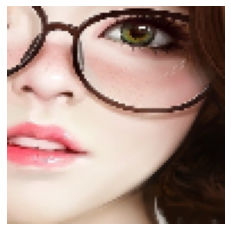

In [19]:
#Veamos la imagen #.astype('uint8')
test_image=np.array(data[1],dtype='float32')
plt.axis("off")
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
plt.show()


### Dividir el dataset para el entrenamiento y la validaciòn

In [20]:
labels

array(['man', 'woman', 'woman', ..., 'woman', 'man', 'woman'], dtype='<U5')

In [21]:
#Tranformar las etiquetas 'man y 'woman' a enteros
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
labels = encoder.fit_transform(labels)
labels

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [22]:
(x_train,x_test,y_train,y_test) = train_test_split(data,labels,test_size=0.2,random_state=42)

y_train = keras.utils.to_categorical(y_train,2)
y_test = keras.utils.to_categorical(y_test,2)

In [23]:
y_train.min() ## Tenemos en el entrenamiento la etiqueta mìnima 0

0.0

In [24]:
y_train.max() ## Tenemos en el entrenamiento la etiqueta mìnima 1

1.0

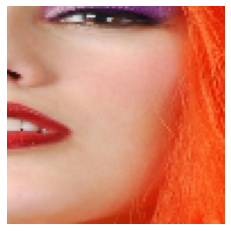

In [25]:
#Veamos una imagen del x_train #.astype('uint8')
x_train_image=np.array(x_train[100],dtype='float32')
plt.axis("off")
plt.imshow(cv2.cvtColor(x_train_image, cv2.COLOR_BGR2RGB))
plt.show()


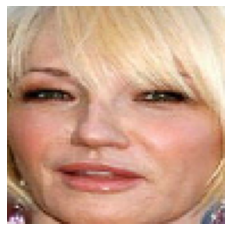

In [26]:
#Veamos una imagen del x_test #.astype('uint8')
x_train_image=np.array(x_test[100],dtype='float32')
plt.axis("off")
plt.imshow(cv2.cvtColor(x_train_image, cv2.COLOR_BGR2RGB))
plt.show()


In [27]:
x_test.shape

(1380, 96, 96, 3)

In [28]:
#Hacemos reshape al array RGB para tener un solo array que represente la imagen
x_train.shape
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2]*x_train.shape[3])
x_train[1]

x_test.shape
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2]*x_test.shape[3])
x_test[1]


array([0.08627451, 0.09019608, 0.1372549 , ..., 0.64705882, 0.55686275,
       0.57254902])

In [29]:
x_train.shape

(5518, 27648)

In [30]:
x_test.shape

(1380, 27648)

In [31]:
#Escalaciòn de los valores
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(-0.5,0.5))

In [32]:
x_train_sc=scaler.fit_transform(x_train)
x_test_sc=scaler.fit_transform(x_test)

In [33]:
x_train_sc.shape

(5518, 27648)

In [34]:
x_test_sc.shape

(1380, 27648)

## MODELADO

In [35]:
def buildModelSimple(dimInputs,entryLayerNeurons):
    model = Sequential()

    model.add(Dense (input_dim=dimInputs,units=entryLayerNeurons,activation='relu'))
    model.add(Dense(units=2,activation='sigmoid'))
    
    return model

In [36]:
def buildModel(width,height,depth,classes):
    model= Sequential()
    inputShape = (height,width,depth)
    chanDim=-1
    
    if (K.image_data_format() == "channels_first"): #Returns a string, either 'channels_first' or 'channels_last'
        inputShape = (depth, height, width)
        chanDim = 1
    
    # The axis that should be normalized, after a Conv2D layer with data_format="channels_first", 
    # set axis=1 in BatchNormalization.

    model.add(Conv2D(32, (3,3), padding="same", input_shape=inputShape))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(3,3)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(classes))
    model.add(Activation("sigmoid"))

    return model


In [37]:
x_test_sc.shape

(1380, 27648)

In [38]:
# build model
#model = buildModel(width=IMG_DIMS[0], height=IMG_DIMS[1], depth=IMG_DIMS[2],classes=2)
#opt = Adam(lr=LR, decay=LR/EPOCS)
#model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

model = buildModelSimple(x_test_sc.shape[1],60)
# compile the model
model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=LR),metrics=['accuracy'])
#model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.SGD(lr=LR),metrics=['accuracy'])


### Entrenar el modelo

In [39]:
x_train_sc

array([[-0.35882353, -0.25686275, -0.1       , ..., -0.42941176,
        -0.35098039, -0.21372549],
       [-0.22156863, -0.15490196, -0.08039216, ..., -0.25686275,
        -0.19411765, -0.17058824],
       [-0.32745098,  0.13137255,  0.39803922, ...,  0.18235294,
         0.2254902 ,  0.35490196],
       ...,
       [ 0.5       ,  0.49607843,  0.49607843, ..., -0.23333333,
        -0.25294118, -0.28823529],
       [-0.01764706,  0.04509804,  0.09215686, ..., -0.46078431,
        -0.41764706, -0.4254902 ],
       [-0.38627451, -0.31960784, -0.13529412, ...,  0.22156863,
         0.28431373,  0.35098039]])

In [40]:
y_train

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [41]:
x_test_sc

array([[ 0.3       ,  0.31176471,  0.33137255, ...,  0.22156863,
         0.20980392,  0.22941176],
       [-0.41372549, -0.40980392, -0.3627451 , ...,  0.14705882,
         0.05686275,  0.07254902],
       [ 0.24901961,  0.28039216,  0.29607843, ...,  0.47647059,
         0.47647059,  0.39411765],
       ...,
       [-0.4254902 , -0.40588235, -0.40980392, ..., -0.33137255,
        -0.3745098 , -0.42941176],
       [-0.12352941, -0.0254902 ,  0.13529412, ..., -0.31960784,
        -0.35490196, -0.40588235],
       [ 0.12745098,  0.12745098,  0.12745098, ..., -0.0372549 ,
        -0.0372549 , -0.0372549 ]])

In [42]:
y_test

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [43]:
x_train_sc.shape

(5518, 27648)

In [44]:
x_train_sc.shape[0]

5518

In [45]:
y_train.shape

(5518, 2)

In [46]:
x_test.shape

(1380, 27648)

In [47]:
# train the model
#x_train_sc_extended=x_train_sc.reshape(x_train_sc.shape[0],IMG_DIMS[0],IMG_DIMS[1],IMG_DIMS[2])
#x_test_extended=x_test.reshape(x_test.shape[0],IMG_DIMS[0],IMG_DIMS[1],IMG_DIMS[2])

#history = model.fit_generator(aug.flow(x_train_sc_extended, y_train, batch_size=BATCH_SIZE), 
#                              validation_data=(x_test_extended,y_test),
#                              steps_per_epoch=len(x_train_sc_extended),
#                              epochs=EPOCS, verbose=1)

history=model.fit(x_train_sc,y_train,epochs=100,batch_size=BATCH_SIZE)
#history=model.fit(aug.flow(x_train, y_train, batch_size=32),batch_size=BATCH_SIZE)


    

Epoch 1/100
173/173 [==============================] - 2s 11ms/step - loss: 0.2125 - accuracy: 0.6969
Epoch 2/100
173/173 [==============================] - 2s 10ms/step - loss: 0.1395 - accuracy: 0.8067
Epoch 3/100
173/173 [==============================] - 2s 11ms/step - loss: 0.1166 - accuracy: 0.8371
Epoch 4/100
173/173 [==============================] - 2s 11ms/step - loss: 0.1045 - accuracy: 0.8549
Epoch 5/100
173/173 [==============================] - 2s 11ms/step - loss: 0.0892 - accuracy: 0.8806
Epoch 6/100
173/173 [==============================] - 2s 11ms/step - loss: 0.0850 - accuracy: 0.8876
Epoch 7/100
173/173 [==============================] - 2s 13ms/step - loss: 0.0712 - accuracy: 0.9045
Epoch 8/100
173/173 [==============================] - 2s 11ms/step - loss: 0.0707 - accuracy: 0.9091
Epoch 9/100
173/173 [==============================] - 2s 12ms/step - loss: 0.0592 - accuracy: 0.9207
Epoch 10/100
173/173 [==============================] - 2s 11ms/step - loss: 0.055

173/173 [==============================] - 2s 13ms/step - loss: 0.0073 - accuracy: 0.9927
Epoch 81/100
173/173 [==============================] - 2s 12ms/step - loss: 0.0078 - accuracy: 0.9921
Epoch 82/100
173/173 [==============================] - 2s 12ms/step - loss: 0.0084 - accuracy: 0.9916
Epoch 83/100
173/173 [==============================] - 2s 12ms/step - loss: 0.0085 - accuracy: 0.9914
Epoch 84/100
173/173 [==============================] - 2s 11ms/step - loss: 0.0077 - accuracy: 0.9919
Epoch 85/100
173/173 [==============================] - 2s 11ms/step - loss: 0.0097 - accuracy: 0.9900
Epoch 86/100
173/173 [==============================] - 2s 11ms/step - loss: 0.0114 - accuracy: 0.9886
Epoch 87/100
173/173 [==============================] - 2s 10ms/step - loss: 0.0082 - accuracy: 0.9918
Epoch 88/100
173/173 [==============================] - 2s 11ms/step - loss: 0.0068 - accuracy: 0.9931
Epoch 89/100
173/173 [==============================] - 2s 12ms/step - loss: 0.0083 - 

### Visualizaciòn de la clasificaciòn

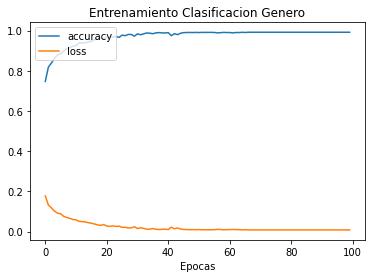

In [48]:
##Visualizacion de la clasificaciòn
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['loss'],label='loss')
plt.title('Entrenamiento Clasificacion Genero')
plt.xlabel('Epocas')
plt.legend(loc='upper left')
plt.show()

### Salvar el modelo

In [49]:

# save the model to disk
model.save('gender_detection.model')


# save plot to disk
plt.savefig('plot.png')

INFO:tensorflow:Assets written to: gender_detection.model\assets


<Figure size 432x288 with 0 Axes>

###### Review following video:
https://www.youtube.com/watch?v=WOuAI5DhHyU

### Evaluar el modelo

In [50]:
#Evaluar el modelo
model.evaluate(x_test_sc,y_test,verbose=1)

44/44 [==============================] - 0s 5ms/step - loss: 0.1017 - accuracy: 0.8855


[0.10167676210403442, 0.8855072259902954]

### Predecir

In [51]:
def predictGender(testToPredict):
    toint=(model.predict(testToPredict)).round()
    int_test=toint.astype('int')
    categoria_predecida = int_test.argmax()
    #print ("La categoria predecida es : ", categoria_predecida)

    if (categoria_predecida == 1):
        return 'Mujer'
    elif (categoria_predecida == 0):
        return 'Hombre'


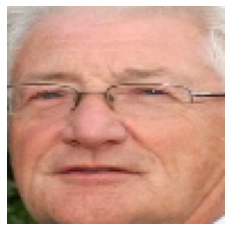

In [52]:
#Imagen a predecir
imgToPredict=x_test[2].reshape(IMG_DIMS[0],IMG_DIMS[1],IMG_DIMS[2])
x_train_image=np.array(imgToPredict,dtype='float32')
plt.axis("off")
plt.imshow(cv2.cvtColor(x_train_image, cv2.COLOR_BGR2RGB))
plt.show()

In [53]:
y_test[2]

array([1., 0.], dtype=float32)

In [54]:
x_test[102].shape

(27648,)

In [55]:
testToPredict=x_test[2].reshape(1,IMG_DIMS[0]*IMG_DIMS[1]*IMG_DIMS[2])
testToPredict.shape

(1, 27648)

In [56]:
(model.predict(testToPredict)).round()

array([[1., 0.]], dtype=float32)

In [57]:
print ("La categoria predecida es : ", predictGender(testToPredict))

La categoria predecida es :  Hombre


In [58]:
i = int(0)
for testToPredict in (x_test):
    imgToPredict=x_test[i].reshape(IMG_DIMS[0],IMG_DIMS[1],IMG_DIMS[2])
    x_train_image=np.array(imgToPredict,dtype='float32')
    #plt.axis("off")
    #plt.imshow(cv2.cvtColor(x_train_image, cv2.COLOR_BGR2RGB))
    #plt.show()
    
    testToPredict=x_test[i].reshape(1,IMG_DIMS[0]*IMG_DIMS[1]*IMG_DIMS[2])
    #print ("La categoria predecida es : ", predictGender(testToPredict))
    #time.sleep(2000)
    i=i+1